<h1><center> 
DeepLearning-Based RNA Toehold Switch Functionality Predictor Using One-Hot MLP with Rational Parameters
</center></h1>

<center>
Nicolaas M Angenent-Mari<sup>1,2*</sup> Alexander S. Garruss<sup>2,3*</sup>,, Luis R. Soenksen<sup>1,2*</sup>, Diogo M. Camacho<sup>2*</sup>, Katherine M Collins<sup>1*</sup>, George Church<sup>1,2,3,4</sup>, Timothy K. Lu<sup>1,4</sup>, and James J. Collins<sup>1,2,3,4</sup>
</center>


<center><font color=gray><font size="1.5">
<sup>1</sup>Massachusetts Institute of Technology, <sup>2</sup>Wyss Institute for Biologically Inspired Engineering, <sup>3</sup>Harvard John A. Paulson School of Engineering and Applied Sciences, and <sup>4</sup>Broad Institute of MIT and Harvard. *Contributed equally
</font></font></center>


##### Abstract:
<font color=black><font size="2">
A benchmark tool in the field of synthetic biology is the RNA “Toehold-Switch”, a riboregulator that responds to a programmable target to change its secondary structure through strand displacement with up-regulation of a desired protein. Recent advances have streamlined the synthesis of these modules; however, in vitro and in vivo functionality remain highly unpredictable due to complex interactions unanticipated by standard base-pairing models. We are developing and testing aa high-quality library of 244,000 toehold sequences to train and optimize a Multi-Layered Perceptron (MLP) deep-learning architecture based on rational parameter tensor from RNA analysis to enable accurate biological predictions of novel toehold sensor functionality.
</font></font>

---------------------------------------------------------------------------------------------

References:

> Randal S. Olson, Ryan J. Urbanowicz, Peter C. Andrews, Nicole A. Lavender, La Creis Kidd, and Jason H. Moore (2016). Automating biomedical data science through tree-based pipeline optimization. Applications of Evolutionary Computation, pages 123-137.

>Randal S. Olson, Nathan Bartley, Ryan J. Urbanowicz, and Jason H. Moore (2016). Evaluation of a Tree-based Pipeline Optimization Tool for Automating Data Science. Proceedings of GECCO 2016, pages 485-492.

---------------------------------------------------------------------------------------------

#### DATA STRUCTURE (INPUT / OUTPU)
> Data is loaded from a Toehold Sensor Database (data/2019-03-30_toehold_dataset_proc_with_params.csv) which is comma delimited table  having the following columns of DNA encoded sub-sequences: organism, sequence_class, sequence_id, pre_seq	promoter, trigger, loop1, switch, loop2, stem1, atg, stem2m linkerm post_linker, output	
> #### Input tensor is defined as (DS=Data_Style):
> **DS_1)**  Toehold DNA Sequence Rational Parameters <br>
> *       INPUT VECTOR = 
             ['i_ed_seq_Stem',\
              'i_ed_seq_StemTop',\
              'i_ed_seq_SwitchOFF',\
              'i_ed_seq_SwitchOFF_GFP',\
              'i_ed_seq_SwitchOFF_NoTo',\
              'i_ed_seq_SwitchON',\
              'i_ed_seq_SwitchON_GFP',\
              'i_ed_seq_ToeholdON',\
              'mfe_seq_AscendingStem',\
              'mfe_seq_DescendingStem',\
              'mfe_seq_RBS_GFP',\
              'mfe_seq_RBS_Linker',\
              'mfe_seq_Stem',\
              'mfe_seq_StemTop',\
              'mfe_seq_SwitchOFF',\
              'mfe_seq_SwitchOFF_GFP',\
              'mfe_seq_SwitchOFF_NoTo',\
              'mfe_seq_SwitchON',\
              'mfe_seq_SwitchON_GFP',\
              'mfe_seq_ToeholdOFF',\
              'mfe_seq_ToeholdON',\
              'mfe_seq_Trigger',\
              'n_ed_seq_Stem',\
              'n_ed_seq_StemTop',\
              'n_ed_seq_SwitchOFF',\
              'n_ed_seq_SwitchOFF_GFP',\
              'n_ed_seq_SwitchOFF_NoTo',\
              'n_ed_seq_SwitchON',\
              'n_ed_seq_SwitchON_GFP',\
              'n_ed_seq_ToeholdON' ]

> #### Output vector is defined as:
> **OUT_1)** ON, Off & ON-OFF State values derived from the experimental testing of toehold switch RNA sequence

#### PROBLEM DEFINITION
> To investigate if a deep learning network can be used to predict toehold switch ON/OFF functionality, because in that case it would suggest the network is learning feature importance of these commontly used rational parameters in RNA research.

--------------------------------------------------------------------------------------------------------------------------------------------------------

### STEP 0)   Loading, Import Modules & Core helper functions
#### This code requires the following pre-installs:
> ##### Biopython
> In anaconda env: `conda install -c anaconda biopython` or `pip install biopython`<br>
> Ref: https://github.com/biopython/biopython
> ##### ViennaRNA
> In anaconda env: `conda install -c bioconda viennarna`<br>
> Ref: https://github.com/ViennaRNA/ViennaRNA
> ##### Pysster (Python 3.5+)
> In anaconda env: `pip3 install pysster`<br>
> Ref: https://github.com/budach/pysste

In [1]:
## Import Libraries
# General system libraries
import os
import gc
import cv2
import math
import h5py
import locale
import inspect
import argparse
import numpy as np
import pandas as pd
from time import time
from datetime import datetime
from subprocess import call

# Math & Visualization Libs
import math
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from itertools import cycle
from scipy import stats, interp
from IPython.display import Image

# Multiprocessing
import multiprocessing

# DNA/RNA Analysis Libraries (Biopython, ViennaRNA, pysster) 
# > Biopython Lib
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import generic_rna, generic_dna, generic_protein, IUPAC
# > ViennaRNA Lib
import RNA

#RNAssp
import src.RNAssp.rna as rnassp

# Import Tensorflow
import tensorflow as tf

# Import Json
import json
import codecs

# Import Keras
from keras import optimizers
from keras import applications
from keras import regularizers
from keras import backend as K
from keras.models import Sequential, load_model
from keras.models import model_from_json, load_model
from keras.layers import Activation, Conv1D, Conv2D, Reshape, BatchNormalization, Dropout, Flatten, Dense, merge, Input, Lambda, InputLayer, Convolution2D, MaxPooling1D, MaxPooling2D, ZeroPadding2D, Bidirectional
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils import multi_gpu_model
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import ModelCheckpoint

#Import Keras-Vis for Saliency
from vis.utils import utils
from vis.visualization import get_num_filters
from vis.visualization import visualize_activation, visualize_saliency, visualize_cam, overlay
    ## NOTE: Install in conda enviroment: pip install git+https://github.com/raghakot/keras-vis.git -U

# Import sklearn libs
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.metrics import roc_curve, auc
    ## NOTE: Activate a new terminal to monitor NVIDIA GPU usage writing
        # watch -n0.5 nvidia-smi
    ## NOTE: If not present, activate GPU persistence mode in terminal with
        # sudo nvidia-smi -pm 1
    ## If you do not see any GPU usage try uncommenting the following line:
        # sess = tf.Session(config=tf.ConfigProto(log_device_placement=True)) #To ensure activation of GPUs in TF Backend

# Progress Bar
from tqdm import tqdm

# Warnings
import warnings
warnings.filterwarnings("ignore")

#Visualization mode
#%matplotlib ipympl

Using TensorFlow backend.


In [2]:
## Define helper function to copy full directory for backups
def copy_full_dir(source, target):
    call(['cp', '-a', source, target]) # Unix
    
#Get number of available GPUs
def get_available_gpus():
    from tensorflow.python.client import device_lib
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
ngpus = len(get_available_gpus())
print('Available GPUs: '+ str(ngpus))

Available GPUs: 1


-----------------------------------------------------------------------------------------------------------------------------

### 1) Import Dataset & Define Raw Input(s)/Output(s)
> Full data CSV read, includes all necessary information to train and test

In [3]:
# Create Data folder if not existent
data_folder = "data/"
if not os.path.isdir(data_folder):
    os.makedirs(data_folder)
    
## Define general path to store all generated models
core_models_path = 'models/'
# Create Data folder if not existent
if not os.path.isdir(core_models_path):
    os.makedirs(core_models_path)

# Define path to load desired Toehold dataset file (.csv)
data_filename = "2019-07-08_toehold_dataset_proc_with_params_QC1.1.csv"
data_path = data_folder + data_filename
data = pd.read_csv(data_path)

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed) # Seed can be any number

In [4]:
### Datata Sequence ID selection
id_data = data['sequence_id']

### Toehold Switch dataset input/output columns for selection
input_cols = ['i_ed_seq_Stem',\
              'i_ed_seq_StemTop',\
              'i_ed_seq_SwitchOFF',\
              'i_ed_seq_SwitchOFF_GFP',\
              'i_ed_seq_SwitchOFF_NoTo',\
              'i_ed_seq_SwitchON',\
              'i_ed_seq_SwitchON_GFP',\
              'i_ed_seq_ToeholdON',\
              'mfe_seq_AscendingStem',\
              'mfe_seq_DescendingStem',\
              'mfe_seq_RBS_GFP',\
              'mfe_seq_RBS_Linker',\
              'mfe_seq_Stem',\
              'mfe_seq_StemTop',\
              'mfe_seq_SwitchOFF',\
              'mfe_seq_SwitchOFF_GFP',\
              'mfe_seq_SwitchOFF_NoTo',\
              'mfe_seq_SwitchON',\
              'mfe_seq_SwitchON_GFP',\
              'mfe_seq_ToeholdOFF',\
              'mfe_seq_ToeholdON',\
              'mfe_seq_Trigger',\
              'n_ed_seq_Stem',\
              'n_ed_seq_StemTop',\
              'n_ed_seq_SwitchOFF',\
              'n_ed_seq_SwitchOFF_GFP',\
              'n_ed_seq_SwitchOFF_NoTo',\
              'n_ed_seq_SwitchON',\
              'n_ed_seq_SwitchON_GFP',\
              'n_ed_seq_ToeholdON' ]

output_cols = ['ON', 'OFF', 'ON_OFF']
qc_levels = [1.1]
doTrain = True
loss_init = 'mae' #'logcosh', #'mse', 'mae', 'r2'
n_foldCV = 10
verbose_init = True
evaluate  = True
display_init = True

### Define data scaler (if any)
scaler_init = True
scaler = QuantileTransformer(output_distribution='uniform')

### DEFINE MODEL NAME (e.g. MLP, CNN, LSTM, etc.)
model_name = 'MLP_RP'

#Show sample of dataframe structure
data.head()

off_id  \
0  AACCAAACACACAAACGCACAAAAAAAAAAAAAAAAAATGGAAAAC...   
1  AACCAAACACACAAACGCACAAAAAAAAAAAAATGGAAAACAGTTA...   
2  AACCAAACACACAAACGCACAAAAAAAAATTACTACTATTGTTAAT...   
3  AACCAAACACACAAACGCACAAAAAAAATAACGTAGGACTACTACT...   
4  AACCAAACACACAAACGCACAAAAAAAATGGAAAACAGTTACTAAT...   

                                               on_id source_sequence  \
0  AACTGTTTTCCATTTTTTTTTTTTTTTTTTAACCAAACACACAAAC...        smallpox   
1  TTAGTAACTGTTTTCCATTTTTTTTTTTTTAACCAAACACACAAAC...        smallpox   
2  CTAAATTAACAATAGTAGTAATTTTTTTTTAACCAAACACACAAAC...        smallpox   
3  TCCAAGTAGTAGTCCTACGTTATTTTTTTTAACCAAACACACAAAC...        smallpox   
4  ACATATTAGTAACTGTTTTCCATTTTTTTTAACCAAACACACAAAC...        smallpox   

          sequence_id               pre_seq              promoter  \
0  smallpox_tile_2626  CTCTGGGCTAACTGTCGCGC  TAATACGACTCACTATAGGG   
1  smallpox_tile_2625  CTCTGGGCTAACTGTCGCGC  TAATACGACTCACTATAGGG   
2  smallpox_tile_4951  CTCTGGGCTAACTGTCGCGC  TAATACGACTCACTATAGGG   
3  smallpox_tile_6492  CTCTGGGCTAACTGTCGCGC  TAATACGACTCACTATAGGG   
4  smallpox_tile_2624  CTCTGGGCTAACTGTCGCGC  TAATACGACTCACTATAGGG   

                          trigger                 loop1  \
0  AACTGTTTTCCATTTTTTTTTTTTTTTTTT  AACCAAACACACAAACGCAC   
1  TTAGTAACTGTTTTCCATTTTTTTTTTTTT  AACCAAACACACAAACGCAC   
2  CTAAATTAACAATAGTAGTAATTTTTTTTT  AACCAAACACACAAACGCAC   
3  TCCAAGTAGTAGTCCTACGTTATTTTTTTT  AACCAAACACACAAACGCAC   
4  ACATATTAGTAACTGTTTTCCATTTTTTTT  AACCAAACACACAAACGCAC   

                           switch        loop2    ...     Cbn1_off  Cbn2_off  \
0  AAAAAAAAAAAAAAAAAATGGAAAACAGTT  AACAGAGGAGA    ...     0.000000  1.000000   
1  AAAAAAAAAAAAATGGAAAACAGTTACTAA  AACAGAGGAGA    ...          NaN       NaN   
2  AAAAAAAAATTACTACTATTGTTAATTTAG  AACAGAGGAGA    ...     1.000000  0.000000   
3  AAAAAAAATAACGTAGGACTACTACTTGGA  AACAGAGGAGA    ...     0.883458  0.116542   
4  AAAAAAAATGGAAAACAGTTACTAATATGT  AACAGAGGAGA    ...     0.815066  0.000000   

   Cbn3_off Cbn4_off        ON       OFF    ON_OFF QC_ON QC_OFF QC_ON_OFF  
0  0.000000      0.0       NaN  0.333333       NaN   NaN    NaN       NaN  
1       NaN      NaN       NaN       NaN       NaN   NaN    NaN       NaN  
2  0.000000      0.0  0.068295  0.000000  0.068295   2.0    1.1       1.1  
3  0.000000      0.0  0.000000  0.038847 -0.038847   1.1    2.0       1.1  
4  0.184934      0.0  0.080666  0.123289 -0.042624   2.0    3.0       2.0  

[5 rows x 99 columns]

-----------------------------------------------------------------------------------------------------------------------------

### 2) Definition of Pre-Processing Input(s)/Output(s) functions

> Define helper functions for one-hot encoding and Generation of Connectivity Map Tensors

> Definition of full input and output vectors for the network

In [5]:
# INPUT / OUTPUT DEFINITION, PROCESSING & LOADING
def pre_process_data (data, input_cols, output_cols, export_path, qc_level_threshold=1, scaler_init=False, display=True):
    ## OUTPUT / INPUT DEFINITION, PROCESSING & LOADING
    
    #Init process bar
    tqdm.pandas() # Use `progress_apply` when `applying` one hot encoding and complementarity function to dataframe of input sequences

    # Define path to store input / output arrays
    tmp_data_path = 'data/tmp/'
    # Create Data folder if not existent
    if not os.path.isdir(tmp_data_path):
        os.makedirs(tmp_data_path)

    # SAVE FULL INPUT VECTORS (only if not exists because it is a large file)
    tmp_data_input_path = (tmp_data_path + 'data_input_file_rp.h5')
    if not os.path.exists(tmp_data_input_path):
        # Data Input selection & Generation if absent (or delete it to re-calculate)
        df_data_input = data[input_cols]
        data_input = np.array(list(df_data_input.values), dtype=np.float32)
        #Save:
        with h5py.File(tmp_data_input_path, 'w') as hf:
            hf.create_dataset("input",  data=data_input)

    # GENERATE & SAVE FULL OUTPUT VECTORS
    output_ids = "_".join(str(x) for x in output_cols)
    tmp_data_output_path = (tmp_data_path + 'data_output_file_' + str(qc_level_threshold).replace('.','-') + '_' + output_ids + '.h5')
    
    # Data Output selection (QC filtered, OutColumns Only & Drop NaNs)
    df_data_output = data[data.QC_ON_OFF >= qc_level_threshold]
    df_data_output= df_data_output[output_cols]
    df_data_output = df_data_output.dropna(subset=output_cols)
    data_output = df_data_output.as_matrix().astype('float32')
    #Save:
    with h5py.File(tmp_data_output_path, 'w') as hf:
        hf.create_dataset("output",  data=data_output)
    
    #Load full input array in memory and QC filter
    with h5py.File(tmp_data_input_path, 'r') as hf:
        data_input = hf['input'][:] #Loading with read from hard-disk
        data_input = data_input[df_data_output.index.values][:][:]
        #Apply only for Rational parameters
        data_input = MinMaxScaler().fit_transform(data_input)

    #Load full output array in memory and QC filter
    with h5py.File(tmp_data_output_path, 'r') as hf:
        data_output = hf['output'][:]
        data_output_orig = data_output
        #Pre-process data (scaler)
        if scaler_init==True:
            data_output = scaler.fit_transform(data_output)
    
    #Load Full list of sequences after filtering
    input_seq_cols = 'seq_SwitchON_GFP'
    data_seqs = data[input_seq_cols][df_data_output.index.values]
    
    # Display processed data if desired
    if display==True:
        ### Show example of processed dataset
        ## Display number of retrieved sequences
        print("Number of sequences retrieved: "+str(len(data_input)))
        print()

        #Select ID to show
        toehold_id = 0 

        ## Plot Example input toehold matrix 
        print('EXAMPLE OF INPUT VECTOR')
        print(' ' + str(data_input[toehold_id]))
        print()
        
        # Display input size
        print("Input Size: " + str(data_input[toehold_id].shape))
        print()

        # Display example of Output vector
        print('EXAMPLE OF OUTPUT VECTOR')
        print(' ' + str(data_output[toehold_id]))
        print()

        # Display Output Values
        for index,item in enumerate(output_cols):
            # Display Output Values
            plt.figure()
            print('Distribution of ' + str(item) + ' Values')
            sns.distplot(data_output[:,index], kde=True, rug=False)
            #Tight plot
            plt.tight_layout()
            # Save figure
            plt.savefig(export_path + "/QC_" + str(qc_level_threshold).replace('.','-') + "_" + str(item) + "_dist.png", bbox_inches='tight', dpi=300)
        
        if scaler_init==True:           
            ## COMPUTE EFFECT OF SCALER
            # Difference between the transformed toehold output values and original toehold output values, 
            # then compute the absolute percentage difference for diplay
            test_metrics = np.zeros((data_output_orig.shape[1],3))
            diff = data_output_orig - data_output
            abstDiff = np.abs(diff)
            # Compute the mean and standard deviation of the absolute difference:
            apd_mean = np.mean(abstDiff, axis=0)
            apd_std = np.std(abstDiff, axis=0)
            apd_r2 = np.zeros_like(apd_mean)
            
            # Plot: Scaled Output values vs. Original values and get R2 value
            for index,item in enumerate(output_cols):
                # R2 (Coefficient of Determination)
                apd_r2[index] = r2(data_output_orig[:,index], data_output[:,index])
                
                # Display Output Values
                x=np.squeeze(data_output_orig[:,index])
                y=np.squeeze(data_output[:,index])
                
                # Display Output Values
                print('')
                print("" + item + " Mean_absolute_error (TRANSFORMATION): " + str(apd_mean[index]) + " (SD: " + str(apd_std[index]) + ")" )
                print('')
                print('TRANSFORMED Values vs. ORIGINAL values (' + item + ')' )
                print('Pearson Correlation: '+ str(stats.pearsonr(x, y)[0]))
                print('Spearman Correlation: '+ str(stats.spearmanr(x, y)[0]))
                print('R2: '+ str(apd_r2[index]))
                print('')
                
                if scaler_init == True:
                    g = sns.jointplot(x, y, kind="reg", color="b", xlim=(-0.5, 1.5), ylim=(-0.5, 1.5), stat_func=r2)
                else:
                    g = sns.jointplot(x, y, kind="reg", color="b", stat_func=r2)
                g.plot_joint(plt.scatter, c="b", s=1, linewidth=1, marker=".", alpha=0.08)
                g.plot_joint(sns.kdeplot, zorder=0, color="m", n_levels=6, shade=False)
                g.ax_joint.collections[0].set_alpha(0)
                g.set_axis_labels("$ORIGINAL$", "$TRANSFORMED$");

                # save the figure
                g.savefig(export_path + "/QC_" + str(qc_level_threshold).replace('.','-') + "_" + str(item) + "_data_scaling_" + str(item) + ".png", bbox_inches='tight', dpi=300)
                
                # Store model performance metrics for return   
                test_metrics[index, :] = [apd_mean[index], apd_std[index], apd_r2[index]]
                
            # SAVE METRICS (.npy file)
            np.save(export_path + '/scaling_metrics',test_metrics)
            # SAVE DATA (.npz file)
            np.savez(export_path + '/scaling_data',data_output_orig,data_output) 

    return data_input, data_output

-----------------------------------------------------------------------------------------------------------------------------

### 3) Definition of Model Architecture Function
> Funtion to create keras model architecture
> Helper functions to save and evaluate models

In [6]:
### Function to create Keras MLP for regression prediction
def create_mlp_rp(length, regress=False):
    # Define our MLP network
    inputShape = (length,) #DNA/RNA rational parameters
    inputs = Input(shape=inputShape)
    dropout_init = 0.2

    
    # Define dense layers
    x = inputs
    x = Dense(25, activation="relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Dropout(dropout_init)(x)
    x = Dense(10, activation="relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Dropout(dropout_init)(x)
    x = Dense(7, activation="relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Dropout(dropout_init)(x)
        
    # Check to see if the regression node should be added
    if regress:
        x = Dense(len(output_cols), activation="linear")(x)
    else:
        x = Dense(len(output_cols), activation="sigmoid")(x)
        
    # Construct the Model
    model = Model(inputs, x) 
    
    # Return the model
    return model

In [7]:
# Helper functions to save/load model and training history
def saveHist(path,history):
    new_hist = {}
    for key in list(history.history.keys()):
        if type(history.history[key]) == np.ndarray:
            new_hist[key] == history.history[key].tolist()
        elif type(history.history[key]) == list:
            if  type(history.history[key][0]) == np.float64:
                new_hist[key] = list(map(float, history.history[key]))

    with codecs.open(path, 'w', encoding='utf-8') as f:
        json.dump(new_hist, f, separators=(',', ':'), sort_keys=True, indent=4) 
        
def loadHist(path):
    with codecs.open(path, 'r', encoding='utf-8') as f:
        n = json.loads(f.read())
    return n

def save_model(model, identifier):
    ## MODEL SAVING ON WORKING FOLDER
    # Option 1: Save via Weights + Architecture
    model.save_weights(os.path.abspath(model_path)+'/model_weights_'+str(identifier)+'.h5')
    with open(os.path.abspath(model_path)+'/model_architecture_'+str(identifier)+'.json', 'w') as f:
        f.write(model.to_json())

    # Option 2: Save entire model at once
    model.save(os.path.abspath(model_path)+'/model_'+str(identifier)+'.h5')

In [8]:
#Definition of R2 metric for testing
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

#Definition of Custom metric as loss related to Coefficient of Determination (R2) 
#  CoD = 1 - MSE / (variance of inputs), and since this is going to be a loss we want 
#  improvement to point towards zero, so we choose mse/variance of inputs
def custom_r2_loss(y_true, y_pred): 
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return (SS_res/(SS_tot + K.epsilon()))

#Definition of Custom metric as loss related to Weigted Mean Absolute error
#  Improvement points towards zero, but penalizes loss for small values and improves it for larger values
def custom_wmae_loss(y_true, y_pred): 
    from keras import backend as K
    weightedMAE = K.abs((y_true-y_pred)*y_true) #Increase loss for large ON or OFF values -- Skews focus of distribution right
    return weightedMAE

### 4) Definition of BASE Model Generator (with Training using Manual Verification Dataset & Evaluation)
> For use with a priori training (suggested: 75%) & testing (suggested: 25%) split, with internal training validation from the training set (10% or the 75%)
> For evaluation on unseen testing data (suggested: 25%) 
> This generator function generates and saves model in target path

In [9]:
### Define our final model architecture (layers & optimizor) and then compile it
def generate_model(model_path, trainX, testX, trainY, testY, verbose_init, evaluate=True):
    
    ## DEEP-LEARNING TRAINING PARAMETERS(e.g. verbose, patients, epoch size, batch size) to constrain process
    verbose_init = verbose_init #Zero is no keras verbose
    patience_init = 20 # Number of epochs to wait for no model improvement before early stopping a training
    epochs_init = 300 # Max number of epochs to perform (to cap training time)
    batch_size_init = 64*(1+ngpus) # number of samples that will be propagated through the network at every epoch dependent on the number of GPUs
    validation_spit_init = 0.1 # Percentage of testing data to use in internal validation during training
    
    ## Create folder to store model (if not existent)
    if not os.path.isdir(model_path):
        os.makedirs(model_path)
        
    ## Callbacks for training:
    #  Save the model weights to the same file, if and only if the validation accuracy improves.
    checkpoint_file_name = "model_checkpoint_weights.h5"
    model_checkpoint_path = os.path.join(os.path.abspath(model_path), checkpoint_file_name)
    
    if verbose_init==True:
        # Callback to be used for checkpoint generation and early stopping
        callbacks_list = [ModelCheckpoint(model_checkpoint_path, monitor='val_loss', verbose = verbose_init, save_best_only=True, mode='auto'),
                          EarlyStopping(monitor='val_loss', patience=patience_init, verbose = verbose_init),
                          TQDMNotebookCallback()] # Adds Keras integration with TQDM progress bars.
    else:
        # Callback to be used for checkpoint generation and early stopping
        callbacks_list = [ModelCheckpoint(model_checkpoint_path, monitor='val_loss', verbose = False, save_best_only=True, mode='auto'),
                          EarlyStopping(monitor='val_loss', patience=patience_init, verbose = False)]    
    
    ## Create Model (Change for MLP, CNN, ETC)
    # -------------------------------------------------------------------------------------------------------------------------------------
    # Define MLP model input shape with rational parameters
    length = trainX.shape[1]
    
    # Define core model on CPU
    with tf.device("/cpu:0"):  
        model = create_mlp_rp(length, regress=False)
        
    ## Initialize the optimizer and Compile model:
    #   Custom metric is used (see above), if we use "Mean absolute percentage error" that
    #   implies that we seek to minimize the absolute percentage difference between 
    #   our *predictions* and *actual* output values. We also calculate other 
    #   valuable metrics for regression evaluation 
    opt = Adam(lr=0.001, epsilon=None, decay=1e-3/200, amsgrad=False) # epsilon=1e-1 for POISSON loss
    
    if loss_init=="r2":
        model.compile(loss=custom_r2_loss, optimizer=opt,  metrics=['mse','mae', 'mape', 'cosine','acc', custom_r2_loss])
    elif loss_init =="wmae":
        model.compile(loss=custom_wmae_loss, optimizer=opt,  metrics=['mse','mae', 'mape', 'cosine','acc', custom_wmae_loss])
    else:
        model.compile(loss=loss_init, optimizer=opt,  metrics=['mse','mae', 'mape', 'cosine','acc']) 
        
    # -------------------------------------------------------------------------------------------------------------------------------------  
        
    ## Parallel computing (if multiple GPUs are available)
    # Define model for training (CPU, Single GPU or Multi-GPU depending on availability of resources)
    if ngpus<=1:
        print("[INFO] training with Single GPU or CPU...")
        model_history = model.fit(trainX, trainY, validation_split=validation_spit_init, epochs=epochs_init, batch_size=batch_size_init, callbacks=callbacks_list, verbose=verbose_init)

    else:
        print("[INFO] training with {} GPUs...".format(ngpus))
        # make the model parallel
        parallel_model = multi_gpu_model(model, gpus=ngpus)
        
        if loss_init=="r2":
            parallel_model.compile(loss=custom_r2_loss, optimizer=opt,  metrics=['mse','mae', 'mape', 'cosine','acc', custom_r2_loss])
        elif loss_init =="wmae":
            parallel_model.compile(loss=custom_wmae_loss, optimizer=opt,  metrics=['mse','mae', 'mape', 'cosine','acc', custom_wmae_loss])
        else:
            parallel_model.compile(loss=loss_init, optimizer=opt,  metrics=['mse','mae', 'mape', 'cosine','acc']) 
        
        model_history = parallel_model.fit(trainX, trainY, validation_split=validation_spit_init, epochs=epochs_init, batch_size=batch_size_init, callbacks=callbacks_list, verbose=verbose_init)    
                    

    ## MODEL SAVING
    # Option 1: Save via Weights + Architecture
    model.save_weights(os.path.abspath(model_path)+'/model_weights.h5')
    with open(os.path.abspath(model_path)+'/model_architecture.json', 'w') as f:
        f.write(model.to_json())
    # Option 2: Save entire model at once
    model.save(os.path.abspath(model_path)+'/model.h5')
    # Save model graph to file
    model_graph_path = model_path + '/model_graph.png'
    #plot_model(model, to_file=model_graph_path, show_shapes=True, show_layer_names=True)
    # Save training history
    saveHist(model_path + '/model_history', model_history)
        
    ## MODEL LOADING (to ensure it works)
    # Option 1: Load latest model via Weights + Architecture
    #with open(os.path.abspath(model_path)+'/model_architecture.json', 'r') as f:
    #    model = model_from_json(f.read())
    #    model.load_weights(os.path.abspath(model_path)+'/model_weights.h5')
    # Option 2: Load latest model via entire model at once
    if loss_init=="r2":
        model = load_model(os.path.abspath(model_path)+'/model.h5', custom_objects={'custom_r2_loss': custom_r2_loss})
    elif loss_init =="wmae":
        model = load_model(os.path.abspath(model_path)+'/model.h5', custom_objects={'custom_wmae_loss': custom_wmae_loss})
    else:
        model = load_model(os.path.abspath(model_path)+'/model.h5')
    
    # Load model training history
    model_history = loadHist(model_path + '/model_history')
    
    # Init prediction output matrix
    testX_Preds = np.zeros_like(testY) #Empty matrix for full prediction evaluation
    # Init performance metrics matrix
    test_metrics = np.zeros((trainY.shape[1],3)) #Empty matrix for model performance metrics
    
    # GENERATE PREDICTIONS
    if testX.size > 0:
        ## Make predictions on testing data:
        print("Predicting functionality of Test Toeholds ...")
        print("")
        #Predictions in scaled space
        testX_Preds = model.predict(testX)
        
        if scaler_init == True:
            testY = scaler.inverse_transform(testY)
            testX_Preds = scaler.inverse_transform(testX_Preds)
        
        ## EVALUATE PERFORMANCE OF MODEL
        if evaluate==True:
            ## Plot training metrics per fold:
            plt.figure ()
            ax1 = plt.subplot(221)
            ax2 = plt.subplot(222)
            ax3 = plt.subplot(223)
            ax4 = plt.subplot(224)
            # Plot MSE metric
            ax1.set_title("Mean squared error")
            ax1.plot(model_history['mean_squared_error'])
            # Plot MAE metric
            ax2.set_title("Mean absolute error")
            ax2.plot(model_history['mean_absolute_error'])
            # Plot MAPE metric
            ax3.set_title("Mean absolute percentage error")
            ax3.plot(model_history['mean_absolute_percentage_error'])
            # Plot CP metric
            ax4.set_title("Cosine Proximity")
            ax4.plot(model_history['cosine_proximity'])
            #Tight plot
            plt.tight_layout()
            # Save figure
            plt.savefig(model_path + "/model_training_metrics.png", bbox_inches='tight', dpi=300)

            ## Plot compiled training metrics per fold:
            plt.figure()
            plt.style.use("default")
            N = np.arange(0, len(model_history["loss"]))
            # Plot used Loss metric
            plt.plot(N, model_history["loss"], label="train_loss")
            plt.plot(N, model_history["val_loss"], label="test_loss")
            # Plot used Accuracy metric (applicable only if categorical model)
            plt.plot(N, model_history["acc"], label="train_acc")
            plt.plot(N, model_history["val_acc"], label="test_acc")
            # Plot MSE metric
            plt.plot(N, model_history["mean_squared_error"], label="train_mse")
            plt.plot(N, model_history["val_mean_squared_error"], label="test_mse")
            # Plot MAE metric
            plt.plot(N, model_history["mean_absolute_error"], label="train_mae")
            plt.plot(N, model_history["val_mean_absolute_error"], label="test_mae")
            # Plot MAPE metric
            plt.plot(N, model_history["mean_absolute_percentage_error"], label="train_mape")
            plt.plot(N, model_history["val_mean_absolute_percentage_error"], label="test_mape")
            # Plot CP metric
            plt.plot(N, model_history["cosine_proximity"], label="train_cp")
            plt.plot(N, model_history["val_cosine_proximity"], label="test_cp")
            plt.title("CNN Toehold Complementary Rep Data")
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # Place a legend to the right of this smaller subplot.
            # Save figure
            plt.savefig(model_path + "/model_training_compilation.png", bbox_inches='tight', dpi=300)
            
            
            ## COMPUTE PERFORMANCE METRICS
            # Difference between the *predicted* toehold functionality values and *actual* toehold functionality values, 
            # then compute the absolute percentage difference for diplay
            diff = testX_Preds - testY
            abstDiff = np.abs(diff)
            # Compute the mean and standard deviation of the absolute difference:
            apd_mean = np.mean(abstDiff, axis=0)
            apd_std = np.std(abstDiff, axis=0)
            apd_r2 = np.zeros_like(apd_mean)
            # Plot: Predicted values vs. Experimental values and get R2 value
            for index,item in enumerate(output_cols):

                # R2 (Coefficient of Determination)
                apd_r2[index] = r2(testX_Preds[:,index], testY[:,index])
                
                # Display Output Values
                x=np.squeeze(testX_Preds[:,index])
                y=np.squeeze(testY[:,index])
                
                # Display Output Values
                print("" + item + " Mean_absolute_error (TEST): " + str(apd_mean[index]) + " (SD: " + str(apd_std[index]) + ")" )
                print('')
                print('EXPERIMENTAL Values vs. PREDICTED values (' + item + ')' )
                print('Pearson Correlation: '+ str(stats.pearsonr(x, y)[0]))
                print('Spearman Correlation: '+ str(stats.spearmanr(x, y)[0]))
                print('R2: '+ str(apd_r2[index]))
                print('')
                
                if scaler_init == True:
                    g = sns.jointplot(x, y, kind="reg", color="b", xlim=(-0.5, 1.5), ylim=(-0.5, 1.5), stat_func=r2)
                else:
                    g = sns.jointplot(x, y, kind="reg", color="b", stat_func=r2)
                g.plot_joint(plt.scatter, c="b", s=1, linewidth=1, marker=".", alpha=0.08)
                g.plot_joint(sns.kdeplot, zorder=0, color="m", n_levels=6, shade=False)
                g.ax_joint.collections[0].set_alpha(0)
                g.set_axis_labels("$PREDICTED$", "$EXPERIMENTAL$");

                # save the figure
                g.savefig(model_path + "/model_performance_" + str(item) + ".png", bbox_inches='tight', dpi=300)
                
                # Store model performance metrics for return   
                test_metrics[index, :] = [apd_mean[index], apd_std[index], apd_r2[index]]
                
            # SAVE METRICS (.npy file)
            np.save(model_path + '/test_metrics',test_metrics)
            # SAVE DATA (.npz file)
            np.savez(model_path + '/test_data',testX_Preds, testY) 
                
    return model, model_history, testX_Preds, test_metrics

--------------------------------------------------------------------------------------------------------------------------------------------------------

### 5)  Definition of k-Fold Cross Validated Model Generator (with Ensemble Training, Evaluation & Full Deployment)

> Used the gold standard for machine learning model evaluation is k-fold cross validation

> It provides a robust estimate of the performance of a model on unseen data. 

> It does this by splitting the training dataset into k subsets and takes turns training models on all subsets except one which is held out, and evaluating model performance on the held out validation dataset. The process is repeated until all subsets are given an opportunity to be the held out validation set. 

> The performance measure accross all models in the unseen data for each fold

> The performance is printed for each model and it is stored

> A final deployment model trained in all data (no testing) is provided for evaluation in future data

In [10]:
### Define our crossvalidation model generator (layers, optimizor, compilation, training, reporting, etc)
def generate_crossval_model(model_cv_path, X, Y, n_foldCV, verbose_init=True, evaluate=True):
    
    ## CROSSVALIDATION TRAINING
    # Define CV parameters
    n_foldCV = n_foldCV #Number of Crossvalidation bins
    cv_folds = list(StratifiedKFold(n_splits=n_foldCV, shuffle=True, random_state=seed).split(X,Y.argmax(1))) # Non repeating CV bins
    cv_preds = np.zeros_like(Y) #Empty matrix for full prediction evaluation
    cv_test_metrics = np.zeros((n_foldCV, Y.shape[1], 3))
    deploy_test_metrics = np.zeros((Y.shape[1],3))
    
    # Perform n-fold crossvalidated training and evaluation
    for j, (train_idx, test_idx) in enumerate(cv_folds):
        print('\nFold ',j)
        
        # Define folder for CV fold model
        model_cv_fold_path = model_cv_path + '/Fold' + str(j) 

        ## CrossValidation Strategy: 
        # We use all data for n-crossvalidation this will give us average metrics of performance in future data
        # for this all data will be devided into n bins. In every sequential fold we will use n-1 bins for training 
        # and the remaining bin for testing this split is done in such a way that all data is used for training and
        # testing at some point (sweet!). Testing points will be aggregated tenerate an average metric of performance
        # and all the datapoints will be put into a master agreement plot for visualization. 
        # A working model will be made using 75% of the data for training and 25% for further testing.
        # A deploy model will be also trained using all available data without testing
        trainX_cv = X[train_idx]
        trainY_cv = Y[train_idx]
        testX_cv = X[test_idx]
        testY_cv = Y[test_idx]
        # NOTE: Validation set is taken internally from the training set (10% of each fold), this is applied in the the model.fit function
        
        # Create & Train model each fold according to generator function
        model, model_history, testX_Preds, test_metrics = generate_model(model_cv_fold_path, trainX_cv, testX_cv, trainY_cv, testY_cv, verbose_init=verbose_init, evaluate=evaluate)
        
        # Record predicted values of each CV fold training to generate an ensemble reporting
        print("Predicting functionality of CV-Fold Test Toeholds & Model performance metrics ...")
        cv_preds[test_idx,:] = testX_Preds
        cv_test_metrics[j,:,:] = test_metrics
        
        ## MODEL MEMORY RELEASE
        del model_history
        del model
        for i in range(ngpus+1): gc.collect()
        
        ## Free-up keras memmory to prevent leaks
        K.clear_session()
    
    #Transform back data
    if scaler_init == True:
        Y = scaler.inverse_transform(Y)
    
    # SAVE METRICS (.npy file)
    np.save(model_cv_path + '/cv_test_metrics',cv_test_metrics) 
    # SAVE DATA (.npz file)
    np.savez(model_cv_path + '/cv_test_data',cv_preds, Y)
            
    
    ## DEFINE FOLDER FOR DEPLOY MODEL
    model_deploy_path = model_cv_path + '/deploy'
    ## Create folder to store model (if not existent)
    if not os.path.isdir(model_deploy_path):
        os.makedirs(model_deploy_path)
    print('')
    print('Generating deployment model...')
    
    # COMPUTE PERFORMANCE METRICS FOR DEPLOY MODEL
    # Difference between the *predicted* toehold functionality values and *actual* toehold functionality values, 
    # then compute the absolute percentage difference for diplay

    diff = cv_preds - Y
    abstDiff = np.abs(diff)
    # Compute the mean and standard deviation of the absolute difference:
    apd_mean = np.mean(abstDiff, axis=0)
    apd_std = np.std(abstDiff, axis=0)
    apd_r2 = np.zeros_like(apd_mean)

    ## EVALUATE ENSEMBLE CROSSVALIDATION PERFORMANCE OF MODEL
    if evaluate==True:
        for index,item in enumerate(output_cols): 
            # R2 (Coefficient of Determination)
            apd_r2[index] = r2(cv_preds[:,index], Y[:,index])
            # Display Output Values
            x_tot=np.squeeze(cv_preds[:,index])
            y_tot=np.squeeze(Y[:,index])
            print('EXPERIMENTAL Values vs. PREDICTED values (' + item + ')' )
            print('Pearson Correlation: '+ str(stats.pearsonr(x_tot, y_tot)[0]))
            print('Spearman Correlation: '+ str(stats.spearmanr(x_tot, y_tot)[0]))
            print('R2: '+ str(apd_r2[index]))
            print('')
            
            if scaler_init == True:
                g = sns.jointplot(x_tot, y_tot, kind="reg", color="b", xlim=(-0.2, 1.2), ylim=(-0.2, 1.2), stat_func=r2)
            else:
                g = sns.jointplot(x_tot, y_tot, kind="reg", color="b", stat_func=r2)
            g.plot_joint(plt.scatter, c="b", s=1, linewidth=1, marker=".", alpha=0.08)
            g.plot_joint(sns.kdeplot, zorder=0, color="m", n_levels=6, shade=False)
            g.ax_joint.collections[0].set_alpha(0)
            g.set_axis_labels("$PREDICTED$", "$EXPERIMENTAL$");
            
            # save the figure
            g.savefig(model_deploy_path + "/model_ensemble_performance_" + str(item) + ".png", bbox_inches='tight', dpi=300)
    
            # Store model performance metrics for return   
            deploy_test_metrics[index, :] = [apd_mean[index], apd_std[index], apd_r2[index]]
            
    # SAVE METRICS (.npy file)
    np.save(model_deploy_path + '/deploy_test_metrics', deploy_test_metrics) 
    # SAVE DATA (.npz file)
    np.savez(model_deploy_path + '/deploy_test_data',cv_preds, Y)
    
    ## DEPLOYMENT MODEL TRAINING (with full dataset)
    # Partition the data into training (90%), validation (10%), testing (0%) splits 
    (trainX, testX, trainY, testY) = train_test_split(X, Y, test_size=0.0, random_state=seed)
    
    # Create model function according to generator function
    model, model_history, _ , _ = generate_model(model_deploy_path, trainX, testX, trainY, testY, verbose_init=True, evaluate=True)
                                                                                                                                               
    ## Return                                     
    return model, model_history, cv_preds, cv_test_metrics, deploy_test_metrics

--------------------------------------------------------------------------------------------------------------------------------------------------------

### 6) Loop through all model(s) generation depending on: Model folder, Chosen input(s)/output(s), QC levels & k-fold bins

> Define helper function for master loop

> Used the gold standard for machine learning model evaluation is k-fold cross validation

> It provides a robust estimate of performance

In [11]:
#Definer function for full model analysis and reporting
def execute_model_analysis(core_models_path, model_name, data, input_cols, output_cols, qc_levels, n_foldCV, verbose_init, evaluate):
      
    #Iterate through all desired Data QC levels
    for j, qc_level in enumerate(qc_levels): 
        
        ### 1) Create all folders per iteration
        ## Define general path to store all generated models
        model_path = core_models_path + model_name.lower()+ '/' + model_name.upper() +'-' + str('-'.join(output_cols) + '-QC' + str(qc_level).replace('.','-') + '/')
        print ("Iteration " + str(j) + ") Building analysis in: " + model_path) 
        # Create Data folder if not existent
        if not os.path.isdir(model_path):
            os.makedirs(model_path)
        
        ## SAVE INIT PARAMETER SAVING ON WORKING FOLDER
        init_param_path = model_path + "init_parameters.txt"
        with open(init_param_path, "w+") as variable_file:
            variable_file.write("data_folder = " + str(data_folder)+ '\n' +\
                                "core_models_path = " + str(core_models_path)+ '\n' +\
                                "data_filename = " + str(data_filename)+ '\n' +\
                                "seed = " + str(seed)+ '\n' +\
                                "model_name = " + str(model_name)+ '\n' +\
                                "input_cols = " + str(input_cols)+ '\n' +\
                                "output_cols = " + str(output_cols)+ '\n' +\
                                "qc_level = " + str(qc_level)+ '\n' +\
                                "n_foldCV = " + str(n_foldCV)+ '\n' +\
                                "scaler = " + str(scaler)+ '\n' +\
                                "loss_init = " + str(loss_init)+ '\n' +\
                                "verbose_init = " + str(verbose_init)+ '\n' +\
                                "evaluate  =  " + str(evaluate)+ '\n' +\
                                "display_init =  " + str(display_init)+ '\n')
        
        ## Define path to store base model
        model_base_path = model_path + 'base'
        # Create Data folder if not existent
        if not os.path.isdir(model_base_path):
            os.makedirs(model_base_path)

        ## Define path to store crossvalidation models
        model_cv_path = model_path + 'crossval'
        # Create Data folder if not existent
        if not os.path.isdir(model_cv_path):
            os.makedirs(model_cv_path)

        ## Define path to store all generated model inputs
        model_input_path = model_path + 'input'
        # Create Data folder if not existent
        if not os.path.isdir(model_input_path):
            os.makedirs(model_input_path)
            
        ## Define path to store all generated model outputs
        model_output_path = model_path + 'output'
        # Create Data folder if not existent
        if not os.path.isdir(model_output_path):
            os.makedirs(model_output_path)
    
            
        ## LOAD PREPROCESSED INPUT / OUTPUT
        data_input, data_output = pre_process_data (data, input_cols, output_cols, model_input_path, qc_level_threshold=qc_level, scaler_init=scaler_init, display=display_init)
            
        ### 3) Model Training using Manual Verification Dataset & Evaluation
        # Training with a priori training (75%) & testing (25%) split, with internal training validation from the training set (10% or the 75%)
        # This also does valuation on unseen testing data (25%), and saves base model

        # Create manual model function according to generator function, train it and display architecture
        if doTrain==True:
            # Partition the data into training (75%) and testing (25%) splits
            (trainX, testX, trainY, testY) = train_test_split(data_input, data_output, test_size=0.25, random_state=seed)
            # Generate, Train, Evaluate, Save and Display Model
            model, model_history, testX_Preds, test_metrics = generate_model(model_base_path, trainX, testX, trainY, testY, verbose_init=verbose_init, evaluate=evaluate)
            model.summary()
        
            ## MODEL MEMORY RELEASE
            del model_history
            del model
            for i in range(ngpus+1): gc.collect()
        
            ## Free-up keras memmory to prevent leaks
            K.clear_session()

        ### 4) Model Training using k-Fold Cross Validation, Ensemble Evaluation & Full Deployment
        # The gold standard for machine learning model evaluation is k-fold cross validation
        # It provides a robust estimate of the performance of a model on unseen data. 
        # It does this by splitting the training dataset into k subsets and takes turns training models on all subsets except one which is held out, and evaluating model performance on the held out validation dataset. The process is repeated until all subsets are given an opportunity to be the held out validation set. 
        # The performance measure accross all models in the unseen data for each fold
        # The performance is printed for each model and it is stored
        # A final deployment model trained in all data (no testing) is provided for evaluation in future data

        # Create crossvalidated model function according to generator function, train it and display architecture
        # Generate, Train, Evaluate, Save and Display Model
        if n_foldCV>0:
            model, model_history, cv_preds, cv_test_metrics, deploy_test_metrics = generate_crossval_model(model_cv_path, data_input, data_output, n_foldCV=n_foldCV, verbose_init=verbose_init, evaluate=evaluate)
            model.summary()
            
            ## MODEL MEMORY RELEASE
            del model_history
            del model
            for i in range(ngpus+1): gc.collect()
                
            ## Free-up keras memmory to prevent leaks
            K.clear_session()
    
    ## MODEL SAVING ON DATED BACKUP FOLDER
    # Save the entire current model folder to a backup folder
    source_model_path = core_models_path + model_name + '/'
    backup_model_path = 'backup/' + source_model_path +  datetime.now().strftime('%Y%m%d') + '_' + datetime.now().strftime('%H%M')
    ## Create folder to store model (if not existent)
    if not os.path.isdir(backup_model_path):
        os.makedirs(backup_model_path)
    # Copy all contents to dated backup
    copy_full_dir(source_model_path, backup_model_path)

Iteration 0) Building analysis in: models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/
Number of sequences retrieved: 91534

EXAMPLE OF INPUT VECTOR
 [0.75151515 0.0782153  0.25420322 0.04737941 0.14223157 0.07283451
 0.22202224 0.25190066 0.14725667 0.89823009 0.99411765 0.90291262
 0.86976744 0.73655915 0.97391304 0.77272727 0.83003952 0.73315365
 0.88739495 0.87025315 1.         0.98005698 0.984375   0.04417427
 0.37189663 0.04850143 0.13704107 0.12085168 0.3507739  0.3832791
 0.17575847]

Input Size: (31,)

EXAMPLE OF OUTPUT VECTOR
 [1.1025242e-01 1.0000000e-07 2.4537517e-01]

Distribution of ON Values
Distribution of OFF Values
Distribution of ON_OFF Values

ON Mean_absolute_error (TRANSFORMATION): 0.0380724 (SD: 0.019770144)

TRANSFORMED Values vs. ORIGINAL values (ON)
Pearson Correlation: 0.9965647
Spearman Correlation: 0.9999999999997533
R2: 0.9931412


OFF Mean_absolute_error (TRANSFORMATION): 0.30442002 (SD: 0.1460671)

TRANSFORMED Values vs. ORIGINAL valu

Epoch 1/300


61785/61785 [==============================] - 2s 37us/step - loss: 0.2455 - mean_squared_error: 0.0820 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 18226955.7210 - cosine_proximity: -0.9173 - acc: 0.3472 - val_loss: 0.2366 - val_mean_squared_error: 0.0769 - val_mean_absolute_error: 0.2366 - val_mean_absolute_percentage_error: 17042702.1215 - val_cosine_proximity: -0.9200 - val_acc: 0.3755

Epoch 00001: val_loss improved from inf to 0.23665, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 2/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2313 - mean_squared_error: 0.0745 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 17200086.0042 - cosine_proximity: -0.9192 - acc: 0.3867 - val_loss: 0.2268 - val_mean_squared_error: 0.0726 - val_mean_absolute_error: 0.2268 - val_mean_absolute_percentage_error: 15823662.4935 - val_cosine_proximity: -0.9210 - val_acc: 0.3847

Epoch 00002: val_loss improved from 0.23665 to 0.22680, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 3/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2242 - mean_squared_error: 0.0721 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 16513241.6233 - cosine_proximity: -0.9201 - acc: 0.3961 - val_loss: 0.2218 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2218 - val_mean_absolute_percentage_error: 15322692.2386 - val_cosine_proximity: -0.9218 - val_acc: 0.3936

Epoch 00003: val_loss improved from 0.22680 to 0.22183, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 4/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2205 - mean_squared_error: 0.0712 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 16064516.7541 - cosine_proximity: -0.9208 - acc: 0.4024 - val_loss: 0.2189 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2189 - val_mean_absolute_percentage_error: 15265914.2092 - val_cosine_proximity: -0.9221 - val_acc: 0.4009

Epoch 00004: val_loss improved from 0.22183 to 0.21890, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 5/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2183 - mean_squared_error: 0.0709 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 15787861.1310 - cosine_proximity: -0.9211 - acc: 0.4049 - val_loss: 0.2173 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2173 - val_mean_absolute_percentage_error: 14595848.8912 - val_cosine_proximity: -0.9222 - val_acc: 0.3892

Epoch 00005: val_loss improved from 0.21890 to 0.21728, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 6/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2168 - mean_squared_error: 0.0706 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 15568130.6466 - cosine_proximity: -0.9214 - acc: 0.4065 - val_loss: 0.2155 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2155 - val_mean_absolute_percentage_error: 14632442.1908 - val_cosine_proximity: -0.9228 - val_acc: 0.4068

Epoch 00006: val_loss improved from 0.21728 to 0.21548, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 7/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2157 - mean_squared_error: 0.0705 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 15363089.0533 - cosine_proximity: -0.9216 - acc: 0.4116 - val_loss: 0.2145 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2145 - val_mean_absolute_percentage_error: 14405360.9241 - val_cosine_proximity: -0.9229 - val_acc: 0.4057

Epoch 00007: val_loss improved from 0.21548 to 0.21455, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 8/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2149 - mean_squared_error: 0.0704 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 15226208.3065 - cosine_proximity: -0.9217 - acc: 0.4107 - val_loss: 0.2140 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2140 - val_mean_absolute_percentage_error: 14743880.9480 - val_cosine_proximity: -0.9229 - val_acc: 0.4140

Epoch 00008: val_loss improved from 0.21455 to 0.21398, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 9/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2142 - mean_squared_error: 0.0702 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 15117008.5719 - cosine_proximity: -0.9218 - acc: 0.4152 - val_loss: 0.2134 - val_mean_squared_error: 0.0695 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 14350255.9814 - val_cosine_proximity: -0.9225 - val_acc: 0.3927

Epoch 00009: val_loss improved from 0.21398 to 0.21336, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 10/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2136 - mean_squared_error: 0.0701 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 15032953.1240 - cosine_proximity: -0.9218 - acc: 0.4140 - val_loss: 0.2127 - val_mean_squared_error: 0.0692 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 14023773.0380 - val_cosine_proximity: -0.9231 - val_acc: 0.4150

Epoch 00010: val_loss improved from 0.21336 to 0.21268, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 11/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2132 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 14941543.8753 - cosine_proximity: -0.9219 - acc: 0.4170 - val_loss: 0.2122 - val_mean_squared_error: 0.0693 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 14190298.4979 - val_cosine_proximity: -0.9231 - val_acc: 0.4103

Epoch 00011: val_loss improved from 0.21268 to 0.21221, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 12/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2128 - mean_squared_error: 0.0699 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 14879408.5114 - cosine_proximity: -0.9219 - acc: 0.4183 - val_loss: 0.2118 - val_mean_squared_error: 0.0692 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 13909288.1363 - val_cosine_proximity: -0.9230 - val_acc: 0.4096

Epoch 00012: val_loss improved from 0.21221 to 0.21183, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 13/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2124 - mean_squared_error: 0.0698 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 14847138.0016 - cosine_proximity: -0.9219 - acc: 0.4186 - val_loss: 0.2116 - val_mean_squared_error: 0.0690 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 13818750.2741 - val_cosine_proximity: -0.9235 - val_acc: 0.4297

Epoch 00013: val_loss improved from 0.21183 to 0.21157, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 14/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2122 - mean_squared_error: 0.0697 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 14797066.0936 - cosine_proximity: -0.9220 - acc: 0.4224 - val_loss: 0.2115 - val_mean_squared_error: 0.0689 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 13899755.8843 - val_cosine_proximity: -0.9231 - val_acc: 0.4153

Epoch 00014: val_loss improved from 0.21157 to 0.21148, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 15/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2119 - mean_squared_error: 0.0697 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 14759305.5900 - cosine_proximity: -0.9220 - acc: 0.4227 - val_loss: 0.2112 - val_mean_squared_error: 0.0688 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 13600420.4003 - val_cosine_proximity: -0.9231 - val_acc: 0.4163

Epoch 00015: val_loss improved from 0.21148 to 0.21121, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 16/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2117 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 14696985.9110 - cosine_proximity: -0.9220 - acc: 0.4219 - val_loss: 0.2108 - val_mean_squared_error: 0.0689 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 13880077.4887 - val_cosine_proximity: -0.9235 - val_acc: 0.4307

Epoch 00016: val_loss improved from 0.21121 to 0.21084, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 17/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2115 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 14670216.0530 - cosine_proximity: -0.9220 - acc: 0.4247 - val_loss: 0.2107 - val_mean_squared_error: 0.0688 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 13485622.1885 - val_cosine_proximity: -0.9229 - val_acc: 0.4087

Epoch 00017: val_loss improved from 0.21084 to 0.21073, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 18/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2113 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 14631180.2852 - cosine_proximity: -0.9220 - acc: 0.4249 - val_loss: 0.2108 - val_mean_squared_error: 0.0686 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 13713360.9337 - val_cosine_proximity: -0.9232 - val_acc: 0.4239

Epoch 00018: val_loss did not improve from 0.21073
Epoch 19/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2112 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 14596187.3606 - cosine_proximity: -0.9221 - acc: 0.4271 - val_loss: 0.2105 - val_mean_squared_error: 0.0686 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 13445009.2469 - val_cosine_proximity: -0.9233 - val_acc: 0.4283

Epoch 00019: val_loss improved from 0.21073 to 0.21052, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 20/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2111 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 14567662.5271 - cosine_proximity: -0.9220 - acc: 0.4259 - val_loss: 0.2103 - val_mean_squared_error: 0.0688 - val_mean_absolute_error: 0.2103 - val_mean_absolute_percentage_error: 13800265.5927 - val_cosine_proximity: -0.9233 - val_acc: 0.4262

Epoch 00020: val_loss improved from 0.21052 to 0.21025, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 21/300


61785/61785 [==============================] - 2s 36us/step - loss: 0.2109 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 14533886.9714 - cosine_proximity: -0.9220 - acc: 0.4257 - val_loss: 0.2101 - val_mean_squared_error: 0.0687 - val_mean_absolute_error: 0.2101 - val_mean_absolute_percentage_error: 13620488.5585 - val_cosine_proximity: -0.9232 - val_acc: 0.4246

Epoch 00021: val_loss improved from 0.21025 to 0.21011, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 22/300


61785/61785 [==============================] - 2s 38us/step - loss: 0.2108 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 14525568.0555 - cosine_proximity: -0.9221 - acc: 0.4283 - val_loss: 0.2101 - val_mean_squared_error: 0.0686 - val_mean_absolute_error: 0.2101 - val_mean_absolute_percentage_error: 13453283.5566 - val_cosine_proximity: -0.9229 - val_acc: 0.4141

Epoch 00022: val_loss did not improve from 0.21011
Epoch 23/300


61785/61785 [==============================] - 2s 36us/step - loss: 0.2107 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 14499924.3995 - cosine_proximity: -0.9220 - acc: 0.4276 - val_loss: 0.2100 - val_mean_squared_error: 0.0688 - val_mean_absolute_error: 0.2100 - val_mean_absolute_percentage_error: 13879374.4521 - val_cosine_proximity: -0.9233 - val_acc: 0.4334

Epoch 00023: val_loss improved from 0.21011 to 0.21002, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 24/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2106 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 14471207.5152 - cosine_proximity: -0.9221 - acc: 0.4290 - val_loss: 0.2098 - val_mean_squared_error: 0.0687 - val_mean_absolute_error: 0.2098 - val_mean_absolute_percentage_error: 13659517.9945 - val_cosine_proximity: -0.9234 - val_acc: 0.4336

Epoch 00024: val_loss improved from 0.21002 to 0.20978, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 25/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2105 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 14460690.8790 - cosine_proximity: -0.9221 - acc: 0.4301 - val_loss: 0.2100 - val_mean_squared_error: 0.0686 - val_mean_absolute_error: 0.2100 - val_mean_absolute_percentage_error: 13632328.1535 - val_cosine_proximity: -0.9229 - val_acc: 0.4200

Epoch 00025: val_loss did not improve from 0.20978
Epoch 26/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2104 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 14452662.7081 - cosine_proximity: -0.9220 - acc: 0.4284 - val_loss: 0.2098 - val_mean_squared_error: 0.0685 - val_mean_absolute_error: 0.2098 - val_mean_absolute_percentage_error: 13170582.8542 - val_cosine_proximity: -0.9232 - val_acc: 0.4326

Epoch 00026: val_loss improved from 0.20978 to 0.20976, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 27/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2103 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 14393629.8801 - cosine_proximity: -0.9220 - acc: 0.4301 - val_loss: 0.2096 - val_mean_squared_error: 0.0688 - val_mean_absolute_error: 0.2096 - val_mean_absolute_percentage_error: 13734471.0089 - val_cosine_proximity: -0.9232 - val_acc: 0.4332

Epoch 00027: val_loss improved from 0.20976 to 0.20955, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 28/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2102 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 14401163.5930 - cosine_proximity: -0.9220 - acc: 0.4314 - val_loss: 0.2098 - val_mean_squared_error: 0.0687 - val_mean_absolute_error: 0.2098 - val_mean_absolute_percentage_error: 13894379.5962 - val_cosine_proximity: -0.9229 - val_acc: 0.4253

Epoch 00028: val_loss did not improve from 0.20955
Epoch 29/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2102 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 14422246.5013 - cosine_proximity: -0.9220 - acc: 0.4316 - val_loss: 0.2094 - val_mean_squared_error: 0.0685 - val_mean_absolute_error: 0.2094 - val_mean_absolute_percentage_error: 13235531.0135 - val_cosine_proximity: -0.9230 - val_acc: 0.4245

Epoch 00029: val_loss improved from 0.20955 to 0.20945, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 30/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2101 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 14338053.8122 - cosine_proximity: -0.9220 - acc: 0.4317 - val_loss: 0.2094 - val_mean_squared_error: 0.0689 - val_mean_absolute_error: 0.2094 - val_mean_absolute_percentage_error: 13844032.5125 - val_cosine_proximity: -0.9231 - val_acc: 0.4218

Epoch 00030: val_loss improved from 0.20945 to 0.20941, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 31/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2100 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 14381696.5514 - cosine_proximity: -0.9220 - acc: 0.4338 - val_loss: 0.2093 - val_mean_squared_error: 0.0686 - val_mean_absolute_error: 0.2093 - val_mean_absolute_percentage_error: 13430484.9273 - val_cosine_proximity: -0.9231 - val_acc: 0.4303

Epoch 00031: val_loss improved from 0.20941 to 0.20928, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 32/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2100 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 14338444.4045 - cosine_proximity: -0.9220 - acc: 0.4346 - val_loss: 0.2093 - val_mean_squared_error: 0.0685 - val_mean_absolute_error: 0.2093 - val_mean_absolute_percentage_error: 13288154.1975 - val_cosine_proximity: -0.9229 - val_acc: 0.4182

Epoch 00032: val_loss improved from 0.20928 to 0.20926, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 33/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2099 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 14338726.1212 - cosine_proximity: -0.9220 - acc: 0.4340 - val_loss: 0.2094 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2094 - val_mean_absolute_percentage_error: 13179348.5489 - val_cosine_proximity: -0.9231 - val_acc: 0.4335

Epoch 00033: val_loss did not improve from 0.20926
Epoch 34/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2099 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 14329971.4919 - cosine_proximity: -0.9220 - acc: 0.4339 - val_loss: 0.2091 - val_mean_squared_error: 0.0686 - val_mean_absolute_error: 0.2091 - val_mean_absolute_percentage_error: 13377672.5294 - val_cosine_proximity: -0.9232 - val_acc: 0.4342

Epoch 00034: val_loss improved from 0.20926 to 0.20909, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 35/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2098 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14299972.7250 - cosine_proximity: -0.9220 - acc: 0.4359 - val_loss: 0.2090 - val_mean_squared_error: 0.0687 - val_mean_absolute_error: 0.2090 - val_mean_absolute_percentage_error: 13574116.6602 - val_cosine_proximity: -0.9232 - val_acc: 0.4360

Epoch 00035: val_loss improved from 0.20909 to 0.20904, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 36/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2098 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14317194.5443 - cosine_proximity: -0.9220 - acc: 0.4358 - val_loss: 0.2092 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2092 - val_mean_absolute_percentage_error: 13057708.0862 - val_cosine_proximity: -0.9228 - val_acc: 0.4198

Epoch 00036: val_loss did not improve from 0.20904
Epoch 37/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2097 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14279999.9997 - cosine_proximity: -0.9220 - acc: 0.4358 - val_loss: 0.2091 - val_mean_squared_error: 0.0688 - val_mean_absolute_error: 0.2091 - val_mean_absolute_percentage_error: 13787032.4201 - val_cosine_proximity: -0.9228 - val_acc: 0.4173

Epoch 00037: val_loss did not improve from 0.20904
Epoch 38/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2097 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14300372.5631 - cosine_proximity: -0.9220 - acc: 0.4362 - val_loss: 0.2092 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2092 - val_mean_absolute_percentage_error: 13164013.9012 - val_cosine_proximity: -0.9229 - val_acc: 0.4252

Epoch 00038: val_loss did not improve from 0.20904
Epoch 39/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2096 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14273794.5984 - cosine_proximity: -0.9220 - acc: 0.4364 - val_loss: 0.2089 - val_mean_squared_error: 0.0685 - val_mean_absolute_error: 0.2089 - val_mean_absolute_percentage_error: 13480288.1165 - val_cosine_proximity: -0.9231 - val_acc: 0.4351

Epoch 00039: val_loss improved from 0.20904 to 0.20890, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 40/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2096 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14268334.8533 - cosine_proximity: -0.9220 - acc: 0.4363 - val_loss: 0.2090 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2090 - val_mean_absolute_percentage_error: 13241325.9872 - val_cosine_proximity: -0.9231 - val_acc: 0.4344

Epoch 00040: val_loss did not improve from 0.20890
Epoch 41/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2095 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14281879.2501 - cosine_proximity: -0.9220 - acc: 0.4369 - val_loss: 0.2090 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2090 - val_mean_absolute_percentage_error: 13169504.2838 - val_cosine_proximity: -0.9231 - val_acc: 0.4355

Epoch 00041: val_loss did not improve from 0.20890
Epoch 42/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2095 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14237139.3129 - cosine_proximity: -0.9220 - acc: 0.4364 - val_loss: 0.2088 - val_mean_squared_error: 0.0685 - val_mean_absolute_error: 0.2088 - val_mean_absolute_percentage_error: 13519692.4370 - val_cosine_proximity: -0.9230 - val_acc: 0.4287

Epoch 00042: val_loss improved from 0.20890 to 0.20878, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 43/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2094 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14259886.1110 - cosine_proximity: -0.9220 - acc: 0.4376 - val_loss: 0.2090 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2090 - val_mean_absolute_percentage_error: 13346843.4922 - val_cosine_proximity: -0.9232 - val_acc: 0.4446

Epoch 00043: val_loss did not improve from 0.20878
Epoch 44/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2094 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14243502.7936 - cosine_proximity: -0.9220 - acc: 0.4392 - val_loss: 0.2087 - val_mean_squared_error: 0.0684 - val_mean_absolute_error: 0.2087 - val_mean_absolute_percentage_error: 13468780.9888 - val_cosine_proximity: -0.9230 - val_acc: 0.4303

Epoch 00044: val_loss improved from 0.20878 to 0.20874, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 45/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2094 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14212211.2335 - cosine_proximity: -0.9220 - acc: 0.4379 - val_loss: 0.2087 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2087 - val_mean_absolute_percentage_error: 13434499.8272 - val_cosine_proximity: -0.9230 - val_acc: 0.4338

Epoch 00045: val_loss did not improve from 0.20874
Epoch 46/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14231417.1905 - cosine_proximity: -0.9220 - acc: 0.4390 - val_loss: 0.2086 - val_mean_squared_error: 0.0685 - val_mean_absolute_error: 0.2086 - val_mean_absolute_percentage_error: 13456851.0138 - val_cosine_proximity: -0.9230 - val_acc: 0.4291

Epoch 00046: val_loss improved from 0.20874 to 0.20864, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 47/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2093 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14233279.1112 - cosine_proximity: -0.9220 - acc: 0.4391 - val_loss: 0.2087 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2087 - val_mean_absolute_percentage_error: 13194127.2629 - val_cosine_proximity: -0.9229 - val_acc: 0.4297

Epoch 00047: val_loss did not improve from 0.20864
Epoch 48/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14209871.3089 - cosine_proximity: -0.9220 - acc: 0.4387 - val_loss: 0.2086 - val_mean_squared_error: 0.0685 - val_mean_absolute_error: 0.2086 - val_mean_absolute_percentage_error: 13453199.1155 - val_cosine_proximity: -0.9231 - val_acc: 0.4386

Epoch 00048: val_loss improved from 0.20864 to 0.20855, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 49/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14189447.5416 - cosine_proximity: -0.9220 - acc: 0.4403 - val_loss: 0.2087 - val_mean_squared_error: 0.0684 - val_mean_absolute_error: 0.2087 - val_mean_absolute_percentage_error: 13494391.1645 - val_cosine_proximity: -0.9228 - val_acc: 0.4261

Epoch 00049: val_loss did not improve from 0.20855
Epoch 50/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14215506.6223 - cosine_proximity: -0.9220 - acc: 0.4394 - val_loss: 0.2085 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2085 - val_mean_absolute_percentage_error: 13268578.1795 - val_cosine_proximity: -0.9230 - val_acc: 0.4358

Epoch 00050: val_loss improved from 0.20855 to 0.20851, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 51/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14189507.1316 - cosine_proximity: -0.9219 - acc: 0.4394 - val_loss: 0.2086 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2086 - val_mean_absolute_percentage_error: 13152108.8283 - val_cosine_proximity: -0.9229 - val_acc: 0.4322

Epoch 00051: val_loss did not improve from 0.20851
Epoch 52/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2091 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14184300.3242 - cosine_proximity: -0.9219 - acc: 0.4393 - val_loss: 0.2086 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2086 - val_mean_absolute_percentage_error: 13216810.8851 - val_cosine_proximity: -0.9231 - val_acc: 0.4422

Epoch 00052: val_loss did not improve from 0.20851
Epoch 53/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2091 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14173247.4687 - cosine_proximity: -0.9219 - acc: 0.4398 - val_loss: 0.2085 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2085 - val_mean_absolute_percentage_error: 13127331.5213 - val_cosine_proximity: -0.9230 - val_acc: 0.4408

Epoch 00053: val_loss did not improve from 0.20851
Epoch 54/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14185159.4321 - cosine_proximity: -0.9220 - acc: 0.4401 - val_loss: 0.2084 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2084 - val_mean_absolute_percentage_error: 13079516.0294 - val_cosine_proximity: -0.9227 - val_acc: 0.4239

Epoch 00054: val_loss improved from 0.20851 to 0.20843, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 55/300


61785/61785 [==============================] - 2s 37us/step - loss: 0.2091 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14169548.4174 - cosine_proximity: -0.9219 - acc: 0.4395 - val_loss: 0.2084 - val_mean_squared_error: 0.0686 - val_mean_absolute_error: 0.2084 - val_mean_absolute_percentage_error: 13467487.2396 - val_cosine_proximity: -0.9230 - val_acc: 0.4377

Epoch 00055: val_loss improved from 0.20843 to 0.20838, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 56/300


61785/61785 [==============================] - 2s 38us/step - loss: 0.2090 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14176904.6800 - cosine_proximity: -0.9219 - acc: 0.4408 - val_loss: 0.2086 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2086 - val_mean_absolute_percentage_error: 13146233.5688 - val_cosine_proximity: -0.9230 - val_acc: 0.4366

Epoch 00056: val_loss did not improve from 0.20838
Epoch 57/300


61785/61785 [==============================] - 2s 37us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14151486.5722 - cosine_proximity: -0.9219 - acc: 0.4402 - val_loss: 0.2084 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2084 - val_mean_absolute_percentage_error: 13120190.2494 - val_cosine_proximity: -0.9229 - val_acc: 0.4373

Epoch 00057: val_loss improved from 0.20838 to 0.20836, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 58/300


61785/61785 [==============================] - 2s 37us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14150475.9720 - cosine_proximity: -0.9219 - acc: 0.4409 - val_loss: 0.2085 - val_mean_squared_error: 0.0684 - val_mean_absolute_error: 0.2085 - val_mean_absolute_percentage_error: 13545982.8131 - val_cosine_proximity: -0.9228 - val_acc: 0.4326

Epoch 00058: val_loss did not improve from 0.20836
Epoch 59/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14172754.0111 - cosine_proximity: -0.9219 - acc: 0.4403 - val_loss: 0.2083 - val_mean_squared_error: 0.0684 - val_mean_absolute_error: 0.2083 - val_mean_absolute_percentage_error: 13452911.9374 - val_cosine_proximity: -0.9230 - val_acc: 0.4366

Epoch 00059: val_loss improved from 0.20836 to 0.20830, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 60/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14163487.5706 - cosine_proximity: -0.9219 - acc: 0.4425 - val_loss: 0.2083 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2083 - val_mean_absolute_percentage_error: 13251152.6902 - val_cosine_proximity: -0.9227 - val_acc: 0.4269

Epoch 00060: val_loss did not improve from 0.20830
Epoch 61/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14160717.9171 - cosine_proximity: -0.9219 - acc: 0.4407 - val_loss: 0.2083 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2083 - val_mean_absolute_percentage_error: 13080827.3457 - val_cosine_proximity: -0.9228 - val_acc: 0.4319

Epoch 00061: val_loss improved from 0.20830 to 0.20825, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 62/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14132236.4069 - cosine_proximity: -0.9219 - acc: 0.4416 - val_loss: 0.2084 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2084 - val_mean_absolute_percentage_error: 13063865.7302 - val_cosine_proximity: -0.9229 - val_acc: 0.4398

Epoch 00062: val_loss did not improve from 0.20825
Epoch 63/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14136583.0203 - cosine_proximity: -0.9219 - acc: 0.4427 - val_loss: 0.2083 - val_mean_squared_error: 0.0685 - val_mean_absolute_error: 0.2083 - val_mean_absolute_percentage_error: 13598616.9929 - val_cosine_proximity: -0.9231 - val_acc: 0.4406

Epoch 00063: val_loss did not improve from 0.20825
Epoch 64/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14144616.0153 - cosine_proximity: -0.9219 - acc: 0.4434 - val_loss: 0.2082 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2082 - val_mean_absolute_percentage_error: 13154553.9275 - val_cosine_proximity: -0.9228 - val_acc: 0.4325

Epoch 00064: val_loss improved from 0.20825 to 0.20822, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 65/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14122308.1208 - cosine_proximity: -0.9219 - acc: 0.4421 - val_loss: 0.2083 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2083 - val_mean_absolute_percentage_error: 13133650.4772 - val_cosine_proximity: -0.9228 - val_acc: 0.4350

Epoch 00065: val_loss did not improve from 0.20822
Epoch 66/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14137385.3395 - cosine_proximity: -0.9219 - acc: 0.4411 - val_loss: 0.2082 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2082 - val_mean_absolute_percentage_error: 12987474.0061 - val_cosine_proximity: -0.9227 - val_acc: 0.4336

Epoch 00066: val_loss did not improve from 0.20822
Epoch 67/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14136002.3722 - cosine_proximity: -0.9219 - acc: 0.4431 - val_loss: 0.2084 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2084 - val_mean_absolute_percentage_error: 13074284.7779 - val_cosine_proximity: -0.9231 - val_acc: 0.4492

Epoch 00067: val_loss did not improve from 0.20822
Epoch 68/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14130445.6902 - cosine_proximity: -0.9219 - acc: 0.4429 - val_loss: 0.2082 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2082 - val_mean_absolute_percentage_error: 13122616.6188 - val_cosine_proximity: -0.9227 - val_acc: 0.4268

Epoch 00068: val_loss improved from 0.20822 to 0.20820, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 69/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14116975.5287 - cosine_proximity: -0.9219 - acc: 0.4429 - val_loss: 0.2083 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2083 - val_mean_absolute_percentage_error: 13250104.8740 - val_cosine_proximity: -0.9229 - val_acc: 0.4355

Epoch 00069: val_loss did not improve from 0.20820
Epoch 70/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14111146.5244 - cosine_proximity: -0.9219 - acc: 0.4432 - val_loss: 0.2083 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2083 - val_mean_absolute_percentage_error: 13273826.4903 - val_cosine_proximity: -0.9228 - val_acc: 0.4328

Epoch 00070: val_loss did not improve from 0.20820
Epoch 71/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2087 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14129473.9561 - cosine_proximity: -0.9219 - acc: 0.4436 - val_loss: 0.2086 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2086 - val_mean_absolute_percentage_error: 12926690.2089 - val_cosine_proximity: -0.9225 - val_acc: 0.4226

Epoch 00071: val_loss did not improve from 0.20820
Epoch 72/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14099234.7480 - cosine_proximity: -0.9219 - acc: 0.4421 - val_loss: 0.2081 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2081 - val_mean_absolute_percentage_error: 13367425.1324 - val_cosine_proximity: -0.9230 - val_acc: 0.4440

Epoch 00072: val_loss improved from 0.20820 to 0.20810, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 73/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2087 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14101269.3894 - cosine_proximity: -0.9219 - acc: 0.4443 - val_loss: 0.2081 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2081 - val_mean_absolute_percentage_error: 13244993.7949 - val_cosine_proximity: -0.9229 - val_acc: 0.4385

Epoch 00073: val_loss improved from 0.20810 to 0.20806, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 74/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2087 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14110708.1348 - cosine_proximity: -0.9218 - acc: 0.4439 - val_loss: 0.2081 - val_mean_squared_error: 0.0684 - val_mean_absolute_error: 0.2081 - val_mean_absolute_percentage_error: 13509009.9557 - val_cosine_proximity: -0.9231 - val_acc: 0.4463

Epoch 00074: val_loss did not improve from 0.20806
Epoch 75/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2087 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14118198.7948 - cosine_proximity: -0.9219 - acc: 0.4439 - val_loss: 0.2083 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2083 - val_mean_absolute_percentage_error: 13277473.7579 - val_cosine_proximity: -0.9231 - val_acc: 0.4530

Epoch 00075: val_loss did not improve from 0.20806
Epoch 76/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14123102.6357 - cosine_proximity: -0.9219 - acc: 0.4435 - val_loss: 0.2081 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2081 - val_mean_absolute_percentage_error: 13057950.3353 - val_cosine_proximity: -0.9229 - val_acc: 0.4427

Epoch 00076: val_loss did not improve from 0.20806
Epoch 77/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14103066.1252 - cosine_proximity: -0.9219 - acc: 0.4446 - val_loss: 0.2081 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2081 - val_mean_absolute_percentage_error: 13162859.0051 - val_cosine_proximity: -0.9226 - val_acc: 0.4256

Epoch 00077: val_loss improved from 0.20806 to 0.20805, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 78/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14092711.8543 - cosine_proximity: -0.9218 - acc: 0.4439 - val_loss: 0.2080 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2080 - val_mean_absolute_percentage_error: 13230793.6128 - val_cosine_proximity: -0.9228 - val_acc: 0.4364

Epoch 00078: val_loss improved from 0.20805 to 0.20798, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 79/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2086 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14090481.6446 - cosine_proximity: -0.9218 - acc: 0.4451 - val_loss: 0.2080 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2080 - val_mean_absolute_percentage_error: 13430735.0677 - val_cosine_proximity: -0.9229 - val_acc: 0.4386

Epoch 00079: val_loss did not improve from 0.20798
Epoch 80/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14100958.3858 - cosine_proximity: -0.9218 - acc: 0.4452 - val_loss: 0.2083 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2083 - val_mean_absolute_percentage_error: 13245712.6966 - val_cosine_proximity: -0.9229 - val_acc: 0.4440

Epoch 00080: val_loss did not improve from 0.20798
Epoch 81/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14088204.2908 - cosine_proximity: -0.9219 - acc: 0.4464 - val_loss: 0.2081 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2081 - val_mean_absolute_percentage_error: 13259432.0935 - val_cosine_proximity: -0.9226 - val_acc: 0.4274

Epoch 00081: val_loss did not improve from 0.20798
Epoch 82/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14099186.8098 - cosine_proximity: -0.9219 - acc: 0.4448 - val_loss: 0.2080 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2080 - val_mean_absolute_percentage_error: 13330882.5331 - val_cosine_proximity: -0.9227 - val_acc: 0.4351

Epoch 00082: val_loss did not improve from 0.20798
Epoch 83/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14093494.2261 - cosine_proximity: -0.9218 - acc: 0.4452 - val_loss: 0.2079 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2079 - val_mean_absolute_percentage_error: 13054014.7624 - val_cosine_proximity: -0.9226 - val_acc: 0.4351

Epoch 00083: val_loss improved from 0.20798 to 0.20793, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 84/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14076178.2408 - cosine_proximity: -0.9218 - acc: 0.4439 - val_loss: 0.2081 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2081 - val_mean_absolute_percentage_error: 13173905.3792 - val_cosine_proximity: -0.9230 - val_acc: 0.4468

Epoch 00084: val_loss did not improve from 0.20793
Epoch 85/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14092036.8861 - cosine_proximity: -0.9218 - acc: 0.4441 - val_loss: 0.2079 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2079 - val_mean_absolute_percentage_error: 13264939.5161 - val_cosine_proximity: -0.9229 - val_acc: 0.4425

Epoch 00085: val_loss improved from 0.20793 to 0.20789, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 86/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14090492.3299 - cosine_proximity: -0.9218 - acc: 0.4446 - val_loss: 0.2079 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2079 - val_mean_absolute_percentage_error: 13250525.7649 - val_cosine_proximity: -0.9229 - val_acc: 0.4460

Epoch 00086: val_loss did not improve from 0.20789
Epoch 87/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14082780.3768 - cosine_proximity: -0.9218 - acc: 0.4450 - val_loss: 0.2079 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2079 - val_mean_absolute_percentage_error: 13120546.3551 - val_cosine_proximity: -0.9230 - val_acc: 0.4552

Epoch 00087: val_loss did not improve from 0.20789
Epoch 88/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14078227.5556 - cosine_proximity: -0.9218 - acc: 0.4457 - val_loss: 0.2080 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2080 - val_mean_absolute_percentage_error: 13117498.0431 - val_cosine_proximity: -0.9229 - val_acc: 0.4443

Epoch 00088: val_loss did not improve from 0.20789
Epoch 89/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14084385.4935 - cosine_proximity: -0.9218 - acc: 0.4464 - val_loss: 0.2080 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2080 - val_mean_absolute_percentage_error: 12937526.1436 - val_cosine_proximity: -0.9227 - val_acc: 0.4392

Epoch 00089: val_loss did not improve from 0.20789
Epoch 90/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14063792.1394 - cosine_proximity: -0.9218 - acc: 0.4434 - val_loss: 0.2079 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2079 - val_mean_absolute_percentage_error: 13236298.5049 - val_cosine_proximity: -0.9230 - val_acc: 0.4491

Epoch 00090: val_loss improved from 0.20789 to 0.20787, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 91/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14071636.6948 - cosine_proximity: -0.9218 - acc: 0.4456 - val_loss: 0.2079 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2079 - val_mean_absolute_percentage_error: 13161850.6508 - val_cosine_proximity: -0.9229 - val_acc: 0.4468

Epoch 00091: val_loss did not improve from 0.20787
Epoch 92/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14071198.8233 - cosine_proximity: -0.9218 - acc: 0.4459 - val_loss: 0.2079 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2079 - val_mean_absolute_percentage_error: 13123910.5148 - val_cosine_proximity: -0.9229 - val_acc: 0.4459

Epoch 00092: val_loss did not improve from 0.20787
Epoch 93/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14084266.9015 - cosine_proximity: -0.9218 - acc: 0.4452 - val_loss: 0.2080 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2080 - val_mean_absolute_percentage_error: 12779872.2756 - val_cosine_proximity: -0.9225 - val_acc: 0.4476

Epoch 00093: val_loss did not improve from 0.20787
Epoch 94/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14041916.0252 - cosine_proximity: -0.9218 - acc: 0.4466 - val_loss: 0.2079 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2079 - val_mean_absolute_percentage_error: 13188968.4606 - val_cosine_proximity: -0.9229 - val_acc: 0.4425

Epoch 00094: val_loss did not improve from 0.20787
Epoch 95/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14056832.4282 - cosine_proximity: -0.9218 - acc: 0.4453 - val_loss: 0.2079 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2079 - val_mean_absolute_percentage_error: 13188782.5824 - val_cosine_proximity: -0.9231 - val_acc: 0.4521

Epoch 00095: val_loss did not improve from 0.20787
Epoch 96/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14044437.9201 - cosine_proximity: -0.9218 - acc: 0.4466 - val_loss: 0.2078 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 13281694.6928 - val_cosine_proximity: -0.9226 - val_acc: 0.4313

Epoch 00096: val_loss improved from 0.20787 to 0.20785, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 97/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14073722.8397 - cosine_proximity: -0.9218 - acc: 0.4456 - val_loss: 0.2081 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2081 - val_mean_absolute_percentage_error: 13060544.8064 - val_cosine_proximity: -0.9229 - val_acc: 0.4466

Epoch 00097: val_loss did not improve from 0.20785
Epoch 98/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14072289.7932 - cosine_proximity: -0.9218 - acc: 0.4461 - val_loss: 0.2079 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2079 - val_mean_absolute_percentage_error: 13183514.6453 - val_cosine_proximity: -0.9227 - val_acc: 0.4364

Epoch 00098: val_loss did not improve from 0.20785
Epoch 99/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14054927.5465 - cosine_proximity: -0.9218 - acc: 0.4464 - val_loss: 0.2078 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 13089764.7438 - val_cosine_proximity: -0.9229 - val_acc: 0.4487

Epoch 00099: val_loss improved from 0.20785 to 0.20782, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 100/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14059077.3879 - cosine_proximity: -0.9218 - acc: 0.4463 - val_loss: 0.2078 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 13285411.3608 - val_cosine_proximity: -0.9230 - val_acc: 0.4505

Epoch 00100: val_loss did not improve from 0.20782
Epoch 101/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14052088.6030 - cosine_proximity: -0.9218 - acc: 0.4477 - val_loss: 0.2078 - val_mean_squared_error: 0.0684 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 13437786.4463 - val_cosine_proximity: -0.9229 - val_acc: 0.4452

Epoch 00101: val_loss improved from 0.20782 to 0.20779, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 102/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14057192.8378 - cosine_proximity: -0.9218 - acc: 0.4477 - val_loss: 0.2078 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 13239719.4444 - val_cosine_proximity: -0.9227 - val_acc: 0.4374

Epoch 00102: val_loss improved from 0.20779 to 0.20776, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 103/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14074786.5206 - cosine_proximity: -0.9218 - acc: 0.4476 - val_loss: 0.2078 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 13154913.7229 - val_cosine_proximity: -0.9230 - val_acc: 0.4511

Epoch 00103: val_loss improved from 0.20776 to 0.20776, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 104/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14054903.6741 - cosine_proximity: -0.9218 - acc: 0.4471 - val_loss: 0.2078 - val_mean_squared_error: 0.0684 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 13308317.3468 - val_cosine_proximity: -0.9226 - val_acc: 0.4296

Epoch 00104: val_loss did not improve from 0.20776
Epoch 105/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14061662.8005 - cosine_proximity: -0.9218 - acc: 0.4470 - val_loss: 0.2077 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13106084.7755 - val_cosine_proximity: -0.9227 - val_acc: 0.4415

Epoch 00105: val_loss improved from 0.20776 to 0.20772, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 106/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14029734.3446 - cosine_proximity: -0.9217 - acc: 0.4458 - val_loss: 0.2077 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13195457.9193 - val_cosine_proximity: -0.9230 - val_acc: 0.4535

Epoch 00106: val_loss did not improve from 0.20772
Epoch 107/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14036191.1786 - cosine_proximity: -0.9218 - acc: 0.4481 - val_loss: 0.2078 - val_mean_squared_error: 0.0684 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 13496359.5843 - val_cosine_proximity: -0.9230 - val_acc: 0.4485

Epoch 00107: val_loss did not improve from 0.20772
Epoch 108/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14046137.6132 - cosine_proximity: -0.9218 - acc: 0.4474 - val_loss: 0.2077 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13155049.8450 - val_cosine_proximity: -0.9227 - val_acc: 0.4373

Epoch 00108: val_loss did not improve from 0.20772
Epoch 109/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14037653.4233 - cosine_proximity: -0.9218 - acc: 0.4472 - val_loss: 0.2078 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 12962680.5585 - val_cosine_proximity: -0.9228 - val_acc: 0.4494

Epoch 00109: val_loss did not improve from 0.20772
Epoch 110/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14041204.3961 - cosine_proximity: -0.9218 - acc: 0.4478 - val_loss: 0.2077 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13085211.1079 - val_cosine_proximity: -0.9229 - val_acc: 0.4565

Epoch 00110: val_loss improved from 0.20772 to 0.20771, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 111/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14041039.1531 - cosine_proximity: -0.9217 - acc: 0.4472 - val_loss: 0.2078 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 12972713.0252 - val_cosine_proximity: -0.9229 - val_acc: 0.4551

Epoch 00111: val_loss did not improve from 0.20771
Epoch 112/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14028183.8541 - cosine_proximity: -0.9218 - acc: 0.4483 - val_loss: 0.2078 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 13187376.0489 - val_cosine_proximity: -0.9230 - val_acc: 0.4519

Epoch 00112: val_loss did not improve from 0.20771
Epoch 113/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14042762.2040 - cosine_proximity: -0.9218 - acc: 0.4479 - val_loss: 0.2078 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 13033931.5024 - val_cosine_proximity: -0.9225 - val_acc: 0.4313

Epoch 00113: val_loss did not improve from 0.20771
Epoch 114/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14035208.3406 - cosine_proximity: -0.9218 - acc: 0.4470 - val_loss: 0.2077 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13238604.8953 - val_cosine_proximity: -0.9228 - val_acc: 0.4452

Epoch 00114: val_loss improved from 0.20771 to 0.20770, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 115/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14019178.7526 - cosine_proximity: -0.9218 - acc: 0.4478 - val_loss: 0.2077 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13041753.0232 - val_cosine_proximity: -0.9227 - val_acc: 0.4478

Epoch 00115: val_loss improved from 0.20770 to 0.20767, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 116/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14020485.7877 - cosine_proximity: -0.9217 - acc: 0.4467 - val_loss: 0.2077 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13242691.5866 - val_cosine_proximity: -0.9229 - val_acc: 0.4489

Epoch 00116: val_loss improved from 0.20767 to 0.20766, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 117/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2083 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14029151.9928 - cosine_proximity: -0.9218 - acc: 0.4486 - val_loss: 0.2078 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 13329095.1747 - val_cosine_proximity: -0.9231 - val_acc: 0.4556

Epoch 00117: val_loss did not improve from 0.20766
Epoch 118/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14019975.6238 - cosine_proximity: -0.9217 - acc: 0.4482 - val_loss: 0.2076 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13237095.2192 - val_cosine_proximity: -0.9227 - val_acc: 0.4382

Epoch 00118: val_loss improved from 0.20766 to 0.20765, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 119/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14036793.6410 - cosine_proximity: -0.9218 - acc: 0.4476 - val_loss: 0.2077 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13256575.3361 - val_cosine_proximity: -0.9228 - val_acc: 0.4450

Epoch 00119: val_loss did not improve from 0.20765
Epoch 120/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14022854.0523 - cosine_proximity: -0.9218 - acc: 0.4487 - val_loss: 0.2078 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 13114086.8195 - val_cosine_proximity: -0.9224 - val_acc: 0.4284

Epoch 00120: val_loss did not improve from 0.20765
Epoch 121/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14032425.8706 - cosine_proximity: -0.9217 - acc: 0.4474 - val_loss: 0.2077 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13036436.2042 - val_cosine_proximity: -0.9228 - val_acc: 0.4494

Epoch 00121: val_loss did not improve from 0.20765
Epoch 122/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14028107.2731 - cosine_proximity: -0.9217 - acc: 0.4470 - val_loss: 0.2077 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13132308.8880 - val_cosine_proximity: -0.9230 - val_acc: 0.4551

Epoch 00122: val_loss did not improve from 0.20765
Epoch 123/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14017532.0572 - cosine_proximity: -0.9217 - acc: 0.4491 - val_loss: 0.2077 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 12868415.6192 - val_cosine_proximity: -0.9226 - val_acc: 0.4386

Epoch 00123: val_loss did not improve from 0.20765
Epoch 124/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14008513.8775 - cosine_proximity: -0.9217 - acc: 0.4476 - val_loss: 0.2076 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13181210.1897 - val_cosine_proximity: -0.9228 - val_acc: 0.4457

Epoch 00124: val_loss improved from 0.20765 to 0.20763, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 125/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14033592.6526 - cosine_proximity: -0.9217 - acc: 0.4485 - val_loss: 0.2076 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13089132.0495 - val_cosine_proximity: -0.9229 - val_acc: 0.4529

Epoch 00125: val_loss did not improve from 0.20763
Epoch 126/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14020929.4437 - cosine_proximity: -0.9218 - acc: 0.4479 - val_loss: 0.2078 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 12883110.2660 - val_cosine_proximity: -0.9229 - val_acc: 0.4542

Epoch 00126: val_loss did not improve from 0.20763
Epoch 127/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14024471.0352 - cosine_proximity: -0.9217 - acc: 0.4491 - val_loss: 0.2077 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13043798.8079 - val_cosine_proximity: -0.9224 - val_acc: 0.4245

Epoch 00127: val_loss did not improve from 0.20763
Epoch 128/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14027954.0383 - cosine_proximity: -0.9217 - acc: 0.4492 - val_loss: 0.2078 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 12727582.6785 - val_cosine_proximity: -0.9225 - val_acc: 0.4363

Epoch 00128: val_loss did not improve from 0.20763
Epoch 129/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14006621.0392 - cosine_proximity: -0.9217 - acc: 0.4477 - val_loss: 0.2077 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13215320.3056 - val_cosine_proximity: -0.9227 - val_acc: 0.4408

Epoch 00129: val_loss did not improve from 0.20763
Epoch 130/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14013608.0046 - cosine_proximity: -0.9217 - acc: 0.4483 - val_loss: 0.2077 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13046736.2200 - val_cosine_proximity: -0.9228 - val_acc: 0.4453

Epoch 00130: val_loss did not improve from 0.20763
Epoch 131/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14022432.2738 - cosine_proximity: -0.9217 - acc: 0.4479 - val_loss: 0.2076 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 12984543.2032 - val_cosine_proximity: -0.9225 - val_acc: 0.4338

Epoch 00131: val_loss improved from 0.20763 to 0.20762, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 132/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14004005.7738 - cosine_proximity: -0.9217 - acc: 0.4500 - val_loss: 0.2076 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13245802.7816 - val_cosine_proximity: -0.9229 - val_acc: 0.4487

Epoch 00132: val_loss improved from 0.20762 to 0.20759, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 133/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14014418.6649 - cosine_proximity: -0.9217 - acc: 0.4479 - val_loss: 0.2076 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13134323.7480 - val_cosine_proximity: -0.9229 - val_acc: 0.4511

Epoch 00133: val_loss did not improve from 0.20759
Epoch 134/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14026379.4582 - cosine_proximity: -0.9217 - acc: 0.4496 - val_loss: 0.2078 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 13082532.9372 - val_cosine_proximity: -0.9226 - val_acc: 0.4412

Epoch 00134: val_loss did not improve from 0.20759
Epoch 135/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13987924.8533 - cosine_proximity: -0.9217 - acc: 0.4477 - val_loss: 0.2077 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13437733.5709 - val_cosine_proximity: -0.9228 - val_acc: 0.4485

Epoch 00135: val_loss did not improve from 0.20759
Epoch 136/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14037612.0090 - cosine_proximity: -0.9217 - acc: 0.4489 - val_loss: 0.2077 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 12985617.7937 - val_cosine_proximity: -0.9227 - val_acc: 0.4428

Epoch 00136: val_loss did not improve from 0.20759
Epoch 137/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14001710.8435 - cosine_proximity: -0.9217 - acc: 0.4487 - val_loss: 0.2076 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13058138.0976 - val_cosine_proximity: -0.9226 - val_acc: 0.4398

Epoch 00137: val_loss did not improve from 0.20759
Epoch 138/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14009828.3677 - cosine_proximity: -0.9217 - acc: 0.4479 - val_loss: 0.2076 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13057613.5438 - val_cosine_proximity: -0.9227 - val_acc: 0.4427

Epoch 00138: val_loss did not improve from 0.20759
Epoch 139/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14010032.5504 - cosine_proximity: -0.9217 - acc: 0.4489 - val_loss: 0.2076 - val_mean_squared_error: 0.0684 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13467611.3567 - val_cosine_proximity: -0.9231 - val_acc: 0.4564

Epoch 00139: val_loss did not improve from 0.20759
Epoch 140/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14017272.3702 - cosine_proximity: -0.9218 - acc: 0.4499 - val_loss: 0.2077 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13342055.9767 - val_cosine_proximity: -0.9226 - val_acc: 0.4353

Epoch 00140: val_loss did not improve from 0.20759
Epoch 141/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 14010165.0297 - cosine_proximity: -0.9217 - acc: 0.4486 - val_loss: 0.2077 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13066086.1908 - val_cosine_proximity: -0.9229 - val_acc: 0.4514

Epoch 00141: val_loss did not improve from 0.20759
Epoch 142/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 14019818.0281 - cosine_proximity: -0.9217 - acc: 0.4486 - val_loss: 0.2076 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 12907603.3602 - val_cosine_proximity: -0.9225 - val_acc: 0.4412

Epoch 00142: val_loss improved from 0.20759 to 0.20758, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 143/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13989216.8157 - cosine_proximity: -0.9217 - acc: 0.4485 - val_loss: 0.2076 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13186207.2763 - val_cosine_proximity: -0.9227 - val_acc: 0.4443

Epoch 00143: val_loss improved from 0.20758 to 0.20758, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 144/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 14006797.0437 - cosine_proximity: -0.9217 - acc: 0.4493 - val_loss: 0.2075 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13213724.4676 - val_cosine_proximity: -0.9228 - val_acc: 0.4441

Epoch 00144: val_loss improved from 0.20758 to 0.20753, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 145/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 14001587.1563 - cosine_proximity: -0.9217 - acc: 0.4504 - val_loss: 0.2075 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13178762.9058 - val_cosine_proximity: -0.9226 - val_acc: 0.4370

Epoch 00145: val_loss did not improve from 0.20753
Epoch 146/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 14018550.6073 - cosine_proximity: -0.9217 - acc: 0.4488 - val_loss: 0.2075 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13071122.2832 - val_cosine_proximity: -0.9227 - val_acc: 0.4492

Epoch 00146: val_loss improved from 0.20753 to 0.20752, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 147/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 14004354.0056 - cosine_proximity: -0.9217 - acc: 0.4505 - val_loss: 0.2076 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13080598.7479 - val_cosine_proximity: -0.9228 - val_acc: 0.4501

Epoch 00147: val_loss did not improve from 0.20752
Epoch 148/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13999673.6874 - cosine_proximity: -0.9217 - acc: 0.4498 - val_loss: 0.2075 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13236602.1052 - val_cosine_proximity: -0.9228 - val_acc: 0.4479

Epoch 00148: val_loss improved from 0.20752 to 0.20752, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 149/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 14006049.1428 - cosine_proximity: -0.9217 - acc: 0.4498 - val_loss: 0.2078 - val_mean_squared_error: 0.0678 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 12859303.9671 - val_cosine_proximity: -0.9228 - val_acc: 0.4536

Epoch 00149: val_loss did not improve from 0.20752
Epoch 150/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13993687.1846 - cosine_proximity: -0.9217 - acc: 0.4506 - val_loss: 0.2075 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13203140.2963 - val_cosine_proximity: -0.9227 - val_acc: 0.4453

Epoch 00150: val_loss improved from 0.20752 to 0.20750, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 151/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 14021397.2513 - cosine_proximity: -0.9217 - acc: 0.4493 - val_loss: 0.2077 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 12828677.1700 - val_cosine_proximity: -0.9227 - val_acc: 0.4495

Epoch 00151: val_loss did not improve from 0.20750
Epoch 152/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13996111.9391 - cosine_proximity: -0.9217 - acc: 0.4504 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13085816.5139 - val_cosine_proximity: -0.9227 - val_acc: 0.4453

Epoch 00152: val_loss did not improve from 0.20750
Epoch 153/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13989554.8040 - cosine_proximity: -0.9217 - acc: 0.4489 - val_loss: 0.2076 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13265607.5301 - val_cosine_proximity: -0.9226 - val_acc: 0.4386

Epoch 00153: val_loss did not improve from 0.20750
Epoch 154/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 14001593.8766 - cosine_proximity: -0.9217 - acc: 0.4495 - val_loss: 0.2075 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13132767.4441 - val_cosine_proximity: -0.9228 - val_acc: 0.4489

Epoch 00154: val_loss did not improve from 0.20750
Epoch 155/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 14004221.2227 - cosine_proximity: -0.9217 - acc: 0.4486 - val_loss: 0.2076 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13026565.7454 - val_cosine_proximity: -0.9229 - val_acc: 0.4564

Epoch 00155: val_loss did not improve from 0.20750
Epoch 156/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13999837.2029 - cosine_proximity: -0.9217 - acc: 0.4491 - val_loss: 0.2076 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13229724.5646 - val_cosine_proximity: -0.9229 - val_acc: 0.4516

Epoch 00156: val_loss did not improve from 0.20750
Epoch 157/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 14001097.3160 - cosine_proximity: -0.9217 - acc: 0.4502 - val_loss: 0.2077 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13121629.3352 - val_cosine_proximity: -0.9229 - val_acc: 0.4527

Epoch 00157: val_loss did not improve from 0.20750
Epoch 158/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 14006409.2795 - cosine_proximity: -0.9217 - acc: 0.4500 - val_loss: 0.2075 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13179405.2376 - val_cosine_proximity: -0.9227 - val_acc: 0.4433

Epoch 00158: val_loss improved from 0.20750 to 0.20748, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 159/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13973868.3855 - cosine_proximity: -0.9217 - acc: 0.4503 - val_loss: 0.2077 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13243739.1942 - val_cosine_proximity: -0.9228 - val_acc: 0.4504

Epoch 00159: val_loss did not improve from 0.20748
Epoch 160/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 14007716.1619 - cosine_proximity: -0.9217 - acc: 0.4502 - val_loss: 0.2075 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13147955.1703 - val_cosine_proximity: -0.9228 - val_acc: 0.4492

Epoch 00160: val_loss improved from 0.20748 to 0.20747, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 161/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13984769.3549 - cosine_proximity: -0.9217 - acc: 0.4498 - val_loss: 0.2076 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13030642.6733 - val_cosine_proximity: -0.9227 - val_acc: 0.4478

Epoch 00161: val_loss did not improve from 0.20747
Epoch 162/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 14000035.5241 - cosine_proximity: -0.9217 - acc: 0.4503 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13130250.5203 - val_cosine_proximity: -0.9227 - val_acc: 0.4431

Epoch 00162: val_loss did not improve from 0.20747
Epoch 163/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13998097.9434 - cosine_proximity: -0.9217 - acc: 0.4489 - val_loss: 0.2076 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13260910.4122 - val_cosine_proximity: -0.9228 - val_acc: 0.4484

Epoch 00163: val_loss did not improve from 0.20747
Epoch 164/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13995244.6391 - cosine_proximity: -0.9217 - acc: 0.4503 - val_loss: 0.2077 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13101182.3770 - val_cosine_proximity: -0.9229 - val_acc: 0.4530

Epoch 00164: val_loss did not improve from 0.20747
Epoch 165/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 14001998.5185 - cosine_proximity: -0.9217 - acc: 0.4495 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13127053.0165 - val_cosine_proximity: -0.9227 - val_acc: 0.4456

Epoch 00165: val_loss did not improve from 0.20747
Epoch 166/300


61785/61785 [==============================] - 2s 38us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13994235.2786 - cosine_proximity: -0.9217 - acc: 0.4503 - val_loss: 0.2075 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13180985.9324 - val_cosine_proximity: -0.9226 - val_acc: 0.4392

Epoch 00166: val_loss improved from 0.20747 to 0.20746, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 167/300


61785/61785 [==============================] - 2s 38us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13997326.9367 - cosine_proximity: -0.9217 - acc: 0.4498 - val_loss: 0.2075 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 12996931.1796 - val_cosine_proximity: -0.9227 - val_acc: 0.4466

Epoch 00167: val_loss improved from 0.20746 to 0.20745, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 168/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13973041.6820 - cosine_proximity: -0.9217 - acc: 0.4506 - val_loss: 0.2078 - val_mean_squared_error: 0.0678 - val_mean_absolute_error: 0.2078 - val_mean_absolute_percentage_error: 13014911.7218 - val_cosine_proximity: -0.9228 - val_acc: 0.4498

Epoch 00168: val_loss did not improve from 0.20745
Epoch 169/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 14001278.1209 - cosine_proximity: -0.9217 - acc: 0.4501 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 12842214.5562 - val_cosine_proximity: -0.9225 - val_acc: 0.4437

Epoch 00169: val_loss did not improve from 0.20745
Epoch 170/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 14012477.1381 - cosine_proximity: -0.9217 - acc: 0.4500 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 12846989.1732 - val_cosine_proximity: -0.9226 - val_acc: 0.4459

Epoch 00170: val_loss did not improve from 0.20745
Epoch 171/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13984441.9134 - cosine_proximity: -0.9217 - acc: 0.4502 - val_loss: 0.2075 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 12978800.0813 - val_cosine_proximity: -0.9225 - val_acc: 0.4383

Epoch 00171: val_loss did not improve from 0.20745
Epoch 172/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13998803.2199 - cosine_proximity: -0.9217 - acc: 0.4509 - val_loss: 0.2075 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 12913706.1110 - val_cosine_proximity: -0.9225 - val_acc: 0.4390

Epoch 00172: val_loss did not improve from 0.20745
Epoch 173/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13992270.9733 - cosine_proximity: -0.9217 - acc: 0.4497 - val_loss: 0.2074 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13114626.1725 - val_cosine_proximity: -0.9225 - val_acc: 0.4370

Epoch 00173: val_loss improved from 0.20745 to 0.20744, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 174/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13991762.5590 - cosine_proximity: -0.9217 - acc: 0.4501 - val_loss: 0.2076 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 12962165.2816 - val_cosine_proximity: -0.9228 - val_acc: 0.4505

Epoch 00174: val_loss did not improve from 0.20744
Epoch 175/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13983671.4620 - cosine_proximity: -0.9217 - acc: 0.4514 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13161631.0581 - val_cosine_proximity: -0.9228 - val_acc: 0.4489

Epoch 00175: val_loss did not improve from 0.20744
Epoch 176/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13991793.5874 - cosine_proximity: -0.9217 - acc: 0.4497 - val_loss: 0.2074 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13030413.0797 - val_cosine_proximity: -0.9225 - val_acc: 0.4374

Epoch 00176: val_loss did not improve from 0.20744
Epoch 177/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13988688.0871 - cosine_proximity: -0.9217 - acc: 0.4494 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13081685.7599 - val_cosine_proximity: -0.9227 - val_acc: 0.4436

Epoch 00177: val_loss did not improve from 0.20744
Epoch 178/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 14004869.0284 - cosine_proximity: -0.9217 - acc: 0.4512 - val_loss: 0.2076 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 12900218.5288 - val_cosine_proximity: -0.9227 - val_acc: 0.4505

Epoch 00178: val_loss did not improve from 0.20744
Epoch 179/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13966267.9709 - cosine_proximity: -0.9217 - acc: 0.4496 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13214708.1323 - val_cosine_proximity: -0.9229 - val_acc: 0.4523

Epoch 00179: val_loss did not improve from 0.20744
Epoch 180/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13983524.3148 - cosine_proximity: -0.9217 - acc: 0.4502 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13102512.7866 - val_cosine_proximity: -0.9229 - val_acc: 0.4548

Epoch 00180: val_loss did not improve from 0.20744
Epoch 181/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13982273.2933 - cosine_proximity: -0.9217 - acc: 0.4495 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13089173.6976 - val_cosine_proximity: -0.9229 - val_acc: 0.4543

Epoch 00181: val_loss did not improve from 0.20744
Epoch 182/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13981894.0232 - cosine_proximity: -0.9217 - acc: 0.4511 - val_loss: 0.2077 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2077 - val_mean_absolute_percentage_error: 13314899.6635 - val_cosine_proximity: -0.9228 - val_acc: 0.4559

Epoch 00182: val_loss did not improve from 0.20744
Epoch 183/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13993384.0176 - cosine_proximity: -0.9217 - acc: 0.4515 - val_loss: 0.2075 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13366413.9773 - val_cosine_proximity: -0.9229 - val_acc: 0.4504

Epoch 00183: val_loss did not improve from 0.20744
Epoch 184/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13982958.5081 - cosine_proximity: -0.9217 - acc: 0.4522 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 12948435.1680 - val_cosine_proximity: -0.9225 - val_acc: 0.4392

Epoch 00184: val_loss did not improve from 0.20744
Epoch 185/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13974122.3536 - cosine_proximity: -0.9217 - acc: 0.4508 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13090967.1298 - val_cosine_proximity: -0.9227 - val_acc: 0.4452

Epoch 00185: val_loss did not improve from 0.20744
Epoch 186/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13988563.9664 - cosine_proximity: -0.9217 - acc: 0.4501 - val_loss: 0.2075 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13384445.3151 - val_cosine_proximity: -0.9227 - val_acc: 0.4465

Epoch 00186: val_loss did not improve from 0.20744
Epoch 187/300


61785/61785 [==============================] - 2s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13989012.2063 - cosine_proximity: -0.9217 - acc: 0.4508 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13188598.6118 - val_cosine_proximity: -0.9228 - val_acc: 0.4489

Epoch 00187: val_loss did not improve from 0.20744
Epoch 188/300


61785/61785 [==============================] - 2s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13979154.2868 - cosine_proximity: -0.9217 - acc: 0.4502 - val_loss: 0.2075 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13284166.4516 - val_cosine_proximity: -0.9227 - val_acc: 0.4481

Epoch 00188: val_loss did not improve from 0.20744
Epoch 189/300


61785/61785 [==============================] - 2s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13992351.4023 - cosine_proximity: -0.9217 - acc: 0.4513 - val_loss: 0.2074 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13162830.5987 - val_cosine_proximity: -0.9228 - val_acc: 0.4517

Epoch 00189: val_loss improved from 0.20744 to 0.20740, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 190/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13984187.2821 - cosine_proximity: -0.9216 - acc: 0.4504 - val_loss: 0.2074 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 12909400.1553 - val_cosine_proximity: -0.9226 - val_acc: 0.4469

Epoch 00190: val_loss did not improve from 0.20740
Epoch 191/300


61785/61785 [==============================] - 2s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13989049.1457 - cosine_proximity: -0.9217 - acc: 0.4516 - val_loss: 0.2076 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13087637.5630 - val_cosine_proximity: -0.9227 - val_acc: 0.4478

Epoch 00191: val_loss did not improve from 0.20740
Epoch 192/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13991287.9227 - cosine_proximity: -0.9217 - acc: 0.4502 - val_loss: 0.2074 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13070102.5882 - val_cosine_proximity: -0.9225 - val_acc: 0.4341

Epoch 00192: val_loss did not improve from 0.20740
Epoch 193/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13970304.3034 - cosine_proximity: -0.9217 - acc: 0.4522 - val_loss: 0.2075 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 12987763.6781 - val_cosine_proximity: -0.9227 - val_acc: 0.4472

Epoch 00193: val_loss did not improve from 0.20740
Epoch 194/300


61785/61785 [==============================] - 2s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13962338.0120 - cosine_proximity: -0.9217 - acc: 0.4506 - val_loss: 0.2075 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13432877.0444 - val_cosine_proximity: -0.9226 - val_acc: 0.4415

Epoch 00194: val_loss did not improve from 0.20740
Epoch 195/300


61785/61785 [==============================] - 2s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13994711.0369 - cosine_proximity: -0.9217 - acc: 0.4512 - val_loss: 0.2075 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 12967395.2454 - val_cosine_proximity: -0.9227 - val_acc: 0.4465

Epoch 00195: val_loss did not improve from 0.20740
Epoch 196/300


61785/61785 [==============================] - 2s 38us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13968373.1432 - cosine_proximity: -0.9216 - acc: 0.4516 - val_loss: 0.2074 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13041960.9358 - val_cosine_proximity: -0.9227 - val_acc: 0.4452

Epoch 00196: val_loss improved from 0.20740 to 0.20737, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 197/300


61785/61785 [==============================] - 2s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13979008.6396 - cosine_proximity: -0.9217 - acc: 0.4504 - val_loss: 0.2075 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13329237.0054 - val_cosine_proximity: -0.9229 - val_acc: 0.4562

Epoch 00197: val_loss did not improve from 0.20737
Epoch 198/300


61785/61785 [==============================] - 2s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13971878.9062 - cosine_proximity: -0.9217 - acc: 0.4504 - val_loss: 0.2074 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13080610.7965 - val_cosine_proximity: -0.9227 - val_acc: 0.4473

Epoch 00198: val_loss did not improve from 0.20737
Epoch 199/300


61785/61785 [==============================] - 2s 36us/step - loss: 0.2079 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13973336.1270 - cosine_proximity: -0.9217 - acc: 0.4518 - val_loss: 0.2074 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13065321.5744 - val_cosine_proximity: -0.9227 - val_acc: 0.4469

Epoch 00199: val_loss did not improve from 0.20737
Epoch 200/300


61785/61785 [==============================] - 2s 38us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13965002.4130 - cosine_proximity: -0.9217 - acc: 0.4508 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13203418.6147 - val_cosine_proximity: -0.9227 - val_acc: 0.4491

Epoch 00200: val_loss did not improve from 0.20737
Epoch 201/300


61785/61785 [==============================] - 2s 39us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13991183.2467 - cosine_proximity: -0.9217 - acc: 0.4524 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 12916911.3856 - val_cosine_proximity: -0.9227 - val_acc: 0.4529

Epoch 00201: val_loss did not improve from 0.20737
Epoch 202/300


61785/61785 [==============================] - 2s 39us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13974936.6548 - cosine_proximity: -0.9216 - acc: 0.4524 - val_loss: 0.2076 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13131963.0269 - val_cosine_proximity: -0.9224 - val_acc: 0.4380

Epoch 00202: val_loss did not improve from 0.20737
Epoch 203/300


61785/61785 [==============================] - 2s 40us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13963756.2270 - cosine_proximity: -0.9216 - acc: 0.4520 - val_loss: 0.2074 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13306728.8935 - val_cosine_proximity: -0.9225 - val_acc: 0.4369

Epoch 00203: val_loss did not improve from 0.20737
Epoch 204/300


61785/61785 [==============================] - 2s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13983375.4154 - cosine_proximity: -0.9217 - acc: 0.4513 - val_loss: 0.2074 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 12963918.7210 - val_cosine_proximity: -0.9226 - val_acc: 0.4436

Epoch 00204: val_loss did not improve from 0.20737
Epoch 205/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2079 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13979903.9743 - cosine_proximity: -0.9217 - acc: 0.4515 - val_loss: 0.2074 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13067823.2865 - val_cosine_proximity: -0.9226 - val_acc: 0.4438

Epoch 00205: val_loss did not improve from 0.20737
Epoch 206/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13974285.4558 - cosine_proximity: -0.9217 - acc: 0.4518 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13027317.8188 - val_cosine_proximity: -0.9225 - val_acc: 0.4396

Epoch 00206: val_loss did not improve from 0.20737
Epoch 207/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13971728.5432 - cosine_proximity: -0.9217 - acc: 0.4520 - val_loss: 0.2075 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13186038.9020 - val_cosine_proximity: -0.9227 - val_acc: 0.4484

Epoch 00207: val_loss did not improve from 0.20737
Epoch 208/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13983632.9006 - cosine_proximity: -0.9217 - acc: 0.4511 - val_loss: 0.2074 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 12916125.1892 - val_cosine_proximity: -0.9225 - val_acc: 0.4411

Epoch 00208: val_loss improved from 0.20737 to 0.20737, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 209/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13970423.2494 - cosine_proximity: -0.9216 - acc: 0.4508 - val_loss: 0.2074 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13226644.8280 - val_cosine_proximity: -0.9227 - val_acc: 0.4456

Epoch 00209: val_loss did not improve from 0.20737
Epoch 210/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13974971.3260 - cosine_proximity: -0.9217 - acc: 0.4525 - val_loss: 0.2074 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13178410.5442 - val_cosine_proximity: -0.9226 - val_acc: 0.4396

Epoch 00210: val_loss improved from 0.20737 to 0.20735, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 211/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13988273.5426 - cosine_proximity: -0.9217 - acc: 0.4517 - val_loss: 0.2075 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 12942331.1210 - val_cosine_proximity: -0.9227 - val_acc: 0.4489

Epoch 00211: val_loss did not improve from 0.20735
Epoch 212/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13963662.9322 - cosine_proximity: -0.9217 - acc: 0.4508 - val_loss: 0.2075 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13282324.6756 - val_cosine_proximity: -0.9227 - val_acc: 0.4475

Epoch 00212: val_loss did not improve from 0.20735
Epoch 213/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13967295.7370 - cosine_proximity: -0.9217 - acc: 0.4512 - val_loss: 0.2075 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13009428.5544 - val_cosine_proximity: -0.9225 - val_acc: 0.4403

Epoch 00213: val_loss did not improve from 0.20735
Epoch 214/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13964960.3652 - cosine_proximity: -0.9217 - acc: 0.4510 - val_loss: 0.2074 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13213013.2009 - val_cosine_proximity: -0.9227 - val_acc: 0.4468

Epoch 00214: val_loss did not improve from 0.20735
Epoch 215/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13984232.1389 - cosine_proximity: -0.9217 - acc: 0.4518 - val_loss: 0.2075 - val_mean_squared_error: 0.0678 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 12961528.8705 - val_cosine_proximity: -0.9228 - val_acc: 0.4556

Epoch 00215: val_loss did not improve from 0.20735
Epoch 216/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13982412.5021 - cosine_proximity: -0.9217 - acc: 0.4524 - val_loss: 0.2074 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13113983.8095 - val_cosine_proximity: -0.9226 - val_acc: 0.4441

Epoch 00216: val_loss did not improve from 0.20735
Epoch 217/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13960021.0801 - cosine_proximity: -0.9217 - acc: 0.4525 - val_loss: 0.2073 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 12939080.4944 - val_cosine_proximity: -0.9225 - val_acc: 0.4398

Epoch 00217: val_loss improved from 0.20735 to 0.20734, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 218/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13979600.6159 - cosine_proximity: -0.9216 - acc: 0.4527 - val_loss: 0.2074 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 12955040.9282 - val_cosine_proximity: -0.9226 - val_acc: 0.4440

Epoch 00218: val_loss did not improve from 0.20734
Epoch 219/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13967235.2892 - cosine_proximity: -0.9216 - acc: 0.4514 - val_loss: 0.2074 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 12877028.4894 - val_cosine_proximity: -0.9226 - val_acc: 0.4504

Epoch 00219: val_loss did not improve from 0.20734
Epoch 220/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13970281.1255 - cosine_proximity: -0.9216 - acc: 0.4533 - val_loss: 0.2073 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13044573.5799 - val_cosine_proximity: -0.9225 - val_acc: 0.4374

Epoch 00220: val_loss improved from 0.20734 to 0.20733, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 221/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13976923.5066 - cosine_proximity: -0.9216 - acc: 0.4512 - val_loss: 0.2074 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13265498.1395 - val_cosine_proximity: -0.9227 - val_acc: 0.4473

Epoch 00221: val_loss did not improve from 0.20733
Epoch 222/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13972845.9846 - cosine_proximity: -0.9216 - acc: 0.4512 - val_loss: 0.2073 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 12997281.5391 - val_cosine_proximity: -0.9226 - val_acc: 0.4415

Epoch 00222: val_loss did not improve from 0.20733
Epoch 223/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13982609.5685 - cosine_proximity: -0.9216 - acc: 0.4518 - val_loss: 0.2075 - val_mean_squared_error: 0.0678 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 12786519.3684 - val_cosine_proximity: -0.9226 - val_acc: 0.4491

Epoch 00223: val_loss did not improve from 0.20733
Epoch 224/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13957776.4066 - cosine_proximity: -0.9217 - acc: 0.4517 - val_loss: 0.2074 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 12890815.3701 - val_cosine_proximity: -0.9227 - val_acc: 0.4495

Epoch 00224: val_loss did not improve from 0.20733
Epoch 225/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13971311.1038 - cosine_proximity: -0.9216 - acc: 0.4511 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13036227.5382 - val_cosine_proximity: -0.9227 - val_acc: 0.4501

Epoch 00225: val_loss did not improve from 0.20733
Epoch 226/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13977676.3190 - cosine_proximity: -0.9217 - acc: 0.4527 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 12962108.0848 - val_cosine_proximity: -0.9226 - val_acc: 0.4441

Epoch 00226: val_loss did not improve from 0.20733
Epoch 227/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13963643.3099 - cosine_proximity: -0.9216 - acc: 0.4501 - val_loss: 0.2073 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13112846.7694 - val_cosine_proximity: -0.9225 - val_acc: 0.4392

Epoch 00227: val_loss did not improve from 0.20733
Epoch 228/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13965826.9643 - cosine_proximity: -0.9217 - acc: 0.4524 - val_loss: 0.2073 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13051995.0156 - val_cosine_proximity: -0.9225 - val_acc: 0.4353

Epoch 00228: val_loss did not improve from 0.20733
Epoch 229/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13978933.8968 - cosine_proximity: -0.9217 - acc: 0.4520 - val_loss: 0.2076 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13032855.0441 - val_cosine_proximity: -0.9226 - val_acc: 0.4473

Epoch 00229: val_loss did not improve from 0.20733
Epoch 230/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13959124.0971 - cosine_proximity: -0.9217 - acc: 0.4520 - val_loss: 0.2075 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13324681.4960 - val_cosine_proximity: -0.9227 - val_acc: 0.4466

Epoch 00230: val_loss did not improve from 0.20733
Epoch 231/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13971305.0852 - cosine_proximity: -0.9217 - acc: 0.4517 - val_loss: 0.2073 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13180858.9704 - val_cosine_proximity: -0.9228 - val_acc: 0.4535

Epoch 00231: val_loss improved from 0.20733 to 0.20732, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 232/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 14001277.5063 - cosine_proximity: -0.9216 - acc: 0.4515 - val_loss: 0.2074 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 12956226.9856 - val_cosine_proximity: -0.9228 - val_acc: 0.4542

Epoch 00232: val_loss did not improve from 0.20732
Epoch 233/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13976863.6712 - cosine_proximity: -0.9217 - acc: 0.4527 - val_loss: 0.2075 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13073497.9143 - val_cosine_proximity: -0.9225 - val_acc: 0.4414

Epoch 00233: val_loss did not improve from 0.20732
Epoch 234/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13965183.7420 - cosine_proximity: -0.9216 - acc: 0.4511 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13084835.9744 - val_cosine_proximity: -0.9225 - val_acc: 0.4420

Epoch 00234: val_loss did not improve from 0.20732
Epoch 235/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13977939.5696 - cosine_proximity: -0.9216 - acc: 0.4527 - val_loss: 0.2076 - val_mean_squared_error: 0.0678 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 12999006.2453 - val_cosine_proximity: -0.9225 - val_acc: 0.4452

Epoch 00235: val_loss did not improve from 0.20732
Epoch 236/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13976529.7234 - cosine_proximity: -0.9216 - acc: 0.4515 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 12995152.1661 - val_cosine_proximity: -0.9227 - val_acc: 0.4507

Epoch 00236: val_loss did not improve from 0.20732
Epoch 237/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13963808.3332 - cosine_proximity: -0.9217 - acc: 0.4525 - val_loss: 0.2073 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13179105.2731 - val_cosine_proximity: -0.9227 - val_acc: 0.4489

Epoch 00237: val_loss improved from 0.20732 to 0.20730, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 238/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13988342.8429 - cosine_proximity: -0.9217 - acc: 0.4531 - val_loss: 0.2076 - val_mean_squared_error: 0.0678 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 12851193.2306 - val_cosine_proximity: -0.9224 - val_acc: 0.4369

Epoch 00238: val_loss did not improve from 0.20730
Epoch 239/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13947839.0356 - cosine_proximity: -0.9216 - acc: 0.4504 - val_loss: 0.2074 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13064328.3639 - val_cosine_proximity: -0.9227 - val_acc: 0.4479

Epoch 00239: val_loss did not improve from 0.20730
Epoch 240/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13966409.3277 - cosine_proximity: -0.9216 - acc: 0.4516 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13156706.9401 - val_cosine_proximity: -0.9226 - val_acc: 0.4452

Epoch 00240: val_loss did not improve from 0.20730
Epoch 241/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13982716.0774 - cosine_proximity: -0.9216 - acc: 0.4519 - val_loss: 0.2074 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 12893850.9075 - val_cosine_proximity: -0.9225 - val_acc: 0.4411

Epoch 00241: val_loss did not improve from 0.20730
Epoch 242/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13972834.8462 - cosine_proximity: -0.9216 - acc: 0.4523 - val_loss: 0.2073 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13113024.4653 - val_cosine_proximity: -0.9227 - val_acc: 0.4487

Epoch 00242: val_loss improved from 0.20730 to 0.20730, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 243/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13966429.1434 - cosine_proximity: -0.9216 - acc: 0.4513 - val_loss: 0.2074 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13201418.4178 - val_cosine_proximity: -0.9228 - val_acc: 0.4519

Epoch 00243: val_loss did not improve from 0.20730
Epoch 244/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13976671.5000 - cosine_proximity: -0.9216 - acc: 0.4526 - val_loss: 0.2074 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 12962542.8574 - val_cosine_proximity: -0.9225 - val_acc: 0.4408

Epoch 00244: val_loss did not improve from 0.20730
Epoch 245/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13955075.2876 - cosine_proximity: -0.9216 - acc: 0.4526 - val_loss: 0.2073 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13003609.2169 - val_cosine_proximity: -0.9224 - val_acc: 0.4328

Epoch 00245: val_loss did not improve from 0.20730
Epoch 246/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13981673.4735 - cosine_proximity: -0.9216 - acc: 0.4505 - val_loss: 0.2074 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13043813.6918 - val_cosine_proximity: -0.9226 - val_acc: 0.4438

Epoch 00246: val_loss did not improve from 0.20730
Epoch 247/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13959400.3521 - cosine_proximity: -0.9217 - acc: 0.4529 - val_loss: 0.2073 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13246662.4661 - val_cosine_proximity: -0.9228 - val_acc: 0.4520

Epoch 00247: val_loss did not improve from 0.20730
Epoch 248/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13968588.1264 - cosine_proximity: -0.9216 - acc: 0.4530 - val_loss: 0.2074 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13175837.0185 - val_cosine_proximity: -0.9226 - val_acc: 0.4452

Epoch 00248: val_loss did not improve from 0.20730
Epoch 249/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13958758.1073 - cosine_proximity: -0.9216 - acc: 0.4517 - val_loss: 0.2073 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13102465.9446 - val_cosine_proximity: -0.9227 - val_acc: 0.4500

Epoch 00249: val_loss improved from 0.20730 to 0.20729, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 250/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13963496.7580 - cosine_proximity: -0.9217 - acc: 0.4528 - val_loss: 0.2075 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13336800.9457 - val_cosine_proximity: -0.9224 - val_acc: 0.4364

Epoch 00250: val_loss did not improve from 0.20729
Epoch 251/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13972204.2872 - cosine_proximity: -0.9216 - acc: 0.4518 - val_loss: 0.2074 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13021072.8787 - val_cosine_proximity: -0.9228 - val_acc: 0.4529

Epoch 00251: val_loss did not improve from 0.20729
Epoch 252/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13962224.2832 - cosine_proximity: -0.9217 - acc: 0.4530 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13031799.2137 - val_cosine_proximity: -0.9226 - val_acc: 0.4422

Epoch 00252: val_loss did not improve from 0.20729
Epoch 253/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13955113.9689 - cosine_proximity: -0.9216 - acc: 0.4517 - val_loss: 0.2073 - val_mean_squared_error: 0.0683 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13244747.9400 - val_cosine_proximity: -0.9227 - val_acc: 0.4444

Epoch 00253: val_loss improved from 0.20729 to 0.20727, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 254/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13955018.6543 - cosine_proximity: -0.9216 - acc: 0.4515 - val_loss: 0.2074 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13336792.8851 - val_cosine_proximity: -0.9227 - val_acc: 0.4498

Epoch 00254: val_loss did not improve from 0.20727
Epoch 255/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13984530.3678 - cosine_proximity: -0.9216 - acc: 0.4509 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13014541.7573 - val_cosine_proximity: -0.9227 - val_acc: 0.4489

Epoch 00255: val_loss did not improve from 0.20727
Epoch 256/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13967443.6698 - cosine_proximity: -0.9216 - acc: 0.4514 - val_loss: 0.2074 - val_mean_squared_error: 0.0678 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 12818475.6015 - val_cosine_proximity: -0.9227 - val_acc: 0.4523

Epoch 00256: val_loss did not improve from 0.20727
Epoch 257/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13951423.1337 - cosine_proximity: -0.9216 - acc: 0.4518 - val_loss: 0.2073 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13197153.6921 - val_cosine_proximity: -0.9228 - val_acc: 0.4505

Epoch 00257: val_loss did not improve from 0.20727
Epoch 258/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13971415.1070 - cosine_proximity: -0.9217 - acc: 0.4549 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13036684.7744 - val_cosine_proximity: -0.9226 - val_acc: 0.4434

Epoch 00258: val_loss did not improve from 0.20727
Epoch 259/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13963166.3119 - cosine_proximity: -0.9216 - acc: 0.4520 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13149263.5111 - val_cosine_proximity: -0.9225 - val_acc: 0.4415

Epoch 00259: val_loss did not improve from 0.20727
Epoch 260/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13953489.8049 - cosine_proximity: -0.9216 - acc: 0.4518 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 12992276.1847 - val_cosine_proximity: -0.9227 - val_acc: 0.4491

Epoch 00260: val_loss did not improve from 0.20727
Epoch 261/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13943995.3852 - cosine_proximity: -0.9216 - acc: 0.4526 - val_loss: 0.2074 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13219647.9237 - val_cosine_proximity: -0.9224 - val_acc: 0.4366

Epoch 00261: val_loss did not improve from 0.20727
Epoch 262/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13958198.9481 - cosine_proximity: -0.9216 - acc: 0.4521 - val_loss: 0.2073 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13119992.9340 - val_cosine_proximity: -0.9229 - val_acc: 0.4565

Epoch 00262: val_loss did not improve from 0.20727
Epoch 263/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13981703.4253 - cosine_proximity: -0.9216 - acc: 0.4526 - val_loss: 0.2073 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13101315.2516 - val_cosine_proximity: -0.9224 - val_acc: 0.4350

Epoch 00263: val_loss improved from 0.20727 to 0.20727, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 264/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13968468.4978 - cosine_proximity: -0.9216 - acc: 0.4515 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 12946358.8184 - val_cosine_proximity: -0.9225 - val_acc: 0.4412

Epoch 00264: val_loss did not improve from 0.20727
Epoch 265/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13958069.4740 - cosine_proximity: -0.9216 - acc: 0.4522 - val_loss: 0.2072 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2072 - val_mean_absolute_percentage_error: 13133782.2642 - val_cosine_proximity: -0.9226 - val_acc: 0.4402

Epoch 00265: val_loss improved from 0.20727 to 0.20725, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 266/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13971881.5521 - cosine_proximity: -0.9216 - acc: 0.4522 - val_loss: 0.2072 - val_mean_squared_error: 0.0682 - val_mean_absolute_error: 0.2072 - val_mean_absolute_percentage_error: 13030366.5229 - val_cosine_proximity: -0.9226 - val_acc: 0.4427

Epoch 00266: val_loss improved from 0.20725 to 0.20724, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/base/model_checkpoint_weights.h5
Epoch 267/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13950462.4582 - cosine_proximity: -0.9216 - acc: 0.4522 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13117820.0233 - val_cosine_proximity: -0.9228 - val_acc: 0.4521

Epoch 00267: val_loss did not improve from 0.20724
Epoch 268/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13979797.0351 - cosine_proximity: -0.9216 - acc: 0.4535 - val_loss: 0.2074 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13143412.1433 - val_cosine_proximity: -0.9228 - val_acc: 0.4548

Epoch 00268: val_loss did not improve from 0.20724
Epoch 269/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13970392.2671 - cosine_proximity: -0.9216 - acc: 0.4520 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13109643.8654 - val_cosine_proximity: -0.9227 - val_acc: 0.4488

Epoch 00269: val_loss did not improve from 0.20724
Epoch 270/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13952246.9626 - cosine_proximity: -0.9217 - acc: 0.4529 - val_loss: 0.2073 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13203055.0001 - val_cosine_proximity: -0.9225 - val_acc: 0.4402

Epoch 00270: val_loss did not improve from 0.20724
Epoch 271/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13971274.1471 - cosine_proximity: -0.9216 - acc: 0.4528 - val_loss: 0.2074 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13061824.0044 - val_cosine_proximity: -0.9224 - val_acc: 0.4344

Epoch 00271: val_loss did not improve from 0.20724
Epoch 272/300


61785/61785 [==============================] - 2s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13939084.4981 - cosine_proximity: -0.9216 - acc: 0.4517 - val_loss: 0.2074 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 13191397.8395 - val_cosine_proximity: -0.9226 - val_acc: 0.4475

Epoch 00272: val_loss did not improve from 0.20724
Epoch 273/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13970008.1066 - cosine_proximity: -0.9216 - acc: 0.4530 - val_loss: 0.2073 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13228741.4331 - val_cosine_proximity: -0.9227 - val_acc: 0.4501

Epoch 00273: val_loss did not improve from 0.20724
Epoch 274/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13979531.1396 - cosine_proximity: -0.9216 - acc: 0.4534 - val_loss: 0.2074 - val_mean_squared_error: 0.0678 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 12754082.5573 - val_cosine_proximity: -0.9227 - val_acc: 0.4511

Epoch 00274: val_loss did not improve from 0.20724
Epoch 275/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13957779.3726 - cosine_proximity: -0.9216 - acc: 0.4538 - val_loss: 0.2075 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13057757.9248 - val_cosine_proximity: -0.9226 - val_acc: 0.4488

Epoch 00275: val_loss did not improve from 0.20724
Epoch 276/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13954706.6566 - cosine_proximity: -0.9216 - acc: 0.4531 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13037740.8871 - val_cosine_proximity: -0.9225 - val_acc: 0.4411

Epoch 00276: val_loss did not improve from 0.20724
Epoch 277/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13963795.3071 - cosine_proximity: -0.9216 - acc: 0.4525 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13058972.8623 - val_cosine_proximity: -0.9224 - val_acc: 0.4370

Epoch 00277: val_loss did not improve from 0.20724
Epoch 278/300


61785/61785 [==============================] - 2s 34us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13943837.4670 - cosine_proximity: -0.9216 - acc: 0.4524 - val_loss: 0.2075 - val_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13343188.3927 - val_cosine_proximity: -0.9226 - val_acc: 0.4459

Epoch 00278: val_loss did not improve from 0.20724
Epoch 279/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 14000902.3863 - cosine_proximity: -0.9217 - acc: 0.4533 - val_loss: 0.2074 - val_mean_squared_error: 0.0678 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 12606997.9583 - val_cosine_proximity: -0.9223 - val_acc: 0.4415

Epoch 00279: val_loss did not improve from 0.20724
Epoch 280/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13955518.3270 - cosine_proximity: -0.9216 - acc: 0.4520 - val_loss: 0.2073 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 12910235.4170 - val_cosine_proximity: -0.9227 - val_acc: 0.4533

Epoch 00280: val_loss did not improve from 0.20724
Epoch 281/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13956936.6290 - cosine_proximity: -0.9216 - acc: 0.4537 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13013073.0963 - val_cosine_proximity: -0.9224 - val_acc: 0.4354

Epoch 00281: val_loss did not improve from 0.20724
Epoch 282/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13952796.3502 - cosine_proximity: -0.9216 - acc: 0.4533 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13005626.9174 - val_cosine_proximity: -0.9227 - val_acc: 0.4485

Epoch 00282: val_loss did not improve from 0.20724
Epoch 283/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13958820.1116 - cosine_proximity: -0.9216 - acc: 0.4524 - val_loss: 0.2073 - val_mean_squared_error: 0.0680 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13061450.1174 - val_cosine_proximity: -0.9227 - val_acc: 0.4498

Epoch 00283: val_loss did not improve from 0.20724
Epoch 284/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13950742.8848 - cosine_proximity: -0.9216 - acc: 0.4512 - val_loss: 0.2073 - val_mean_squared_error: 0.0684 - val_mean_absolute_error: 0.2073 - val_mean_absolute_percentage_error: 13139637.9712 - val_cosine_proximity: -0.9229 - val_acc: 0.4658

Epoch 00284: val_loss did not improve from 0.20724
Epoch 285/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13962919.8676 - cosine_proximity: -0.9217 - acc: 0.4540 - val_loss: 0.2075 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2075 - val_mean_absolute_percentage_error: 13108967.1741 - val_cosine_proximity: -0.9228 - val_acc: 0.4546

Epoch 00285: val_loss did not improve from 0.20724
Epoch 286/300


61785/61785 [==============================] - 2s 33us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13968322.5966 - cosine_proximity: -0.9216 - acc: 0.4528 - val_loss: 0.2076 - val_mean_squared_error: 0.0679 - val_mean_absolute_error: 0.2076 - val_mean_absolute_percentage_error: 13179613.5181 - val_cosine_proximity: -0.9226 - val_acc: 0.4475

Epoch 00286: val_loss did not improve from 0.20724
Epoch 00286: early stopping

Predicting functionality of Test Toeholds ...

ON Mean_absolute_error (TEST): 0.19999084 (SD: 0.17444037)

EXPERIMENTAL Values vs. PREDICTED values (ON)
Pearson Correlation: 0.5656304
Spearman Correlation: 0.562547975343268
R2: 0.31993774

OFF Mean_absolute_error (TEST): 0.1368343 (SD: 0.14708494)

EXPERIMENTAL Values vs. PREDICTED values (OFF)
Pearson Correlation: 0.47413105
Spearman Correlation: 0.46873545513353215
R2: 0.22480024

ON_OFF Mean_absolute_error (TEST): 0.2034347 (SD: 0.15954569)

EXPERIM

Epoch 1/300


74141/74141 [==============================] - 3s 37us/step - loss: 0.2399 - mean_squared_error: 0.0792 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 18025762.8185 - cosine_proximity: -0.9177 - acc: 0.3687 - val_loss: 0.2360 - val_mean_squared_error: 0.0776 - val_mean_absolute_error: 0.2360 - val_mean_absolute_percentage_error: 19270521.2416 - val_cosine_proximity: -0.9187 - val_acc: 0.3464

Epoch 00001: val_loss improved from inf to 0.23604, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 2/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2269 - mean_squared_error: 0.0729 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 16754922.6030 - cosine_proximity: -0.9200 - acc: 0.3808 - val_loss: 0.2281 - val_mean_squared_error: 0.0747 - val_mean_absolute_error: 0.2281 - val_mean_absolute_percentage_error: 18172606.4555 - val_cosine_proximity: -0.9199 - val_acc: 0.3702

Epoch 00002: val_loss improved from 0.23604 to 0.22815, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 3/300


74141/74141 [==============================] - 3s 36us/step - loss: 0.2210 - mean_squared_error: 0.0711 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 16078743.6495 - cosine_proximity: -0.9205 - acc: 0.3867 - val_loss: 0.2241 - val_mean_squared_error: 0.0733 - val_mean_absolute_error: 0.2241 - val_mean_absolute_percentage_error: 16968289.6873 - val_cosine_proximity: -0.9214 - val_acc: 0.3892

Epoch 00003: val_loss improved from 0.22815 to 0.22408, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 4/300


74141/74141 [==============================] - 3s 37us/step - loss: 0.2179 - mean_squared_error: 0.0705 - mean_absolute_error: 0.2179 - mean_absolute_percentage_error: 15685525.6943 - cosine_proximity: -0.9209 - acc: 0.3924 - val_loss: 0.2215 - val_mean_squared_error: 0.0730 - val_mean_absolute_error: 0.2215 - val_mean_absolute_percentage_error: 16757089.6242 - val_cosine_proximity: -0.9219 - val_acc: 0.3939

Epoch 00004: val_loss improved from 0.22408 to 0.22153, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 5/300


74141/74141 [==============================] - 3s 35us/step - loss: 0.2161 - mean_squared_error: 0.0703 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 15406481.2864 - cosine_proximity: -0.9211 - acc: 0.3994 - val_loss: 0.2203 - val_mean_squared_error: 0.0729 - val_mean_absolute_error: 0.2203 - val_mean_absolute_percentage_error: 16705427.9755 - val_cosine_proximity: -0.9217 - val_acc: 0.3912

Epoch 00005: val_loss improved from 0.22153 to 0.22032, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 6/300


74141/74141 [==============================] - 3s 35us/step - loss: 0.2149 - mean_squared_error: 0.0701 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 15200698.2819 - cosine_proximity: -0.9213 - acc: 0.4029 - val_loss: 0.2192 - val_mean_squared_error: 0.0728 - val_mean_absolute_error: 0.2192 - val_mean_absolute_percentage_error: 16631598.8174 - val_cosine_proximity: -0.9224 - val_acc: 0.4109

Epoch 00006: val_loss improved from 0.22032 to 0.21916, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 7/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2140 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 15051709.3442 - cosine_proximity: -0.9214 - acc: 0.4071 - val_loss: 0.2189 - val_mean_squared_error: 0.0727 - val_mean_absolute_error: 0.2189 - val_mean_absolute_percentage_error: 16586520.7509 - val_cosine_proximity: -0.9216 - val_acc: 0.3951

Epoch 00007: val_loss improved from 0.21916 to 0.21893, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 8/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2133 - mean_squared_error: 0.0698 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 14953123.1338 - cosine_proximity: -0.9215 - acc: 0.4098 - val_loss: 0.2177 - val_mean_squared_error: 0.0724 - val_mean_absolute_error: 0.2177 - val_mean_absolute_percentage_error: 16318976.0153 - val_cosine_proximity: -0.9226 - val_acc: 0.4084

Epoch 00008: val_loss improved from 0.21893 to 0.21773, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 9/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2127 - mean_squared_error: 0.0697 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 14846146.5278 - cosine_proximity: -0.9216 - acc: 0.4127 - val_loss: 0.2173 - val_mean_squared_error: 0.0722 - val_mean_absolute_error: 0.2173 - val_mean_absolute_percentage_error: 16129804.5557 - val_cosine_proximity: -0.9226 - val_acc: 0.4088

Epoch 00009: val_loss improved from 0.21773 to 0.21727, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 10/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2123 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 14758577.0424 - cosine_proximity: -0.9216 - acc: 0.4139 - val_loss: 0.2168 - val_mean_squared_error: 0.0722 - val_mean_absolute_error: 0.2168 - val_mean_absolute_percentage_error: 16252299.6477 - val_cosine_proximity: -0.9230 - val_acc: 0.4178

Epoch 00010: val_loss improved from 0.21727 to 0.21679, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 11/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2119 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 14712671.1785 - cosine_proximity: -0.9217 - acc: 0.4170 - val_loss: 0.2167 - val_mean_squared_error: 0.0723 - val_mean_absolute_error: 0.2167 - val_mean_absolute_percentage_error: 16351976.5375 - val_cosine_proximity: -0.9225 - val_acc: 0.4080

Epoch 00011: val_loss improved from 0.21679 to 0.21667, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 12/300


74141/74141 [==============================] - 3s 35us/step - loss: 0.2116 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 14657998.1908 - cosine_proximity: -0.9217 - acc: 0.4187 - val_loss: 0.2165 - val_mean_squared_error: 0.0722 - val_mean_absolute_error: 0.2165 - val_mean_absolute_percentage_error: 16345268.6358 - val_cosine_proximity: -0.9227 - val_acc: 0.4173

Epoch 00012: val_loss improved from 0.21667 to 0.21648, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 13/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2114 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 14632530.8490 - cosine_proximity: -0.9217 - acc: 0.4198 - val_loss: 0.2157 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2157 - val_mean_absolute_percentage_error: 15971284.6086 - val_cosine_proximity: -0.9232 - val_acc: 0.4136

Epoch 00013: val_loss improved from 0.21648 to 0.21570, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 14/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2111 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 14575554.3176 - cosine_proximity: -0.9218 - acc: 0.4206 - val_loss: 0.2158 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2158 - val_mean_absolute_percentage_error: 16031086.7453 - val_cosine_proximity: -0.9229 - val_acc: 0.4189

Epoch 00014: val_loss did not improve from 0.21570
Epoch 15/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2109 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 14536996.8171 - cosine_proximity: -0.9218 - acc: 0.4218 - val_loss: 0.2154 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2154 - val_mean_absolute_percentage_error: 15801849.4960 - val_cosine_proximity: -0.9233 - val_acc: 0.4200

Epoch 00015: val_loss improved from 0.21570 to 0.21538, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 16/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2108 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 14494529.3950 - cosine_proximity: -0.9218 - acc: 0.4234 - val_loss: 0.2151 - val_mean_squared_error: 0.0720 - val_mean_absolute_error: 0.2151 - val_mean_absolute_percentage_error: 15988238.6198 - val_cosine_proximity: -0.9235 - val_acc: 0.4184

Epoch 00016: val_loss improved from 0.21538 to 0.21508, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 17/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2106 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 14452787.2252 - cosine_proximity: -0.9218 - acc: 0.4245 - val_loss: 0.2148 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2148 - val_mean_absolute_percentage_error: 15794756.8240 - val_cosine_proximity: -0.9237 - val_acc: 0.4194

Epoch 00017: val_loss improved from 0.21508 to 0.21476, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 18/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2105 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 14439520.0601 - cosine_proximity: -0.9218 - acc: 0.4262 - val_loss: 0.2144 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2144 - val_mean_absolute_percentage_error: 15193078.5552 - val_cosine_proximity: -0.9238 - val_acc: 0.4171

Epoch 00018: val_loss improved from 0.21476 to 0.21444, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 19/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2104 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 14386064.1689 - cosine_proximity: -0.9218 - acc: 0.4253 - val_loss: 0.2146 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2146 - val_mean_absolute_percentage_error: 15819110.1209 - val_cosine_proximity: -0.9239 - val_acc: 0.4393

Epoch 00019: val_loss did not improve from 0.21444
Epoch 20/300


74141/74141 [==============================] - 2s 34us/step - loss: 0.2102 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 14382989.2100 - cosine_proximity: -0.9218 - acc: 0.4276 - val_loss: 0.2147 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2147 - val_mean_absolute_percentage_error: 15653091.2219 - val_cosine_proximity: -0.9234 - val_acc: 0.4241

Epoch 00020: val_loss did not improve from 0.21444
Epoch 21/300


74141/74141 [==============================] - 2s 34us/step - loss: 0.2101 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 14351411.1477 - cosine_proximity: -0.9218 - acc: 0.4273 - val_loss: 0.2141 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2141 - val_mean_absolute_percentage_error: 15517199.0855 - val_cosine_proximity: -0.9242 - val_acc: 0.4415

Epoch 00021: val_loss improved from 0.21444 to 0.21406, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 22/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2101 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 14324023.5441 - cosine_proximity: -0.9218 - acc: 0.4282 - val_loss: 0.2142 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2142 - val_mean_absolute_percentage_error: 15599853.9743 - val_cosine_proximity: -0.9238 - val_acc: 0.4326

Epoch 00022: val_loss did not improve from 0.21406
Epoch 23/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2099 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 14315744.1524 - cosine_proximity: -0.9218 - acc: 0.4306 - val_loss: 0.2144 - val_mean_squared_error: 0.0720 - val_mean_absolute_error: 0.2144 - val_mean_absolute_percentage_error: 16125711.5380 - val_cosine_proximity: -0.9236 - val_acc: 0.4241

Epoch 00023: val_loss did not improve from 0.21406
Epoch 24/300


74141/74141 [==============================] - 2s 34us/step - loss: 0.2099 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 14303506.2687 - cosine_proximity: -0.9218 - acc: 0.4300 - val_loss: 0.2141 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2141 - val_mean_absolute_percentage_error: 15785324.5955 - val_cosine_proximity: -0.9239 - val_acc: 0.4341

Epoch 00024: val_loss improved from 0.21406 to 0.21405, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 25/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2098 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14297690.2769 - cosine_proximity: -0.9218 - acc: 0.4319 - val_loss: 0.2139 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2139 - val_mean_absolute_percentage_error: 15549494.5513 - val_cosine_proximity: -0.9240 - val_acc: 0.4349

Epoch 00025: val_loss improved from 0.21405 to 0.21392, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 26/300


74141/74141 [==============================] - 3s 35us/step - loss: 0.2097 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14295099.3612 - cosine_proximity: -0.9218 - acc: 0.4305 - val_loss: 0.2141 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2141 - val_mean_absolute_percentage_error: 15618969.4513 - val_cosine_proximity: -0.9234 - val_acc: 0.4221

Epoch 00026: val_loss did not improve from 0.21392
Epoch 27/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2097 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14253938.2101 - cosine_proximity: -0.9218 - acc: 0.4325 - val_loss: 0.2138 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 15747326.0658 - val_cosine_proximity: -0.9241 - val_acc: 0.4423

Epoch 00027: val_loss improved from 0.21392 to 0.21376, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 28/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2096 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14249295.1046 - cosine_proximity: -0.9218 - acc: 0.4327 - val_loss: 0.2136 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 15669655.1573 - val_cosine_proximity: -0.9238 - val_acc: 0.4240

Epoch 00028: val_loss improved from 0.21376 to 0.21364, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 29/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2095 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14227973.6697 - cosine_proximity: -0.9218 - acc: 0.4329 - val_loss: 0.2136 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 15559231.7990 - val_cosine_proximity: -0.9240 - val_acc: 0.4417

Epoch 00029: val_loss improved from 0.21364 to 0.21363, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 30/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2095 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14208643.2944 - cosine_proximity: -0.9218 - acc: 0.4335 - val_loss: 0.2132 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15279352.8689 - val_cosine_proximity: -0.9245 - val_acc: 0.4496

Epoch 00030: val_loss improved from 0.21363 to 0.21324, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 31/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14198339.9505 - cosine_proximity: -0.9218 - acc: 0.4334 - val_loss: 0.2134 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15513583.3974 - val_cosine_proximity: -0.9245 - val_acc: 0.4592

Epoch 00031: val_loss did not improve from 0.21324
Epoch 32/300


74141/74141 [==============================] - 2s 34us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14202456.9980 - cosine_proximity: -0.9218 - acc: 0.4362 - val_loss: 0.2139 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2139 - val_mean_absolute_percentage_error: 16049642.6888 - val_cosine_proximity: -0.9235 - val_acc: 0.4428

Epoch 00032: val_loss did not improve from 0.21324
Epoch 33/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14177700.2947 - cosine_proximity: -0.9218 - acc: 0.4334 - val_loss: 0.2136 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 15881295.8381 - val_cosine_proximity: -0.9237 - val_acc: 0.4329

Epoch 00033: val_loss did not improve from 0.21324
Epoch 34/300


74141/74141 [==============================] - 3s 36us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14176707.2535 - cosine_proximity: -0.9218 - acc: 0.4357 - val_loss: 0.2137 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2137 - val_mean_absolute_percentage_error: 15672074.3379 - val_cosine_proximity: -0.9237 - val_acc: 0.4404

Epoch 00034: val_loss did not improve from 0.21324
Epoch 35/300


74141/74141 [==============================] - 3s 37us/step - loss: 0.2092 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14190198.2588 - cosine_proximity: -0.9218 - acc: 0.4352 - val_loss: 0.2131 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15180982.9206 - val_cosine_proximity: -0.9245 - val_acc: 0.4516

Epoch 00035: val_loss improved from 0.21324 to 0.21308, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 36/300


74141/74141 [==============================] - 3s 38us/step - loss: 0.2092 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14148077.6437 - cosine_proximity: -0.9218 - acc: 0.4355 - val_loss: 0.2132 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15412964.2034 - val_cosine_proximity: -0.9244 - val_acc: 0.4568

Epoch 00036: val_loss did not improve from 0.21308
Epoch 37/300


74141/74141 [==============================] - 3s 38us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14149847.1581 - cosine_proximity: -0.9218 - acc: 0.4352 - val_loss: 0.2129 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15347941.9405 - val_cosine_proximity: -0.9244 - val_acc: 0.4455

Epoch 00037: val_loss improved from 0.21308 to 0.21291, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 38/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14150127.7725 - cosine_proximity: -0.9218 - acc: 0.4375 - val_loss: 0.2128 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15285956.0784 - val_cosine_proximity: -0.9245 - val_acc: 0.4508

Epoch 00038: val_loss improved from 0.21291 to 0.21278, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 39/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14123910.9886 - cosine_proximity: -0.9217 - acc: 0.4373 - val_loss: 0.2130 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15576064.7990 - val_cosine_proximity: -0.9242 - val_acc: 0.4461

Epoch 00039: val_loss did not improve from 0.21278
Epoch 40/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14121898.4479 - cosine_proximity: -0.9217 - acc: 0.4371 - val_loss: 0.2131 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15711785.5734 - val_cosine_proximity: -0.9240 - val_acc: 0.4422

Epoch 00040: val_loss did not improve from 0.21278
Epoch 41/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14115465.1722 - cosine_proximity: -0.9218 - acc: 0.4365 - val_loss: 0.2129 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15671065.0558 - val_cosine_proximity: -0.9243 - val_acc: 0.4468

Epoch 00041: val_loss did not improve from 0.21278
Epoch 42/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14114503.9819 - cosine_proximity: -0.9218 - acc: 0.4381 - val_loss: 0.2128 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15691996.7657 - val_cosine_proximity: -0.9244 - val_acc: 0.4485

Epoch 00042: val_loss did not improve from 0.21278
Epoch 43/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14105424.4623 - cosine_proximity: -0.9218 - acc: 0.4393 - val_loss: 0.2133 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 15712931.1644 - val_cosine_proximity: -0.9238 - val_acc: 0.4534

Epoch 00043: val_loss did not improve from 0.21278
Epoch 44/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14105327.3173 - cosine_proximity: -0.9217 - acc: 0.4386 - val_loss: 0.2132 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15965393.8004 - val_cosine_proximity: -0.9237 - val_acc: 0.4325

Epoch 00044: val_loss did not improve from 0.21278
Epoch 45/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14108078.3560 - cosine_proximity: -0.9217 - acc: 0.4370 - val_loss: 0.2130 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15658302.4996 - val_cosine_proximity: -0.9241 - val_acc: 0.4564

Epoch 00045: val_loss did not improve from 0.21278
Epoch 46/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14075927.9509 - cosine_proximity: -0.9217 - acc: 0.4388 - val_loss: 0.2129 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15448269.1770 - val_cosine_proximity: -0.9243 - val_acc: 0.4650

Epoch 00046: val_loss did not improve from 0.21278
Epoch 47/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14072771.7818 - cosine_proximity: -0.9217 - acc: 0.4388 - val_loss: 0.2126 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15501381.0721 - val_cosine_proximity: -0.9241 - val_acc: 0.4404

Epoch 00047: val_loss improved from 0.21278 to 0.21263, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 48/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14081639.2760 - cosine_proximity: -0.9217 - acc: 0.4384 - val_loss: 0.2128 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15576307.9646 - val_cosine_proximity: -0.9239 - val_acc: 0.4382

Epoch 00048: val_loss did not improve from 0.21263
Epoch 49/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14084023.6948 - cosine_proximity: -0.9218 - acc: 0.4405 - val_loss: 0.2126 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15576862.5936 - val_cosine_proximity: -0.9240 - val_acc: 0.4332

Epoch 00049: val_loss improved from 0.21263 to 0.21261, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 50/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14057049.5539 - cosine_proximity: -0.9217 - acc: 0.4387 - val_loss: 0.2125 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15512373.6492 - val_cosine_proximity: -0.9242 - val_acc: 0.4459

Epoch 00050: val_loss improved from 0.21261 to 0.21252, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 51/300


74141/74141 [==============================] - 3s 35us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14056358.9557 - cosine_proximity: -0.9217 - acc: 0.4394 - val_loss: 0.2128 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15701153.5715 - val_cosine_proximity: -0.9241 - val_acc: 0.4592

Epoch 00051: val_loss did not improve from 0.21252
Epoch 52/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14067308.0055 - cosine_proximity: -0.9217 - acc: 0.4405 - val_loss: 0.2127 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15347125.1957 - val_cosine_proximity: -0.9240 - val_acc: 0.4505

Epoch 00052: val_loss did not improve from 0.21252
Epoch 53/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14053884.6676 - cosine_proximity: -0.9217 - acc: 0.4413 - val_loss: 0.2124 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15300582.4654 - val_cosine_proximity: -0.9243 - val_acc: 0.4480

Epoch 00053: val_loss improved from 0.21252 to 0.21236, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 54/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14043301.7318 - cosine_proximity: -0.9217 - acc: 0.4402 - val_loss: 0.2124 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15346826.0286 - val_cosine_proximity: -0.9244 - val_acc: 0.4576

Epoch 00054: val_loss did not improve from 0.21236
Epoch 55/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14038760.4083 - cosine_proximity: -0.9217 - acc: 0.4419 - val_loss: 0.2127 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15370447.1037 - val_cosine_proximity: -0.9242 - val_acc: 0.4580

Epoch 00055: val_loss did not improve from 0.21236
Epoch 56/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2086 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14042977.6221 - cosine_proximity: -0.9217 - acc: 0.4402 - val_loss: 0.2127 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15442217.0981 - val_cosine_proximity: -0.9237 - val_acc: 0.4429

Epoch 00056: val_loss did not improve from 0.21236
Epoch 57/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2086 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14043008.0620 - cosine_proximity: -0.9217 - acc: 0.4408 - val_loss: 0.2125 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15380093.6390 - val_cosine_proximity: -0.9242 - val_acc: 0.4531

Epoch 00057: val_loss did not improve from 0.21236
Epoch 58/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14026368.4912 - cosine_proximity: -0.9217 - acc: 0.4405 - val_loss: 0.2123 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15327322.6383 - val_cosine_proximity: -0.9240 - val_acc: 0.4371

Epoch 00058: val_loss improved from 0.21236 to 0.21232, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 59/300


74141/74141 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14026216.2152 - cosine_proximity: -0.9217 - acc: 0.4412 - val_loss: 0.2122 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15311116.4251 - val_cosine_proximity: -0.9244 - val_acc: 0.4529

Epoch 00059: val_loss improved from 0.21232 to 0.21216, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 60/300


74141/74141 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14033355.6128 - cosine_proximity: -0.9217 - acc: 0.4416 - val_loss: 0.2122 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15268114.2899 - val_cosine_proximity: -0.9243 - val_acc: 0.4480

Epoch 00060: val_loss did not improve from 0.21216
Epoch 61/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14028101.4517 - cosine_proximity: -0.9217 - acc: 0.4421 - val_loss: 0.2121 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15071547.6742 - val_cosine_proximity: -0.9244 - val_acc: 0.4511

Epoch 00061: val_loss improved from 0.21216 to 0.21212, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 62/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14021858.2863 - cosine_proximity: -0.9217 - acc: 0.4416 - val_loss: 0.2122 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15308799.1398 - val_cosine_proximity: -0.9244 - val_acc: 0.4564

Epoch 00062: val_loss did not improve from 0.21212
Epoch 63/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14014017.9670 - cosine_proximity: -0.9217 - acc: 0.4417 - val_loss: 0.2126 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15717603.2027 - val_cosine_proximity: -0.9237 - val_acc: 0.4479

Epoch 00063: val_loss did not improve from 0.21212
Epoch 64/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14043733.2338 - cosine_proximity: -0.9217 - acc: 0.4417 - val_loss: 0.2121 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15337766.7490 - val_cosine_proximity: -0.9241 - val_acc: 0.4394

Epoch 00064: val_loss improved from 0.21212 to 0.21211, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 65/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13999796.8891 - cosine_proximity: -0.9217 - acc: 0.4431 - val_loss: 0.2121 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15278239.6482 - val_cosine_proximity: -0.9243 - val_acc: 0.4499

Epoch 00065: val_loss did not improve from 0.21211
Epoch 66/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13998489.3699 - cosine_proximity: -0.9217 - acc: 0.4417 - val_loss: 0.2124 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15531241.4885 - val_cosine_proximity: -0.9240 - val_acc: 0.4534

Epoch 00066: val_loss did not improve from 0.21211
Epoch 67/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14003035.3243 - cosine_proximity: -0.9217 - acc: 0.4419 - val_loss: 0.2121 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15474029.3802 - val_cosine_proximity: -0.9241 - val_acc: 0.4411

Epoch 00067: val_loss did not improve from 0.21211
Epoch 68/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14018731.2976 - cosine_proximity: -0.9217 - acc: 0.4414 - val_loss: 0.2120 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15368611.4499 - val_cosine_proximity: -0.9247 - val_acc: 0.4670

Epoch 00068: val_loss improved from 0.21211 to 0.21196, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 69/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14014391.4160 - cosine_proximity: -0.9217 - acc: 0.4438 - val_loss: 0.2120 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15234954.2068 - val_cosine_proximity: -0.9245 - val_acc: 0.4582

Epoch 00069: val_loss did not improve from 0.21196
Epoch 70/300


74141/74141 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13997943.8964 - cosine_proximity: -0.9216 - acc: 0.4425 - val_loss: 0.2125 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15204190.5562 - val_cosine_proximity: -0.9241 - val_acc: 0.4614

Epoch 00070: val_loss did not improve from 0.21196
Epoch 71/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13992570.2452 - cosine_proximity: -0.9217 - acc: 0.4432 - val_loss: 0.2122 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15500619.4802 - val_cosine_proximity: -0.9239 - val_acc: 0.4414

Epoch 00071: val_loss did not improve from 0.21196
Epoch 72/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13985954.1922 - cosine_proximity: -0.9216 - acc: 0.4424 - val_loss: 0.2123 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15554132.3860 - val_cosine_proximity: -0.9241 - val_acc: 0.4618

Epoch 00072: val_loss did not improve from 0.21196
Epoch 73/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13983286.7686 - cosine_proximity: -0.9216 - acc: 0.4426 - val_loss: 0.2125 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15962468.1408 - val_cosine_proximity: -0.9238 - val_acc: 0.4545

Epoch 00073: val_loss did not improve from 0.21196
Epoch 74/300


74141/74141 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14006372.0678 - cosine_proximity: -0.9217 - acc: 0.4433 - val_loss: 0.2122 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15351561.0119 - val_cosine_proximity: -0.9241 - val_acc: 0.4561

Epoch 00074: val_loss did not improve from 0.21196
Epoch 75/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13994994.6559 - cosine_proximity: -0.9216 - acc: 0.4431 - val_loss: 0.2119 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15253298.8084 - val_cosine_proximity: -0.9244 - val_acc: 0.4564

Epoch 00075: val_loss improved from 0.21196 to 0.21193, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 76/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13984226.2699 - cosine_proximity: -0.9216 - acc: 0.4422 - val_loss: 0.2125 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15669396.5977 - val_cosine_proximity: -0.9239 - val_acc: 0.4636

Epoch 00076: val_loss did not improve from 0.21193
Epoch 77/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13988116.6987 - cosine_proximity: -0.9216 - acc: 0.4428 - val_loss: 0.2122 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15629626.2894 - val_cosine_proximity: -0.9238 - val_acc: 0.4466

Epoch 00077: val_loss did not improve from 0.21193
Epoch 78/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13982676.2686 - cosine_proximity: -0.9216 - acc: 0.4442 - val_loss: 0.2121 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15395801.3127 - val_cosine_proximity: -0.9238 - val_acc: 0.4417

Epoch 00078: val_loss did not improve from 0.21193
Epoch 79/300


74141/74141 [==============================] - 2s 34us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13988506.4568 - cosine_proximity: -0.9216 - acc: 0.4425 - val_loss: 0.2119 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15195193.4654 - val_cosine_proximity: -0.9243 - val_acc: 0.4542

Epoch 00079: val_loss improved from 0.21193 to 0.21190, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 80/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13985595.3421 - cosine_proximity: -0.9216 - acc: 0.4424 - val_loss: 0.2117 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15023534.7271 - val_cosine_proximity: -0.9245 - val_acc: 0.4613

Epoch 00080: val_loss improved from 0.21190 to 0.21170, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 81/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13975791.4410 - cosine_proximity: -0.9216 - acc: 0.4440 - val_loss: 0.2118 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15242937.4666 - val_cosine_proximity: -0.9241 - val_acc: 0.4382

Epoch 00081: val_loss did not improve from 0.21170
Epoch 82/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13968704.9708 - cosine_proximity: -0.9216 - acc: 0.4435 - val_loss: 0.2121 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15416121.1025 - val_cosine_proximity: -0.9236 - val_acc: 0.4343

Epoch 00082: val_loss did not improve from 0.21170
Epoch 83/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13977107.2032 - cosine_proximity: -0.9216 - acc: 0.4426 - val_loss: 0.2118 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15207631.9289 - val_cosine_proximity: -0.9243 - val_acc: 0.4548

Epoch 00083: val_loss did not improve from 0.21170
Epoch 84/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13982012.2869 - cosine_proximity: -0.9216 - acc: 0.4439 - val_loss: 0.2119 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15485182.7514 - val_cosine_proximity: -0.9242 - val_acc: 0.4547

Epoch 00084: val_loss did not improve from 0.21170
Epoch 85/300


74141/74141 [==============================] - 2s 33us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13971471.2558 - cosine_proximity: -0.9216 - acc: 0.4441 - val_loss: 0.2116 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15017984.5997 - val_cosine_proximity: -0.9246 - val_acc: 0.4635

Epoch 00085: val_loss improved from 0.21170 to 0.21161, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold0/model_checkpoint_weights.h5
Epoch 86/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13952199.1707 - cosine_proximity: -0.9216 - acc: 0.4440 - val_loss: 0.2118 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15154348.5380 - val_cosine_proximity: -0.9244 - val_acc: 0.4629

Epoch 00086: val_loss did not improve from 0.21161
Epoch 87/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13960359.1279 - cosine_proximity: -0.9216 - acc: 0.4460 - val_loss: 0.2120 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15328451.5584 - val_cosine_proximity: -0.9239 - val_acc: 0.4511

Epoch 00087: val_loss did not improve from 0.21161
Epoch 88/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13960823.5646 - cosine_proximity: -0.9216 - acc: 0.4440 - val_loss: 0.2118 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15422841.5353 - val_cosine_proximity: -0.9244 - val_acc: 0.4647

Epoch 00088: val_loss did not improve from 0.21161
Epoch 89/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13962469.4500 - cosine_proximity: -0.9216 - acc: 0.4449 - val_loss: 0.2118 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15378318.1071 - val_cosine_proximity: -0.9243 - val_acc: 0.4613

Epoch 00089: val_loss did not improve from 0.21161
Epoch 90/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13944188.8932 - cosine_proximity: -0.9216 - acc: 0.4458 - val_loss: 0.2121 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15719222.7244 - val_cosine_proximity: -0.9240 - val_acc: 0.4562

Epoch 00090: val_loss did not improve from 0.21161
Epoch 91/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13972822.9569 - cosine_proximity: -0.9216 - acc: 0.4447 - val_loss: 0.2117 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15377878.2962 - val_cosine_proximity: -0.9244 - val_acc: 0.4604

Epoch 00091: val_loss did not improve from 0.21161
Epoch 92/300


74141/74141 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13955879.1843 - cosine_proximity: -0.9216 - acc: 0.4447 - val_loss: 0.2118 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15241446.7448 - val_cosine_proximity: -0.9241 - val_acc: 0.4523

Epoch 00092: val_loss did not improve from 0.21161
Epoch 93/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13946163.7459 - cosine_proximity: -0.9216 - acc: 0.4451 - val_loss: 0.2118 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15376646.6567 - val_cosine_proximity: -0.9242 - val_acc: 0.4584

Epoch 00093: val_loss did not improve from 0.21161
Epoch 94/300


74141/74141 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13950830.9913 - cosine_proximity: -0.9216 - acc: 0.4452 - val_loss: 0.2119 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15410377.7647 - val_cosine_proximity: -0.9238 - val_acc: 0.4463

Epoch 00094: val_loss did not improve from 0.21161
Epoch 95/300


74141/74141 [==============================] - 2s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13953149.3025 - cosine_proximity: -0.9216 - acc: 0.4457 - val_loss: 0.2118 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15425816.9468 - val_cosine_proximity: -0.9241 - val_acc: 0.4571

Epoch 00095: val_loss did not improve from 0.21161
Epoch 96/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13968248.2024 - cosine_proximity: -0.9216 - acc: 0.4446 - val_loss: 0.2117 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15031432.9478 - val_cosine_proximity: -0.9242 - val_acc: 0.4535

Epoch 00096: val_loss did not improve from 0.21161
Epoch 97/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13935939.9889 - cosine_proximity: -0.9216 - acc: 0.4436 - val_loss: 0.2118 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15520245.0231 - val_cosine_proximity: -0.9242 - val_acc: 0.4608

Epoch 00097: val_loss did not improve from 0.21161
Epoch 98/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13973659.0162 - cosine_proximity: -0.9216 - acc: 0.4456 - val_loss: 0.2118 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15131810.1003 - val_cosine_proximity: -0.9240 - val_acc: 0.4533

Epoch 00098: val_loss did not improve from 0.21161
Epoch 99/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13947409.9192 - cosine_proximity: -0.9216 - acc: 0.4460 - val_loss: 0.2116 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15144926.1340 - val_cosine_proximity: -0.9239 - val_acc: 0.4392

Epoch 00099: val_loss did not improve from 0.21161
Epoch 100/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13936248.6971 - cosine_proximity: -0.9216 - acc: 0.4452 - val_loss: 0.2120 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15504053.7475 - val_cosine_proximity: -0.9237 - val_acc: 0.4442

Epoch 00100: val_loss did not improve from 0.21161
Epoch 101/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13941771.3199 - cosine_proximity: -0.9215 - acc: 0.4448 - val_loss: 0.2118 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15568404.7689 - val_cosine_proximity: -0.9240 - val_acc: 0.4508

Epoch 00101: val_loss did not improve from 0.21161
Epoch 102/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13944850.2027 - cosine_proximity: -0.9216 - acc: 0.4448 - val_loss: 0.2117 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15348029.3523 - val_cosine_proximity: -0.9242 - val_acc: 0.4574

Epoch 00102: val_loss did not improve from 0.21161
Epoch 103/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13945047.3710 - cosine_proximity: -0.9216 - acc: 0.4465 - val_loss: 0.2117 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15367146.1988 - val_cosine_proximity: -0.9240 - val_acc: 0.4527

Epoch 00103: val_loss did not improve from 0.21161
Epoch 104/300


74141/74141 [==============================] - 3s 34us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13928018.7204 - cosine_proximity: -0.9215 - acc: 0.4460 - val_loss: 0.2117 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15467651.4355 - val_cosine_proximity: -0.9242 - val_acc: 0.4578

Epoch 00104: val_loss did not improve from 0.21161
Epoch 105/300


74141/74141 [==============================] - 2s 34us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13914139.0410 - cosine_proximity: -0.9215 - acc: 0.4460 - val_loss: 0.2120 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15458805.0175 - val_cosine_proximity: -0.9237 - val_acc: 0.4501

Epoch 00105: val_loss did not improve from 0.21161
Epoch 00105: early stopping

Predicting functionality of Test Toeholds ...

ON Mean_absolute_error (TEST): 0.20021899 (SD: 0.17798567)

EXPERIMENTAL Values vs. PREDICTED values (ON)
Pearson Correlation: 0.5588334
Spearman Correlation: 0.5544844420217687
R2: 0.31229478

OFF Mean_absolute_error (TEST): 0.13736412 (SD: 0.14643389)

EXPERIMENTAL Values vs. PREDICTED values (OFF)
Pearson Correlation: 0.48502836
Spearman Correlation: 0.47076466067044215
R2: 0.2352525

ON_OFF Mean_absolute_error (TEST): 0.20292853 (SD: 0.15973102)

EXPER

Epoch 1/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2432 - mean_squared_error: 0.0809 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 18492737.0622 - cosine_proximity: -0.9160 - acc: 0.3328 - val_loss: 0.2386 - val_mean_squared_error: 0.0785 - val_mean_absolute_error: 0.2386 - val_mean_absolute_percentage_error: 19664725.8301 - val_cosine_proximity: -0.9169 - val_acc: 0.3049

Epoch 00001: val_loss improved from inf to 0.23864, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 2/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2286 - mean_squared_error: 0.0736 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 17120763.0948 - cosine_proximity: -0.9185 - acc: 0.3469 - val_loss: 0.2295 - val_mean_squared_error: 0.0750 - val_mean_absolute_error: 0.2295 - val_mean_absolute_percentage_error: 18525341.8975 - val_cosine_proximity: -0.9192 - val_acc: 0.3463

Epoch 00002: val_loss improved from 0.23864 to 0.22951, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 3/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2221 - mean_squared_error: 0.0717 - mean_absolute_error: 0.2221 - mean_absolute_percentage_error: 16358684.8814 - cosine_proximity: -0.9198 - acc: 0.3734 - val_loss: 0.2252 - val_mean_squared_error: 0.0738 - val_mean_absolute_error: 0.2252 - val_mean_absolute_percentage_error: 17845538.2802 - val_cosine_proximity: -0.9206 - val_acc: 0.3918

Epoch 00003: val_loss improved from 0.22951 to 0.22516, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 4/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2188 - mean_squared_error: 0.0710 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 15888677.7066 - cosine_proximity: -0.9205 - acc: 0.3897 - val_loss: 0.2225 - val_mean_squared_error: 0.0734 - val_mean_absolute_error: 0.2225 - val_mean_absolute_percentage_error: 17571425.4489 - val_cosine_proximity: -0.9212 - val_acc: 0.3923

Epoch 00004: val_loss improved from 0.22516 to 0.22251, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 5/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2167 - mean_squared_error: 0.0706 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 15596540.5516 - cosine_proximity: -0.9210 - acc: 0.3976 - val_loss: 0.2207 - val_mean_squared_error: 0.0728 - val_mean_absolute_error: 0.2207 - val_mean_absolute_percentage_error: 16926139.0643 - val_cosine_proximity: -0.9219 - val_acc: 0.4013

Epoch 00005: val_loss improved from 0.22251 to 0.22068, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 6/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2153 - mean_squared_error: 0.0703 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 15341067.6584 - cosine_proximity: -0.9213 - acc: 0.4032 - val_loss: 0.2197 - val_mean_squared_error: 0.0726 - val_mean_absolute_error: 0.2197 - val_mean_absolute_percentage_error: 16954102.0777 - val_cosine_proximity: -0.9221 - val_acc: 0.4107

Epoch 00006: val_loss improved from 0.22068 to 0.21973, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 7/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2143 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 15172752.4590 - cosine_proximity: -0.9216 - acc: 0.4059 - val_loss: 0.2186 - val_mean_squared_error: 0.0726 - val_mean_absolute_error: 0.2186 - val_mean_absolute_percentage_error: 16951599.9762 - val_cosine_proximity: -0.9221 - val_acc: 0.3956

Epoch 00007: val_loss improved from 0.21973 to 0.21865, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 8/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2135 - mean_squared_error: 0.0699 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 15053586.8406 - cosine_proximity: -0.9217 - acc: 0.4096 - val_loss: 0.2178 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2178 - val_mean_absolute_percentage_error: 16315279.9077 - val_cosine_proximity: -0.9227 - val_acc: 0.4121

Epoch 00008: val_loss improved from 0.21865 to 0.21783, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 9/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2128 - mean_squared_error: 0.0697 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 14921724.5691 - cosine_proximity: -0.9218 - acc: 0.4134 - val_loss: 0.2171 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2171 - val_mean_absolute_percentage_error: 16401811.8840 - val_cosine_proximity: -0.9233 - val_acc: 0.4320

Epoch 00009: val_loss improved from 0.21783 to 0.21707, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 10/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2123 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 14845038.7738 - cosine_proximity: -0.9219 - acc: 0.4169 - val_loss: 0.2167 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2167 - val_mean_absolute_percentage_error: 16410181.5756 - val_cosine_proximity: -0.9234 - val_acc: 0.4369

Epoch 00010: val_loss improved from 0.21707 to 0.21668, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 11/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2119 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 14749857.7134 - cosine_proximity: -0.9220 - acc: 0.4184 - val_loss: 0.2163 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2163 - val_mean_absolute_percentage_error: 16212010.4768 - val_cosine_proximity: -0.9231 - val_acc: 0.4171

Epoch 00011: val_loss improved from 0.21668 to 0.21627, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 12/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2115 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 14697706.7434 - cosine_proximity: -0.9220 - acc: 0.4204 - val_loss: 0.2161 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2161 - val_mean_absolute_percentage_error: 16351785.6426 - val_cosine_proximity: -0.9230 - val_acc: 0.4195

Epoch 00012: val_loss improved from 0.21627 to 0.21610, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 13/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2112 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 14637366.4728 - cosine_proximity: -0.9220 - acc: 0.4221 - val_loss: 0.2155 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2155 - val_mean_absolute_percentage_error: 16407090.9279 - val_cosine_proximity: -0.9233 - val_acc: 0.4184

Epoch 00013: val_loss improved from 0.21610 to 0.21552, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 14/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2110 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 14574964.6414 - cosine_proximity: -0.9221 - acc: 0.4219 - val_loss: 0.2157 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2157 - val_mean_absolute_percentage_error: 16474085.5960 - val_cosine_proximity: -0.9230 - val_acc: 0.4212

Epoch 00014: val_loss did not improve from 0.21552
Epoch 15/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2108 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 14543172.2674 - cosine_proximity: -0.9220 - acc: 0.4226 - val_loss: 0.2151 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2151 - val_mean_absolute_percentage_error: 16349107.3906 - val_cosine_proximity: -0.9231 - val_acc: 0.4019

Epoch 00015: val_loss improved from 0.21552 to 0.21509, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 16/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2106 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 14479341.6803 - cosine_proximity: -0.9221 - acc: 0.4241 - val_loss: 0.2149 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2149 - val_mean_absolute_percentage_error: 15696117.4372 - val_cosine_proximity: -0.9235 - val_acc: 0.4184

Epoch 00016: val_loss improved from 0.21509 to 0.21492, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 17/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2104 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 14453829.7858 - cosine_proximity: -0.9221 - acc: 0.4253 - val_loss: 0.2148 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2148 - val_mean_absolute_percentage_error: 15922047.8558 - val_cosine_proximity: -0.9236 - val_acc: 0.4285

Epoch 00017: val_loss improved from 0.21492 to 0.21479, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 18/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2103 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 14428325.1756 - cosine_proximity: -0.9221 - acc: 0.4264 - val_loss: 0.2146 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2146 - val_mean_absolute_percentage_error: 15889841.3348 - val_cosine_proximity: -0.9234 - val_acc: 0.4151

Epoch 00018: val_loss improved from 0.21479 to 0.21462, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 19/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2102 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 14409774.6865 - cosine_proximity: -0.9221 - acc: 0.4277 - val_loss: 0.2142 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2142 - val_mean_absolute_percentage_error: 15960802.0757 - val_cosine_proximity: -0.9237 - val_acc: 0.4189

Epoch 00019: val_loss improved from 0.21462 to 0.21424, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 20/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2101 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 14391114.0811 - cosine_proximity: -0.9221 - acc: 0.4289 - val_loss: 0.2142 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2142 - val_mean_absolute_percentage_error: 15942056.9813 - val_cosine_proximity: -0.9239 - val_acc: 0.4308

Epoch 00020: val_loss improved from 0.21424 to 0.21417, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 21/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2099 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 14347843.7837 - cosine_proximity: -0.9221 - acc: 0.4295 - val_loss: 0.2143 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2143 - val_mean_absolute_percentage_error: 15807750.5341 - val_cosine_proximity: -0.9239 - val_acc: 0.4443

Epoch 00021: val_loss did not improve from 0.21417
Epoch 22/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2098 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14336918.7596 - cosine_proximity: -0.9221 - acc: 0.4310 - val_loss: 0.2141 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2141 - val_mean_absolute_percentage_error: 16028353.9553 - val_cosine_proximity: -0.9239 - val_acc: 0.4392

Epoch 00022: val_loss improved from 0.21417 to 0.21406, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 23/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2098 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14307028.7721 - cosine_proximity: -0.9221 - acc: 0.4318 - val_loss: 0.2143 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2143 - val_mean_absolute_percentage_error: 15985203.0711 - val_cosine_proximity: -0.9235 - val_acc: 0.4335

Epoch 00023: val_loss did not improve from 0.21406
Epoch 24/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2097 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14292983.9467 - cosine_proximity: -0.9221 - acc: 0.4307 - val_loss: 0.2138 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 16163584.0806 - val_cosine_proximity: -0.9243 - val_acc: 0.4546

Epoch 00024: val_loss improved from 0.21406 to 0.21377, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 25/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2096 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14289068.0637 - cosine_proximity: -0.9221 - acc: 0.4332 - val_loss: 0.2137 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2137 - val_mean_absolute_percentage_error: 15734116.3457 - val_cosine_proximity: -0.9242 - val_acc: 0.4491

Epoch 00025: val_loss improved from 0.21377 to 0.21368, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 26/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2095 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14262858.7460 - cosine_proximity: -0.9221 - acc: 0.4334 - val_loss: 0.2134 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15572489.3115 - val_cosine_proximity: -0.9243 - val_acc: 0.4445

Epoch 00026: val_loss improved from 0.21368 to 0.21339, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 27/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14240797.1851 - cosine_proximity: -0.9221 - acc: 0.4340 - val_loss: 0.2134 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15658170.9051 - val_cosine_proximity: -0.9239 - val_acc: 0.4283

Epoch 00027: val_loss did not improve from 0.21339
Epoch 28/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14232269.9950 - cosine_proximity: -0.9220 - acc: 0.4339 - val_loss: 0.2132 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15379115.9981 - val_cosine_proximity: -0.9242 - val_acc: 0.4335

Epoch 00028: val_loss improved from 0.21339 to 0.21321, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 29/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2093 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14204661.0510 - cosine_proximity: -0.9221 - acc: 0.4337 - val_loss: 0.2136 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 15524101.0532 - val_cosine_proximity: -0.9243 - val_acc: 0.4567

Epoch 00029: val_loss did not improve from 0.21321
Epoch 30/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2093 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14191228.9287 - cosine_proximity: -0.9221 - acc: 0.4352 - val_loss: 0.2136 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 16116114.5885 - val_cosine_proximity: -0.9239 - val_acc: 0.4514

Epoch 00030: val_loss did not improve from 0.21321
Epoch 31/300


74142/74142 [==============================] - 2s 34us/step - loss: 0.2092 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14186276.5642 - cosine_proximity: -0.9220 - acc: 0.4353 - val_loss: 0.2134 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15960510.9439 - val_cosine_proximity: -0.9239 - val_acc: 0.4443

Epoch 00031: val_loss did not improve from 0.21321
Epoch 32/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2092 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14164970.4342 - cosine_proximity: -0.9220 - acc: 0.4366 - val_loss: 0.2134 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 16018342.2884 - val_cosine_proximity: -0.9236 - val_acc: 0.4251

Epoch 00032: val_loss did not improve from 0.21321
Epoch 33/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14186736.8053 - cosine_proximity: -0.9220 - acc: 0.4365 - val_loss: 0.2129 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15598184.1496 - val_cosine_proximity: -0.9242 - val_acc: 0.4372

Epoch 00033: val_loss improved from 0.21321 to 0.21288, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 34/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14163615.7505 - cosine_proximity: -0.9220 - acc: 0.4378 - val_loss: 0.2130 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15580714.1986 - val_cosine_proximity: -0.9241 - val_acc: 0.4404

Epoch 00034: val_loss did not improve from 0.21288
Epoch 35/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14124906.7098 - cosine_proximity: -0.9220 - acc: 0.4371 - val_loss: 0.2131 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15672805.6412 - val_cosine_proximity: -0.9241 - val_acc: 0.4476

Epoch 00035: val_loss did not improve from 0.21288
Epoch 36/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14149700.8828 - cosine_proximity: -0.9220 - acc: 0.4389 - val_loss: 0.2127 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15543608.3341 - val_cosine_proximity: -0.9245 - val_acc: 0.4529

Epoch 00036: val_loss improved from 0.21288 to 0.21275, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 37/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14129390.6532 - cosine_proximity: -0.9220 - acc: 0.4393 - val_loss: 0.2127 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15319455.7504 - val_cosine_proximity: -0.9240 - val_acc: 0.4232

Epoch 00037: val_loss improved from 0.21275 to 0.21273, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 38/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14121138.4795 - cosine_proximity: -0.9220 - acc: 0.4389 - val_loss: 0.2128 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15707470.0966 - val_cosine_proximity: -0.9244 - val_acc: 0.4552

Epoch 00038: val_loss did not improve from 0.21273
Epoch 39/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14102884.9593 - cosine_proximity: -0.9220 - acc: 0.4379 - val_loss: 0.2129 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15797812.4360 - val_cosine_proximity: -0.9238 - val_acc: 0.4317

Epoch 00039: val_loss did not improve from 0.21273
Epoch 40/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14113201.9579 - cosine_proximity: -0.9220 - acc: 0.4393 - val_loss: 0.2131 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15801736.6346 - val_cosine_proximity: -0.9236 - val_acc: 0.4346

Epoch 00040: val_loss did not improve from 0.21273
Epoch 41/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14098259.5843 - cosine_proximity: -0.9220 - acc: 0.4386 - val_loss: 0.2133 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 16290168.6181 - val_cosine_proximity: -0.9233 - val_acc: 0.4380

Epoch 00041: val_loss did not improve from 0.21273
Epoch 42/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14106281.5811 - cosine_proximity: -0.9220 - acc: 0.4395 - val_loss: 0.2128 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15608457.4304 - val_cosine_proximity: -0.9243 - val_acc: 0.4586

Epoch 00042: val_loss did not improve from 0.21273
Epoch 43/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14094515.1908 - cosine_proximity: -0.9220 - acc: 0.4408 - val_loss: 0.2128 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15401941.6956 - val_cosine_proximity: -0.9239 - val_acc: 0.4389

Epoch 00043: val_loss did not improve from 0.21273
Epoch 44/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2087 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14064302.4277 - cosine_proximity: -0.9219 - acc: 0.4384 - val_loss: 0.2124 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15755100.8721 - val_cosine_proximity: -0.9245 - val_acc: 0.4514

Epoch 00044: val_loss improved from 0.21273 to 0.21244, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 45/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14080803.9704 - cosine_proximity: -0.9220 - acc: 0.4404 - val_loss: 0.2126 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15157986.7176 - val_cosine_proximity: -0.9243 - val_acc: 0.4479

Epoch 00045: val_loss did not improve from 0.21244
Epoch 46/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14047015.1656 - cosine_proximity: -0.9219 - acc: 0.4391 - val_loss: 0.2125 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15741156.2141 - val_cosine_proximity: -0.9241 - val_acc: 0.4438

Epoch 00046: val_loss did not improve from 0.21244
Epoch 47/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2086 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14060501.0309 - cosine_proximity: -0.9219 - acc: 0.4414 - val_loss: 0.2123 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15316494.4326 - val_cosine_proximity: -0.9246 - val_acc: 0.4573

Epoch 00047: val_loss improved from 0.21244 to 0.21232, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 48/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14046884.7848 - cosine_proximity: -0.9219 - acc: 0.4406 - val_loss: 0.2128 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15799922.0272 - val_cosine_proximity: -0.9240 - val_acc: 0.4578

Epoch 00048: val_loss did not improve from 0.21232
Epoch 49/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2086 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14058867.0561 - cosine_proximity: -0.9219 - acc: 0.4424 - val_loss: 0.2123 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15627449.1440 - val_cosine_proximity: -0.9244 - val_acc: 0.4528

Epoch 00049: val_loss improved from 0.21232 to 0.21230, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 50/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2086 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14050391.2901 - cosine_proximity: -0.9219 - acc: 0.4419 - val_loss: 0.2124 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15618711.7621 - val_cosine_proximity: -0.9246 - val_acc: 0.4664

Epoch 00050: val_loss did not improve from 0.21230
Epoch 51/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14040021.0024 - cosine_proximity: -0.9219 - acc: 0.4434 - val_loss: 0.2121 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15233993.2527 - val_cosine_proximity: -0.9244 - val_acc: 0.4433

Epoch 00051: val_loss improved from 0.21230 to 0.21206, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 52/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14045108.3387 - cosine_proximity: -0.9219 - acc: 0.4411 - val_loss: 0.2124 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15436844.4822 - val_cosine_proximity: -0.9240 - val_acc: 0.4389

Epoch 00052: val_loss did not improve from 0.21206
Epoch 53/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14008115.5626 - cosine_proximity: -0.9219 - acc: 0.4422 - val_loss: 0.2125 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15701850.5875 - val_cosine_proximity: -0.9242 - val_acc: 0.4578

Epoch 00053: val_loss did not improve from 0.21206
Epoch 54/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14023628.8337 - cosine_proximity: -0.9219 - acc: 0.4425 - val_loss: 0.2127 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15601685.3741 - val_cosine_proximity: -0.9239 - val_acc: 0.4523

Epoch 00054: val_loss did not improve from 0.21206
Epoch 55/300


74142/74142 [==============================] - 2s 34us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14005296.3813 - cosine_proximity: -0.9219 - acc: 0.4412 - val_loss: 0.2125 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15946481.9694 - val_cosine_proximity: -0.9242 - val_acc: 0.4644

Epoch 00055: val_loss did not improve from 0.21206
Epoch 56/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14027291.0383 - cosine_proximity: -0.9219 - acc: 0.4432 - val_loss: 0.2123 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15441076.7405 - val_cosine_proximity: -0.9241 - val_acc: 0.4472

Epoch 00056: val_loss did not improve from 0.21206
Epoch 57/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14015797.3186 - cosine_proximity: -0.9219 - acc: 0.4418 - val_loss: 0.2124 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15802767.0376 - val_cosine_proximity: -0.9241 - val_acc: 0.4568

Epoch 00057: val_loss did not improve from 0.21206
Epoch 58/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14032367.6946 - cosine_proximity: -0.9219 - acc: 0.4436 - val_loss: 0.2123 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15558681.8077 - val_cosine_proximity: -0.9239 - val_acc: 0.4391

Epoch 00058: val_loss did not improve from 0.21206
Epoch 59/300


74142/74142 [==============================] - 3s 34us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13994793.0528 - cosine_proximity: -0.9219 - acc: 0.4429 - val_loss: 0.2125 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15686951.2552 - val_cosine_proximity: -0.9236 - val_acc: 0.4371

Epoch 00059: val_loss did not improve from 0.21206
Epoch 60/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13997910.2584 - cosine_proximity: -0.9219 - acc: 0.4424 - val_loss: 0.2122 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15594019.4353 - val_cosine_proximity: -0.9241 - val_acc: 0.4500

Epoch 00060: val_loss did not improve from 0.21206
Epoch 61/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14002009.7502 - cosine_proximity: -0.9219 - acc: 0.4437 - val_loss: 0.2122 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15509905.2590 - val_cosine_proximity: -0.9244 - val_acc: 0.4652

Epoch 00061: val_loss did not improve from 0.21206
Epoch 62/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13991044.5183 - cosine_proximity: -0.9218 - acc: 0.4427 - val_loss: 0.2122 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15437389.7951 - val_cosine_proximity: -0.9238 - val_acc: 0.4380

Epoch 00062: val_loss did not improve from 0.21206
Epoch 63/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13986620.5662 - cosine_proximity: -0.9219 - acc: 0.4436 - val_loss: 0.2122 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15721524.0612 - val_cosine_proximity: -0.9239 - val_acc: 0.4420

Epoch 00063: val_loss did not improve from 0.21206
Epoch 64/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13986773.6157 - cosine_proximity: -0.9218 - acc: 0.4437 - val_loss: 0.2122 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15896374.7385 - val_cosine_proximity: -0.9241 - val_acc: 0.4504

Epoch 00064: val_loss did not improve from 0.21206
Epoch 65/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13986253.6056 - cosine_proximity: -0.9219 - acc: 0.4444 - val_loss: 0.2123 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15722561.0838 - val_cosine_proximity: -0.9237 - val_acc: 0.4369

Epoch 00065: val_loss did not improve from 0.21206
Epoch 66/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13986409.7541 - cosine_proximity: -0.9219 - acc: 0.4432 - val_loss: 0.2120 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15652830.3748 - val_cosine_proximity: -0.9244 - val_acc: 0.4603

Epoch 00066: val_loss improved from 0.21206 to 0.21195, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 67/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13976369.4758 - cosine_proximity: -0.9219 - acc: 0.4447 - val_loss: 0.2126 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15610421.5115 - val_cosine_proximity: -0.9233 - val_acc: 0.4374

Epoch 00067: val_loss did not improve from 0.21195
Epoch 68/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13985250.5960 - cosine_proximity: -0.9218 - acc: 0.4448 - val_loss: 0.2121 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15516611.9480 - val_cosine_proximity: -0.9240 - val_acc: 0.4483

Epoch 00068: val_loss did not improve from 0.21195
Epoch 69/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13976396.7894 - cosine_proximity: -0.9219 - acc: 0.4439 - val_loss: 0.2120 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15513647.4168 - val_cosine_proximity: -0.9242 - val_acc: 0.4576

Epoch 00069: val_loss did not improve from 0.21195
Epoch 70/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13962509.2959 - cosine_proximity: -0.9218 - acc: 0.4444 - val_loss: 0.2122 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15737102.7400 - val_cosine_proximity: -0.9242 - val_acc: 0.4664

Epoch 00070: val_loss did not improve from 0.21195
Epoch 71/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13979203.0942 - cosine_proximity: -0.9219 - acc: 0.4451 - val_loss: 0.2120 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15727262.3428 - val_cosine_proximity: -0.9238 - val_acc: 0.4343

Epoch 00071: val_loss did not improve from 0.21195
Epoch 72/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13976402.6168 - cosine_proximity: -0.9218 - acc: 0.4440 - val_loss: 0.2119 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15661877.7300 - val_cosine_proximity: -0.9242 - val_acc: 0.4530

Epoch 00072: val_loss improved from 0.21195 to 0.21189, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 73/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13956221.0757 - cosine_proximity: -0.9218 - acc: 0.4443 - val_loss: 0.2122 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15819752.3379 - val_cosine_proximity: -0.9237 - val_acc: 0.4437

Epoch 00073: val_loss did not improve from 0.21189
Epoch 74/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13983040.5805 - cosine_proximity: -0.9218 - acc: 0.4450 - val_loss: 0.2119 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15451967.8403 - val_cosine_proximity: -0.9239 - val_acc: 0.4432

Epoch 00074: val_loss did not improve from 0.21189
Epoch 75/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13963151.0814 - cosine_proximity: -0.9218 - acc: 0.4439 - val_loss: 0.2117 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15411339.9058 - val_cosine_proximity: -0.9246 - val_acc: 0.4654

Epoch 00075: val_loss improved from 0.21189 to 0.21166, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 76/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13940828.4856 - cosine_proximity: -0.9218 - acc: 0.4458 - val_loss: 0.2120 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15462936.6778 - val_cosine_proximity: -0.9240 - val_acc: 0.4501

Epoch 00076: val_loss did not improve from 0.21166
Epoch 77/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13962907.0433 - cosine_proximity: -0.9218 - acc: 0.4446 - val_loss: 0.2119 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15492254.2491 - val_cosine_proximity: -0.9242 - val_acc: 0.4604

Epoch 00077: val_loss did not improve from 0.21166
Epoch 78/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13965716.4701 - cosine_proximity: -0.9218 - acc: 0.4457 - val_loss: 0.2120 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15698009.7966 - val_cosine_proximity: -0.9243 - val_acc: 0.4698

Epoch 00078: val_loss did not improve from 0.21166
Epoch 79/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13959581.9827 - cosine_proximity: -0.9218 - acc: 0.4452 - val_loss: 0.2120 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15779131.3421 - val_cosine_proximity: -0.9239 - val_acc: 0.4456

Epoch 00079: val_loss did not improve from 0.21166
Epoch 80/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13940968.9347 - cosine_proximity: -0.9218 - acc: 0.4453 - val_loss: 0.2119 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15736327.2124 - val_cosine_proximity: -0.9239 - val_acc: 0.4454

Epoch 00080: val_loss did not improve from 0.21166
Epoch 81/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13955193.4297 - cosine_proximity: -0.9218 - acc: 0.4454 - val_loss: 0.2116 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15430042.0617 - val_cosine_proximity: -0.9247 - val_acc: 0.4697

Epoch 00081: val_loss improved from 0.21166 to 0.21155, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 82/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13951990.4587 - cosine_proximity: -0.9218 - acc: 0.4464 - val_loss: 0.2119 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15553842.9590 - val_cosine_proximity: -0.9242 - val_acc: 0.4630

Epoch 00082: val_loss did not improve from 0.21155
Epoch 83/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13957204.6818 - cosine_proximity: -0.9218 - acc: 0.4464 - val_loss: 0.2119 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15235415.5125 - val_cosine_proximity: -0.9243 - val_acc: 0.4648

Epoch 00083: val_loss did not improve from 0.21155
Epoch 84/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13930939.3895 - cosine_proximity: -0.9218 - acc: 0.4454 - val_loss: 0.2120 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15569672.6128 - val_cosine_proximity: -0.9239 - val_acc: 0.4535

Epoch 00084: val_loss did not improve from 0.21155
Epoch 85/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13961743.4384 - cosine_proximity: -0.9218 - acc: 0.4467 - val_loss: 0.2116 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15101736.6667 - val_cosine_proximity: -0.9247 - val_acc: 0.4714

Epoch 00085: val_loss did not improve from 0.21155
Epoch 86/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13945989.7668 - cosine_proximity: -0.9218 - acc: 0.4450 - val_loss: 0.2121 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15297249.4348 - val_cosine_proximity: -0.9241 - val_acc: 0.4627

Epoch 00086: val_loss did not improve from 0.21155
Epoch 87/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13927487.0199 - cosine_proximity: -0.9218 - acc: 0.4464 - val_loss: 0.2116 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15241469.9917 - val_cosine_proximity: -0.9243 - val_acc: 0.4555

Epoch 00087: val_loss did not improve from 0.21155
Epoch 88/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13926642.2058 - cosine_proximity: -0.9218 - acc: 0.4462 - val_loss: 0.2117 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15447051.5625 - val_cosine_proximity: -0.9242 - val_acc: 0.4558

Epoch 00088: val_loss did not improve from 0.21155
Epoch 89/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13926660.4391 - cosine_proximity: -0.9218 - acc: 0.4467 - val_loss: 0.2116 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15459781.8291 - val_cosine_proximity: -0.9240 - val_acc: 0.4444

Epoch 00089: val_loss did not improve from 0.21155
Epoch 90/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13938746.5986 - cosine_proximity: -0.9218 - acc: 0.4463 - val_loss: 0.2119 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15580590.3860 - val_cosine_proximity: -0.9242 - val_acc: 0.4669

Epoch 00090: val_loss did not improve from 0.21155
Epoch 91/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13941351.2706 - cosine_proximity: -0.9218 - acc: 0.4455 - val_loss: 0.2116 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15618408.9007 - val_cosine_proximity: -0.9243 - val_acc: 0.4593

Epoch 00091: val_loss did not improve from 0.21155
Epoch 92/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13937865.2220 - cosine_proximity: -0.9218 - acc: 0.4464 - val_loss: 0.2115 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15572764.3452 - val_cosine_proximity: -0.9244 - val_acc: 0.4575

Epoch 00092: val_loss improved from 0.21155 to 0.21152, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 93/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13930509.3460 - cosine_proximity: -0.9218 - acc: 0.4455 - val_loss: 0.2117 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15279321.5193 - val_cosine_proximity: -0.9245 - val_acc: 0.4710

Epoch 00093: val_loss did not improve from 0.21152
Epoch 94/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13924011.8941 - cosine_proximity: -0.9218 - acc: 0.4475 - val_loss: 0.2118 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15484251.3120 - val_cosine_proximity: -0.9240 - val_acc: 0.4562

Epoch 00094: val_loss did not improve from 0.21152
Epoch 95/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13929047.3714 - cosine_proximity: -0.9218 - acc: 0.4465 - val_loss: 0.2118 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15423769.4494 - val_cosine_proximity: -0.9237 - val_acc: 0.4415

Epoch 00095: val_loss did not improve from 0.21152
Epoch 96/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13914641.6246 - cosine_proximity: -0.9217 - acc: 0.4456 - val_loss: 0.2116 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15664832.9774 - val_cosine_proximity: -0.9241 - val_acc: 0.4516

Epoch 00096: val_loss did not improve from 0.21152
Epoch 97/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13940514.9652 - cosine_proximity: -0.9218 - acc: 0.4467 - val_loss: 0.2118 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15368756.6706 - val_cosine_proximity: -0.9240 - val_acc: 0.4565

Epoch 00097: val_loss did not improve from 0.21152
Epoch 98/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13916029.2805 - cosine_proximity: -0.9218 - acc: 0.4477 - val_loss: 0.2118 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15732776.1287 - val_cosine_proximity: -0.9239 - val_acc: 0.4522

Epoch 00098: val_loss did not improve from 0.21152
Epoch 99/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13934229.2652 - cosine_proximity: -0.9217 - acc: 0.4468 - val_loss: 0.2118 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15371266.5511 - val_cosine_proximity: -0.9236 - val_acc: 0.4364

Epoch 00099: val_loss did not improve from 0.21152
Epoch 100/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13921624.9025 - cosine_proximity: -0.9218 - acc: 0.4472 - val_loss: 0.2117 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15556154.4268 - val_cosine_proximity: -0.9242 - val_acc: 0.4644

Epoch 00100: val_loss did not improve from 0.21152
Epoch 101/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13902649.1016 - cosine_proximity: -0.9218 - acc: 0.4481 - val_loss: 0.2117 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15865155.1260 - val_cosine_proximity: -0.9242 - val_acc: 0.4557

Epoch 00101: val_loss did not improve from 0.21152
Epoch 102/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13929240.4181 - cosine_proximity: -0.9218 - acc: 0.4465 - val_loss: 0.2118 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15302269.6266 - val_cosine_proximity: -0.9242 - val_acc: 0.4636

Epoch 00102: val_loss did not improve from 0.21152
Epoch 103/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13916378.2147 - cosine_proximity: -0.9218 - acc: 0.4466 - val_loss: 0.2116 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15671872.3598 - val_cosine_proximity: -0.9245 - val_acc: 0.4740

Epoch 00103: val_loss did not improve from 0.21152
Epoch 104/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13921204.9488 - cosine_proximity: -0.9218 - acc: 0.4473 - val_loss: 0.2114 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15230998.7084 - val_cosine_proximity: -0.9246 - val_acc: 0.4715

Epoch 00104: val_loss improved from 0.21152 to 0.21143, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 105/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13902279.6651 - cosine_proximity: -0.9218 - acc: 0.4471 - val_loss: 0.2114 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15551007.7412 - val_cosine_proximity: -0.9243 - val_acc: 0.4587

Epoch 00105: val_loss improved from 0.21143 to 0.21142, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 106/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13921500.9651 - cosine_proximity: -0.9218 - acc: 0.4464 - val_loss: 0.2115 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15192090.3496 - val_cosine_proximity: -0.9240 - val_acc: 0.4472

Epoch 00106: val_loss did not improve from 0.21142
Epoch 107/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13902336.2321 - cosine_proximity: -0.9217 - acc: 0.4463 - val_loss: 0.2117 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15624002.0160 - val_cosine_proximity: -0.9242 - val_acc: 0.4665

Epoch 00107: val_loss did not improve from 0.21142
Epoch 108/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13921969.2108 - cosine_proximity: -0.9217 - acc: 0.4457 - val_loss: 0.2113 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15399721.9665 - val_cosine_proximity: -0.9244 - val_acc: 0.4633

Epoch 00108: val_loss improved from 0.21142 to 0.21134, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 109/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13909641.7381 - cosine_proximity: -0.9217 - acc: 0.4477 - val_loss: 0.2118 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15555650.9585 - val_cosine_proximity: -0.9237 - val_acc: 0.4454

Epoch 00109: val_loss did not improve from 0.21134
Epoch 110/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13907369.0655 - cosine_proximity: -0.9218 - acc: 0.4480 - val_loss: 0.2112 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15186343.0177 - val_cosine_proximity: -0.9246 - val_acc: 0.4690

Epoch 00110: val_loss improved from 0.21134 to 0.21118, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 111/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13902068.5870 - cosine_proximity: -0.9218 - acc: 0.4483 - val_loss: 0.2114 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15582833.4538 - val_cosine_proximity: -0.9243 - val_acc: 0.4578

Epoch 00111: val_loss did not improve from 0.21118
Epoch 112/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13913563.1488 - cosine_proximity: -0.9218 - acc: 0.4485 - val_loss: 0.2119 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15617396.0398 - val_cosine_proximity: -0.9239 - val_acc: 0.4608

Epoch 00112: val_loss did not improve from 0.21118
Epoch 113/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13918513.9907 - cosine_proximity: -0.9217 - acc: 0.4473 - val_loss: 0.2115 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15402709.5873 - val_cosine_proximity: -0.9242 - val_acc: 0.4596

Epoch 00113: val_loss did not improve from 0.21118
Epoch 114/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13895585.3741 - cosine_proximity: -0.9217 - acc: 0.4478 - val_loss: 0.2116 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15524814.3986 - val_cosine_proximity: -0.9238 - val_acc: 0.4446

Epoch 00114: val_loss did not improve from 0.21118
Epoch 115/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13895925.7797 - cosine_proximity: -0.9217 - acc: 0.4474 - val_loss: 0.2120 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15772845.0624 - val_cosine_proximity: -0.9235 - val_acc: 0.4494

Epoch 00115: val_loss did not improve from 0.21118
Epoch 116/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13914817.9378 - cosine_proximity: -0.9217 - acc: 0.4476 - val_loss: 0.2117 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15281219.2498 - val_cosine_proximity: -0.9240 - val_acc: 0.4555

Epoch 00116: val_loss did not improve from 0.21118
Epoch 117/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13898197.9746 - cosine_proximity: -0.9217 - acc: 0.4480 - val_loss: 0.2113 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15441230.9531 - val_cosine_proximity: -0.9244 - val_acc: 0.4636

Epoch 00117: val_loss did not improve from 0.21118
Epoch 118/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13897299.1354 - cosine_proximity: -0.9218 - acc: 0.4479 - val_loss: 0.2115 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15562389.4887 - val_cosine_proximity: -0.9240 - val_acc: 0.4512

Epoch 00118: val_loss did not improve from 0.21118
Epoch 119/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13890070.7671 - cosine_proximity: -0.9217 - acc: 0.4485 - val_loss: 0.2114 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15559364.5487 - val_cosine_proximity: -0.9241 - val_acc: 0.4525

Epoch 00119: val_loss did not improve from 0.21118
Epoch 120/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13886168.2550 - cosine_proximity: -0.9217 - acc: 0.4491 - val_loss: 0.2114 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15519987.3328 - val_cosine_proximity: -0.9239 - val_acc: 0.4439

Epoch 00120: val_loss did not improve from 0.21118
Epoch 121/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13900066.3500 - cosine_proximity: -0.9217 - acc: 0.4473 - val_loss: 0.2117 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15667724.6016 - val_cosine_proximity: -0.9236 - val_acc: 0.4427

Epoch 00121: val_loss did not improve from 0.21118
Epoch 122/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13905747.2067 - cosine_proximity: -0.9218 - acc: 0.4478 - val_loss: 0.2111 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 14997725.6392 - val_cosine_proximity: -0.9242 - val_acc: 0.4463

Epoch 00122: val_loss improved from 0.21118 to 0.21109, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold1/model_checkpoint_weights.h5
Epoch 123/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13908131.3651 - cosine_proximity: -0.9217 - acc: 0.4474 - val_loss: 0.2115 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15373929.9961 - val_cosine_proximity: -0.9241 - val_acc: 0.4607

Epoch 00123: val_loss did not improve from 0.21109
Epoch 124/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13890671.8273 - cosine_proximity: -0.9217 - acc: 0.4484 - val_loss: 0.2115 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15622909.2294 - val_cosine_proximity: -0.9239 - val_acc: 0.4511

Epoch 00124: val_loss did not improve from 0.21109
Epoch 125/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13904476.8889 - cosine_proximity: -0.9217 - acc: 0.4485 - val_loss: 0.2115 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15605956.8900 - val_cosine_proximity: -0.9240 - val_acc: 0.4521

Epoch 00125: val_loss did not improve from 0.21109
Epoch 126/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13903183.4962 - cosine_proximity: -0.9217 - acc: 0.4494 - val_loss: 0.2113 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15349384.1136 - val_cosine_proximity: -0.9240 - val_acc: 0.4462

Epoch 00126: val_loss did not improve from 0.21109
Epoch 127/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13877735.1725 - cosine_proximity: -0.9217 - acc: 0.4492 - val_loss: 0.2118 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15822426.9998 - val_cosine_proximity: -0.9238 - val_acc: 0.4575

Epoch 00127: val_loss did not improve from 0.21109
Epoch 128/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13906380.3494 - cosine_proximity: -0.9217 - acc: 0.4482 - val_loss: 0.2112 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15341605.9752 - val_cosine_proximity: -0.9242 - val_acc: 0.4468

Epoch 00128: val_loss did not improve from 0.21109
Epoch 129/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13890184.4323 - cosine_proximity: -0.9217 - acc: 0.4476 - val_loss: 0.2115 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15574260.3782 - val_cosine_proximity: -0.9241 - val_acc: 0.4612

Epoch 00129: val_loss did not improve from 0.21109
Epoch 130/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13907180.2757 - cosine_proximity: -0.9217 - acc: 0.4484 - val_loss: 0.2111 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15113862.1350 - val_cosine_proximity: -0.9245 - val_acc: 0.4683

Epoch 00130: val_loss did not improve from 0.21109
Epoch 131/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13869343.2420 - cosine_proximity: -0.9217 - acc: 0.4482 - val_loss: 0.2116 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15668525.8529 - val_cosine_proximity: -0.9239 - val_acc: 0.4563

Epoch 00131: val_loss did not improve from 0.21109
Epoch 132/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13906089.4054 - cosine_proximity: -0.9218 - acc: 0.4483 - val_loss: 0.2114 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15362864.2797 - val_cosine_proximity: -0.9241 - val_acc: 0.4616

Epoch 00132: val_loss did not improve from 0.21109
Epoch 133/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13882866.8265 - cosine_proximity: -0.9217 - acc: 0.4489 - val_loss: 0.2113 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15365491.5785 - val_cosine_proximity: -0.9239 - val_acc: 0.4426

Epoch 00133: val_loss did not improve from 0.21109
Epoch 134/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13893022.0462 - cosine_proximity: -0.9217 - acc: 0.4482 - val_loss: 0.2116 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15295392.4846 - val_cosine_proximity: -0.9238 - val_acc: 0.4510

Epoch 00134: val_loss did not improve from 0.21109
Epoch 135/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13899424.1858 - cosine_proximity: -0.9217 - acc: 0.4487 - val_loss: 0.2112 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15496527.0148 - val_cosine_proximity: -0.9242 - val_acc: 0.4518

Epoch 00135: val_loss did not improve from 0.21109
Epoch 136/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13900046.3689 - cosine_proximity: -0.9217 - acc: 0.4488 - val_loss: 0.2111 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15003291.7660 - val_cosine_proximity: -0.9244 - val_acc: 0.4608

Epoch 00136: val_loss did not improve from 0.21109
Epoch 137/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13891444.3251 - cosine_proximity: -0.9217 - acc: 0.4491 - val_loss: 0.2111 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15106316.0544 - val_cosine_proximity: -0.9241 - val_acc: 0.4468

Epoch 00137: val_loss did not improve from 0.21109
Epoch 138/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13879379.8056 - cosine_proximity: -0.9217 - acc: 0.4474 - val_loss: 0.2117 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15755953.0279 - val_cosine_proximity: -0.9239 - val_acc: 0.4655

Epoch 00138: val_loss did not improve from 0.21109
Epoch 139/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13905889.2179 - cosine_proximity: -0.9217 - acc: 0.4490 - val_loss: 0.2113 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15267458.0325 - val_cosine_proximity: -0.9243 - val_acc: 0.4627

Epoch 00139: val_loss did not improve from 0.21109
Epoch 140/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13884088.1503 - cosine_proximity: -0.9217 - acc: 0.4491 - val_loss: 0.2113 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15369904.0058 - val_cosine_proximity: -0.9240 - val_acc: 0.4512

Epoch 00140: val_loss did not improve from 0.21109
Epoch 141/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13885839.0815 - cosine_proximity: -0.9217 - acc: 0.4487 - val_loss: 0.2113 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15260738.6147 - val_cosine_proximity: -0.9242 - val_acc: 0.4597

Epoch 00141: val_loss did not improve from 0.21109
Epoch 142/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13877344.2302 - cosine_proximity: -0.9217 - acc: 0.4480 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15587423.9869 - val_cosine_proximity: -0.9244 - val_acc: 0.4717

Epoch 00142: val_loss did not improve from 0.21109
Epoch 00142: early stopping

Predicting functionality of Test Toeholds ...

ON Mean_absolute_error (TEST): 0.20105132 (SD: 0.17483433)

EXPERIMENTAL Values vs. PREDICTED values (ON)
Pearson Correlation: 0.5697389
Spearman Correlation: 0.5655921766892753
R2: 0.32460245

OFF Mean_absolute_error (TEST): 0.13983811 (SD: 0.14874494)

EXPERIMENTAL Values vs. PREDICTED values (OFF)
Pearson Correlation: 0.4847173
Spearman Correlation: 0.4837299483403275
R2: 0.23495087

ON_OFF Mean_absolute_error (TEST): 0.20449737 (SD: 0.15939331)

EXPERI

Epoch 1/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2415 - mean_squared_error: 0.0796 - mean_absolute_error: 0.2415 - mean_absolute_percentage_error: 17420522.2056 - cosine_proximity: -0.9164 - acc: 0.3122 - val_loss: 0.2385 - val_mean_squared_error: 0.0787 - val_mean_absolute_error: 0.2385 - val_mean_absolute_percentage_error: 19488466.9842 - val_cosine_proximity: -0.9179 - val_acc: 0.3837

Epoch 00001: val_loss improved from inf to 0.23852, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 2/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2281 - mean_squared_error: 0.0734 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 16543562.4347 - cosine_proximity: -0.9187 - acc: 0.3607 - val_loss: 0.2292 - val_mean_squared_error: 0.0750 - val_mean_absolute_error: 0.2292 - val_mean_absolute_percentage_error: 17844252.6570 - val_cosine_proximity: -0.9204 - val_acc: 0.3906

Epoch 00002: val_loss improved from 0.23852 to 0.22917, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 3/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2219 - mean_squared_error: 0.0716 - mean_absolute_error: 0.2219 - mean_absolute_percentage_error: 15936929.5115 - cosine_proximity: -0.9201 - acc: 0.3908 - val_loss: 0.2253 - val_mean_squared_error: 0.0746 - val_mean_absolute_error: 0.2253 - val_mean_absolute_percentage_error: 17869650.5720 - val_cosine_proximity: -0.9213 - val_acc: 0.4178

Epoch 00003: val_loss improved from 0.22917 to 0.22535, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 4/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2186 - mean_squared_error: 0.0710 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 15586733.6506 - cosine_proximity: -0.9209 - acc: 0.4031 - val_loss: 0.2228 - val_mean_squared_error: 0.0737 - val_mean_absolute_error: 0.2228 - val_mean_absolute_percentage_error: 17193635.4062 - val_cosine_proximity: -0.9223 - val_acc: 0.4358

Epoch 00004: val_loss improved from 0.22535 to 0.22285, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 5/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2167 - mean_squared_error: 0.0706 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 15327310.1675 - cosine_proximity: -0.9213 - acc: 0.4057 - val_loss: 0.2210 - val_mean_squared_error: 0.0739 - val_mean_absolute_error: 0.2210 - val_mean_absolute_percentage_error: 17033931.6994 - val_cosine_proximity: -0.9227 - val_acc: 0.4179

Epoch 00005: val_loss improved from 0.22285 to 0.22103, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 6/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2154 - mean_squared_error: 0.0704 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 15172042.4301 - cosine_proximity: -0.9216 - acc: 0.4128 - val_loss: 0.2201 - val_mean_squared_error: 0.0735 - val_mean_absolute_error: 0.2201 - val_mean_absolute_percentage_error: 16996481.4411 - val_cosine_proximity: -0.9226 - val_acc: 0.4176

Epoch 00006: val_loss improved from 0.22103 to 0.22006, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 7/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2144 - mean_squared_error: 0.0702 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 15014508.2517 - cosine_proximity: -0.9218 - acc: 0.4116 - val_loss: 0.2190 - val_mean_squared_error: 0.0730 - val_mean_absolute_error: 0.2190 - val_mean_absolute_percentage_error: 16515602.0554 - val_cosine_proximity: -0.9227 - val_acc: 0.4079

Epoch 00007: val_loss improved from 0.22006 to 0.21897, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 8/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2137 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 14899753.5395 - cosine_proximity: -0.9218 - acc: 0.4130 - val_loss: 0.2185 - val_mean_squared_error: 0.0730 - val_mean_absolute_error: 0.2185 - val_mean_absolute_percentage_error: 16730523.3741 - val_cosine_proximity: -0.9228 - val_acc: 0.4218

Epoch 00008: val_loss improved from 0.21897 to 0.21853, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 9/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2131 - mean_squared_error: 0.0699 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 14812301.4253 - cosine_proximity: -0.9219 - acc: 0.4166 - val_loss: 0.2185 - val_mean_squared_error: 0.0726 - val_mean_absolute_error: 0.2185 - val_mean_absolute_percentage_error: 16443056.4132 - val_cosine_proximity: -0.9226 - val_acc: 0.4303

Epoch 00009: val_loss did not improve from 0.21853
Epoch 10/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2126 - mean_squared_error: 0.0698 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 14730410.5114 - cosine_proximity: -0.9220 - acc: 0.4180 - val_loss: 0.2178 - val_mean_squared_error: 0.0726 - val_mean_absolute_error: 0.2178 - val_mean_absolute_percentage_error: 16569682.7400 - val_cosine_proximity: -0.9228 - val_acc: 0.4306

Epoch 00010: val_loss improved from 0.21853 to 0.21782, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 11/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2121 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 14675359.9252 - cosine_proximity: -0.9220 - acc: 0.4201 - val_loss: 0.2170 - val_mean_squared_error: 0.0729 - val_mean_absolute_error: 0.2170 - val_mean_absolute_percentage_error: 16579030.3098 - val_cosine_proximity: -0.9233 - val_acc: 0.4219

Epoch 00011: val_loss improved from 0.21782 to 0.21701, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 12/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2118 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 14644474.6112 - cosine_proximity: -0.9220 - acc: 0.4212 - val_loss: 0.2166 - val_mean_squared_error: 0.0725 - val_mean_absolute_error: 0.2166 - val_mean_absolute_percentage_error: 16340423.7888 - val_cosine_proximity: -0.9233 - val_acc: 0.4255

Epoch 00012: val_loss improved from 0.21701 to 0.21661, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 13/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2115 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 14566020.5656 - cosine_proximity: -0.9221 - acc: 0.4228 - val_loss: 0.2166 - val_mean_squared_error: 0.0723 - val_mean_absolute_error: 0.2166 - val_mean_absolute_percentage_error: 16248700.7337 - val_cosine_proximity: -0.9227 - val_acc: 0.4113

Epoch 00013: val_loss improved from 0.21661 to 0.21657, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 14/300


74142/74142 [==============================] - 3s 40us/step - loss: 0.2113 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 14521882.8192 - cosine_proximity: -0.9221 - acc: 0.4240 - val_loss: 0.2162 - val_mean_squared_error: 0.0724 - val_mean_absolute_error: 0.2162 - val_mean_absolute_percentage_error: 16354834.1044 - val_cosine_proximity: -0.9233 - val_acc: 0.4266

Epoch 00014: val_loss improved from 0.21657 to 0.21617, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 15/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2111 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 14500289.5694 - cosine_proximity: -0.9221 - acc: 0.4260 - val_loss: 0.2161 - val_mean_squared_error: 0.0725 - val_mean_absolute_error: 0.2161 - val_mean_absolute_percentage_error: 16425019.0323 - val_cosine_proximity: -0.9233 - val_acc: 0.4284

Epoch 00015: val_loss improved from 0.21617 to 0.21605, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 16/300


74142/74142 [==============================] - 3s 40us/step - loss: 0.2109 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 14456782.9886 - cosine_proximity: -0.9221 - acc: 0.4269 - val_loss: 0.2155 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2155 - val_mean_absolute_percentage_error: 15794854.8235 - val_cosine_proximity: -0.9232 - val_acc: 0.4093

Epoch 00016: val_loss improved from 0.21605 to 0.21554, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 17/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2107 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 14413856.7631 - cosine_proximity: -0.9221 - acc: 0.4269 - val_loss: 0.2156 - val_mean_squared_error: 0.0721 - val_mean_absolute_error: 0.2156 - val_mean_absolute_percentage_error: 16160910.4608 - val_cosine_proximity: -0.9233 - val_acc: 0.4252

Epoch 00017: val_loss did not improve from 0.21554
Epoch 18/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2105 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 14417133.2036 - cosine_proximity: -0.9221 - acc: 0.4288 - val_loss: 0.2155 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2155 - val_mean_absolute_percentage_error: 15817197.1998 - val_cosine_proximity: -0.9236 - val_acc: 0.4341

Epoch 00018: val_loss improved from 0.21554 to 0.21550, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 19/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2104 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 14370923.7394 - cosine_proximity: -0.9221 - acc: 0.4301 - val_loss: 0.2156 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2156 - val_mean_absolute_percentage_error: 16110012.3326 - val_cosine_proximity: -0.9231 - val_acc: 0.4320

Epoch 00019: val_loss did not improve from 0.21550
Epoch 20/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2103 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 14364627.7080 - cosine_proximity: -0.9221 - acc: 0.4284 - val_loss: 0.2149 - val_mean_squared_error: 0.0722 - val_mean_absolute_error: 0.2149 - val_mean_absolute_percentage_error: 15978634.5448 - val_cosine_proximity: -0.9239 - val_acc: 0.4303

Epoch 00020: val_loss improved from 0.21550 to 0.21487, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 21/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2102 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 14328875.0866 - cosine_proximity: -0.9221 - acc: 0.4321 - val_loss: 0.2147 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2147 - val_mean_absolute_percentage_error: 15696833.7849 - val_cosine_proximity: -0.9237 - val_acc: 0.4266

Epoch 00021: val_loss improved from 0.21487 to 0.21469, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 22/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2101 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 14322698.2205 - cosine_proximity: -0.9221 - acc: 0.4309 - val_loss: 0.2147 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2147 - val_mean_absolute_percentage_error: 15980569.8354 - val_cosine_proximity: -0.9238 - val_acc: 0.4361

Epoch 00022: val_loss did not improve from 0.21469
Epoch 23/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2100 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 14290634.8541 - cosine_proximity: -0.9221 - acc: 0.4328 - val_loss: 0.2150 - val_mean_squared_error: 0.0720 - val_mean_absolute_error: 0.2150 - val_mean_absolute_percentage_error: 16212116.2263 - val_cosine_proximity: -0.9235 - val_acc: 0.4423

Epoch 00023: val_loss did not improve from 0.21469
Epoch 24/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2099 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 14290939.9347 - cosine_proximity: -0.9221 - acc: 0.4330 - val_loss: 0.2145 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2145 - val_mean_absolute_percentage_error: 15552719.9607 - val_cosine_proximity: -0.9239 - val_acc: 0.4371

Epoch 00024: val_loss improved from 0.21469 to 0.21445, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 25/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2098 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14237088.9848 - cosine_proximity: -0.9221 - acc: 0.4334 - val_loss: 0.2147 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2147 - val_mean_absolute_percentage_error: 15990962.2442 - val_cosine_proximity: -0.9232 - val_acc: 0.4222

Epoch 00025: val_loss did not improve from 0.21445
Epoch 26/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2098 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14242338.3858 - cosine_proximity: -0.9221 - acc: 0.4340 - val_loss: 0.2144 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2144 - val_mean_absolute_percentage_error: 15748561.2731 - val_cosine_proximity: -0.9238 - val_acc: 0.4372

Epoch 00026: val_loss improved from 0.21445 to 0.21437, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 27/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2097 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14239048.6402 - cosine_proximity: -0.9221 - acc: 0.4345 - val_loss: 0.2140 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2140 - val_mean_absolute_percentage_error: 15537609.8165 - val_cosine_proximity: -0.9242 - val_acc: 0.4502

Epoch 00027: val_loss improved from 0.21437 to 0.21404, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 28/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2096 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14216770.1155 - cosine_proximity: -0.9221 - acc: 0.4361 - val_loss: 0.2142 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2142 - val_mean_absolute_percentage_error: 15859366.9871 - val_cosine_proximity: -0.9239 - val_acc: 0.4414

Epoch 00028: val_loss did not improve from 0.21404
Epoch 29/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2095 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14198971.0919 - cosine_proximity: -0.9221 - acc: 0.4365 - val_loss: 0.2143 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2143 - val_mean_absolute_percentage_error: 15905908.4098 - val_cosine_proximity: -0.9233 - val_acc: 0.4243

Epoch 00029: val_loss did not improve from 0.21404
Epoch 30/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2095 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14189886.4048 - cosine_proximity: -0.9220 - acc: 0.4355 - val_loss: 0.2143 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2143 - val_mean_absolute_percentage_error: 15899581.1600 - val_cosine_proximity: -0.9233 - val_acc: 0.4269

Epoch 00030: val_loss did not improve from 0.21404
Epoch 31/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2094 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14177353.2489 - cosine_proximity: -0.9220 - acc: 0.4364 - val_loss: 0.2144 - val_mean_squared_error: 0.0722 - val_mean_absolute_error: 0.2144 - val_mean_absolute_percentage_error: 16296277.8519 - val_cosine_proximity: -0.9235 - val_acc: 0.4456

Epoch 00031: val_loss did not improve from 0.21404
Epoch 32/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14173684.4771 - cosine_proximity: -0.9220 - acc: 0.4374 - val_loss: 0.2139 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2139 - val_mean_absolute_percentage_error: 15843679.4290 - val_cosine_proximity: -0.9238 - val_acc: 0.4300

Epoch 00032: val_loss improved from 0.21404 to 0.21392, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 33/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14165269.0129 - cosine_proximity: -0.9220 - acc: 0.4374 - val_loss: 0.2141 - val_mean_squared_error: 0.0721 - val_mean_absolute_error: 0.2141 - val_mean_absolute_percentage_error: 16054809.3479 - val_cosine_proximity: -0.9234 - val_acc: 0.4266

Epoch 00033: val_loss did not improve from 0.21392
Epoch 34/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14161693.6665 - cosine_proximity: -0.9220 - acc: 0.4392 - val_loss: 0.2138 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 15737250.0913 - val_cosine_proximity: -0.9241 - val_acc: 0.4500

Epoch 00034: val_loss improved from 0.21392 to 0.21376, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 35/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14139443.9110 - cosine_proximity: -0.9219 - acc: 0.4378 - val_loss: 0.2138 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 15933939.5664 - val_cosine_proximity: -0.9239 - val_acc: 0.4445

Epoch 00035: val_loss did not improve from 0.21376
Epoch 36/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14154350.9304 - cosine_proximity: -0.9220 - acc: 0.4378 - val_loss: 0.2139 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2139 - val_mean_absolute_percentage_error: 15714560.7973 - val_cosine_proximity: -0.9238 - val_acc: 0.4495

Epoch 00036: val_loss did not improve from 0.21376
Epoch 37/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14133053.2784 - cosine_proximity: -0.9220 - acc: 0.4387 - val_loss: 0.2139 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2139 - val_mean_absolute_percentage_error: 15949283.2561 - val_cosine_proximity: -0.9236 - val_acc: 0.4446

Epoch 00037: val_loss did not improve from 0.21376
Epoch 38/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14124876.6844 - cosine_proximity: -0.9220 - acc: 0.4390 - val_loss: 0.2135 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2135 - val_mean_absolute_percentage_error: 15713583.7397 - val_cosine_proximity: -0.9240 - val_acc: 0.4393

Epoch 00038: val_loss improved from 0.21376 to 0.21355, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 39/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14111863.8565 - cosine_proximity: -0.9220 - acc: 0.4390 - val_loss: 0.2143 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2143 - val_mean_absolute_percentage_error: 15932130.7181 - val_cosine_proximity: -0.9227 - val_acc: 0.4319

Epoch 00039: val_loss did not improve from 0.21355
Epoch 40/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14108077.5870 - cosine_proximity: -0.9220 - acc: 0.4394 - val_loss: 0.2135 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2135 - val_mean_absolute_percentage_error: 15601368.5225 - val_cosine_proximity: -0.9239 - val_acc: 0.4366

Epoch 00040: val_loss improved from 0.21355 to 0.21345, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 41/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14111332.4584 - cosine_proximity: -0.9219 - acc: 0.4393 - val_loss: 0.2137 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2137 - val_mean_absolute_percentage_error: 15887317.5518 - val_cosine_proximity: -0.9237 - val_acc: 0.4485

Epoch 00041: val_loss did not improve from 0.21345
Epoch 42/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14102904.3292 - cosine_proximity: -0.9219 - acc: 0.4406 - val_loss: 0.2135 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2135 - val_mean_absolute_percentage_error: 15515169.7524 - val_cosine_proximity: -0.9239 - val_acc: 0.4472

Epoch 00042: val_loss did not improve from 0.21345
Epoch 43/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14062779.6097 - cosine_proximity: -0.9219 - acc: 0.4400 - val_loss: 0.2134 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15488350.8216 - val_cosine_proximity: -0.9237 - val_acc: 0.4346

Epoch 00043: val_loss improved from 0.21345 to 0.21337, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 44/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14094646.5799 - cosine_proximity: -0.9220 - acc: 0.4401 - val_loss: 0.2134 - val_mean_squared_error: 0.0720 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15741659.7810 - val_cosine_proximity: -0.9242 - val_acc: 0.4495

Epoch 00044: val_loss improved from 0.21337 to 0.21335, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 45/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14076105.7204 - cosine_proximity: -0.9219 - acc: 0.4416 - val_loss: 0.2136 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 15555134.3195 - val_cosine_proximity: -0.9235 - val_acc: 0.4429

Epoch 00045: val_loss did not improve from 0.21335
Epoch 46/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14051992.7477 - cosine_proximity: -0.9219 - acc: 0.4405 - val_loss: 0.2137 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2137 - val_mean_absolute_percentage_error: 16058723.1100 - val_cosine_proximity: -0.9233 - val_acc: 0.4357

Epoch 00046: val_loss did not improve from 0.21335
Epoch 47/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14074422.6596 - cosine_proximity: -0.9219 - acc: 0.4405 - val_loss: 0.2132 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15527171.3328 - val_cosine_proximity: -0.9238 - val_acc: 0.4409

Epoch 00047: val_loss improved from 0.21335 to 0.21323, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 48/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14079554.4366 - cosine_proximity: -0.9219 - acc: 0.4405 - val_loss: 0.2133 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 15712476.0947 - val_cosine_proximity: -0.9236 - val_acc: 0.4355

Epoch 00048: val_loss did not improve from 0.21323
Epoch 49/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14066265.7176 - cosine_proximity: -0.9219 - acc: 0.4414 - val_loss: 0.2133 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 15530278.7482 - val_cosine_proximity: -0.9235 - val_acc: 0.4368

Epoch 00049: val_loss did not improve from 0.21323
Epoch 50/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14050770.8533 - cosine_proximity: -0.9219 - acc: 0.4406 - val_loss: 0.2133 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 15673991.3159 - val_cosine_proximity: -0.9239 - val_acc: 0.4582

Epoch 00050: val_loss did not improve from 0.21323
Epoch 51/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14067386.4565 - cosine_proximity: -0.9219 - acc: 0.4413 - val_loss: 0.2131 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15334367.3683 - val_cosine_proximity: -0.9240 - val_acc: 0.4500

Epoch 00051: val_loss improved from 0.21323 to 0.21312, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 52/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14047740.2937 - cosine_proximity: -0.9219 - acc: 0.4422 - val_loss: 0.2131 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15514850.1102 - val_cosine_proximity: -0.9239 - val_acc: 0.4442

Epoch 00052: val_loss improved from 0.21312 to 0.21306, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 53/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14054653.7495 - cosine_proximity: -0.9219 - acc: 0.4419 - val_loss: 0.2132 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15552392.7143 - val_cosine_proximity: -0.9236 - val_acc: 0.4388

Epoch 00053: val_loss did not improve from 0.21306
Epoch 54/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14048634.6301 - cosine_proximity: -0.9219 - acc: 0.4427 - val_loss: 0.2131 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15677528.7361 - val_cosine_proximity: -0.9238 - val_acc: 0.4402

Epoch 00054: val_loss did not improve from 0.21306
Epoch 55/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14023822.7357 - cosine_proximity: -0.9219 - acc: 0.4419 - val_loss: 0.2138 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 16127297.0245 - val_cosine_proximity: -0.9229 - val_acc: 0.4438

Epoch 00055: val_loss did not improve from 0.21306
Epoch 56/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14064927.3026 - cosine_proximity: -0.9218 - acc: 0.4428 - val_loss: 0.2130 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15526650.8274 - val_cosine_proximity: -0.9237 - val_acc: 0.4363

Epoch 00056: val_loss improved from 0.21306 to 0.21301, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 57/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14027506.8056 - cosine_proximity: -0.9218 - acc: 0.4418 - val_loss: 0.2133 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 15456131.7203 - val_cosine_proximity: -0.9236 - val_acc: 0.4488

Epoch 00057: val_loss did not improve from 0.21301
Epoch 58/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14026969.8312 - cosine_proximity: -0.9218 - acc: 0.4430 - val_loss: 0.2130 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15517174.6448 - val_cosine_proximity: -0.9241 - val_acc: 0.4609

Epoch 00058: val_loss improved from 0.21301 to 0.21299, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 59/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14021690.6037 - cosine_proximity: -0.9218 - acc: 0.4431 - val_loss: 0.2131 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15582480.8177 - val_cosine_proximity: -0.9236 - val_acc: 0.4411

Epoch 00059: val_loss did not improve from 0.21299
Epoch 60/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14020454.6254 - cosine_proximity: -0.9218 - acc: 0.4437 - val_loss: 0.2133 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 15604490.1350 - val_cosine_proximity: -0.9235 - val_acc: 0.4506

Epoch 00060: val_loss did not improve from 0.21299
Epoch 61/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14023903.7270 - cosine_proximity: -0.9218 - acc: 0.4425 - val_loss: 0.2130 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15512786.1976 - val_cosine_proximity: -0.9236 - val_acc: 0.4408

Epoch 00061: val_loss did not improve from 0.21299
Epoch 62/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14012348.8053 - cosine_proximity: -0.9218 - acc: 0.4427 - val_loss: 0.2131 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15526215.2003 - val_cosine_proximity: -0.9239 - val_acc: 0.4654

Epoch 00062: val_loss did not improve from 0.21299
Epoch 63/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14014722.0955 - cosine_proximity: -0.9218 - acc: 0.4448 - val_loss: 0.2128 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15589355.8281 - val_cosine_proximity: -0.9239 - val_acc: 0.4426

Epoch 00063: val_loss improved from 0.21299 to 0.21284, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 64/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14020373.3537 - cosine_proximity: -0.9218 - acc: 0.4442 - val_loss: 0.2127 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15085229.6917 - val_cosine_proximity: -0.9242 - val_acc: 0.4598

Epoch 00064: val_loss improved from 0.21284 to 0.21268, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 65/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13989126.1462 - cosine_proximity: -0.9218 - acc: 0.4423 - val_loss: 0.2129 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15564327.5586 - val_cosine_proximity: -0.9236 - val_acc: 0.4391

Epoch 00065: val_loss did not improve from 0.21268
Epoch 66/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13992981.2035 - cosine_proximity: -0.9218 - acc: 0.4438 - val_loss: 0.2129 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15696745.8067 - val_cosine_proximity: -0.9238 - val_acc: 0.4502

Epoch 00066: val_loss did not improve from 0.21268
Epoch 67/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13999022.3489 - cosine_proximity: -0.9218 - acc: 0.4435 - val_loss: 0.2131 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15805320.6429 - val_cosine_proximity: -0.9239 - val_acc: 0.4692

Epoch 00067: val_loss did not improve from 0.21268
Epoch 68/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14011196.2074 - cosine_proximity: -0.9218 - acc: 0.4448 - val_loss: 0.2129 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15358720.7482 - val_cosine_proximity: -0.9238 - val_acc: 0.4553

Epoch 00068: val_loss did not improve from 0.21268
Epoch 69/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13986494.8398 - cosine_proximity: -0.9217 - acc: 0.4436 - val_loss: 0.2127 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15420980.0966 - val_cosine_proximity: -0.9240 - val_acc: 0.4562

Epoch 00069: val_loss did not improve from 0.21268
Epoch 70/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14013366.0701 - cosine_proximity: -0.9218 - acc: 0.4443 - val_loss: 0.2127 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15263657.6324 - val_cosine_proximity: -0.9239 - val_acc: 0.4561

Epoch 00070: val_loss did not improve from 0.21268
Epoch 71/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13981199.1296 - cosine_proximity: -0.9217 - acc: 0.4441 - val_loss: 0.2128 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15496377.8344 - val_cosine_proximity: -0.9239 - val_acc: 0.4564

Epoch 00071: val_loss did not improve from 0.21268
Epoch 72/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13983949.5425 - cosine_proximity: -0.9218 - acc: 0.4447 - val_loss: 0.2128 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15467750.4598 - val_cosine_proximity: -0.9236 - val_acc: 0.4400

Epoch 00072: val_loss did not improve from 0.21268
Epoch 73/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13986810.8491 - cosine_proximity: -0.9218 - acc: 0.4443 - val_loss: 0.2126 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15255657.0299 - val_cosine_proximity: -0.9238 - val_acc: 0.4405

Epoch 00073: val_loss improved from 0.21268 to 0.21257, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 74/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13992135.9280 - cosine_proximity: -0.9218 - acc: 0.4455 - val_loss: 0.2128 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15682666.7696 - val_cosine_proximity: -0.9236 - val_acc: 0.4433

Epoch 00074: val_loss did not improve from 0.21257
Epoch 75/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13975441.5125 - cosine_proximity: -0.9217 - acc: 0.4441 - val_loss: 0.2129 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15703455.7504 - val_cosine_proximity: -0.9234 - val_acc: 0.4427

Epoch 00075: val_loss did not improve from 0.21257
Epoch 76/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13984232.5721 - cosine_proximity: -0.9217 - acc: 0.4443 - val_loss: 0.2127 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15413728.9934 - val_cosine_proximity: -0.9238 - val_acc: 0.4545

Epoch 00076: val_loss did not improve from 0.21257
Epoch 77/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13989582.1420 - cosine_proximity: -0.9217 - acc: 0.4441 - val_loss: 0.2125 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15348761.8626 - val_cosine_proximity: -0.9241 - val_acc: 0.4598

Epoch 00077: val_loss improved from 0.21257 to 0.21249, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 78/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13963685.5130 - cosine_proximity: -0.9217 - acc: 0.4457 - val_loss: 0.2127 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15345990.3292 - val_cosine_proximity: -0.9238 - val_acc: 0.4542

Epoch 00078: val_loss did not improve from 0.21249
Epoch 79/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13964407.0588 - cosine_proximity: -0.9217 - acc: 0.4444 - val_loss: 0.2126 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15559008.6016 - val_cosine_proximity: -0.9240 - val_acc: 0.4608

Epoch 00079: val_loss did not improve from 0.21249
Epoch 80/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14007455.3707 - cosine_proximity: -0.9218 - acc: 0.4450 - val_loss: 0.2125 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15270808.0286 - val_cosine_proximity: -0.9239 - val_acc: 0.4496

Epoch 00080: val_loss improved from 0.21249 to 0.21248, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 81/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13968874.0663 - cosine_proximity: -0.9217 - acc: 0.4460 - val_loss: 0.2126 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15465229.8276 - val_cosine_proximity: -0.9237 - val_acc: 0.4443

Epoch 00081: val_loss did not improve from 0.21248
Epoch 82/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13979707.1796 - cosine_proximity: -0.9217 - acc: 0.4454 - val_loss: 0.2125 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15423663.1221 - val_cosine_proximity: -0.9238 - val_acc: 0.4450

Epoch 00082: val_loss did not improve from 0.21248
Epoch 83/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13955243.6778 - cosine_proximity: -0.9217 - acc: 0.4442 - val_loss: 0.2125 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15561575.4848 - val_cosine_proximity: -0.9240 - val_acc: 0.4596

Epoch 00083: val_loss did not improve from 0.21248
Epoch 84/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13961540.4196 - cosine_proximity: -0.9217 - acc: 0.4467 - val_loss: 0.2127 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15697645.3406 - val_cosine_proximity: -0.9236 - val_acc: 0.4468

Epoch 00084: val_loss did not improve from 0.21248
Epoch 85/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13986635.8868 - cosine_proximity: -0.9217 - acc: 0.4462 - val_loss: 0.2125 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15509208.1884 - val_cosine_proximity: -0.9239 - val_acc: 0.4545

Epoch 00085: val_loss did not improve from 0.21248
Epoch 86/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13977928.6450 - cosine_proximity: -0.9217 - acc: 0.4463 - val_loss: 0.2126 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15487217.4290 - val_cosine_proximity: -0.9239 - val_acc: 0.4604

Epoch 00086: val_loss did not improve from 0.21248
Epoch 87/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13964030.4374 - cosine_proximity: -0.9217 - acc: 0.4465 - val_loss: 0.2127 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15414018.3933 - val_cosine_proximity: -0.9238 - val_acc: 0.4637

Epoch 00087: val_loss did not improve from 0.21248
Epoch 88/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13947291.9050 - cosine_proximity: -0.9217 - acc: 0.4472 - val_loss: 0.2126 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15520276.2962 - val_cosine_proximity: -0.9237 - val_acc: 0.4480

Epoch 00088: val_loss did not improve from 0.21248
Epoch 89/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13961730.6005 - cosine_proximity: -0.9217 - acc: 0.4469 - val_loss: 0.2128 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15557476.7861 - val_cosine_proximity: -0.9235 - val_acc: 0.4535

Epoch 00089: val_loss did not improve from 0.21248
Epoch 90/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13955118.4091 - cosine_proximity: -0.9217 - acc: 0.4461 - val_loss: 0.2125 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15611580.5263 - val_cosine_proximity: -0.9237 - val_acc: 0.4508

Epoch 00090: val_loss did not improve from 0.21248
Epoch 91/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13969940.9791 - cosine_proximity: -0.9217 - acc: 0.4456 - val_loss: 0.2126 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15528872.4030 - val_cosine_proximity: -0.9238 - val_acc: 0.4601

Epoch 00091: val_loss did not improve from 0.21248
Epoch 92/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13946626.6215 - cosine_proximity: -0.9217 - acc: 0.4477 - val_loss: 0.2125 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15444490.6176 - val_cosine_proximity: -0.9234 - val_acc: 0.4381

Epoch 00092: val_loss did not improve from 0.21248
Epoch 93/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13956291.5645 - cosine_proximity: -0.9217 - acc: 0.4461 - val_loss: 0.2123 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15172308.5851 - val_cosine_proximity: -0.9241 - val_acc: 0.4616

Epoch 00093: val_loss improved from 0.21248 to 0.21229, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 94/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13958858.5610 - cosine_proximity: -0.9217 - acc: 0.4475 - val_loss: 0.2123 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15174886.4302 - val_cosine_proximity: -0.9239 - val_acc: 0.4477

Epoch 00094: val_loss improved from 0.21229 to 0.21227, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 95/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13959291.1744 - cosine_proximity: -0.9217 - acc: 0.4454 - val_loss: 0.2126 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15384756.9939 - val_cosine_proximity: -0.9238 - val_acc: 0.4601

Epoch 00095: val_loss did not improve from 0.21227
Epoch 96/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13959075.7119 - cosine_proximity: -0.9217 - acc: 0.4485 - val_loss: 0.2126 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15496156.7342 - val_cosine_proximity: -0.9235 - val_acc: 0.4445

Epoch 00096: val_loss did not improve from 0.21227
Epoch 97/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13955406.3402 - cosine_proximity: -0.9217 - acc: 0.4465 - val_loss: 0.2125 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15445108.1005 - val_cosine_proximity: -0.9236 - val_acc: 0.4425

Epoch 00097: val_loss did not improve from 0.21227
Epoch 98/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13938586.1028 - cosine_proximity: -0.9217 - acc: 0.4460 - val_loss: 0.2126 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15344815.7514 - val_cosine_proximity: -0.9235 - val_acc: 0.4484

Epoch 00098: val_loss did not improve from 0.21227
Epoch 99/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13959338.0426 - cosine_proximity: -0.9217 - acc: 0.4480 - val_loss: 0.2126 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15200713.9723 - val_cosine_proximity: -0.9236 - val_acc: 0.4484

Epoch 00099: val_loss did not improve from 0.21227
Epoch 100/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13945545.1735 - cosine_proximity: -0.9217 - acc: 0.4469 - val_loss: 0.2124 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15464040.4453 - val_cosine_proximity: -0.9238 - val_acc: 0.4523

Epoch 00100: val_loss did not improve from 0.21227
Epoch 101/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13951678.1898 - cosine_proximity: -0.9216 - acc: 0.4467 - val_loss: 0.2124 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15487441.6810 - val_cosine_proximity: -0.9237 - val_acc: 0.4499

Epoch 00101: val_loss did not improve from 0.21227
Epoch 102/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13952880.2351 - cosine_proximity: -0.9217 - acc: 0.4480 - val_loss: 0.2123 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15447381.5499 - val_cosine_proximity: -0.9238 - val_acc: 0.4517

Epoch 00102: val_loss did not improve from 0.21227
Epoch 103/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13946835.8192 - cosine_proximity: -0.9217 - acc: 0.4464 - val_loss: 0.2124 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15435811.9281 - val_cosine_proximity: -0.9238 - val_acc: 0.4535

Epoch 00103: val_loss did not improve from 0.21227
Epoch 104/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13941172.4542 - cosine_proximity: -0.9217 - acc: 0.4480 - val_loss: 0.2123 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15348180.7638 - val_cosine_proximity: -0.9240 - val_acc: 0.4592

Epoch 00104: val_loss improved from 0.21227 to 0.21225, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 105/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13948587.3518 - cosine_proximity: -0.9217 - acc: 0.4477 - val_loss: 0.2125 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15629093.5892 - val_cosine_proximity: -0.9237 - val_acc: 0.4528

Epoch 00105: val_loss did not improve from 0.21225
Epoch 106/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13954882.7376 - cosine_proximity: -0.9217 - acc: 0.4478 - val_loss: 0.2125 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15299947.7664 - val_cosine_proximity: -0.9236 - val_acc: 0.4528

Epoch 00106: val_loss did not improve from 0.21225
Epoch 107/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13951786.3043 - cosine_proximity: -0.9217 - acc: 0.4479 - val_loss: 0.2123 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15317013.3251 - val_cosine_proximity: -0.9236 - val_acc: 0.4385

Epoch 00107: val_loss improved from 0.21225 to 0.21225, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 108/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13944353.4402 - cosine_proximity: -0.9216 - acc: 0.4486 - val_loss: 0.2124 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15600678.1000 - val_cosine_proximity: -0.9238 - val_acc: 0.4555

Epoch 00108: val_loss did not improve from 0.21225
Epoch 109/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13928251.4553 - cosine_proximity: -0.9216 - acc: 0.4471 - val_loss: 0.2123 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15517366.4317 - val_cosine_proximity: -0.9238 - val_acc: 0.4510

Epoch 00109: val_loss did not improve from 0.21225
Epoch 110/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13940624.9844 - cosine_proximity: -0.9216 - acc: 0.4487 - val_loss: 0.2125 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15450233.3688 - val_cosine_proximity: -0.9236 - val_acc: 0.4607

Epoch 00110: val_loss did not improve from 0.21225
Epoch 111/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13928708.3983 - cosine_proximity: -0.9217 - acc: 0.4466 - val_loss: 0.2125 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15638947.4173 - val_cosine_proximity: -0.9235 - val_acc: 0.4511

Epoch 00111: val_loss did not improve from 0.21225
Epoch 112/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13936815.2150 - cosine_proximity: -0.9216 - acc: 0.4463 - val_loss: 0.2122 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15311358.8478 - val_cosine_proximity: -0.9241 - val_acc: 0.4699

Epoch 00112: val_loss improved from 0.21225 to 0.21225, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 113/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13928114.8674 - cosine_proximity: -0.9216 - acc: 0.4485 - val_loss: 0.2124 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15467327.3047 - val_cosine_proximity: -0.9237 - val_acc: 0.4541

Epoch 00113: val_loss did not improve from 0.21225
Epoch 114/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13948439.8099 - cosine_proximity: -0.9216 - acc: 0.4477 - val_loss: 0.2124 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15575404.1831 - val_cosine_proximity: -0.9238 - val_acc: 0.4585

Epoch 00114: val_loss did not improve from 0.21225
Epoch 115/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13930624.7862 - cosine_proximity: -0.9216 - acc: 0.4479 - val_loss: 0.2128 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15824914.0592 - val_cosine_proximity: -0.9231 - val_acc: 0.4531

Epoch 00115: val_loss did not improve from 0.21225
Epoch 116/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13941510.0326 - cosine_proximity: -0.9216 - acc: 0.4472 - val_loss: 0.2121 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15317650.4205 - val_cosine_proximity: -0.9240 - val_acc: 0.4592

Epoch 00116: val_loss improved from 0.21225 to 0.21215, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold2/model_checkpoint_weights.h5
Epoch 117/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13932343.5499 - cosine_proximity: -0.9216 - acc: 0.4482 - val_loss: 0.2123 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15438332.9201 - val_cosine_proximity: -0.9237 - val_acc: 0.4552

Epoch 00117: val_loss did not improve from 0.21215
Epoch 118/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13930073.7787 - cosine_proximity: -0.9217 - acc: 0.4486 - val_loss: 0.2123 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15362497.8917 - val_cosine_proximity: -0.9234 - val_acc: 0.4411

Epoch 00118: val_loss did not improve from 0.21215
Epoch 119/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13932921.8981 - cosine_proximity: -0.9217 - acc: 0.4488 - val_loss: 0.2123 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15391180.4307 - val_cosine_proximity: -0.9233 - val_acc: 0.4317

Epoch 00119: val_loss did not improve from 0.21215
Epoch 120/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13920587.7548 - cosine_proximity: -0.9216 - acc: 0.4496 - val_loss: 0.2128 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 16061421.0255 - val_cosine_proximity: -0.9230 - val_acc: 0.4434

Epoch 00120: val_loss did not improve from 0.21215
Epoch 121/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13944476.4212 - cosine_proximity: -0.9216 - acc: 0.4473 - val_loss: 0.2124 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15668362.1835 - val_cosine_proximity: -0.9239 - val_acc: 0.4646

Epoch 00121: val_loss did not improve from 0.21215
Epoch 122/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13940808.4703 - cosine_proximity: -0.9217 - acc: 0.4513 - val_loss: 0.2123 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15288232.0908 - val_cosine_proximity: -0.9235 - val_acc: 0.4463

Epoch 00122: val_loss did not improve from 0.21215
Epoch 123/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13927087.6932 - cosine_proximity: -0.9216 - acc: 0.4489 - val_loss: 0.2123 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15476070.1704 - val_cosine_proximity: -0.9234 - val_acc: 0.4427

Epoch 00123: val_loss did not improve from 0.21215
Epoch 124/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13921619.1192 - cosine_proximity: -0.9216 - acc: 0.4489 - val_loss: 0.2123 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15467499.6101 - val_cosine_proximity: -0.9236 - val_acc: 0.4557

Epoch 00124: val_loss did not improve from 0.21215
Epoch 125/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13942795.6867 - cosine_proximity: -0.9216 - acc: 0.4488 - val_loss: 0.2122 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15238941.5203 - val_cosine_proximity: -0.9237 - val_acc: 0.4512

Epoch 00125: val_loss did not improve from 0.21215
Epoch 126/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13925358.0465 - cosine_proximity: -0.9216 - acc: 0.4497 - val_loss: 0.2124 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15666968.2491 - val_cosine_proximity: -0.9236 - val_acc: 0.4555

Epoch 00126: val_loss did not improve from 0.21215
Epoch 127/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13931945.4446 - cosine_proximity: -0.9216 - acc: 0.4475 - val_loss: 0.2122 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15282498.7448 - val_cosine_proximity: -0.9239 - val_acc: 0.4642

Epoch 00127: val_loss did not improve from 0.21215
Epoch 128/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13908914.6308 - cosine_proximity: -0.9216 - acc: 0.4480 - val_loss: 0.2122 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15368967.7723 - val_cosine_proximity: -0.9238 - val_acc: 0.4613

Epoch 00128: val_loss did not improve from 0.21215
Epoch 129/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13926486.7226 - cosine_proximity: -0.9216 - acc: 0.4495 - val_loss: 0.2125 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15667588.2583 - val_cosine_proximity: -0.9232 - val_acc: 0.4436

Epoch 00129: val_loss did not improve from 0.21215
Epoch 130/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13932313.2721 - cosine_proximity: -0.9216 - acc: 0.4500 - val_loss: 0.2123 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15457555.3494 - val_cosine_proximity: -0.9236 - val_acc: 0.4519

Epoch 00130: val_loss did not improve from 0.21215
Epoch 131/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13921926.9659 - cosine_proximity: -0.9216 - acc: 0.4488 - val_loss: 0.2123 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15598957.0410 - val_cosine_proximity: -0.9238 - val_acc: 0.4625

Epoch 00131: val_loss did not improve from 0.21215
Epoch 132/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13913701.2906 - cosine_proximity: -0.9216 - acc: 0.4484 - val_loss: 0.2124 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15807883.6936 - val_cosine_proximity: -0.9237 - val_acc: 0.4559

Epoch 00132: val_loss did not improve from 0.21215
Epoch 133/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13929915.0424 - cosine_proximity: -0.9216 - acc: 0.4492 - val_loss: 0.2126 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15764527.8169 - val_cosine_proximity: -0.9234 - val_acc: 0.4610

Epoch 00133: val_loss did not improve from 0.21215
Epoch 134/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13932717.8795 - cosine_proximity: -0.9216 - acc: 0.4504 - val_loss: 0.2122 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15496756.1447 - val_cosine_proximity: -0.9235 - val_acc: 0.4434

Epoch 00134: val_loss did not improve from 0.21215
Epoch 135/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13921271.5502 - cosine_proximity: -0.9216 - acc: 0.4481 - val_loss: 0.2122 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15351432.2792 - val_cosine_proximity: -0.9238 - val_acc: 0.4586

Epoch 00135: val_loss did not improve from 0.21215
Epoch 136/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13919940.3988 - cosine_proximity: -0.9216 - acc: 0.4492 - val_loss: 0.2124 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15459195.1381 - val_cosine_proximity: -0.9235 - val_acc: 0.4613

Epoch 00136: val_loss did not improve from 0.21215
Epoch 00136: early stopping

Predicting functionality of Test Toeholds ...

ON Mean_absolute_error (TEST): 0.19776711 (SD: 0.17114796)

EXPERIMENTAL Values vs. PREDICTED values (ON)
Pearson Correlation: 0.57903516
Spearman Correlation: 0.5760769416014488
R2: 0.33528173

OFF Mean_absolute_error (TEST): 0.13761546 (SD: 0.14942938)

EXPERIMENTAL Values vs. PREDICTED values (OFF)
Pearson Correlation: 0.49130955
Spearman Correlation: 0.4798351987939239
R2: 0.24138507

ON_OFF Mean_absolute_error (TEST): 0.20700033 (SD: 0.16140924)

EXPE

Epoch 1/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2505 - mean_squared_error: 0.0861 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 16731859.3116 - cosine_proximity: -0.9103 - acc: 0.2656 - val_loss: 0.2425 - val_mean_squared_error: 0.0803 - val_mean_absolute_error: 0.2425 - val_mean_absolute_percentage_error: 18863756.5098 - val_cosine_proximity: -0.9183 - val_acc: 0.3133

Epoch 00001: val_loss improved from inf to 0.24253, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 2/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2325 - mean_squared_error: 0.0753 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 17084438.6101 - cosine_proximity: -0.9188 - acc: 0.3393 - val_loss: 0.2324 - val_mean_squared_error: 0.0757 - val_mean_absolute_error: 0.2324 - val_mean_absolute_percentage_error: 17662308.0597 - val_cosine_proximity: -0.9206 - val_acc: 0.3908

Epoch 00002: val_loss improved from 0.24253 to 0.23241, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 3/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2246 - mean_squared_error: 0.0724 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 16442822.0025 - cosine_proximity: -0.9200 - acc: 0.3690 - val_loss: 0.2265 - val_mean_squared_error: 0.0740 - val_mean_absolute_error: 0.2265 - val_mean_absolute_percentage_error: 16947737.1901 - val_cosine_proximity: -0.9218 - val_acc: 0.4031

Epoch 00003: val_loss improved from 0.23241 to 0.22648, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 4/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2204 - mean_squared_error: 0.0714 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 15988430.5236 - cosine_proximity: -0.9207 - acc: 0.3831 - val_loss: 0.2236 - val_mean_squared_error: 0.0735 - val_mean_absolute_error: 0.2236 - val_mean_absolute_percentage_error: 16961562.9803 - val_cosine_proximity: -0.9218 - val_acc: 0.3912

Epoch 00004: val_loss improved from 0.22648 to 0.22356, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 5/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2178 - mean_squared_error: 0.0708 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 15660913.1496 - cosine_proximity: -0.9212 - acc: 0.3930 - val_loss: 0.2215 - val_mean_squared_error: 0.0735 - val_mean_absolute_error: 0.2215 - val_mean_absolute_percentage_error: 16980800.8114 - val_cosine_proximity: -0.9223 - val_acc: 0.4002

Epoch 00005: val_loss improved from 0.22356 to 0.22147, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 6/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2161 - mean_squared_error: 0.0705 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 15449599.7846 - cosine_proximity: -0.9215 - acc: 0.3990 - val_loss: 0.2200 - val_mean_squared_error: 0.0729 - val_mean_absolute_error: 0.2200 - val_mean_absolute_percentage_error: 16511487.1158 - val_cosine_proximity: -0.9230 - val_acc: 0.4175

Epoch 00006: val_loss improved from 0.22147 to 0.21996, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 7/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2149 - mean_squared_error: 0.0703 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 15231250.8494 - cosine_proximity: -0.9218 - acc: 0.4038 - val_loss: 0.2189 - val_mean_squared_error: 0.0725 - val_mean_absolute_error: 0.2189 - val_mean_absolute_percentage_error: 16299108.0141 - val_cosine_proximity: -0.9232 - val_acc: 0.4196

Epoch 00007: val_loss improved from 0.21996 to 0.21888, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 8/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2140 - mean_squared_error: 0.0701 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 15116111.7244 - cosine_proximity: -0.9219 - acc: 0.4053 - val_loss: 0.2179 - val_mean_squared_error: 0.0724 - val_mean_absolute_error: 0.2179 - val_mean_absolute_percentage_error: 16083368.2010 - val_cosine_proximity: -0.9239 - val_acc: 0.4337

Epoch 00008: val_loss improved from 0.21888 to 0.21785, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 9/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2133 - mean_squared_error: 0.0699 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 14988450.4325 - cosine_proximity: -0.9220 - acc: 0.4091 - val_loss: 0.2173 - val_mean_squared_error: 0.0720 - val_mean_absolute_error: 0.2173 - val_mean_absolute_percentage_error: 15836980.2831 - val_cosine_proximity: -0.9236 - val_acc: 0.4181

Epoch 00009: val_loss improved from 0.21785 to 0.21726, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 10/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2127 - mean_squared_error: 0.0698 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 14873963.8934 - cosine_proximity: -0.9220 - acc: 0.4108 - val_loss: 0.2167 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2167 - val_mean_absolute_percentage_error: 15616043.2197 - val_cosine_proximity: -0.9239 - val_acc: 0.4241

Epoch 00010: val_loss improved from 0.21726 to 0.21671, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 11/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2123 - mean_squared_error: 0.0697 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 14775612.7368 - cosine_proximity: -0.9221 - acc: 0.4127 - val_loss: 0.2169 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2169 - val_mean_absolute_percentage_error: 15591090.3394 - val_cosine_proximity: -0.9233 - val_acc: 0.4126

Epoch 00011: val_loss did not improve from 0.21671
Epoch 12/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2119 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 14695445.2003 - cosine_proximity: -0.9222 - acc: 0.4141 - val_loss: 0.2158 - val_mean_squared_error: 0.0722 - val_mean_absolute_error: 0.2158 - val_mean_absolute_percentage_error: 15948027.7160 - val_cosine_proximity: -0.9238 - val_acc: 0.4092

Epoch 00012: val_loss improved from 0.21671 to 0.21584, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 13/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2115 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 14644577.0285 - cosine_proximity: -0.9221 - acc: 0.4145 - val_loss: 0.2159 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2159 - val_mean_absolute_percentage_error: 15787263.8553 - val_cosine_proximity: -0.9235 - val_acc: 0.4125

Epoch 00013: val_loss did not improve from 0.21584
Epoch 14/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2113 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 14610798.1819 - cosine_proximity: -0.9222 - acc: 0.4174 - val_loss: 0.2154 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2154 - val_mean_absolute_percentage_error: 15422208.7060 - val_cosine_proximity: -0.9239 - val_acc: 0.4125

Epoch 00014: val_loss improved from 0.21584 to 0.21541, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 15/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2111 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 14561595.3096 - cosine_proximity: -0.9222 - acc: 0.4181 - val_loss: 0.2149 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2149 - val_mean_absolute_percentage_error: 15418589.7951 - val_cosine_proximity: -0.9242 - val_acc: 0.4195

Epoch 00015: val_loss improved from 0.21541 to 0.21494, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 16/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2109 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 14504198.6378 - cosine_proximity: -0.9222 - acc: 0.4197 - val_loss: 0.2147 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2147 - val_mean_absolute_percentage_error: 15597741.5120 - val_cosine_proximity: -0.9246 - val_acc: 0.4414

Epoch 00016: val_loss improved from 0.21494 to 0.21470, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 17/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2107 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 14486751.1708 - cosine_proximity: -0.9222 - acc: 0.4203 - val_loss: 0.2149 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2149 - val_mean_absolute_percentage_error: 15388291.1333 - val_cosine_proximity: -0.9239 - val_acc: 0.4184

Epoch 00017: val_loss did not improve from 0.21470
Epoch 18/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2105 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 14438367.3002 - cosine_proximity: -0.9223 - acc: 0.4229 - val_loss: 0.2145 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2145 - val_mean_absolute_percentage_error: 15654062.2379 - val_cosine_proximity: -0.9240 - val_acc: 0.4131

Epoch 00018: val_loss improved from 0.21470 to 0.21450, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 19/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2104 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 14415982.5296 - cosine_proximity: -0.9223 - acc: 0.4227 - val_loss: 0.2144 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2144 - val_mean_absolute_percentage_error: 15459094.0753 - val_cosine_proximity: -0.9242 - val_acc: 0.4241

Epoch 00019: val_loss improved from 0.21450 to 0.21439, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 20/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2103 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 14397867.5749 - cosine_proximity: -0.9222 - acc: 0.4230 - val_loss: 0.2143 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2143 - val_mean_absolute_percentage_error: 15347237.1114 - val_cosine_proximity: -0.9242 - val_acc: 0.4230

Epoch 00020: val_loss improved from 0.21439 to 0.21429, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 21/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2101 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 14349525.2522 - cosine_proximity: -0.9222 - acc: 0.4239 - val_loss: 0.2139 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2139 - val_mean_absolute_percentage_error: 15537107.4858 - val_cosine_proximity: -0.9246 - val_acc: 0.4352

Epoch 00021: val_loss improved from 0.21429 to 0.21393, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 22/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2100 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 14361858.0937 - cosine_proximity: -0.9223 - acc: 0.4254 - val_loss: 0.2136 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 14940409.8980 - val_cosine_proximity: -0.9246 - val_acc: 0.4331

Epoch 00022: val_loss improved from 0.21393 to 0.21362, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 23/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2100 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 14310619.3621 - cosine_proximity: -0.9222 - acc: 0.4278 - val_loss: 0.2141 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2141 - val_mean_absolute_percentage_error: 15605617.0813 - val_cosine_proximity: -0.9240 - val_acc: 0.4292

Epoch 00023: val_loss did not improve from 0.21362
Epoch 24/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2098 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14315486.5308 - cosine_proximity: -0.9222 - acc: 0.4256 - val_loss: 0.2137 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2137 - val_mean_absolute_percentage_error: 15331497.9233 - val_cosine_proximity: -0.9247 - val_acc: 0.4473

Epoch 00024: val_loss did not improve from 0.21362
Epoch 25/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2098 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14287286.5612 - cosine_proximity: -0.9222 - acc: 0.4281 - val_loss: 0.2139 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2139 - val_mean_absolute_percentage_error: 15392795.4052 - val_cosine_proximity: -0.9246 - val_acc: 0.4510

Epoch 00025: val_loss did not improve from 0.21362
Epoch 26/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2097 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14260884.9459 - cosine_proximity: -0.9222 - acc: 0.4285 - val_loss: 0.2136 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 15387541.6252 - val_cosine_proximity: -0.9243 - val_acc: 0.4250

Epoch 00026: val_loss improved from 0.21362 to 0.21359, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 27/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2097 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14265447.2586 - cosine_proximity: -0.9222 - acc: 0.4279 - val_loss: 0.2133 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 15292135.9845 - val_cosine_proximity: -0.9248 - val_acc: 0.4443

Epoch 00027: val_loss improved from 0.21359 to 0.21326, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 28/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2096 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14233326.8966 - cosine_proximity: -0.9222 - acc: 0.4291 - val_loss: 0.2134 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15403152.8206 - val_cosine_proximity: -0.9242 - val_acc: 0.4243

Epoch 00028: val_loss did not improve from 0.21326
Epoch 29/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2095 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14236069.0306 - cosine_proximity: -0.9222 - acc: 0.4309 - val_loss: 0.2136 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 15434792.6764 - val_cosine_proximity: -0.9239 - val_acc: 0.4190

Epoch 00029: val_loss did not improve from 0.21326
Epoch 30/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14218022.3703 - cosine_proximity: -0.9222 - acc: 0.4311 - val_loss: 0.2139 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2139 - val_mean_absolute_percentage_error: 15661718.6560 - val_cosine_proximity: -0.9235 - val_acc: 0.4309

Epoch 00030: val_loss did not improve from 0.21326
Epoch 31/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14215310.6287 - cosine_proximity: -0.9222 - acc: 0.4303 - val_loss: 0.2132 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15302440.9784 - val_cosine_proximity: -0.9245 - val_acc: 0.4372

Epoch 00031: val_loss improved from 0.21326 to 0.21321, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 32/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14208111.8621 - cosine_proximity: -0.9222 - acc: 0.4310 - val_loss: 0.2131 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15115663.0571 - val_cosine_proximity: -0.9247 - val_acc: 0.4434

Epoch 00032: val_loss improved from 0.21321 to 0.21308, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 33/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14176055.7115 - cosine_proximity: -0.9222 - acc: 0.4337 - val_loss: 0.2130 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15141745.9752 - val_cosine_proximity: -0.9243 - val_acc: 0.4246

Epoch 00033: val_loss improved from 0.21308 to 0.21301, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 34/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14161942.6444 - cosine_proximity: -0.9222 - acc: 0.4315 - val_loss: 0.2130 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 14978405.1988 - val_cosine_proximity: -0.9242 - val_acc: 0.4192

Epoch 00034: val_loss did not improve from 0.21301
Epoch 35/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2092 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14162873.2953 - cosine_proximity: -0.9222 - acc: 0.4320 - val_loss: 0.2131 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15279967.8189 - val_cosine_proximity: -0.9246 - val_acc: 0.4489

Epoch 00035: val_loss did not improve from 0.21301
Epoch 36/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2091 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14164910.6970 - cosine_proximity: -0.9222 - acc: 0.4335 - val_loss: 0.2131 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15158529.2828 - val_cosine_proximity: -0.9240 - val_acc: 0.4198

Epoch 00036: val_loss did not improve from 0.21301
Epoch 37/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14146013.0356 - cosine_proximity: -0.9222 - acc: 0.4328 - val_loss: 0.2128 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15289040.4943 - val_cosine_proximity: -0.9245 - val_acc: 0.4345

Epoch 00037: val_loss improved from 0.21301 to 0.21276, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 38/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14145107.4439 - cosine_proximity: -0.9222 - acc: 0.4350 - val_loss: 0.2130 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15421473.7271 - val_cosine_proximity: -0.9241 - val_acc: 0.4255

Epoch 00038: val_loss did not improve from 0.21276
Epoch 39/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14131569.3108 - cosine_proximity: -0.9222 - acc: 0.4337 - val_loss: 0.2129 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15327849.4183 - val_cosine_proximity: -0.9242 - val_acc: 0.4285

Epoch 00039: val_loss did not improve from 0.21276
Epoch 40/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14121989.3225 - cosine_proximity: -0.9222 - acc: 0.4332 - val_loss: 0.2129 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15302448.4739 - val_cosine_proximity: -0.9246 - val_acc: 0.4592

Epoch 00040: val_loss did not improve from 0.21276
Epoch 41/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14114775.1482 - cosine_proximity: -0.9222 - acc: 0.4346 - val_loss: 0.2127 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15336760.1029 - val_cosine_proximity: -0.9245 - val_acc: 0.4397

Epoch 00041: val_loss improved from 0.21276 to 0.21270, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 42/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14108229.2715 - cosine_proximity: -0.9222 - acc: 0.4356 - val_loss: 0.2128 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15121650.9483 - val_cosine_proximity: -0.9246 - val_acc: 0.4496

Epoch 00042: val_loss did not improve from 0.21270
Epoch 43/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14107807.4456 - cosine_proximity: -0.9222 - acc: 0.4376 - val_loss: 0.2126 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15100903.7713 - val_cosine_proximity: -0.9245 - val_acc: 0.4409

Epoch 00043: val_loss improved from 0.21270 to 0.21264, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 44/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14076297.0571 - cosine_proximity: -0.9222 - acc: 0.4357 - val_loss: 0.2124 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15264443.1323 - val_cosine_proximity: -0.9249 - val_acc: 0.4528

Epoch 00044: val_loss improved from 0.21264 to 0.21242, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 45/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14082381.1214 - cosine_proximity: -0.9222 - acc: 0.4369 - val_loss: 0.2125 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15264881.1542 - val_cosine_proximity: -0.9246 - val_acc: 0.4425

Epoch 00045: val_loss did not improve from 0.21242
Epoch 46/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14072108.8583 - cosine_proximity: -0.9222 - acc: 0.4362 - val_loss: 0.2129 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15396752.7380 - val_cosine_proximity: -0.9244 - val_acc: 0.4576

Epoch 00046: val_loss did not improve from 0.21242
Epoch 47/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14095564.8332 - cosine_proximity: -0.9222 - acc: 0.4377 - val_loss: 0.2122 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 14871382.3525 - val_cosine_proximity: -0.9248 - val_acc: 0.4505

Epoch 00047: val_loss improved from 0.21242 to 0.21221, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 48/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14042204.1908 - cosine_proximity: -0.9221 - acc: 0.4376 - val_loss: 0.2126 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15609990.2418 - val_cosine_proximity: -0.9243 - val_acc: 0.4320

Epoch 00048: val_loss did not improve from 0.21221
Epoch 49/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14085706.1002 - cosine_proximity: -0.9222 - acc: 0.4368 - val_loss: 0.2123 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 14790034.3098 - val_cosine_proximity: -0.9245 - val_acc: 0.4365

Epoch 00049: val_loss did not improve from 0.21221
Epoch 50/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14036210.0700 - cosine_proximity: -0.9221 - acc: 0.4376 - val_loss: 0.2127 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15413168.2253 - val_cosine_proximity: -0.9241 - val_acc: 0.4431

Epoch 00050: val_loss did not improve from 0.21221
Epoch 51/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14079442.5811 - cosine_proximity: -0.9221 - acc: 0.4367 - val_loss: 0.2124 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15035010.9755 - val_cosine_proximity: -0.9245 - val_acc: 0.4445

Epoch 00051: val_loss did not improve from 0.21221
Epoch 52/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14038621.1285 - cosine_proximity: -0.9221 - acc: 0.4370 - val_loss: 0.2125 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15173287.9937 - val_cosine_proximity: -0.9243 - val_acc: 0.4431

Epoch 00052: val_loss did not improve from 0.21221
Epoch 53/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14049110.8142 - cosine_proximity: -0.9221 - acc: 0.4390 - val_loss: 0.2120 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 14789172.8152 - val_cosine_proximity: -0.9247 - val_acc: 0.4443

Epoch 00053: val_loss improved from 0.21221 to 0.21199, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 54/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14044961.3258 - cosine_proximity: -0.9221 - acc: 0.4373 - val_loss: 0.2124 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15006641.8252 - val_cosine_proximity: -0.9244 - val_acc: 0.4421

Epoch 00054: val_loss did not improve from 0.21199
Epoch 55/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14020171.8365 - cosine_proximity: -0.9221 - acc: 0.4386 - val_loss: 0.2124 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15541935.8398 - val_cosine_proximity: -0.9242 - val_acc: 0.4334

Epoch 00055: val_loss did not improve from 0.21199
Epoch 56/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14046079.2872 - cosine_proximity: -0.9221 - acc: 0.4388 - val_loss: 0.2124 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15127568.3389 - val_cosine_proximity: -0.9244 - val_acc: 0.4463

Epoch 00056: val_loss did not improve from 0.21199
Epoch 57/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14010678.9208 - cosine_proximity: -0.9221 - acc: 0.4386 - val_loss: 0.2123 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15354831.4134 - val_cosine_proximity: -0.9244 - val_acc: 0.4488

Epoch 00057: val_loss did not improve from 0.21199
Epoch 58/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14004676.8414 - cosine_proximity: -0.9221 - acc: 0.4382 - val_loss: 0.2120 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15053500.5331 - val_cosine_proximity: -0.9246 - val_acc: 0.4446

Epoch 00058: val_loss did not improve from 0.21199
Epoch 59/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14039508.0610 - cosine_proximity: -0.9221 - acc: 0.4399 - val_loss: 0.2122 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15227902.6574 - val_cosine_proximity: -0.9245 - val_acc: 0.4467

Epoch 00059: val_loss did not improve from 0.21199
Epoch 60/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14000696.0093 - cosine_proximity: -0.9221 - acc: 0.4394 - val_loss: 0.2120 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 14937413.0668 - val_cosine_proximity: -0.9245 - val_acc: 0.4411

Epoch 00060: val_loss improved from 0.21199 to 0.21199, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 61/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14012567.3628 - cosine_proximity: -0.9221 - acc: 0.4402 - val_loss: 0.2119 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15135446.9595 - val_cosine_proximity: -0.9246 - val_acc: 0.4417

Epoch 00061: val_loss improved from 0.21199 to 0.21195, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 62/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14015613.9039 - cosine_proximity: -0.9221 - acc: 0.4389 - val_loss: 0.2122 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15142820.0049 - val_cosine_proximity: -0.9245 - val_acc: 0.4538

Epoch 00062: val_loss did not improve from 0.21195
Epoch 63/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14025554.8259 - cosine_proximity: -0.9221 - acc: 0.4412 - val_loss: 0.2119 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 14781856.9124 - val_cosine_proximity: -0.9245 - val_acc: 0.4398

Epoch 00063: val_loss improved from 0.21195 to 0.21191, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 64/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13997184.7479 - cosine_proximity: -0.9221 - acc: 0.4400 - val_loss: 0.2120 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15258292.2403 - val_cosine_proximity: -0.9244 - val_acc: 0.4409

Epoch 00064: val_loss did not improve from 0.21191
Epoch 65/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14003974.9124 - cosine_proximity: -0.9221 - acc: 0.4413 - val_loss: 0.2121 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15296091.5771 - val_cosine_proximity: -0.9248 - val_acc: 0.4639

Epoch 00065: val_loss did not improve from 0.21191
Epoch 66/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14029019.3382 - cosine_proximity: -0.9221 - acc: 0.4416 - val_loss: 0.2118 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 14731155.6062 - val_cosine_proximity: -0.9245 - val_acc: 0.4381

Epoch 00066: val_loss improved from 0.21191 to 0.21177, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 67/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13993071.5612 - cosine_proximity: -0.9221 - acc: 0.4399 - val_loss: 0.2123 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15243073.2013 - val_cosine_proximity: -0.9243 - val_acc: 0.4564

Epoch 00067: val_loss did not improve from 0.21177
Epoch 68/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13993087.7008 - cosine_proximity: -0.9220 - acc: 0.4396 - val_loss: 0.2122 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15056318.1389 - val_cosine_proximity: -0.9243 - val_acc: 0.4472

Epoch 00068: val_loss did not improve from 0.21177
Epoch 69/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13986771.1789 - cosine_proximity: -0.9220 - acc: 0.4398 - val_loss: 0.2125 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15685782.7779 - val_cosine_proximity: -0.9239 - val_acc: 0.4472

Epoch 00069: val_loss did not improve from 0.21177
Epoch 70/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13982923.5873 - cosine_proximity: -0.9220 - acc: 0.4407 - val_loss: 0.2119 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15284334.9731 - val_cosine_proximity: -0.9245 - val_acc: 0.4456

Epoch 00070: val_loss did not improve from 0.21177
Epoch 71/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14002691.7268 - cosine_proximity: -0.9220 - acc: 0.4410 - val_loss: 0.2118 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15027753.8252 - val_cosine_proximity: -0.9246 - val_acc: 0.4494

Epoch 00071: val_loss did not improve from 0.21177
Epoch 72/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13993327.5385 - cosine_proximity: -0.9220 - acc: 0.4410 - val_loss: 0.2120 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15325808.2389 - val_cosine_proximity: -0.9242 - val_acc: 0.4343

Epoch 00072: val_loss did not improve from 0.21177
Epoch 73/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13991341.9046 - cosine_proximity: -0.9221 - acc: 0.4413 - val_loss: 0.2119 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15180868.9148 - val_cosine_proximity: -0.9242 - val_acc: 0.4381

Epoch 00073: val_loss did not improve from 0.21177
Epoch 74/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13985366.6185 - cosine_proximity: -0.9220 - acc: 0.4408 - val_loss: 0.2118 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 14995363.0522 - val_cosine_proximity: -0.9248 - val_acc: 0.4635

Epoch 00074: val_loss did not improve from 0.21177
Epoch 75/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13976111.8100 - cosine_proximity: -0.9220 - acc: 0.4407 - val_loss: 0.2118 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15039962.8230 - val_cosine_proximity: -0.9247 - val_acc: 0.4619

Epoch 00075: val_loss did not improve from 0.21177
Epoch 76/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13973069.2586 - cosine_proximity: -0.9220 - acc: 0.4426 - val_loss: 0.2123 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15350074.0655 - val_cosine_proximity: -0.9238 - val_acc: 0.4415

Epoch 00076: val_loss did not improve from 0.21177
Epoch 77/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13987402.1770 - cosine_proximity: -0.9220 - acc: 0.4424 - val_loss: 0.2118 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15149061.5412 - val_cosine_proximity: -0.9245 - val_acc: 0.4487

Epoch 00077: val_loss did not improve from 0.21177
Epoch 78/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13979553.3549 - cosine_proximity: -0.9220 - acc: 0.4424 - val_loss: 0.2119 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15036453.3780 - val_cosine_proximity: -0.9240 - val_acc: 0.4331

Epoch 00078: val_loss did not improve from 0.21177
Epoch 79/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13975526.0107 - cosine_proximity: -0.9220 - acc: 0.4414 - val_loss: 0.2118 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 14956328.9677 - val_cosine_proximity: -0.9245 - val_acc: 0.4544

Epoch 00079: val_loss did not improve from 0.21177
Epoch 80/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13982849.0596 - cosine_proximity: -0.9220 - acc: 0.4421 - val_loss: 0.2118 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 14966601.3095 - val_cosine_proximity: -0.9242 - val_acc: 0.4358

Epoch 00080: val_loss did not improve from 0.21177
Epoch 81/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13963724.5510 - cosine_proximity: -0.9220 - acc: 0.4416 - val_loss: 0.2117 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15093701.8281 - val_cosine_proximity: -0.9243 - val_acc: 0.4394

Epoch 00081: val_loss improved from 0.21177 to 0.21170, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 82/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13963659.9573 - cosine_proximity: -0.9220 - acc: 0.4423 - val_loss: 0.2120 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15144041.7286 - val_cosine_proximity: -0.9242 - val_acc: 0.4519

Epoch 00082: val_loss did not improve from 0.21170
Epoch 83/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13957314.2237 - cosine_proximity: -0.9220 - acc: 0.4427 - val_loss: 0.2117 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15260754.5705 - val_cosine_proximity: -0.9245 - val_acc: 0.4494

Epoch 00083: val_loss did not improve from 0.21170
Epoch 84/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13965387.7150 - cosine_proximity: -0.9220 - acc: 0.4431 - val_loss: 0.2120 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15215694.5691 - val_cosine_proximity: -0.9241 - val_acc: 0.4504

Epoch 00084: val_loss did not improve from 0.21170
Epoch 85/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13966663.6619 - cosine_proximity: -0.9220 - acc: 0.4436 - val_loss: 0.2118 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 14865888.5773 - val_cosine_proximity: -0.9245 - val_acc: 0.4570

Epoch 00085: val_loss did not improve from 0.21170
Epoch 86/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13954256.7263 - cosine_proximity: -0.9220 - acc: 0.4430 - val_loss: 0.2118 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15309646.5249 - val_cosine_proximity: -0.9245 - val_acc: 0.4607

Epoch 00086: val_loss did not improve from 0.21170
Epoch 87/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13972470.0810 - cosine_proximity: -0.9220 - acc: 0.4426 - val_loss: 0.2117 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 14992129.2149 - val_cosine_proximity: -0.9246 - val_acc: 0.4586

Epoch 00087: val_loss improved from 0.21170 to 0.21169, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 88/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13947578.9412 - cosine_proximity: -0.9220 - acc: 0.4432 - val_loss: 0.2118 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15204376.6555 - val_cosine_proximity: -0.9242 - val_acc: 0.4421

Epoch 00088: val_loss did not improve from 0.21169
Epoch 89/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13962837.6100 - cosine_proximity: -0.9220 - acc: 0.4428 - val_loss: 0.2118 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15226917.8626 - val_cosine_proximity: -0.9245 - val_acc: 0.4607

Epoch 00089: val_loss did not improve from 0.21169
Epoch 90/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13952894.0963 - cosine_proximity: -0.9220 - acc: 0.4442 - val_loss: 0.2124 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15250487.4737 - val_cosine_proximity: -0.9237 - val_acc: 0.4510

Epoch 00090: val_loss did not improve from 0.21169
Epoch 91/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13956682.3755 - cosine_proximity: -0.9220 - acc: 0.4432 - val_loss: 0.2117 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 14983894.6875 - val_cosine_proximity: -0.9244 - val_acc: 0.4527

Epoch 00091: val_loss improved from 0.21169 to 0.21168, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 92/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13951182.1548 - cosine_proximity: -0.9220 - acc: 0.4454 - val_loss: 0.2115 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15006045.6436 - val_cosine_proximity: -0.9244 - val_acc: 0.4468

Epoch 00092: val_loss improved from 0.21168 to 0.21155, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 93/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13952222.5318 - cosine_proximity: -0.9220 - acc: 0.4427 - val_loss: 0.2116 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 14838581.2824 - val_cosine_proximity: -0.9243 - val_acc: 0.4419

Epoch 00093: val_loss did not improve from 0.21155
Epoch 94/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13951873.4296 - cosine_proximity: -0.9220 - acc: 0.4445 - val_loss: 0.2117 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15138137.7349 - val_cosine_proximity: -0.9241 - val_acc: 0.4419

Epoch 00094: val_loss did not improve from 0.21155
Epoch 95/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13941780.3181 - cosine_proximity: -0.9220 - acc: 0.4429 - val_loss: 0.2117 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15115457.1236 - val_cosine_proximity: -0.9242 - val_acc: 0.4436

Epoch 00095: val_loss did not improve from 0.21155
Epoch 96/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13970815.5483 - cosine_proximity: -0.9220 - acc: 0.4452 - val_loss: 0.2114 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 14570666.7963 - val_cosine_proximity: -0.9245 - val_acc: 0.4479

Epoch 00096: val_loss improved from 0.21155 to 0.21141, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 97/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13918328.0188 - cosine_proximity: -0.9219 - acc: 0.4432 - val_loss: 0.2115 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 14990078.5273 - val_cosine_proximity: -0.9247 - val_acc: 0.4604

Epoch 00097: val_loss did not improve from 0.21141
Epoch 98/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13929655.1018 - cosine_proximity: -0.9220 - acc: 0.4435 - val_loss: 0.2115 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15075964.5560 - val_cosine_proximity: -0.9244 - val_acc: 0.4434

Epoch 00098: val_loss did not improve from 0.21141
Epoch 99/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13918740.5994 - cosine_proximity: -0.9220 - acc: 0.4441 - val_loss: 0.2121 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15522239.1760 - val_cosine_proximity: -0.9238 - val_acc: 0.4495

Epoch 00099: val_loss did not improve from 0.21141
Epoch 100/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13952880.0965 - cosine_proximity: -0.9220 - acc: 0.4443 - val_loss: 0.2114 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 14911068.8211 - val_cosine_proximity: -0.9246 - val_acc: 0.4562

Epoch 00100: val_loss improved from 0.21141 to 0.21140, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 101/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13949811.1681 - cosine_proximity: -0.9220 - acc: 0.4446 - val_loss: 0.2116 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15049684.3423 - val_cosine_proximity: -0.9245 - val_acc: 0.4620

Epoch 00101: val_loss did not improve from 0.21140
Epoch 102/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13947736.7611 - cosine_proximity: -0.9219 - acc: 0.4444 - val_loss: 0.2116 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15154950.8963 - val_cosine_proximity: -0.9244 - val_acc: 0.4567

Epoch 00102: val_loss did not improve from 0.21140
Epoch 103/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13946419.3657 - cosine_proximity: -0.9220 - acc: 0.4457 - val_loss: 0.2115 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15124866.1714 - val_cosine_proximity: -0.9244 - val_acc: 0.4514

Epoch 00103: val_loss did not improve from 0.21140
Epoch 104/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13939270.2050 - cosine_proximity: -0.9219 - acc: 0.4448 - val_loss: 0.2117 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15174841.5713 - val_cosine_proximity: -0.9242 - val_acc: 0.4519

Epoch 00104: val_loss did not improve from 0.21140
Epoch 105/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13927291.2049 - cosine_proximity: -0.9220 - acc: 0.4439 - val_loss: 0.2119 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15133300.5059 - val_cosine_proximity: -0.9240 - val_acc: 0.4524

Epoch 00105: val_loss did not improve from 0.21140
Epoch 106/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13948061.0743 - cosine_proximity: -0.9220 - acc: 0.4455 - val_loss: 0.2115 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15037956.5948 - val_cosine_proximity: -0.9242 - val_acc: 0.4432

Epoch 00106: val_loss did not improve from 0.21140
Epoch 107/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13936413.3517 - cosine_proximity: -0.9219 - acc: 0.4448 - val_loss: 0.2114 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15097305.9529 - val_cosine_proximity: -0.9246 - val_acc: 0.4567

Epoch 00107: val_loss improved from 0.21140 to 0.21137, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 108/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13932357.8091 - cosine_proximity: -0.9219 - acc: 0.4446 - val_loss: 0.2116 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15139647.6091 - val_cosine_proximity: -0.9245 - val_acc: 0.4664

Epoch 00108: val_loss did not improve from 0.21137
Epoch 109/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13937536.9427 - cosine_proximity: -0.9220 - acc: 0.4463 - val_loss: 0.2115 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15146580.4385 - val_cosine_proximity: -0.9244 - val_acc: 0.4500

Epoch 00109: val_loss did not improve from 0.21137
Epoch 110/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13923042.3958 - cosine_proximity: -0.9220 - acc: 0.4450 - val_loss: 0.2118 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15130962.6414 - val_cosine_proximity: -0.9241 - val_acc: 0.4561

Epoch 00110: val_loss did not improve from 0.21137
Epoch 111/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13917391.0450 - cosine_proximity: -0.9219 - acc: 0.4447 - val_loss: 0.2114 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15151522.3341 - val_cosine_proximity: -0.9245 - val_acc: 0.4510

Epoch 00111: val_loss did not improve from 0.21137
Epoch 112/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13929483.0215 - cosine_proximity: -0.9219 - acc: 0.4455 - val_loss: 0.2114 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 14905838.4530 - val_cosine_proximity: -0.9243 - val_acc: 0.4474

Epoch 00112: val_loss did not improve from 0.21137
Epoch 113/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13938696.0360 - cosine_proximity: -0.9219 - acc: 0.4448 - val_loss: 0.2114 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 14923068.1869 - val_cosine_proximity: -0.9247 - val_acc: 0.4694

Epoch 00113: val_loss did not improve from 0.21137
Epoch 114/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13918530.7210 - cosine_proximity: -0.9219 - acc: 0.4458 - val_loss: 0.2115 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15087140.2559 - val_cosine_proximity: -0.9245 - val_acc: 0.4638

Epoch 00114: val_loss did not improve from 0.21137
Epoch 115/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13922477.9657 - cosine_proximity: -0.9219 - acc: 0.4462 - val_loss: 0.2114 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 14897990.9104 - val_cosine_proximity: -0.9243 - val_acc: 0.4494

Epoch 00115: val_loss did not improve from 0.21137
Epoch 116/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13917329.4907 - cosine_proximity: -0.9219 - acc: 0.4457 - val_loss: 0.2115 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15190962.4312 - val_cosine_proximity: -0.9244 - val_acc: 0.4584

Epoch 00116: val_loss did not improve from 0.21137
Epoch 117/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13931234.2112 - cosine_proximity: -0.9220 - acc: 0.4475 - val_loss: 0.2114 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 14915080.3355 - val_cosine_proximity: -0.9240 - val_acc: 0.4364

Epoch 00117: val_loss did not improve from 0.21137
Epoch 118/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13919832.5644 - cosine_proximity: -0.9219 - acc: 0.4461 - val_loss: 0.2118 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15196815.2202 - val_cosine_proximity: -0.9236 - val_acc: 0.4385

Epoch 00118: val_loss did not improve from 0.21137
Epoch 119/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13933007.3118 - cosine_proximity: -0.9219 - acc: 0.4455 - val_loss: 0.2112 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 14844042.8012 - val_cosine_proximity: -0.9246 - val_acc: 0.4558

Epoch 00119: val_loss improved from 0.21137 to 0.21122, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 120/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13901960.1732 - cosine_proximity: -0.9219 - acc: 0.4470 - val_loss: 0.2115 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15195764.9172 - val_cosine_proximity: -0.9241 - val_acc: 0.4431

Epoch 00120: val_loss did not improve from 0.21122
Epoch 121/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13933321.9044 - cosine_proximity: -0.9219 - acc: 0.4450 - val_loss: 0.2114 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 14891766.1534 - val_cosine_proximity: -0.9243 - val_acc: 0.4512

Epoch 00121: val_loss did not improve from 0.21122
Epoch 122/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13909942.7962 - cosine_proximity: -0.9219 - acc: 0.4460 - val_loss: 0.2113 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 14984409.3125 - val_cosine_proximity: -0.9245 - val_acc: 0.4531

Epoch 00122: val_loss did not improve from 0.21122
Epoch 123/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13906808.6927 - cosine_proximity: -0.9219 - acc: 0.4463 - val_loss: 0.2115 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15238778.1272 - val_cosine_proximity: -0.9244 - val_acc: 0.4603

Epoch 00123: val_loss did not improve from 0.21122
Epoch 124/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13936097.8258 - cosine_proximity: -0.9220 - acc: 0.4471 - val_loss: 0.2113 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 14871607.3877 - val_cosine_proximity: -0.9244 - val_acc: 0.4528

Epoch 00124: val_loss did not improve from 0.21122
Epoch 125/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13897056.0698 - cosine_proximity: -0.9219 - acc: 0.4458 - val_loss: 0.2115 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15079511.6737 - val_cosine_proximity: -0.9243 - val_acc: 0.4585

Epoch 00125: val_loss did not improve from 0.21122
Epoch 126/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13910893.9571 - cosine_proximity: -0.9219 - acc: 0.4450 - val_loss: 0.2115 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15055136.7740 - val_cosine_proximity: -0.9242 - val_acc: 0.4528

Epoch 00126: val_loss did not improve from 0.21122
Epoch 127/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13898982.2733 - cosine_proximity: -0.9219 - acc: 0.4460 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 14980917.4183 - val_cosine_proximity: -0.9243 - val_acc: 0.4491

Epoch 00127: val_loss did not improve from 0.21122
Epoch 128/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13909202.4674 - cosine_proximity: -0.9219 - acc: 0.4466 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15014348.5506 - val_cosine_proximity: -0.9245 - val_acc: 0.4588

Epoch 00128: val_loss did not improve from 0.21122
Epoch 129/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13923814.6923 - cosine_proximity: -0.9219 - acc: 0.4455 - val_loss: 0.2113 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15014172.9070 - val_cosine_proximity: -0.9243 - val_acc: 0.4502

Epoch 00129: val_loss did not improve from 0.21122
Epoch 130/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13907305.5157 - cosine_proximity: -0.9219 - acc: 0.4460 - val_loss: 0.2114 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15077869.6980 - val_cosine_proximity: -0.9243 - val_acc: 0.4516

Epoch 00130: val_loss did not improve from 0.21122
Epoch 131/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13923941.7820 - cosine_proximity: -0.9219 - acc: 0.4468 - val_loss: 0.2114 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15218138.8910 - val_cosine_proximity: -0.9244 - val_acc: 0.4586

Epoch 00131: val_loss did not improve from 0.21122
Epoch 132/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13910835.1942 - cosine_proximity: -0.9219 - acc: 0.4460 - val_loss: 0.2112 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 14763201.1770 - val_cosine_proximity: -0.9246 - val_acc: 0.4619

Epoch 00132: val_loss improved from 0.21122 to 0.21116, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 133/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13920785.3874 - cosine_proximity: -0.9219 - acc: 0.4455 - val_loss: 0.2113 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15007137.8830 - val_cosine_proximity: -0.9244 - val_acc: 0.4590

Epoch 00133: val_loss did not improve from 0.21116
Epoch 134/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13918463.7850 - cosine_proximity: -0.9219 - acc: 0.4466 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 14997052.3957 - val_cosine_proximity: -0.9243 - val_acc: 0.4493

Epoch 00134: val_loss did not improve from 0.21116
Epoch 135/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13908674.6291 - cosine_proximity: -0.9219 - acc: 0.4466 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15047037.1770 - val_cosine_proximity: -0.9244 - val_acc: 0.4548

Epoch 00135: val_loss did not improve from 0.21116
Epoch 136/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13920257.5417 - cosine_proximity: -0.9219 - acc: 0.4470 - val_loss: 0.2114 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15044411.1712 - val_cosine_proximity: -0.9238 - val_acc: 0.4315

Epoch 00136: val_loss did not improve from 0.21116
Epoch 137/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13897715.2569 - cosine_proximity: -0.9219 - acc: 0.4460 - val_loss: 0.2113 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15047508.2792 - val_cosine_proximity: -0.9240 - val_acc: 0.4389

Epoch 00137: val_loss did not improve from 0.21116
Epoch 138/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13910136.8776 - cosine_proximity: -0.9219 - acc: 0.4478 - val_loss: 0.2115 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15178439.8718 - val_cosine_proximity: -0.9240 - val_acc: 0.4440

Epoch 00138: val_loss did not improve from 0.21116
Epoch 139/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13900418.9452 - cosine_proximity: -0.9219 - acc: 0.4465 - val_loss: 0.2116 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15433430.0316 - val_cosine_proximity: -0.9240 - val_acc: 0.4434

Epoch 00139: val_loss did not improve from 0.21116
Epoch 140/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13909711.5128 - cosine_proximity: -0.9219 - acc: 0.4462 - val_loss: 0.2115 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15075026.5205 - val_cosine_proximity: -0.9239 - val_acc: 0.4444

Epoch 00140: val_loss did not improve from 0.21116
Epoch 141/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13926911.2168 - cosine_proximity: -0.9219 - acc: 0.4460 - val_loss: 0.2112 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 14953471.3673 - val_cosine_proximity: -0.9245 - val_acc: 0.4585

Epoch 00141: val_loss did not improve from 0.21116
Epoch 142/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13894573.8257 - cosine_proximity: -0.9219 - acc: 0.4470 - val_loss: 0.2116 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15303128.4409 - val_cosine_proximity: -0.9241 - val_acc: 0.4599

Epoch 00142: val_loss did not improve from 0.21116
Epoch 143/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13924534.9851 - cosine_proximity: -0.9219 - acc: 0.4476 - val_loss: 0.2115 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 14938812.3370 - val_cosine_proximity: -0.9244 - val_acc: 0.4676

Epoch 00143: val_loss did not improve from 0.21116
Epoch 144/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13901611.7889 - cosine_proximity: -0.9219 - acc: 0.4476 - val_loss: 0.2112 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 14862959.3785 - val_cosine_proximity: -0.9243 - val_acc: 0.4499

Epoch 00144: val_loss did not improve from 0.21116
Epoch 145/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13900087.7763 - cosine_proximity: -0.9219 - acc: 0.4477 - val_loss: 0.2113 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15091603.5567 - val_cosine_proximity: -0.9242 - val_acc: 0.4493

Epoch 00145: val_loss did not improve from 0.21116
Epoch 146/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13890625.2366 - cosine_proximity: -0.9219 - acc: 0.4463 - val_loss: 0.2113 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15198881.1600 - val_cosine_proximity: -0.9243 - val_acc: 0.4565

Epoch 00146: val_loss did not improve from 0.21116
Epoch 147/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13907097.2829 - cosine_proximity: -0.9219 - acc: 0.4465 - val_loss: 0.2114 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15260664.6016 - val_cosine_proximity: -0.9242 - val_acc: 0.4540

Epoch 00147: val_loss did not improve from 0.21116
Epoch 148/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13903045.4570 - cosine_proximity: -0.9219 - acc: 0.4476 - val_loss: 0.2113 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15189502.0685 - val_cosine_proximity: -0.9243 - val_acc: 0.4570

Epoch 00148: val_loss did not improve from 0.21116
Epoch 149/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13904936.1999 - cosine_proximity: -0.9219 - acc: 0.4482 - val_loss: 0.2113 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 14949701.4615 - val_cosine_proximity: -0.9240 - val_acc: 0.4383

Epoch 00149: val_loss did not improve from 0.21116
Epoch 150/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13912541.3521 - cosine_proximity: -0.9219 - acc: 0.4462 - val_loss: 0.2111 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 14744315.2673 - val_cosine_proximity: -0.9246 - val_acc: 0.4612

Epoch 00150: val_loss improved from 0.21116 to 0.21111, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 151/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13899008.7035 - cosine_proximity: -0.9219 - acc: 0.4482 - val_loss: 0.2112 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15025813.5868 - val_cosine_proximity: -0.9244 - val_acc: 0.4567

Epoch 00151: val_loss did not improve from 0.21111
Epoch 152/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13906052.9742 - cosine_proximity: -0.9219 - acc: 0.4473 - val_loss: 0.2111 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 14925184.8813 - val_cosine_proximity: -0.9245 - val_acc: 0.4558

Epoch 00152: val_loss did not improve from 0.21111
Epoch 153/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13903876.1742 - cosine_proximity: -0.9219 - acc: 0.4487 - val_loss: 0.2111 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 14824177.1008 - val_cosine_proximity: -0.9243 - val_acc: 0.4483

Epoch 00153: val_loss improved from 0.21111 to 0.21105, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 154/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13892817.1939 - cosine_proximity: -0.9219 - acc: 0.4466 - val_loss: 0.2119 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15280195.1474 - val_cosine_proximity: -0.9237 - val_acc: 0.4552

Epoch 00154: val_loss did not improve from 0.21105
Epoch 155/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13892574.5782 - cosine_proximity: -0.9219 - acc: 0.4464 - val_loss: 0.2112 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15140424.1840 - val_cosine_proximity: -0.9245 - val_acc: 0.4571

Epoch 00155: val_loss did not improve from 0.21105
Epoch 156/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13894551.1035 - cosine_proximity: -0.9219 - acc: 0.4483 - val_loss: 0.2114 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15002792.9235 - val_cosine_proximity: -0.9242 - val_acc: 0.4597

Epoch 00156: val_loss did not improve from 0.21105
Epoch 157/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13885908.1414 - cosine_proximity: -0.9219 - acc: 0.4478 - val_loss: 0.2113 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 14955852.2777 - val_cosine_proximity: -0.9242 - val_acc: 0.4553

Epoch 00157: val_loss did not improve from 0.21105
Epoch 158/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13908063.4953 - cosine_proximity: -0.9219 - acc: 0.4478 - val_loss: 0.2111 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 14902333.6655 - val_cosine_proximity: -0.9245 - val_acc: 0.4586

Epoch 00158: val_loss did not improve from 0.21105
Epoch 159/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13880602.3040 - cosine_proximity: -0.9219 - acc: 0.4473 - val_loss: 0.2111 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 14925582.7847 - val_cosine_proximity: -0.9244 - val_acc: 0.4513

Epoch 00159: val_loss did not improve from 0.21105
Epoch 160/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13887447.1202 - cosine_proximity: -0.9219 - acc: 0.4472 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15119725.5004 - val_cosine_proximity: -0.9241 - val_acc: 0.4500

Epoch 00160: val_loss did not improve from 0.21105
Epoch 161/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13892759.5712 - cosine_proximity: -0.9219 - acc: 0.4463 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15121760.8677 - val_cosine_proximity: -0.9240 - val_acc: 0.4460

Epoch 00161: val_loss did not improve from 0.21105
Epoch 162/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13885993.6234 - cosine_proximity: -0.9219 - acc: 0.4461 - val_loss: 0.2114 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15068526.2088 - val_cosine_proximity: -0.9242 - val_acc: 0.4629

Epoch 00162: val_loss did not improve from 0.21105
Epoch 163/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13905721.6508 - cosine_proximity: -0.9219 - acc: 0.4469 - val_loss: 0.2110 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 14787406.7808 - val_cosine_proximity: -0.9245 - val_acc: 0.4562

Epoch 00163: val_loss improved from 0.21105 to 0.21100, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 164/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13885103.0383 - cosine_proximity: -0.9219 - acc: 0.4469 - val_loss: 0.2112 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15014721.3256 - val_cosine_proximity: -0.9246 - val_acc: 0.4735

Epoch 00164: val_loss did not improve from 0.21100
Epoch 165/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13882862.9565 - cosine_proximity: -0.9219 - acc: 0.4476 - val_loss: 0.2112 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15178166.4826 - val_cosine_proximity: -0.9242 - val_acc: 0.4489

Epoch 00165: val_loss did not improve from 0.21100
Epoch 166/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13912607.9505 - cosine_proximity: -0.9219 - acc: 0.4478 - val_loss: 0.2111 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 14916767.9456 - val_cosine_proximity: -0.9245 - val_acc: 0.4598

Epoch 00166: val_loss did not improve from 0.21100
Epoch 167/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13881416.4930 - cosine_proximity: -0.9219 - acc: 0.4478 - val_loss: 0.2112 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15097648.0549 - val_cosine_proximity: -0.9243 - val_acc: 0.4588

Epoch 00167: val_loss did not improve from 0.21100
Epoch 168/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13888123.3792 - cosine_proximity: -0.9219 - acc: 0.4485 - val_loss: 0.2111 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 14901112.0311 - val_cosine_proximity: -0.9246 - val_acc: 0.4646

Epoch 00168: val_loss did not improve from 0.21100
Epoch 169/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13905948.1984 - cosine_proximity: -0.9219 - acc: 0.4480 - val_loss: 0.2112 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15004668.2976 - val_cosine_proximity: -0.9240 - val_acc: 0.4392

Epoch 00169: val_loss did not improve from 0.21100
Epoch 170/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13885666.1624 - cosine_proximity: -0.9219 - acc: 0.4473 - val_loss: 0.2112 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 14626308.4754 - val_cosine_proximity: -0.9245 - val_acc: 0.4663

Epoch 00170: val_loss did not improve from 0.21100
Epoch 171/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13891032.1030 - cosine_proximity: -0.9219 - acc: 0.4480 - val_loss: 0.2111 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 14914565.6820 - val_cosine_proximity: -0.9243 - val_acc: 0.4502

Epoch 00171: val_loss did not improve from 0.21100
Epoch 172/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13901224.7198 - cosine_proximity: -0.9219 - acc: 0.4473 - val_loss: 0.2110 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 14644171.8213 - val_cosine_proximity: -0.9245 - val_acc: 0.4596

Epoch 00172: val_loss did not improve from 0.21100
Epoch 173/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13877140.4258 - cosine_proximity: -0.9219 - acc: 0.4477 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15163870.2855 - val_cosine_proximity: -0.9242 - val_acc: 0.4621

Epoch 00173: val_loss did not improve from 0.21100
Epoch 174/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13903613.2661 - cosine_proximity: -0.9219 - acc: 0.4481 - val_loss: 0.2112 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15194777.5042 - val_cosine_proximity: -0.9243 - val_acc: 0.4579

Epoch 00174: val_loss did not improve from 0.21100
Epoch 175/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13883809.7217 - cosine_proximity: -0.9219 - acc: 0.4479 - val_loss: 0.2114 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15322526.4103 - val_cosine_proximity: -0.9241 - val_acc: 0.4588

Epoch 00175: val_loss did not improve from 0.21100
Epoch 176/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13883253.2392 - cosine_proximity: -0.9219 - acc: 0.4497 - val_loss: 0.2114 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15154365.3479 - val_cosine_proximity: -0.9240 - val_acc: 0.4495

Epoch 00176: val_loss did not improve from 0.21100
Epoch 177/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13904012.7337 - cosine_proximity: -0.9219 - acc: 0.4477 - val_loss: 0.2110 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 14866786.2753 - val_cosine_proximity: -0.9244 - val_acc: 0.4551

Epoch 00177: val_loss improved from 0.21100 to 0.21098, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 178/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13883100.1360 - cosine_proximity: -0.9219 - acc: 0.4481 - val_loss: 0.2115 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15166956.8555 - val_cosine_proximity: -0.9239 - val_acc: 0.4528

Epoch 00178: val_loss did not improve from 0.21098
Epoch 179/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13884343.5485 - cosine_proximity: -0.9219 - acc: 0.4489 - val_loss: 0.2113 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15385559.6839 - val_cosine_proximity: -0.9242 - val_acc: 0.4561

Epoch 00179: val_loss did not improve from 0.21098
Epoch 180/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13900722.6102 - cosine_proximity: -0.9219 - acc: 0.4474 - val_loss: 0.2109 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 14748177.6150 - val_cosine_proximity: -0.9245 - val_acc: 0.4596

Epoch 00180: val_loss improved from 0.21098 to 0.21092, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold3/model_checkpoint_weights.h5
Epoch 181/300


74142/74142 [==============================] - 3s 40us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13881194.0084 - cosine_proximity: -0.9219 - acc: 0.4472 - val_loss: 0.2112 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 14990129.2950 - val_cosine_proximity: -0.9243 - val_acc: 0.4595

Epoch 00181: val_loss did not improve from 0.21092
Epoch 182/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13887656.5413 - cosine_proximity: -0.9219 - acc: 0.4491 - val_loss: 0.2115 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15105157.5144 - val_cosine_proximity: -0.9238 - val_acc: 0.4487

Epoch 00182: val_loss did not improve from 0.21092
Epoch 183/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13871390.6834 - cosine_proximity: -0.9219 - acc: 0.4483 - val_loss: 0.2111 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 14972764.9046 - val_cosine_proximity: -0.9242 - val_acc: 0.4501

Epoch 00183: val_loss did not improve from 0.21092
Epoch 184/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13888792.7763 - cosine_proximity: -0.9219 - acc: 0.4467 - val_loss: 0.2113 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 14992557.9325 - val_cosine_proximity: -0.9243 - val_acc: 0.4638

Epoch 00184: val_loss did not improve from 0.21092
Epoch 185/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2076 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 13882920.9908 - cosine_proximity: -0.9219 - acc: 0.4492 - val_loss: 0.2113 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15300127.5790 - val_cosine_proximity: -0.9241 - val_acc: 0.4558

Epoch 00185: val_loss did not improve from 0.21092
Epoch 186/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2076 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 13908655.0120 - cosine_proximity: -0.9219 - acc: 0.4478 - val_loss: 0.2112 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 14909362.9570 - val_cosine_proximity: -0.9243 - val_acc: 0.4603

Epoch 00186: val_loss did not improve from 0.21092
Epoch 187/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13889512.9765 - cosine_proximity: -0.9219 - acc: 0.4482 - val_loss: 0.2109 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 14861470.9395 - val_cosine_proximity: -0.9245 - val_acc: 0.4580

Epoch 00187: val_loss did not improve from 0.21092
Epoch 188/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13874265.5627 - cosine_proximity: -0.9219 - acc: 0.4486 - val_loss: 0.2113 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15334240.6914 - val_cosine_proximity: -0.9241 - val_acc: 0.4585

Epoch 00188: val_loss did not improve from 0.21092
Epoch 189/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2076 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 13900968.4779 - cosine_proximity: -0.9219 - acc: 0.4485 - val_loss: 0.2112 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 14785226.8386 - val_cosine_proximity: -0.9244 - val_acc: 0.4639

Epoch 00189: val_loss did not improve from 0.21092
Epoch 190/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2076 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 13879426.3806 - cosine_proximity: -0.9219 - acc: 0.4488 - val_loss: 0.2112 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15139587.3445 - val_cosine_proximity: -0.9242 - val_acc: 0.4601

Epoch 00190: val_loss did not improve from 0.21092
Epoch 191/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2076 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 13880897.9486 - cosine_proximity: -0.9219 - acc: 0.4489 - val_loss: 0.2110 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 14949686.3477 - val_cosine_proximity: -0.9245 - val_acc: 0.4647

Epoch 00191: val_loss did not improve from 0.21092
Epoch 192/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2076 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 13875848.7119 - cosine_proximity: -0.9219 - acc: 0.4489 - val_loss: 0.2113 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15229810.4851 - val_cosine_proximity: -0.9241 - val_acc: 0.4558

Epoch 00192: val_loss did not improve from 0.21092
Epoch 193/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2076 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 13896222.5841 - cosine_proximity: -0.9219 - acc: 0.4481 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15172415.7669 - val_cosine_proximity: -0.9242 - val_acc: 0.4642

Epoch 00193: val_loss did not improve from 0.21092
Epoch 194/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2076 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 13889628.5024 - cosine_proximity: -0.9219 - acc: 0.4489 - val_loss: 0.2112 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 14800975.9267 - val_cosine_proximity: -0.9245 - val_acc: 0.4718

Epoch 00194: val_loss did not improve from 0.21092
Epoch 195/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2076 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 13877764.5435 - cosine_proximity: -0.9219 - acc: 0.4489 - val_loss: 0.2112 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15039197.6179 - val_cosine_proximity: -0.9241 - val_acc: 0.4536

Epoch 00195: val_loss did not improve from 0.21092
Epoch 196/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2076 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 13889885.3324 - cosine_proximity: -0.9219 - acc: 0.4474 - val_loss: 0.2110 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15048229.6465 - val_cosine_proximity: -0.9244 - val_acc: 0.4604

Epoch 00196: val_loss did not improve from 0.21092
Epoch 197/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2076 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 13885993.8751 - cosine_proximity: -0.9219 - acc: 0.4490 - val_loss: 0.2111 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 14947721.4805 - val_cosine_proximity: -0.9244 - val_acc: 0.4598

Epoch 00197: val_loss did not improve from 0.21092
Epoch 198/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2076 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 13887345.0701 - cosine_proximity: -0.9219 - acc: 0.4495 - val_loss: 0.2111 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15023391.0940 - val_cosine_proximity: -0.9243 - val_acc: 0.4603

Epoch 00198: val_loss did not improve from 0.21092
Epoch 199/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2076 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 13889208.3070 - cosine_proximity: -0.9219 - acc: 0.4492 - val_loss: 0.2112 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 14998111.8888 - val_cosine_proximity: -0.9241 - val_acc: 0.4563

Epoch 00199: val_loss did not improve from 0.21092
Epoch 200/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2076 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 13878656.5240 - cosine_proximity: -0.9219 - acc: 0.4490 - val_loss: 0.2111 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15102339.1964 - val_cosine_proximity: -0.9241 - val_acc: 0.4482

Epoch 00200: val_loss did not improve from 0.21092
Epoch 00200: early stopping

Predicting functionality of Test Toeholds ...

ON Mean_absolute_error (TEST): 0.19845557 (SD: 0.17718711)

EXPERIMENTAL Values vs. PREDICTED values (ON)
Pearson Correlation: 0.5724371
Spearman Correlation: 0.568657095996278
R2: 0.32768425

OFF Mean_absolute_error (TEST): 0.13738064 (SD: 0.14752905)

EXPERIMENTAL Values vs. PREDICTED values (OFF)
Pearson Correlation: 0.47580928
Spearman Correlation: 0.47065558902055404
R2: 0.22639447

ON_OFF Mean_absolute_error (TEST): 0.20314223 (SD: 0.15899919)

EXPER

Epoch 1/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2449 - mean_squared_error: 0.0820 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 17808186.5184 - cosine_proximity: -0.9160 - acc: 0.3253 - val_loss: 0.2394 - val_mean_squared_error: 0.0789 - val_mean_absolute_error: 0.2394 - val_mean_absolute_percentage_error: 19256364.3661 - val_cosine_proximity: -0.9181 - val_acc: 0.3468

Epoch 00001: val_loss improved from inf to 0.23939, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 2/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2299 - mean_squared_error: 0.0742 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 16837445.1043 - cosine_proximity: -0.9184 - acc: 0.3439 - val_loss: 0.2298 - val_mean_squared_error: 0.0746 - val_mean_absolute_error: 0.2298 - val_mean_absolute_percentage_error: 17804834.6890 - val_cosine_proximity: -0.9201 - val_acc: 0.3899

Epoch 00002: val_loss improved from 0.23939 to 0.22976, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 3/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2228 - mean_squared_error: 0.0717 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 16132828.1119 - cosine_proximity: -0.9197 - acc: 0.3743 - val_loss: 0.2249 - val_mean_squared_error: 0.0736 - val_mean_absolute_error: 0.2249 - val_mean_absolute_percentage_error: 17839698.1947 - val_cosine_proximity: -0.9208 - val_acc: 0.3977

Epoch 00003: val_loss improved from 0.22976 to 0.22487, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 4/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2190 - mean_squared_error: 0.0708 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 15745861.1801 - cosine_proximity: -0.9206 - acc: 0.3906 - val_loss: 0.2216 - val_mean_squared_error: 0.0725 - val_mean_absolute_error: 0.2216 - val_mean_absolute_percentage_error: 16735714.0296 - val_cosine_proximity: -0.9226 - val_acc: 0.4295

Epoch 00004: val_loss improved from 0.22487 to 0.22155, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 5/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2167 - mean_squared_error: 0.0704 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 15421402.9789 - cosine_proximity: -0.9212 - acc: 0.4007 - val_loss: 0.2197 - val_mean_squared_error: 0.0724 - val_mean_absolute_error: 0.2197 - val_mean_absolute_percentage_error: 16763798.5948 - val_cosine_proximity: -0.9228 - val_acc: 0.4253

Epoch 00005: val_loss improved from 0.22155 to 0.21975, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 6/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2152 - mean_squared_error: 0.0702 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 15215436.1544 - cosine_proximity: -0.9215 - acc: 0.4070 - val_loss: 0.2183 - val_mean_squared_error: 0.0721 - val_mean_absolute_error: 0.2183 - val_mean_absolute_percentage_error: 16412407.4343 - val_cosine_proximity: -0.9235 - val_acc: 0.4361

Epoch 00006: val_loss improved from 0.21975 to 0.21833, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 7/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2141 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 15021826.0216 - cosine_proximity: -0.9217 - acc: 0.4100 - val_loss: 0.2178 - val_mean_squared_error: 0.0722 - val_mean_absolute_error: 0.2178 - val_mean_absolute_percentage_error: 16752109.9170 - val_cosine_proximity: -0.9226 - val_acc: 0.4060

Epoch 00007: val_loss improved from 0.21833 to 0.21779, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 8/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2133 - mean_squared_error: 0.0698 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 14901715.3352 - cosine_proximity: -0.9219 - acc: 0.4139 - val_loss: 0.2174 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2174 - val_mean_absolute_percentage_error: 16569076.5176 - val_cosine_proximity: -0.9228 - val_acc: 0.4222

Epoch 00008: val_loss improved from 0.21779 to 0.21739, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 9/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2127 - mean_squared_error: 0.0697 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 14789919.9921 - cosine_proximity: -0.9220 - acc: 0.4139 - val_loss: 0.2162 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2162 - val_mean_absolute_percentage_error: 16126605.6718 - val_cosine_proximity: -0.9236 - val_acc: 0.4193

Epoch 00009: val_loss improved from 0.21739 to 0.21617, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 10/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2122 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 14689140.9210 - cosine_proximity: -0.9220 - acc: 0.4159 - val_loss: 0.2158 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2158 - val_mean_absolute_percentage_error: 16168532.2709 - val_cosine_proximity: -0.9237 - val_acc: 0.4292

Epoch 00010: val_loss improved from 0.21617 to 0.21585, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 11/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2119 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 14618177.4452 - cosine_proximity: -0.9220 - acc: 0.4183 - val_loss: 0.2153 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2153 - val_mean_absolute_percentage_error: 15859808.5259 - val_cosine_proximity: -0.9239 - val_acc: 0.4263

Epoch 00011: val_loss improved from 0.21585 to 0.21529, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 12/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2115 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 14557542.4362 - cosine_proximity: -0.9221 - acc: 0.4191 - val_loss: 0.2151 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2151 - val_mean_absolute_percentage_error: 16006680.5584 - val_cosine_proximity: -0.9237 - val_acc: 0.4222

Epoch 00012: val_loss improved from 0.21529 to 0.21511, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 13/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2112 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 14498497.5522 - cosine_proximity: -0.9221 - acc: 0.4213 - val_loss: 0.2154 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2154 - val_mean_absolute_percentage_error: 16281824.1369 - val_cosine_proximity: -0.9231 - val_acc: 0.4234

Epoch 00013: val_loss did not improve from 0.21511
Epoch 14/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2110 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 14469188.6454 - cosine_proximity: -0.9221 - acc: 0.4230 - val_loss: 0.2146 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2146 - val_mean_absolute_percentage_error: 16076526.1641 - val_cosine_proximity: -0.9236 - val_acc: 0.4065

Epoch 00014: val_loss improved from 0.21511 to 0.21457, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 15/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2108 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 14414106.5014 - cosine_proximity: -0.9221 - acc: 0.4231 - val_loss: 0.2145 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2145 - val_mean_absolute_percentage_error: 15994351.1993 - val_cosine_proximity: -0.9235 - val_acc: 0.4120

Epoch 00015: val_loss improved from 0.21457 to 0.21453, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 16/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2106 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 14372246.9855 - cosine_proximity: -0.9221 - acc: 0.4240 - val_loss: 0.2146 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2146 - val_mean_absolute_percentage_error: 16020463.8150 - val_cosine_proximity: -0.9234 - val_acc: 0.4161

Epoch 00016: val_loss did not improve from 0.21453
Epoch 17/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2105 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 14342827.6915 - cosine_proximity: -0.9221 - acc: 0.4252 - val_loss: 0.2138 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 15661231.6319 - val_cosine_proximity: -0.9241 - val_acc: 0.4244

Epoch 00017: val_loss improved from 0.21453 to 0.21384, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 18/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2103 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 14312530.1858 - cosine_proximity: -0.9221 - acc: 0.4267 - val_loss: 0.2136 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 15739991.5989 - val_cosine_proximity: -0.9241 - val_acc: 0.4182

Epoch 00018: val_loss improved from 0.21384 to 0.21359, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 19/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2102 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 14286380.0725 - cosine_proximity: -0.9221 - acc: 0.4271 - val_loss: 0.2134 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15610990.2845 - val_cosine_proximity: -0.9243 - val_acc: 0.4306

Epoch 00019: val_loss improved from 0.21359 to 0.21343, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 20/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2101 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 14251564.5078 - cosine_proximity: -0.9221 - acc: 0.4286 - val_loss: 0.2137 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2137 - val_mean_absolute_percentage_error: 15963277.1406 - val_cosine_proximity: -0.9238 - val_acc: 0.4234

Epoch 00020: val_loss did not improve from 0.21343
Epoch 21/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2100 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 14226238.1482 - cosine_proximity: -0.9221 - acc: 0.4287 - val_loss: 0.2135 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2135 - val_mean_absolute_percentage_error: 15856400.5992 - val_cosine_proximity: -0.9236 - val_acc: 0.4091

Epoch 00021: val_loss did not improve from 0.21343
Epoch 22/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2099 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 14197357.8113 - cosine_proximity: -0.9221 - acc: 0.4295 - val_loss: 0.2135 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2135 - val_mean_absolute_percentage_error: 15902427.1537 - val_cosine_proximity: -0.9237 - val_acc: 0.4201

Epoch 00022: val_loss did not improve from 0.21343
Epoch 23/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2098 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14196567.3843 - cosine_proximity: -0.9221 - acc: 0.4306 - val_loss: 0.2132 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15828334.5477 - val_cosine_proximity: -0.9241 - val_acc: 0.4275

Epoch 00023: val_loss improved from 0.21343 to 0.21317, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 24/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2097 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14156546.7588 - cosine_proximity: -0.9221 - acc: 0.4310 - val_loss: 0.2135 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2135 - val_mean_absolute_percentage_error: 16147178.7007 - val_cosine_proximity: -0.9234 - val_acc: 0.4122

Epoch 00024: val_loss did not improve from 0.21317
Epoch 25/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2096 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14161458.3560 - cosine_proximity: -0.9221 - acc: 0.4310 - val_loss: 0.2131 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15795248.4574 - val_cosine_proximity: -0.9241 - val_acc: 0.4358

Epoch 00025: val_loss improved from 0.21317 to 0.21315, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 26/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2096 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14149354.9131 - cosine_proximity: -0.9221 - acc: 0.4318 - val_loss: 0.2128 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15684324.5171 - val_cosine_proximity: -0.9242 - val_acc: 0.4250

Epoch 00026: val_loss improved from 0.21315 to 0.21281, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 27/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2095 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14133769.3763 - cosine_proximity: -0.9221 - acc: 0.4328 - val_loss: 0.2130 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15506043.5975 - val_cosine_proximity: -0.9241 - val_acc: 0.4296

Epoch 00027: val_loss did not improve from 0.21281
Epoch 28/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14099778.4449 - cosine_proximity: -0.9221 - acc: 0.4325 - val_loss: 0.2128 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15769520.4122 - val_cosine_proximity: -0.9242 - val_acc: 0.4336

Epoch 00028: val_loss did not improve from 0.21281
Epoch 29/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14109138.5597 - cosine_proximity: -0.9221 - acc: 0.4330 - val_loss: 0.2128 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15561486.9420 - val_cosine_proximity: -0.9239 - val_acc: 0.4206

Epoch 00029: val_loss improved from 0.21281 to 0.21279, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 30/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14069395.3846 - cosine_proximity: -0.9221 - acc: 0.4333 - val_loss: 0.2131 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 16111358.3617 - val_cosine_proximity: -0.9237 - val_acc: 0.4371

Epoch 00030: val_loss did not improve from 0.21279
Epoch 31/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14075889.3098 - cosine_proximity: -0.9221 - acc: 0.4351 - val_loss: 0.2127 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15862334.0422 - val_cosine_proximity: -0.9241 - val_acc: 0.4361

Epoch 00031: val_loss improved from 0.21279 to 0.21273, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 32/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14062708.4542 - cosine_proximity: -0.9221 - acc: 0.4343 - val_loss: 0.2125 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15804898.5904 - val_cosine_proximity: -0.9245 - val_acc: 0.4501

Epoch 00032: val_loss improved from 0.21273 to 0.21252, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 33/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14046277.8213 - cosine_proximity: -0.9221 - acc: 0.4354 - val_loss: 0.2126 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15696600.2904 - val_cosine_proximity: -0.9241 - val_acc: 0.4387

Epoch 00033: val_loss did not improve from 0.21252
Epoch 34/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14038079.7435 - cosine_proximity: -0.9221 - acc: 0.4375 - val_loss: 0.2127 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 16033442.8963 - val_cosine_proximity: -0.9237 - val_acc: 0.4198

Epoch 00034: val_loss did not improve from 0.21252
Epoch 35/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14059743.0729 - cosine_proximity: -0.9221 - acc: 0.4357 - val_loss: 0.2122 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 14983294.2107 - val_cosine_proximity: -0.9245 - val_acc: 0.4375

Epoch 00035: val_loss improved from 0.21252 to 0.21225, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 36/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14012330.3039 - cosine_proximity: -0.9221 - acc: 0.4373 - val_loss: 0.2128 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 16027328.9973 - val_cosine_proximity: -0.9237 - val_acc: 0.4341

Epoch 00036: val_loss did not improve from 0.21225
Epoch 37/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14009481.8926 - cosine_proximity: -0.9221 - acc: 0.4380 - val_loss: 0.2124 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15864470.8478 - val_cosine_proximity: -0.9241 - val_acc: 0.4335

Epoch 00037: val_loss did not improve from 0.21225
Epoch 38/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14021079.1087 - cosine_proximity: -0.9221 - acc: 0.4367 - val_loss: 0.2122 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15746467.6902 - val_cosine_proximity: -0.9241 - val_acc: 0.4240

Epoch 00038: val_loss improved from 0.21225 to 0.21224, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 39/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 13993476.5128 - cosine_proximity: -0.9221 - acc: 0.4374 - val_loss: 0.2126 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15630275.1517 - val_cosine_proximity: -0.9235 - val_acc: 0.4206

Epoch 00039: val_loss did not improve from 0.21224
Epoch 40/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 13991178.2603 - cosine_proximity: -0.9220 - acc: 0.4380 - val_loss: 0.2122 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15798671.2746 - val_cosine_proximity: -0.9244 - val_acc: 0.4519

Epoch 00040: val_loss improved from 0.21224 to 0.21221, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 41/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 13991689.7643 - cosine_proximity: -0.9221 - acc: 0.4385 - val_loss: 0.2120 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15603477.3911 - val_cosine_proximity: -0.9244 - val_acc: 0.4398

Epoch 00041: val_loss improved from 0.21221 to 0.21204, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 42/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 13981068.9193 - cosine_proximity: -0.9220 - acc: 0.4379 - val_loss: 0.2126 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15674545.6591 - val_cosine_proximity: -0.9236 - val_acc: 0.4358

Epoch 00042: val_loss did not improve from 0.21204
Epoch 43/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 13959722.4259 - cosine_proximity: -0.9220 - acc: 0.4385 - val_loss: 0.2120 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15618332.5472 - val_cosine_proximity: -0.9242 - val_acc: 0.4337

Epoch 00043: val_loss improved from 0.21204 to 0.21201, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 44/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 13978074.4575 - cosine_proximity: -0.9220 - acc: 0.4389 - val_loss: 0.2116 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15101520.1384 - val_cosine_proximity: -0.9244 - val_acc: 0.4296

Epoch 00044: val_loss improved from 0.21201 to 0.21163, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 45/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 13940676.6163 - cosine_proximity: -0.9220 - acc: 0.4388 - val_loss: 0.2120 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15496486.0233 - val_cosine_proximity: -0.9244 - val_acc: 0.4499

Epoch 00045: val_loss did not improve from 0.21163
Epoch 46/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 13955183.2247 - cosine_proximity: -0.9220 - acc: 0.4394 - val_loss: 0.2121 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15747795.0168 - val_cosine_proximity: -0.9239 - val_acc: 0.4257

Epoch 00046: val_loss did not improve from 0.21163
Epoch 47/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2087 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 13955005.8793 - cosine_proximity: -0.9220 - acc: 0.4390 - val_loss: 0.2120 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15578669.3620 - val_cosine_proximity: -0.9242 - val_acc: 0.4427

Epoch 00047: val_loss did not improve from 0.21163
Epoch 48/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 13940452.3781 - cosine_proximity: -0.9220 - acc: 0.4400 - val_loss: 0.2125 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15650968.3564 - val_cosine_proximity: -0.9238 - val_acc: 0.4480

Epoch 00048: val_loss did not improve from 0.21163
Epoch 49/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13931633.6078 - cosine_proximity: -0.9220 - acc: 0.4396 - val_loss: 0.2120 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15793235.4737 - val_cosine_proximity: -0.9242 - val_acc: 0.4468

Epoch 00049: val_loss did not improve from 0.21163
Epoch 50/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13930296.8340 - cosine_proximity: -0.9220 - acc: 0.4400 - val_loss: 0.2122 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15585860.7856 - val_cosine_proximity: -0.9240 - val_acc: 0.4459

Epoch 00050: val_loss did not improve from 0.21163
Epoch 51/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13933658.6868 - cosine_proximity: -0.9220 - acc: 0.4403 - val_loss: 0.2120 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15463912.6647 - val_cosine_proximity: -0.9238 - val_acc: 0.4267

Epoch 00051: val_loss did not improve from 0.21163
Epoch 52/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13923410.2527 - cosine_proximity: -0.9220 - acc: 0.4398 - val_loss: 0.2123 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15887664.9153 - val_cosine_proximity: -0.9237 - val_acc: 0.4445

Epoch 00052: val_loss did not improve from 0.21163
Epoch 53/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13949382.3289 - cosine_proximity: -0.9220 - acc: 0.4404 - val_loss: 0.2117 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15698974.3287 - val_cosine_proximity: -0.9245 - val_acc: 0.4533

Epoch 00053: val_loss did not improve from 0.21163
Epoch 54/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13928664.7138 - cosine_proximity: -0.9220 - acc: 0.4406 - val_loss: 0.2119 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15573108.7094 - val_cosine_proximity: -0.9240 - val_acc: 0.4345

Epoch 00054: val_loss did not improve from 0.21163
Epoch 55/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13903590.6617 - cosine_proximity: -0.9220 - acc: 0.4412 - val_loss: 0.2115 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15593628.4860 - val_cosine_proximity: -0.9245 - val_acc: 0.4426

Epoch 00055: val_loss improved from 0.21163 to 0.21155, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 56/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13920885.3335 - cosine_proximity: -0.9219 - acc: 0.4411 - val_loss: 0.2117 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15526948.5802 - val_cosine_proximity: -0.9242 - val_acc: 0.4410

Epoch 00056: val_loss did not improve from 0.21155
Epoch 57/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13923681.2171 - cosine_proximity: -0.9219 - acc: 0.4421 - val_loss: 0.2117 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15366724.7356 - val_cosine_proximity: -0.9244 - val_acc: 0.4547

Epoch 00057: val_loss did not improve from 0.21155
Epoch 58/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13892882.2516 - cosine_proximity: -0.9219 - acc: 0.4419 - val_loss: 0.2116 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15446672.7254 - val_cosine_proximity: -0.9243 - val_acc: 0.4428

Epoch 00058: val_loss did not improve from 0.21155
Epoch 59/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13904085.4046 - cosine_proximity: -0.9220 - acc: 0.4415 - val_loss: 0.2116 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15628298.7225 - val_cosine_proximity: -0.9244 - val_acc: 0.4559

Epoch 00059: val_loss did not improve from 0.21155
Epoch 60/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13894172.5853 - cosine_proximity: -0.9219 - acc: 0.4412 - val_loss: 0.2117 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15515231.9427 - val_cosine_proximity: -0.9245 - val_acc: 0.4629

Epoch 00060: val_loss did not improve from 0.21155
Epoch 61/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13897887.8475 - cosine_proximity: -0.9220 - acc: 0.4431 - val_loss: 0.2113 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15305854.0796 - val_cosine_proximity: -0.9246 - val_acc: 0.4524

Epoch 00061: val_loss improved from 0.21155 to 0.21130, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 62/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13891134.4749 - cosine_proximity: -0.9219 - acc: 0.4429 - val_loss: 0.2114 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15537797.5916 - val_cosine_proximity: -0.9245 - val_acc: 0.4462

Epoch 00062: val_loss did not improve from 0.21130
Epoch 63/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13908158.2585 - cosine_proximity: -0.9219 - acc: 0.4422 - val_loss: 0.2115 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 14995506.2384 - val_cosine_proximity: -0.9244 - val_acc: 0.4449

Epoch 00063: val_loss did not improve from 0.21130
Epoch 64/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13874335.4916 - cosine_proximity: -0.9219 - acc: 0.4417 - val_loss: 0.2115 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15464464.6346 - val_cosine_proximity: -0.9246 - val_acc: 0.4625

Epoch 00064: val_loss did not improve from 0.21130
Epoch 65/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13885144.5312 - cosine_proximity: -0.9219 - acc: 0.4428 - val_loss: 0.2116 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15596777.5319 - val_cosine_proximity: -0.9243 - val_acc: 0.4504

Epoch 00065: val_loss did not improve from 0.21130
Epoch 66/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13876026.1603 - cosine_proximity: -0.9219 - acc: 0.4426 - val_loss: 0.2115 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15720792.8648 - val_cosine_proximity: -0.9244 - val_acc: 0.4477

Epoch 00066: val_loss did not improve from 0.21130
Epoch 67/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13885130.1149 - cosine_proximity: -0.9219 - acc: 0.4433 - val_loss: 0.2113 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15426593.2285 - val_cosine_proximity: -0.9246 - val_acc: 0.4546

Epoch 00067: val_loss improved from 0.21130 to 0.21125, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 68/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13880461.8332 - cosine_proximity: -0.9219 - acc: 0.4426 - val_loss: 0.2115 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15231342.3647 - val_cosine_proximity: -0.9243 - val_acc: 0.4480

Epoch 00068: val_loss did not improve from 0.21125
Epoch 69/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13872284.1206 - cosine_proximity: -0.9219 - acc: 0.4431 - val_loss: 0.2114 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15562523.7567 - val_cosine_proximity: -0.9243 - val_acc: 0.4451

Epoch 00069: val_loss did not improve from 0.21125
Epoch 70/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13865606.6518 - cosine_proximity: -0.9219 - acc: 0.4423 - val_loss: 0.2112 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15351184.7259 - val_cosine_proximity: -0.9246 - val_acc: 0.4588

Epoch 00070: val_loss improved from 0.21125 to 0.21121, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 71/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13866176.5435 - cosine_proximity: -0.9219 - acc: 0.4439 - val_loss: 0.2117 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15587359.6179 - val_cosine_proximity: -0.9239 - val_acc: 0.4450

Epoch 00071: val_loss did not improve from 0.21121
Epoch 72/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13859228.9024 - cosine_proximity: -0.9219 - acc: 0.4447 - val_loss: 0.2115 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15724477.3144 - val_cosine_proximity: -0.9242 - val_acc: 0.4449

Epoch 00072: val_loss did not improve from 0.21121
Epoch 73/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13881596.7657 - cosine_proximity: -0.9219 - acc: 0.4429 - val_loss: 0.2114 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15563770.5632 - val_cosine_proximity: -0.9244 - val_acc: 0.4576

Epoch 00073: val_loss did not improve from 0.21121
Epoch 74/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13875933.8297 - cosine_proximity: -0.9219 - acc: 0.4440 - val_loss: 0.2111 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15359860.0942 - val_cosine_proximity: -0.9246 - val_acc: 0.4538

Epoch 00074: val_loss improved from 0.21121 to 0.21110, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 75/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13854855.3246 - cosine_proximity: -0.9218 - acc: 0.4437 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15610759.1712 - val_cosine_proximity: -0.9243 - val_acc: 0.4479

Epoch 00075: val_loss did not improve from 0.21110
Epoch 76/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13861483.6805 - cosine_proximity: -0.9218 - acc: 0.4439 - val_loss: 0.2111 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15363918.7541 - val_cosine_proximity: -0.9246 - val_acc: 0.4576

Epoch 00076: val_loss did not improve from 0.21110
Epoch 77/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13849186.3338 - cosine_proximity: -0.9218 - acc: 0.4440 - val_loss: 0.2113 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15439126.7599 - val_cosine_proximity: -0.9243 - val_acc: 0.4476

Epoch 00077: val_loss did not improve from 0.21110
Epoch 78/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13868714.9052 - cosine_proximity: -0.9219 - acc: 0.4426 - val_loss: 0.2116 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15252001.0498 - val_cosine_proximity: -0.9241 - val_acc: 0.4491

Epoch 00078: val_loss did not improve from 0.21110
Epoch 79/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13841952.2556 - cosine_proximity: -0.9219 - acc: 0.4436 - val_loss: 0.2115 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15611658.3316 - val_cosine_proximity: -0.9241 - val_acc: 0.4535

Epoch 00079: val_loss did not improve from 0.21110
Epoch 80/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13863751.1763 - cosine_proximity: -0.9219 - acc: 0.4445 - val_loss: 0.2111 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 14925361.2751 - val_cosine_proximity: -0.9248 - val_acc: 0.4643

Epoch 00080: val_loss did not improve from 0.21110
Epoch 81/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13840339.4325 - cosine_proximity: -0.9218 - acc: 0.4437 - val_loss: 0.2110 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15268800.3836 - val_cosine_proximity: -0.9243 - val_acc: 0.4372

Epoch 00081: val_loss improved from 0.21110 to 0.21102, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 82/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13848498.3310 - cosine_proximity: -0.9218 - acc: 0.4441 - val_loss: 0.2111 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15452668.7803 - val_cosine_proximity: -0.9243 - val_acc: 0.4462

Epoch 00082: val_loss did not improve from 0.21102
Epoch 83/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13862609.6143 - cosine_proximity: -0.9218 - acc: 0.4440 - val_loss: 0.2112 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15386255.5023 - val_cosine_proximity: -0.9245 - val_acc: 0.4587

Epoch 00083: val_loss did not improve from 0.21102
Epoch 84/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13843308.3172 - cosine_proximity: -0.9218 - acc: 0.4456 - val_loss: 0.2110 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15259084.4385 - val_cosine_proximity: -0.9244 - val_acc: 0.4454

Epoch 00084: val_loss did not improve from 0.21102
Epoch 85/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13861381.2669 - cosine_proximity: -0.9218 - acc: 0.4444 - val_loss: 0.2112 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15246661.5897 - val_cosine_proximity: -0.9246 - val_acc: 0.4631

Epoch 00085: val_loss did not improve from 0.21102
Epoch 86/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13839462.9079 - cosine_proximity: -0.9219 - acc: 0.4443 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15702837.2916 - val_cosine_proximity: -0.9243 - val_acc: 0.4525

Epoch 00086: val_loss did not improve from 0.21102
Epoch 87/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13820345.5453 - cosine_proximity: -0.9219 - acc: 0.4448 - val_loss: 0.2111 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15642059.2231 - val_cosine_proximity: -0.9245 - val_acc: 0.4574

Epoch 00087: val_loss did not improve from 0.21102
Epoch 88/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13853152.0662 - cosine_proximity: -0.9218 - acc: 0.4440 - val_loss: 0.2111 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15658973.3843 - val_cosine_proximity: -0.9245 - val_acc: 0.4548

Epoch 00088: val_loss did not improve from 0.21102
Epoch 89/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13846577.6264 - cosine_proximity: -0.9219 - acc: 0.4447 - val_loss: 0.2109 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15198247.2513 - val_cosine_proximity: -0.9245 - val_acc: 0.4513

Epoch 00089: val_loss improved from 0.21102 to 0.21090, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 90/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13848651.9950 - cosine_proximity: -0.9218 - acc: 0.4449 - val_loss: 0.2115 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15313843.8815 - val_cosine_proximity: -0.9242 - val_acc: 0.4620

Epoch 00090: val_loss did not improve from 0.21090
Epoch 91/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13829637.3499 - cosine_proximity: -0.9218 - acc: 0.4463 - val_loss: 0.2109 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15372147.0828 - val_cosine_proximity: -0.9248 - val_acc: 0.4631

Epoch 00091: val_loss improved from 0.21090 to 0.21086, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 92/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13826607.7436 - cosine_proximity: -0.9218 - acc: 0.4453 - val_loss: 0.2110 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15454277.0337 - val_cosine_proximity: -0.9244 - val_acc: 0.4548

Epoch 00092: val_loss did not improve from 0.21086
Epoch 93/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13841738.0074 - cosine_proximity: -0.9218 - acc: 0.4451 - val_loss: 0.2109 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15365927.2221 - val_cosine_proximity: -0.9247 - val_acc: 0.4643

Epoch 00093: val_loss did not improve from 0.21086
Epoch 94/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13835227.1800 - cosine_proximity: -0.9218 - acc: 0.4454 - val_loss: 0.2110 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15325731.1255 - val_cosine_proximity: -0.9244 - val_acc: 0.4501

Epoch 00094: val_loss did not improve from 0.21086
Epoch 95/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13822113.9327 - cosine_proximity: -0.9218 - acc: 0.4444 - val_loss: 0.2111 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15408486.4535 - val_cosine_proximity: -0.9243 - val_acc: 0.4525

Epoch 00095: val_loss did not improve from 0.21086
Epoch 96/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13831391.5703 - cosine_proximity: -0.9218 - acc: 0.4452 - val_loss: 0.2113 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15510045.3086 - val_cosine_proximity: -0.9238 - val_acc: 0.4398

Epoch 00096: val_loss did not improve from 0.21086
Epoch 97/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13814189.8017 - cosine_proximity: -0.9218 - acc: 0.4444 - val_loss: 0.2108 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15367495.5946 - val_cosine_proximity: -0.9245 - val_acc: 0.4433

Epoch 00097: val_loss improved from 0.21086 to 0.21084, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 98/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13823859.7970 - cosine_proximity: -0.9218 - acc: 0.4456 - val_loss: 0.2109 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15372542.3035 - val_cosine_proximity: -0.9244 - val_acc: 0.4483

Epoch 00098: val_loss did not improve from 0.21084
Epoch 99/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13813992.9029 - cosine_proximity: -0.9218 - acc: 0.4444 - val_loss: 0.2109 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15497597.9024 - val_cosine_proximity: -0.9244 - val_acc: 0.4488

Epoch 00099: val_loss did not improve from 0.21084
Epoch 100/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13830247.1543 - cosine_proximity: -0.9218 - acc: 0.4454 - val_loss: 0.2110 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15508564.3302 - val_cosine_proximity: -0.9241 - val_acc: 0.4402

Epoch 00100: val_loss did not improve from 0.21084
Epoch 101/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13808969.1073 - cosine_proximity: -0.9218 - acc: 0.4444 - val_loss: 0.2112 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15490171.8349 - val_cosine_proximity: -0.9240 - val_acc: 0.4461

Epoch 00101: val_loss did not improve from 0.21084
Epoch 102/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13820533.9007 - cosine_proximity: -0.9218 - acc: 0.4443 - val_loss: 0.2110 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15426337.5761 - val_cosine_proximity: -0.9244 - val_acc: 0.4561

Epoch 00102: val_loss did not improve from 0.21084
Epoch 103/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13820643.4596 - cosine_proximity: -0.9218 - acc: 0.4448 - val_loss: 0.2112 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15398907.1964 - val_cosine_proximity: -0.9242 - val_acc: 0.4580

Epoch 00103: val_loss did not improve from 0.21084
Epoch 104/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13830945.1190 - cosine_proximity: -0.9218 - acc: 0.4450 - val_loss: 0.2110 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15160597.1080 - val_cosine_proximity: -0.9243 - val_acc: 0.4516

Epoch 00104: val_loss did not improve from 0.21084
Epoch 105/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13819034.5781 - cosine_proximity: -0.9218 - acc: 0.4452 - val_loss: 0.2110 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15408921.0527 - val_cosine_proximity: -0.9241 - val_acc: 0.4436

Epoch 00105: val_loss did not improve from 0.21084
Epoch 106/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13830367.6085 - cosine_proximity: -0.9218 - acc: 0.4456 - val_loss: 0.2108 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15185067.3411 - val_cosine_proximity: -0.9244 - val_acc: 0.4482

Epoch 00106: val_loss did not improve from 0.21084
Epoch 107/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13822116.4465 - cosine_proximity: -0.9218 - acc: 0.4449 - val_loss: 0.2108 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15386064.7210 - val_cosine_proximity: -0.9246 - val_acc: 0.4593

Epoch 00107: val_loss improved from 0.21084 to 0.21082, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 108/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13804941.8522 - cosine_proximity: -0.9218 - acc: 0.4457 - val_loss: 0.2111 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15549983.3843 - val_cosine_proximity: -0.9242 - val_acc: 0.4539

Epoch 00108: val_loss did not improve from 0.21082
Epoch 109/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13822992.4837 - cosine_proximity: -0.9218 - acc: 0.4457 - val_loss: 0.2111 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15674211.1556 - val_cosine_proximity: -0.9243 - val_acc: 0.4635

Epoch 00109: val_loss did not improve from 0.21082
Epoch 110/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13828923.4301 - cosine_proximity: -0.9218 - acc: 0.4456 - val_loss: 0.2109 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15495143.0269 - val_cosine_proximity: -0.9244 - val_acc: 0.4579

Epoch 00110: val_loss did not improve from 0.21082
Epoch 111/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13831902.1073 - cosine_proximity: -0.9218 - acc: 0.4454 - val_loss: 0.2108 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15021098.2073 - val_cosine_proximity: -0.9244 - val_acc: 0.4500

Epoch 00111: val_loss improved from 0.21082 to 0.21075, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 112/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13806603.5180 - cosine_proximity: -0.9218 - acc: 0.4455 - val_loss: 0.2111 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15324684.6205 - val_cosine_proximity: -0.9240 - val_acc: 0.4470

Epoch 00112: val_loss did not improve from 0.21075
Epoch 113/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13807097.5883 - cosine_proximity: -0.9218 - acc: 0.4460 - val_loss: 0.2108 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15271875.2838 - val_cosine_proximity: -0.9242 - val_acc: 0.4331

Epoch 00113: val_loss did not improve from 0.21075
Epoch 114/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13815799.8350 - cosine_proximity: -0.9218 - acc: 0.4452 - val_loss: 0.2112 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15514934.6880 - val_cosine_proximity: -0.9240 - val_acc: 0.4557

Epoch 00114: val_loss did not improve from 0.21075
Epoch 115/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13834206.9702 - cosine_proximity: -0.9218 - acc: 0.4460 - val_loss: 0.2112 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15455760.4744 - val_cosine_proximity: -0.9243 - val_acc: 0.4664

Epoch 00115: val_loss did not improve from 0.21075
Epoch 116/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13805679.0666 - cosine_proximity: -0.9218 - acc: 0.4470 - val_loss: 0.2113 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15390154.6006 - val_cosine_proximity: -0.9238 - val_acc: 0.4455

Epoch 00116: val_loss did not improve from 0.21075
Epoch 117/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13805268.2348 - cosine_proximity: -0.9218 - acc: 0.4465 - val_loss: 0.2111 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15440841.2649 - val_cosine_proximity: -0.9239 - val_acc: 0.4414

Epoch 00117: val_loss did not improve from 0.21075
Epoch 118/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13819296.6899 - cosine_proximity: -0.9218 - acc: 0.4460 - val_loss: 0.2110 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15248840.1879 - val_cosine_proximity: -0.9243 - val_acc: 0.4534

Epoch 00118: val_loss did not improve from 0.21075
Epoch 119/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13815968.9043 - cosine_proximity: -0.9218 - acc: 0.4467 - val_loss: 0.2108 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15478277.8995 - val_cosine_proximity: -0.9244 - val_acc: 0.4518

Epoch 00119: val_loss did not improve from 0.21075
Epoch 120/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13809504.1795 - cosine_proximity: -0.9218 - acc: 0.4454 - val_loss: 0.2109 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15636226.1947 - val_cosine_proximity: -0.9246 - val_acc: 0.4684

Epoch 00120: val_loss did not improve from 0.21075
Epoch 121/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13821945.2479 - cosine_proximity: -0.9218 - acc: 0.4456 - val_loss: 0.2107 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15234850.6079 - val_cosine_proximity: -0.9246 - val_acc: 0.4596

Epoch 00121: val_loss improved from 0.21075 to 0.21073, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 122/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13801880.1388 - cosine_proximity: -0.9218 - acc: 0.4462 - val_loss: 0.2110 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15557580.5050 - val_cosine_proximity: -0.9242 - val_acc: 0.4569

Epoch 00122: val_loss did not improve from 0.21073
Epoch 123/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13813544.0130 - cosine_proximity: -0.9218 - acc: 0.4463 - val_loss: 0.2111 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15284924.8386 - val_cosine_proximity: -0.9244 - val_acc: 0.4700

Epoch 00123: val_loss did not improve from 0.21073
Epoch 124/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13817140.8115 - cosine_proximity: -0.9218 - acc: 0.4471 - val_loss: 0.2107 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 14961929.1197 - val_cosine_proximity: -0.9245 - val_acc: 0.4541

Epoch 00124: val_loss improved from 0.21073 to 0.21070, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 125/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13790411.9536 - cosine_proximity: -0.9218 - acc: 0.4462 - val_loss: 0.2112 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15545292.3782 - val_cosine_proximity: -0.9240 - val_acc: 0.4564

Epoch 00125: val_loss did not improve from 0.21070
Epoch 126/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13799306.0520 - cosine_proximity: -0.9218 - acc: 0.4460 - val_loss: 0.2111 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15448479.8587 - val_cosine_proximity: -0.9239 - val_acc: 0.4467

Epoch 00126: val_loss did not improve from 0.21070
Epoch 127/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13804255.2948 - cosine_proximity: -0.9218 - acc: 0.4478 - val_loss: 0.2109 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15401216.3821 - val_cosine_proximity: -0.9240 - val_acc: 0.4412

Epoch 00127: val_loss did not improve from 0.21070
Epoch 128/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13811322.0540 - cosine_proximity: -0.9217 - acc: 0.4469 - val_loss: 0.2109 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15601891.3596 - val_cosine_proximity: -0.9245 - val_acc: 0.4711

Epoch 00128: val_loss did not improve from 0.21070
Epoch 129/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13803698.3282 - cosine_proximity: -0.9218 - acc: 0.4463 - val_loss: 0.2110 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15383909.3202 - val_cosine_proximity: -0.9245 - val_acc: 0.4712

Epoch 00129: val_loss did not improve from 0.21070
Epoch 130/300


74142/74142 [==============================] - 3s 40us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13792336.2979 - cosine_proximity: -0.9218 - acc: 0.4466 - val_loss: 0.2111 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15627301.1129 - val_cosine_proximity: -0.9242 - val_acc: 0.4607

Epoch 00130: val_loss did not improve from 0.21070
Epoch 131/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13799244.0825 - cosine_proximity: -0.9218 - acc: 0.4462 - val_loss: 0.2111 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15652861.4824 - val_cosine_proximity: -0.9240 - val_acc: 0.4519

Epoch 00131: val_loss did not improve from 0.21070
Epoch 132/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13819192.0897 - cosine_proximity: -0.9218 - acc: 0.4462 - val_loss: 0.2109 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15124484.7351 - val_cosine_proximity: -0.9244 - val_acc: 0.4612

Epoch 00132: val_loss did not improve from 0.21070
Epoch 133/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13799287.8076 - cosine_proximity: -0.9218 - acc: 0.4477 - val_loss: 0.2106 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15286897.7970 - val_cosine_proximity: -0.9246 - val_acc: 0.4625

Epoch 00133: val_loss improved from 0.21070 to 0.21062, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 134/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13786063.3722 - cosine_proximity: -0.9218 - acc: 0.4472 - val_loss: 0.2110 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15357235.3940 - val_cosine_proximity: -0.9239 - val_acc: 0.4422

Epoch 00134: val_loss did not improve from 0.21062
Epoch 135/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13789411.0834 - cosine_proximity: -0.9217 - acc: 0.4455 - val_loss: 0.2107 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15416708.6201 - val_cosine_proximity: -0.9245 - val_acc: 0.4599

Epoch 00135: val_loss did not improve from 0.21062
Epoch 136/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13790603.7480 - cosine_proximity: -0.9218 - acc: 0.4469 - val_loss: 0.2108 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15462647.3100 - val_cosine_proximity: -0.9244 - val_acc: 0.4596

Epoch 00136: val_loss did not improve from 0.21062
Epoch 137/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13812788.3378 - cosine_proximity: -0.9218 - acc: 0.4480 - val_loss: 0.2108 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 14998188.5336 - val_cosine_proximity: -0.9245 - val_acc: 0.4580

Epoch 00137: val_loss did not improve from 0.21062
Epoch 138/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13780607.8035 - cosine_proximity: -0.9217 - acc: 0.4461 - val_loss: 0.2108 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15234949.4800 - val_cosine_proximity: -0.9244 - val_acc: 0.4578

Epoch 00138: val_loss did not improve from 0.21062
Epoch 139/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13791777.6104 - cosine_proximity: -0.9218 - acc: 0.4478 - val_loss: 0.2108 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15433074.2229 - val_cosine_proximity: -0.9242 - val_acc: 0.4514

Epoch 00139: val_loss did not improve from 0.21062
Epoch 140/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13802998.1175 - cosine_proximity: -0.9218 - acc: 0.4470 - val_loss: 0.2108 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15355799.8092 - val_cosine_proximity: -0.9241 - val_acc: 0.4472

Epoch 00140: val_loss did not improve from 0.21062
Epoch 141/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13798148.5485 - cosine_proximity: -0.9218 - acc: 0.4472 - val_loss: 0.2107 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15545729.3960 - val_cosine_proximity: -0.9246 - val_acc: 0.4595

Epoch 00141: val_loss did not improve from 0.21062
Epoch 142/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13787994.5826 - cosine_proximity: -0.9217 - acc: 0.4457 - val_loss: 0.2106 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15361300.1083 - val_cosine_proximity: -0.9243 - val_acc: 0.4491

Epoch 00142: val_loss improved from 0.21062 to 0.21061, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 143/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13790495.3649 - cosine_proximity: -0.9218 - acc: 0.4466 - val_loss: 0.2107 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15420282.8905 - val_cosine_proximity: -0.9243 - val_acc: 0.4561

Epoch 00143: val_loss did not improve from 0.21061
Epoch 144/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13788055.4092 - cosine_proximity: -0.9217 - acc: 0.4466 - val_loss: 0.2110 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15847753.7718 - val_cosine_proximity: -0.9242 - val_acc: 0.4573

Epoch 00144: val_loss did not improve from 0.21061
Epoch 145/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13807996.4799 - cosine_proximity: -0.9217 - acc: 0.4485 - val_loss: 0.2107 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15397107.0439 - val_cosine_proximity: -0.9245 - val_acc: 0.4631

Epoch 00145: val_loss did not improve from 0.21061
Epoch 146/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13795376.0387 - cosine_proximity: -0.9217 - acc: 0.4473 - val_loss: 0.2108 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15346541.3115 - val_cosine_proximity: -0.9244 - val_acc: 0.4631

Epoch 00146: val_loss did not improve from 0.21061
Epoch 147/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13783984.5805 - cosine_proximity: -0.9217 - acc: 0.4468 - val_loss: 0.2108 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15314632.5487 - val_cosine_proximity: -0.9243 - val_acc: 0.4605

Epoch 00147: val_loss did not improve from 0.21061
Epoch 148/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13798830.0472 - cosine_proximity: -0.9218 - acc: 0.4477 - val_loss: 0.2109 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15385354.1476 - val_cosine_proximity: -0.9240 - val_acc: 0.4525

Epoch 00148: val_loss did not improve from 0.21061
Epoch 149/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13789566.9591 - cosine_proximity: -0.9218 - acc: 0.4473 - val_loss: 0.2108 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15429742.5521 - val_cosine_proximity: -0.9241 - val_acc: 0.4477

Epoch 00149: val_loss did not improve from 0.21061
Epoch 150/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13801477.3007 - cosine_proximity: -0.9217 - acc: 0.4483 - val_loss: 0.2110 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15563788.4142 - val_cosine_proximity: -0.9238 - val_acc: 0.4417

Epoch 00150: val_loss did not improve from 0.21061
Epoch 151/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13800101.3954 - cosine_proximity: -0.9217 - acc: 0.4464 - val_loss: 0.2110 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15428190.1194 - val_cosine_proximity: -0.9240 - val_acc: 0.4536

Epoch 00151: val_loss did not improve from 0.21061
Epoch 152/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13791015.1447 - cosine_proximity: -0.9217 - acc: 0.4463 - val_loss: 0.2107 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15419387.6387 - val_cosine_proximity: -0.9243 - val_acc: 0.4545

Epoch 00152: val_loss did not improve from 0.21061
Epoch 153/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13797125.2486 - cosine_proximity: -0.9218 - acc: 0.4472 - val_loss: 0.2108 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15403647.4489 - val_cosine_proximity: -0.9242 - val_acc: 0.4527

Epoch 00153: val_loss did not improve from 0.21061
Epoch 154/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13789323.7642 - cosine_proximity: -0.9218 - acc: 0.4473 - val_loss: 0.2109 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15314324.9255 - val_cosine_proximity: -0.9242 - val_acc: 0.4588

Epoch 00154: val_loss did not improve from 0.21061
Epoch 155/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13788463.9725 - cosine_proximity: -0.9217 - acc: 0.4464 - val_loss: 0.2107 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15238282.1661 - val_cosine_proximity: -0.9244 - val_acc: 0.4568

Epoch 00155: val_loss did not improve from 0.21061
Epoch 156/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13809741.9573 - cosine_proximity: -0.9217 - acc: 0.4474 - val_loss: 0.2105 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15032918.5414 - val_cosine_proximity: -0.9245 - val_acc: 0.4557

Epoch 00156: val_loss improved from 0.21061 to 0.21046, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold4/model_checkpoint_weights.h5
Epoch 157/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13788053.4272 - cosine_proximity: -0.9217 - acc: 0.4474 - val_loss: 0.2108 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15160211.0493 - val_cosine_proximity: -0.9240 - val_acc: 0.4434

Epoch 00157: val_loss did not improve from 0.21046
Epoch 158/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13778653.9803 - cosine_proximity: -0.9217 - acc: 0.4468 - val_loss: 0.2109 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15655435.6601 - val_cosine_proximity: -0.9241 - val_acc: 0.4562

Epoch 00158: val_loss did not improve from 0.21046
Epoch 159/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13786290.0501 - cosine_proximity: -0.9218 - acc: 0.4468 - val_loss: 0.2108 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15528241.6858 - val_cosine_proximity: -0.9241 - val_acc: 0.4521

Epoch 00159: val_loss did not improve from 0.21046
Epoch 160/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13814921.4846 - cosine_proximity: -0.9218 - acc: 0.4483 - val_loss: 0.2105 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15194471.2600 - val_cosine_proximity: -0.9243 - val_acc: 0.4502

Epoch 00160: val_loss did not improve from 0.21046
Epoch 161/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13778746.7816 - cosine_proximity: -0.9218 - acc: 0.4476 - val_loss: 0.2108 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15210903.5654 - val_cosine_proximity: -0.9243 - val_acc: 0.4638

Epoch 00161: val_loss did not improve from 0.21046
Epoch 162/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13775149.6524 - cosine_proximity: -0.9217 - acc: 0.4478 - val_loss: 0.2109 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15698658.2112 - val_cosine_proximity: -0.9239 - val_acc: 0.4468

Epoch 00162: val_loss did not improve from 0.21046
Epoch 163/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13794989.9570 - cosine_proximity: -0.9217 - acc: 0.4476 - val_loss: 0.2107 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15383343.1644 - val_cosine_proximity: -0.9241 - val_acc: 0.4454

Epoch 00163: val_loss did not improve from 0.21046
Epoch 164/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13787221.6731 - cosine_proximity: -0.9217 - acc: 0.4470 - val_loss: 0.2106 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15411237.8223 - val_cosine_proximity: -0.9245 - val_acc: 0.4665

Epoch 00164: val_loss did not improve from 0.21046
Epoch 165/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13793574.4883 - cosine_proximity: -0.9217 - acc: 0.4461 - val_loss: 0.2107 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15275490.4676 - val_cosine_proximity: -0.9249 - val_acc: 0.4845

Epoch 00165: val_loss did not improve from 0.21046
Epoch 166/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13787426.5951 - cosine_proximity: -0.9217 - acc: 0.4462 - val_loss: 0.2106 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15249525.7339 - val_cosine_proximity: -0.9246 - val_acc: 0.4712

Epoch 00166: val_loss did not improve from 0.21046
Epoch 167/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13794985.6105 - cosine_proximity: -0.9217 - acc: 0.4474 - val_loss: 0.2106 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 14986386.8847 - val_cosine_proximity: -0.9243 - val_acc: 0.4531

Epoch 00167: val_loss did not improve from 0.21046
Epoch 168/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13794131.5463 - cosine_proximity: -0.9218 - acc: 0.4490 - val_loss: 0.2108 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15336377.5936 - val_cosine_proximity: -0.9241 - val_acc: 0.4542

Epoch 00168: val_loss did not improve from 0.21046
Epoch 169/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13777783.3819 - cosine_proximity: -0.9217 - acc: 0.4476 - val_loss: 0.2105 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15367171.1250 - val_cosine_proximity: -0.9245 - val_acc: 0.4562

Epoch 00169: val_loss did not improve from 0.21046
Epoch 170/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13776308.2118 - cosine_proximity: -0.9217 - acc: 0.4471 - val_loss: 0.2107 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15500133.0838 - val_cosine_proximity: -0.9245 - val_acc: 0.4726

Epoch 00170: val_loss did not improve from 0.21046
Epoch 171/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13805726.5052 - cosine_proximity: -0.9217 - acc: 0.4489 - val_loss: 0.2105 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15290751.4295 - val_cosine_proximity: -0.9244 - val_acc: 0.4568

Epoch 00171: val_loss did not improve from 0.21046
Epoch 172/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13786660.7629 - cosine_proximity: -0.9217 - acc: 0.4471 - val_loss: 0.2105 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15309934.1612 - val_cosine_proximity: -0.9243 - val_acc: 0.4525

Epoch 00172: val_loss did not improve from 0.21046
Epoch 173/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13776010.0891 - cosine_proximity: -0.9217 - acc: 0.4476 - val_loss: 0.2108 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15463262.0554 - val_cosine_proximity: -0.9241 - val_acc: 0.4592

Epoch 00173: val_loss did not improve from 0.21046
Epoch 174/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13793916.9261 - cosine_proximity: -0.9217 - acc: 0.4478 - val_loss: 0.2106 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15404374.6735 - val_cosine_proximity: -0.9243 - val_acc: 0.4578

Epoch 00174: val_loss did not improve from 0.21046
Epoch 175/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13783574.3571 - cosine_proximity: -0.9218 - acc: 0.4477 - val_loss: 0.2106 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15409217.0988 - val_cosine_proximity: -0.9243 - val_acc: 0.4546

Epoch 00175: val_loss did not improve from 0.21046
Epoch 176/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2077 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 13788673.2762 - cosine_proximity: -0.9218 - acc: 0.4485 - val_loss: 0.2107 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15413957.7980 - val_cosine_proximity: -0.9241 - val_acc: 0.4519

Epoch 00176: val_loss did not improve from 0.21046
Epoch 00176: early stopping

Predicting functionality of Test Toeholds ...

ON Mean_absolute_error (TEST): 0.20046423 (SD: 0.17385098)

EXPERIMENTAL Values vs. PREDICTED values (ON)
Pearson Correlation: 0.5654976
Spearman Correlation: 0.561941930727655
R2: 0.3197875

OFF Mean_absolute_error (TEST): 0.1366319 (SD: 0.14450522)

EXPERIMENTAL Values vs. PREDICTED values (OFF)
Pearson Correlation: 0.4814367
Spearman Correlation: 0.4717756219134495
R2: 0.23178129

ON_OFF Mean_absolute_error (TEST): 0.20296146 (SD: 0.15899162)

EXPERIMEN

Epoch 1/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2363 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 17218965.5256 - cosine_proximity: -0.9183 - acc: 0.3850 - val_loss: 0.2339 - val_mean_squared_error: 0.0760 - val_mean_absolute_error: 0.2339 - val_mean_absolute_percentage_error: 17948203.5160 - val_cosine_proximity: -0.9208 - val_acc: 0.4470

Epoch 00001: val_loss improved from inf to 0.23393, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 2/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2253 - mean_squared_error: 0.0723 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 16337886.1181 - cosine_proximity: -0.9199 - acc: 0.3922 - val_loss: 0.2265 - val_mean_squared_error: 0.0740 - val_mean_absolute_error: 0.2265 - val_mean_absolute_percentage_error: 17743263.1574 - val_cosine_proximity: -0.9217 - val_acc: 0.4224

Epoch 00002: val_loss improved from 0.23393 to 0.22651, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 3/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2200 - mean_squared_error: 0.0709 - mean_absolute_error: 0.2200 - mean_absolute_percentage_error: 15858670.5173 - cosine_proximity: -0.9208 - acc: 0.3957 - val_loss: 0.2230 - val_mean_squared_error: 0.0730 - val_mean_absolute_error: 0.2230 - val_mean_absolute_percentage_error: 17161663.7359 - val_cosine_proximity: -0.9224 - val_acc: 0.4314

Epoch 00003: val_loss improved from 0.22651 to 0.22305, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 4/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2172 - mean_squared_error: 0.0704 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 15522532.0353 - cosine_proximity: -0.9212 - acc: 0.3990 - val_loss: 0.2205 - val_mean_squared_error: 0.0728 - val_mean_absolute_error: 0.2205 - val_mean_absolute_percentage_error: 16823908.0075 - val_cosine_proximity: -0.9234 - val_acc: 0.4457

Epoch 00004: val_loss improved from 0.22305 to 0.22046, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 5/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2155 - mean_squared_error: 0.0702 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 15325018.9384 - cosine_proximity: -0.9216 - acc: 0.4039 - val_loss: 0.2194 - val_mean_squared_error: 0.0720 - val_mean_absolute_error: 0.2194 - val_mean_absolute_percentage_error: 16162490.5654 - val_cosine_proximity: -0.9232 - val_acc: 0.4246

Epoch 00005: val_loss improved from 0.22046 to 0.21938, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 6/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2144 - mean_squared_error: 0.0699 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 15122939.9705 - cosine_proximity: -0.9217 - acc: 0.4052 - val_loss: 0.2178 - val_mean_squared_error: 0.0722 - val_mean_absolute_error: 0.2178 - val_mean_absolute_percentage_error: 16209237.4201 - val_cosine_proximity: -0.9240 - val_acc: 0.4471

Epoch 00006: val_loss improved from 0.21938 to 0.21785, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 7/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2135 - mean_squared_error: 0.0698 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 14990674.0511 - cosine_proximity: -0.9219 - acc: 0.4118 - val_loss: 0.2173 - val_mean_squared_error: 0.0722 - val_mean_absolute_error: 0.2173 - val_mean_absolute_percentage_error: 16380722.7581 - val_cosine_proximity: -0.9234 - val_acc: 0.4209

Epoch 00007: val_loss improved from 0.21785 to 0.21725, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 8/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2129 - mean_squared_error: 0.0697 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 14890764.3192 - cosine_proximity: -0.9219 - acc: 0.4132 - val_loss: 0.2172 - val_mean_squared_error: 0.0724 - val_mean_absolute_error: 0.2172 - val_mean_absolute_percentage_error: 16671671.7779 - val_cosine_proximity: -0.9227 - val_acc: 0.4092

Epoch 00008: val_loss improved from 0.21725 to 0.21720, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 9/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2124 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 14820761.7811 - cosine_proximity: -0.9220 - acc: 0.4153 - val_loss: 0.2164 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2164 - val_mean_absolute_percentage_error: 16213969.3633 - val_cosine_proximity: -0.9234 - val_acc: 0.4242

Epoch 00009: val_loss improved from 0.21720 to 0.21641, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 10/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2120 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2120 - mean_absolute_percentage_error: 14737471.7329 - cosine_proximity: -0.9220 - acc: 0.4173 - val_loss: 0.2161 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2161 - val_mean_absolute_percentage_error: 16246724.9768 - val_cosine_proximity: -0.9237 - val_acc: 0.4429

Epoch 00010: val_loss improved from 0.21641 to 0.21608, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 11/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2116 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 14669875.5600 - cosine_proximity: -0.9220 - acc: 0.4200 - val_loss: 0.2156 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2156 - val_mean_absolute_percentage_error: 16154852.8176 - val_cosine_proximity: -0.9238 - val_acc: 0.4363

Epoch 00011: val_loss improved from 0.21608 to 0.21558, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 12/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2114 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 14647306.2640 - cosine_proximity: -0.9220 - acc: 0.4219 - val_loss: 0.2155 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2155 - val_mean_absolute_percentage_error: 16229513.1307 - val_cosine_proximity: -0.9234 - val_acc: 0.4292

Epoch 00012: val_loss improved from 0.21558 to 0.21553, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 13/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2112 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 14596868.6800 - cosine_proximity: -0.9220 - acc: 0.4212 - val_loss: 0.2148 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2148 - val_mean_absolute_percentage_error: 15782112.5586 - val_cosine_proximity: -0.9242 - val_acc: 0.4412

Epoch 00013: val_loss improved from 0.21553 to 0.21483, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 14/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2109 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 14538565.6445 - cosine_proximity: -0.9220 - acc: 0.4237 - val_loss: 0.2148 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2148 - val_mean_absolute_percentage_error: 15947750.8999 - val_cosine_proximity: -0.9242 - val_acc: 0.4520

Epoch 00014: val_loss improved from 0.21483 to 0.21482, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 15/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2108 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 14528635.6193 - cosine_proximity: -0.9220 - acc: 0.4251 - val_loss: 0.2149 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2149 - val_mean_absolute_percentage_error: 15757105.8951 - val_cosine_proximity: -0.9238 - val_acc: 0.4399

Epoch 00015: val_loss did not improve from 0.21482
Epoch 16/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2106 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 14467461.7700 - cosine_proximity: -0.9220 - acc: 0.4249 - val_loss: 0.2145 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2145 - val_mean_absolute_percentage_error: 15779889.8500 - val_cosine_proximity: -0.9239 - val_acc: 0.4372

Epoch 00016: val_loss improved from 0.21482 to 0.21454, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 17/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2105 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 14446877.3893 - cosine_proximity: -0.9220 - acc: 0.4260 - val_loss: 0.2145 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2145 - val_mean_absolute_percentage_error: 15902891.0620 - val_cosine_proximity: -0.9235 - val_acc: 0.4258

Epoch 00017: val_loss improved from 0.21454 to 0.21447, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 18/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2103 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 14423768.5514 - cosine_proximity: -0.9220 - acc: 0.4275 - val_loss: 0.2146 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2146 - val_mean_absolute_percentage_error: 16015592.0342 - val_cosine_proximity: -0.9233 - val_acc: 0.4300

Epoch 00018: val_loss did not improve from 0.21447
Epoch 19/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2102 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 14413027.4180 - cosine_proximity: -0.9220 - acc: 0.4271 - val_loss: 0.2141 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2141 - val_mean_absolute_percentage_error: 15735853.0462 - val_cosine_proximity: -0.9237 - val_acc: 0.4280

Epoch 00019: val_loss improved from 0.21447 to 0.21415, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 20/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2101 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 14394494.9761 - cosine_proximity: -0.9220 - acc: 0.4272 - val_loss: 0.2137 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2137 - val_mean_absolute_percentage_error: 15340999.0174 - val_cosine_proximity: -0.9242 - val_acc: 0.4376

Epoch 00020: val_loss improved from 0.21415 to 0.21368, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 21/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2101 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 14354002.0141 - cosine_proximity: -0.9219 - acc: 0.4287 - val_loss: 0.2139 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2139 - val_mean_absolute_percentage_error: 15716603.1060 - val_cosine_proximity: -0.9239 - val_acc: 0.4376

Epoch 00021: val_loss did not improve from 0.21368
Epoch 22/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2099 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 14341169.2545 - cosine_proximity: -0.9219 - acc: 0.4301 - val_loss: 0.2136 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 15622963.2317 - val_cosine_proximity: -0.9241 - val_acc: 0.4367

Epoch 00022: val_loss improved from 0.21368 to 0.21361, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 23/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2099 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 14317344.6749 - cosine_proximity: -0.9219 - acc: 0.4301 - val_loss: 0.2139 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2139 - val_mean_absolute_percentage_error: 15819550.1993 - val_cosine_proximity: -0.9235 - val_acc: 0.4276

Epoch 00023: val_loss did not improve from 0.21361
Epoch 24/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2098 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14308871.7283 - cosine_proximity: -0.9219 - acc: 0.4302 - val_loss: 0.2139 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2139 - val_mean_absolute_percentage_error: 15964941.7303 - val_cosine_proximity: -0.9233 - val_acc: 0.4176

Epoch 00024: val_loss did not improve from 0.21361
Epoch 25/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2097 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14280114.3104 - cosine_proximity: -0.9219 - acc: 0.4314 - val_loss: 0.2136 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 16059023.4655 - val_cosine_proximity: -0.9239 - val_acc: 0.4259

Epoch 00025: val_loss improved from 0.21361 to 0.21359, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 26/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2097 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14280454.8677 - cosine_proximity: -0.9219 - acc: 0.4311 - val_loss: 0.2132 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15541375.2807 - val_cosine_proximity: -0.9242 - val_acc: 0.4408

Epoch 00026: val_loss improved from 0.21359 to 0.21315, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 27/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2096 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14249682.2395 - cosine_proximity: -0.9219 - acc: 0.4332 - val_loss: 0.2133 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 15810896.3466 - val_cosine_proximity: -0.9242 - val_acc: 0.4509

Epoch 00027: val_loss did not improve from 0.21315
Epoch 28/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2095 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14259681.4132 - cosine_proximity: -0.9219 - acc: 0.4317 - val_loss: 0.2131 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15307589.7206 - val_cosine_proximity: -0.9242 - val_acc: 0.4441

Epoch 00028: val_loss improved from 0.21315 to 0.21314, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 29/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2095 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14224758.4109 - cosine_proximity: -0.9218 - acc: 0.4345 - val_loss: 0.2130 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15599093.9842 - val_cosine_proximity: -0.9242 - val_acc: 0.4400

Epoch 00029: val_loss improved from 0.21314 to 0.21300, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 30/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14215226.4634 - cosine_proximity: -0.9218 - acc: 0.4334 - val_loss: 0.2132 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15653051.6121 - val_cosine_proximity: -0.9238 - val_acc: 0.4369

Epoch 00030: val_loss did not improve from 0.21300
Epoch 31/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14199694.7590 - cosine_proximity: -0.9218 - acc: 0.4342 - val_loss: 0.2131 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15914256.9079 - val_cosine_proximity: -0.9244 - val_acc: 0.4565

Epoch 00031: val_loss did not improve from 0.21300
Epoch 32/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14208346.1450 - cosine_proximity: -0.9218 - acc: 0.4345 - val_loss: 0.2128 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15425025.5033 - val_cosine_proximity: -0.9243 - val_acc: 0.4439

Epoch 00032: val_loss improved from 0.21300 to 0.21277, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 33/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14180809.2819 - cosine_proximity: -0.9218 - acc: 0.4350 - val_loss: 0.2132 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15550747.4342 - val_cosine_proximity: -0.9236 - val_acc: 0.4304

Epoch 00033: val_loss did not improve from 0.21277
Epoch 34/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14178167.5765 - cosine_proximity: -0.9218 - acc: 0.4352 - val_loss: 0.2128 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15579153.2584 - val_cosine_proximity: -0.9241 - val_acc: 0.4416

Epoch 00034: val_loss did not improve from 0.21277
Epoch 35/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14176575.8452 - cosine_proximity: -0.9218 - acc: 0.4363 - val_loss: 0.2126 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15331467.9706 - val_cosine_proximity: -0.9241 - val_acc: 0.4385

Epoch 00035: val_loss improved from 0.21277 to 0.21261, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 36/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2092 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14153781.5949 - cosine_proximity: -0.9218 - acc: 0.4355 - val_loss: 0.2128 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15413387.0560 - val_cosine_proximity: -0.9243 - val_acc: 0.4562

Epoch 00036: val_loss did not improve from 0.21261
Epoch 37/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14154282.7832 - cosine_proximity: -0.9218 - acc: 0.4349 - val_loss: 0.2124 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15207128.7979 - val_cosine_proximity: -0.9247 - val_acc: 0.4673

Epoch 00037: val_loss improved from 0.21261 to 0.21242, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 38/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14132520.8656 - cosine_proximity: -0.9218 - acc: 0.4375 - val_loss: 0.2129 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15634922.3668 - val_cosine_proximity: -0.9239 - val_acc: 0.4424

Epoch 00038: val_loss did not improve from 0.21242
Epoch 39/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14136368.6408 - cosine_proximity: -0.9218 - acc: 0.4375 - val_loss: 0.2127 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15302926.8105 - val_cosine_proximity: -0.9242 - val_acc: 0.4481

Epoch 00039: val_loss did not improve from 0.21242
Epoch 40/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14103837.1574 - cosine_proximity: -0.9218 - acc: 0.4358 - val_loss: 0.2131 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15963686.8341 - val_cosine_proximity: -0.9237 - val_acc: 0.4503

Epoch 00040: val_loss did not improve from 0.21242
Epoch 41/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14143265.6130 - cosine_proximity: -0.9218 - acc: 0.4371 - val_loss: 0.2125 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15261237.0127 - val_cosine_proximity: -0.9241 - val_acc: 0.4439

Epoch 00041: val_loss did not improve from 0.21242
Epoch 42/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14117028.4718 - cosine_proximity: -0.9218 - acc: 0.4378 - val_loss: 0.2124 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15260595.8794 - val_cosine_proximity: -0.9241 - val_acc: 0.4427

Epoch 00042: val_loss improved from 0.21242 to 0.21240, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 43/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14094937.0411 - cosine_proximity: -0.9218 - acc: 0.4386 - val_loss: 0.2128 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15575219.3791 - val_cosine_proximity: -0.9236 - val_acc: 0.4335

Epoch 00043: val_loss did not improve from 0.21240
Epoch 44/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14107335.6893 - cosine_proximity: -0.9217 - acc: 0.4376 - val_loss: 0.2127 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15694162.4224 - val_cosine_proximity: -0.9237 - val_acc: 0.4360

Epoch 00044: val_loss did not improve from 0.21240
Epoch 45/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14119436.3770 - cosine_proximity: -0.9218 - acc: 0.4382 - val_loss: 0.2126 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15219251.6373 - val_cosine_proximity: -0.9240 - val_acc: 0.4439

Epoch 00045: val_loss did not improve from 0.21240
Epoch 46/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14071822.4601 - cosine_proximity: -0.9217 - acc: 0.4373 - val_loss: 0.2126 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15806315.6351 - val_cosine_proximity: -0.9241 - val_acc: 0.4549

Epoch 00046: val_loss did not improve from 0.21240
Epoch 47/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14108989.8732 - cosine_proximity: -0.9217 - acc: 0.4401 - val_loss: 0.2122 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15364209.0341 - val_cosine_proximity: -0.9242 - val_acc: 0.4425

Epoch 00047: val_loss improved from 0.21240 to 0.21218, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 48/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14090010.0666 - cosine_proximity: -0.9217 - acc: 0.4387 - val_loss: 0.2122 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15451911.0322 - val_cosine_proximity: -0.9244 - val_acc: 0.4573

Epoch 00048: val_loss did not improve from 0.21218
Epoch 49/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14086152.1292 - cosine_proximity: -0.9217 - acc: 0.4392 - val_loss: 0.2121 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15378328.1935 - val_cosine_proximity: -0.9242 - val_acc: 0.4446

Epoch 00049: val_loss improved from 0.21218 to 0.21211, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 50/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14072052.5676 - cosine_proximity: -0.9217 - acc: 0.4393 - val_loss: 0.2124 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15557828.0136 - val_cosine_proximity: -0.9240 - val_acc: 0.4492

Epoch 00050: val_loss did not improve from 0.21211
Epoch 51/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14073023.5645 - cosine_proximity: -0.9217 - acc: 0.4382 - val_loss: 0.2120 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15406259.4672 - val_cosine_proximity: -0.9244 - val_acc: 0.4522

Epoch 00051: val_loss improved from 0.21211 to 0.21204, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 52/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14073568.8849 - cosine_proximity: -0.9217 - acc: 0.4381 - val_loss: 0.2122 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15558406.1401 - val_cosine_proximity: -0.9242 - val_acc: 0.4442

Epoch 00052: val_loss did not improve from 0.21204
Epoch 53/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14057514.2791 - cosine_proximity: -0.9217 - acc: 0.4407 - val_loss: 0.2126 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15793191.1802 - val_cosine_proximity: -0.9235 - val_acc: 0.4382

Epoch 00053: val_loss did not improve from 0.21204
Epoch 54/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14072366.0057 - cosine_proximity: -0.9217 - acc: 0.4387 - val_loss: 0.2123 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15157361.7070 - val_cosine_proximity: -0.9242 - val_acc: 0.4587

Epoch 00054: val_loss did not improve from 0.21204
Epoch 55/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14051800.6544 - cosine_proximity: -0.9217 - acc: 0.4398 - val_loss: 0.2121 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15306175.2203 - val_cosine_proximity: -0.9241 - val_acc: 0.4441

Epoch 00055: val_loss did not improve from 0.21204
Epoch 56/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14055359.1657 - cosine_proximity: -0.9217 - acc: 0.4394 - val_loss: 0.2123 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15585640.6307 - val_cosine_proximity: -0.9238 - val_acc: 0.4411

Epoch 00056: val_loss did not improve from 0.21204
Epoch 57/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14060781.2926 - cosine_proximity: -0.9217 - acc: 0.4404 - val_loss: 0.2121 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15418022.6416 - val_cosine_proximity: -0.9239 - val_acc: 0.4367

Epoch 00057: val_loss did not improve from 0.21204
Epoch 58/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14039241.4745 - cosine_proximity: -0.9217 - acc: 0.4398 - val_loss: 0.2122 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15401568.7214 - val_cosine_proximity: -0.9242 - val_acc: 0.4562

Epoch 00058: val_loss did not improve from 0.21204
Epoch 59/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14039365.2091 - cosine_proximity: -0.9217 - acc: 0.4396 - val_loss: 0.2121 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15385559.8116 - val_cosine_proximity: -0.9241 - val_acc: 0.4528

Epoch 00059: val_loss did not improve from 0.21204
Epoch 60/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14028800.7024 - cosine_proximity: -0.9217 - acc: 0.4401 - val_loss: 0.2120 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 14872026.9484 - val_cosine_proximity: -0.9243 - val_acc: 0.4543

Epoch 00060: val_loss improved from 0.21204 to 0.21203, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 61/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14048507.8509 - cosine_proximity: -0.9217 - acc: 0.4413 - val_loss: 0.2120 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15037590.8503 - val_cosine_proximity: -0.9241 - val_acc: 0.4498

Epoch 00061: val_loss improved from 0.21203 to 0.21199, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 62/300


74142/74142 [==============================] - 3s 40us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14026610.6647 - cosine_proximity: -0.9217 - acc: 0.4400 - val_loss: 0.2120 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15226702.5624 - val_cosine_proximity: -0.9239 - val_acc: 0.4396

Epoch 00062: val_loss did not improve from 0.21199
Epoch 63/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14036932.8081 - cosine_proximity: -0.9217 - acc: 0.4404 - val_loss: 0.2120 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15455498.9229 - val_cosine_proximity: -0.9240 - val_acc: 0.4458

Epoch 00063: val_loss improved from 0.21199 to 0.21196, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 64/300


74142/74142 [==============================] - 3s 40us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14034968.6340 - cosine_proximity: -0.9217 - acc: 0.4413 - val_loss: 0.2121 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15171154.1614 - val_cosine_proximity: -0.9243 - val_acc: 0.4626

Epoch 00064: val_loss did not improve from 0.21196
Epoch 65/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14030580.5028 - cosine_proximity: -0.9217 - acc: 0.4404 - val_loss: 0.2116 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15015678.0452 - val_cosine_proximity: -0.9241 - val_acc: 0.4339

Epoch 00065: val_loss improved from 0.21196 to 0.21165, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 66/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14021516.1726 - cosine_proximity: -0.9216 - acc: 0.4415 - val_loss: 0.2120 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15354849.0482 - val_cosine_proximity: -0.9240 - val_acc: 0.4475

Epoch 00066: val_loss did not improve from 0.21165
Epoch 67/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14020738.0400 - cosine_proximity: -0.9217 - acc: 0.4416 - val_loss: 0.2118 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15359283.3436 - val_cosine_proximity: -0.9240 - val_acc: 0.4463

Epoch 00067: val_loss did not improve from 0.21165
Epoch 68/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14031926.5511 - cosine_proximity: -0.9217 - acc: 0.4419 - val_loss: 0.2118 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15092942.6008 - val_cosine_proximity: -0.9244 - val_acc: 0.4634

Epoch 00068: val_loss did not improve from 0.21165
Epoch 69/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14030661.9348 - cosine_proximity: -0.9217 - acc: 0.4426 - val_loss: 0.2117 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15105600.0512 - val_cosine_proximity: -0.9242 - val_acc: 0.4458

Epoch 00069: val_loss did not improve from 0.21165
Epoch 70/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14010341.1366 - cosine_proximity: -0.9217 - acc: 0.4416 - val_loss: 0.2122 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15657403.9124 - val_cosine_proximity: -0.9237 - val_acc: 0.4531

Epoch 00070: val_loss did not improve from 0.21165
Epoch 71/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14014887.0553 - cosine_proximity: -0.9217 - acc: 0.4424 - val_loss: 0.2118 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15433078.2483 - val_cosine_proximity: -0.9239 - val_acc: 0.4408

Epoch 00071: val_loss did not improve from 0.21165
Epoch 72/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14027691.7242 - cosine_proximity: -0.9217 - acc: 0.4411 - val_loss: 0.2118 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15376788.8528 - val_cosine_proximity: -0.9242 - val_acc: 0.4592

Epoch 00072: val_loss did not improve from 0.21165
Epoch 73/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 14035039.4165 - cosine_proximity: -0.9216 - acc: 0.4419 - val_loss: 0.2116 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15073627.4269 - val_cosine_proximity: -0.9245 - val_acc: 0.4664

Epoch 00073: val_loss improved from 0.21165 to 0.21164, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 74/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13992530.0430 - cosine_proximity: -0.9217 - acc: 0.4438 - val_loss: 0.2118 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15282975.7454 - val_cosine_proximity: -0.9238 - val_acc: 0.4372

Epoch 00074: val_loss did not improve from 0.21164
Epoch 75/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13999350.0464 - cosine_proximity: -0.9216 - acc: 0.4424 - val_loss: 0.2117 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15395744.6855 - val_cosine_proximity: -0.9243 - val_acc: 0.4598

Epoch 00075: val_loss did not improve from 0.21164
Epoch 76/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13987803.4531 - cosine_proximity: -0.9216 - acc: 0.4439 - val_loss: 0.2119 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15382460.3617 - val_cosine_proximity: -0.9238 - val_acc: 0.4423

Epoch 00076: val_loss did not improve from 0.21164
Epoch 77/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14007726.6088 - cosine_proximity: -0.9216 - acc: 0.4415 - val_loss: 0.2117 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15444994.4025 - val_cosine_proximity: -0.9242 - val_acc: 0.4564

Epoch 00077: val_loss did not improve from 0.21164
Epoch 78/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14002822.1738 - cosine_proximity: -0.9216 - acc: 0.4433 - val_loss: 0.2117 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15245079.0370 - val_cosine_proximity: -0.9242 - val_acc: 0.4559

Epoch 00078: val_loss did not improve from 0.21164
Epoch 79/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13987538.0978 - cosine_proximity: -0.9216 - acc: 0.4435 - val_loss: 0.2121 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15271808.3369 - val_cosine_proximity: -0.9236 - val_acc: 0.4425

Epoch 00079: val_loss did not improve from 0.21164
Epoch 80/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13999867.3460 - cosine_proximity: -0.9216 - acc: 0.4435 - val_loss: 0.2118 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15545694.5481 - val_cosine_proximity: -0.9238 - val_acc: 0.4391

Epoch 00080: val_loss did not improve from 0.21164
Epoch 81/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13997259.7712 - cosine_proximity: -0.9216 - acc: 0.4427 - val_loss: 0.2117 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15298383.2856 - val_cosine_proximity: -0.9238 - val_acc: 0.4383

Epoch 00081: val_loss did not improve from 0.21164
Epoch 82/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 14007234.4200 - cosine_proximity: -0.9216 - acc: 0.4429 - val_loss: 0.2116 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15002667.6432 - val_cosine_proximity: -0.9243 - val_acc: 0.4606

Epoch 00082: val_loss improved from 0.21164 to 0.21163, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 83/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13986210.8616 - cosine_proximity: -0.9217 - acc: 0.4441 - val_loss: 0.2120 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15231948.0039 - val_cosine_proximity: -0.9240 - val_acc: 0.4611

Epoch 00083: val_loss did not improve from 0.21163
Epoch 84/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13978943.5429 - cosine_proximity: -0.9216 - acc: 0.4418 - val_loss: 0.2116 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15246026.1964 - val_cosine_proximity: -0.9243 - val_acc: 0.4612

Epoch 00084: val_loss improved from 0.21163 to 0.21159, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 85/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13987162.8529 - cosine_proximity: -0.9216 - acc: 0.4437 - val_loss: 0.2115 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15017459.0540 - val_cosine_proximity: -0.9243 - val_acc: 0.4610

Epoch 00085: val_loss improved from 0.21159 to 0.21153, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 86/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13997722.6345 - cosine_proximity: -0.9216 - acc: 0.4449 - val_loss: 0.2115 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15322917.6084 - val_cosine_proximity: -0.9242 - val_acc: 0.4575

Epoch 00086: val_loss did not improve from 0.21153
Epoch 87/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13961410.7662 - cosine_proximity: -0.9216 - acc: 0.4434 - val_loss: 0.2117 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15624012.3534 - val_cosine_proximity: -0.9239 - val_acc: 0.4465

Epoch 00087: val_loss did not improve from 0.21153
Epoch 88/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13995172.2636 - cosine_proximity: -0.9216 - acc: 0.4435 - val_loss: 0.2116 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15304659.6582 - val_cosine_proximity: -0.9241 - val_acc: 0.4520

Epoch 00088: val_loss did not improve from 0.21153
Epoch 89/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13978494.9059 - cosine_proximity: -0.9216 - acc: 0.4428 - val_loss: 0.2116 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15310122.6413 - val_cosine_proximity: -0.9242 - val_acc: 0.4577

Epoch 00089: val_loss did not improve from 0.21153
Epoch 90/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13982869.6204 - cosine_proximity: -0.9216 - acc: 0.4434 - val_loss: 0.2114 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15194534.2381 - val_cosine_proximity: -0.9242 - val_acc: 0.4480

Epoch 00090: val_loss improved from 0.21153 to 0.21137, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 91/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13985877.5542 - cosine_proximity: -0.9216 - acc: 0.4439 - val_loss: 0.2114 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 14957447.8250 - val_cosine_proximity: -0.9245 - val_acc: 0.4708

Epoch 00091: val_loss did not improve from 0.21137
Epoch 92/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13987862.7952 - cosine_proximity: -0.9216 - acc: 0.4438 - val_loss: 0.2117 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15380145.9684 - val_cosine_proximity: -0.9239 - val_acc: 0.4553

Epoch 00092: val_loss did not improve from 0.21137
Epoch 93/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13981552.2364 - cosine_proximity: -0.9216 - acc: 0.4447 - val_loss: 0.2116 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15312567.9968 - val_cosine_proximity: -0.9239 - val_acc: 0.4470

Epoch 00093: val_loss did not improve from 0.21137
Epoch 94/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13969689.7553 - cosine_proximity: -0.9216 - acc: 0.4443 - val_loss: 0.2115 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15372446.5282 - val_cosine_proximity: -0.9243 - val_acc: 0.4679

Epoch 00094: val_loss did not improve from 0.21137
Epoch 95/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13985396.6473 - cosine_proximity: -0.9216 - acc: 0.4440 - val_loss: 0.2114 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15134916.6865 - val_cosine_proximity: -0.9240 - val_acc: 0.4435

Epoch 00095: val_loss did not improve from 0.21137
Epoch 96/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13968428.6799 - cosine_proximity: -0.9216 - acc: 0.4428 - val_loss: 0.2116 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15447849.7978 - val_cosine_proximity: -0.9241 - val_acc: 0.4560

Epoch 00096: val_loss did not improve from 0.21137
Epoch 97/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13960864.4468 - cosine_proximity: -0.9216 - acc: 0.4445 - val_loss: 0.2115 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15285151.7286 - val_cosine_proximity: -0.9240 - val_acc: 0.4527

Epoch 00097: val_loss did not improve from 0.21137
Epoch 98/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13992794.5386 - cosine_proximity: -0.9216 - acc: 0.4447 - val_loss: 0.2116 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15099642.3326 - val_cosine_proximity: -0.9239 - val_acc: 0.4468

Epoch 00098: val_loss did not improve from 0.21137
Epoch 99/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13941791.8568 - cosine_proximity: -0.9216 - acc: 0.4433 - val_loss: 0.2115 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15489221.8726 - val_cosine_proximity: -0.9243 - val_acc: 0.4632

Epoch 00099: val_loss did not improve from 0.21137
Epoch 100/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13973373.6659 - cosine_proximity: -0.9216 - acc: 0.4443 - val_loss: 0.2113 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15081779.4276 - val_cosine_proximity: -0.9242 - val_acc: 0.4582

Epoch 00100: val_loss improved from 0.21137 to 0.21134, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 101/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13976618.2388 - cosine_proximity: -0.9216 - acc: 0.4442 - val_loss: 0.2113 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15039046.8416 - val_cosine_proximity: -0.9243 - val_acc: 0.4596

Epoch 00101: val_loss improved from 0.21134 to 0.21128, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 102/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13956338.6258 - cosine_proximity: -0.9216 - acc: 0.4446 - val_loss: 0.2114 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15210788.6836 - val_cosine_proximity: -0.9241 - val_acc: 0.4543

Epoch 00102: val_loss did not improve from 0.21128
Epoch 103/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13963774.8452 - cosine_proximity: -0.9216 - acc: 0.4455 - val_loss: 0.2113 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15298775.6412 - val_cosine_proximity: -0.9243 - val_acc: 0.4619

Epoch 00103: val_loss did not improve from 0.21128
Epoch 104/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13960689.8452 - cosine_proximity: -0.9216 - acc: 0.4445 - val_loss: 0.2116 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15614378.9926 - val_cosine_proximity: -0.9239 - val_acc: 0.4507

Epoch 00104: val_loss did not improve from 0.21128
Epoch 105/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13968238.6780 - cosine_proximity: -0.9216 - acc: 0.4458 - val_loss: 0.2114 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15369275.8039 - val_cosine_proximity: -0.9240 - val_acc: 0.4457

Epoch 00105: val_loss did not improve from 0.21128
Epoch 106/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13962230.3047 - cosine_proximity: -0.9216 - acc: 0.4445 - val_loss: 0.2114 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15320572.1663 - val_cosine_proximity: -0.9241 - val_acc: 0.4584

Epoch 00106: val_loss did not improve from 0.21128
Epoch 107/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13951909.3173 - cosine_proximity: -0.9216 - acc: 0.4450 - val_loss: 0.2114 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15124283.0890 - val_cosine_proximity: -0.9241 - val_acc: 0.4572

Epoch 00107: val_loss did not improve from 0.21128
Epoch 108/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13963723.2753 - cosine_proximity: -0.9216 - acc: 0.4449 - val_loss: 0.2118 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15414231.3351 - val_cosine_proximity: -0.9238 - val_acc: 0.4610

Epoch 00108: val_loss did not improve from 0.21128
Epoch 109/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13985034.7399 - cosine_proximity: -0.9216 - acc: 0.4453 - val_loss: 0.2114 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 14892605.8561 - val_cosine_proximity: -0.9242 - val_acc: 0.4621

Epoch 00109: val_loss did not improve from 0.21128
Epoch 110/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13954511.1179 - cosine_proximity: -0.9216 - acc: 0.4457 - val_loss: 0.2115 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15457248.3491 - val_cosine_proximity: -0.9240 - val_acc: 0.4558

Epoch 00110: val_loss did not improve from 0.21128
Epoch 111/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13954382.6312 - cosine_proximity: -0.9216 - acc: 0.4454 - val_loss: 0.2118 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15727156.7559 - val_cosine_proximity: -0.9235 - val_acc: 0.4442

Epoch 00111: val_loss did not improve from 0.21128
Epoch 112/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13959888.8913 - cosine_proximity: -0.9216 - acc: 0.4454 - val_loss: 0.2115 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15379421.3186 - val_cosine_proximity: -0.9239 - val_acc: 0.4550

Epoch 00112: val_loss did not improve from 0.21128
Epoch 113/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13955437.6376 - cosine_proximity: -0.9216 - acc: 0.4468 - val_loss: 0.2116 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15333372.1012 - val_cosine_proximity: -0.9236 - val_acc: 0.4406

Epoch 00113: val_loss did not improve from 0.21128
Epoch 114/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13967545.2959 - cosine_proximity: -0.9216 - acc: 0.4447 - val_loss: 0.2113 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15243153.0868 - val_cosine_proximity: -0.9241 - val_acc: 0.4581

Epoch 00114: val_loss did not improve from 0.21128
Epoch 115/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13956708.3834 - cosine_proximity: -0.9216 - acc: 0.4462 - val_loss: 0.2113 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15232043.4662 - val_cosine_proximity: -0.9243 - val_acc: 0.4645

Epoch 00115: val_loss improved from 0.21128 to 0.21128, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 116/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13963563.3719 - cosine_proximity: -0.9216 - acc: 0.4467 - val_loss: 0.2114 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15348340.8554 - val_cosine_proximity: -0.9239 - val_acc: 0.4510

Epoch 00116: val_loss did not improve from 0.21128
Epoch 117/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13943905.2192 - cosine_proximity: -0.9216 - acc: 0.4459 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15217179.4451 - val_cosine_proximity: -0.9240 - val_acc: 0.4502

Epoch 00117: val_loss improved from 0.21128 to 0.21125, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 118/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13954321.2939 - cosine_proximity: -0.9216 - acc: 0.4454 - val_loss: 0.2112 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15302587.3227 - val_cosine_proximity: -0.9243 - val_acc: 0.4634

Epoch 00118: val_loss improved from 0.21125 to 0.21122, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 119/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13957748.9299 - cosine_proximity: -0.9216 - acc: 0.4456 - val_loss: 0.2114 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15325469.7417 - val_cosine_proximity: -0.9239 - val_acc: 0.4524

Epoch 00119: val_loss did not improve from 0.21122
Epoch 120/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13936562.3851 - cosine_proximity: -0.9216 - acc: 0.4450 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15324157.5422 - val_cosine_proximity: -0.9239 - val_acc: 0.4515

Epoch 00120: val_loss did not improve from 0.21122
Epoch 121/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13952058.0923 - cosine_proximity: -0.9216 - acc: 0.4461 - val_loss: 0.2112 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15310832.0854 - val_cosine_proximity: -0.9241 - val_acc: 0.4507

Epoch 00121: val_loss improved from 0.21122 to 0.21119, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 122/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13945366.5417 - cosine_proximity: -0.9216 - acc: 0.4446 - val_loss: 0.2112 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15225353.0220 - val_cosine_proximity: -0.9243 - val_acc: 0.4687

Epoch 00122: val_loss did not improve from 0.21119
Epoch 123/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13954361.0761 - cosine_proximity: -0.9216 - acc: 0.4463 - val_loss: 0.2112 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15222134.9271 - val_cosine_proximity: -0.9243 - val_acc: 0.4678

Epoch 00123: val_loss did not improve from 0.21119
Epoch 124/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13961555.9113 - cosine_proximity: -0.9216 - acc: 0.4457 - val_loss: 0.2116 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15391708.7156 - val_cosine_proximity: -0.9241 - val_acc: 0.4717

Epoch 00124: val_loss did not improve from 0.21119
Epoch 125/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13965733.2091 - cosine_proximity: -0.9216 - acc: 0.4473 - val_loss: 0.2115 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15380467.9230 - val_cosine_proximity: -0.9240 - val_acc: 0.4644

Epoch 00125: val_loss did not improve from 0.21119
Epoch 126/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13948423.4576 - cosine_proximity: -0.9216 - acc: 0.4459 - val_loss: 0.2112 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15154978.3527 - val_cosine_proximity: -0.9242 - val_acc: 0.4582

Epoch 00126: val_loss improved from 0.21119 to 0.21115, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 127/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13935129.7857 - cosine_proximity: -0.9216 - acc: 0.4467 - val_loss: 0.2112 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15425461.1453 - val_cosine_proximity: -0.9241 - val_acc: 0.4545

Epoch 00127: val_loss did not improve from 0.21115
Epoch 128/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13956387.6309 - cosine_proximity: -0.9216 - acc: 0.4465 - val_loss: 0.2113 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15454716.5850 - val_cosine_proximity: -0.9240 - val_acc: 0.4584

Epoch 00128: val_loss did not improve from 0.21115
Epoch 129/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13939023.9802 - cosine_proximity: -0.9216 - acc: 0.4451 - val_loss: 0.2114 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15587673.0149 - val_cosine_proximity: -0.9239 - val_acc: 0.4554

Epoch 00129: val_loss did not improve from 0.21115
Epoch 130/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13962583.9157 - cosine_proximity: -0.9216 - acc: 0.4464 - val_loss: 0.2114 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15488033.1183 - val_cosine_proximity: -0.9238 - val_acc: 0.4485

Epoch 00130: val_loss did not improve from 0.21115
Epoch 131/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13935104.2793 - cosine_proximity: -0.9215 - acc: 0.4458 - val_loss: 0.2111 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15304090.1893 - val_cosine_proximity: -0.9245 - val_acc: 0.4753

Epoch 00131: val_loss improved from 0.21115 to 0.21112, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 132/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13938151.8740 - cosine_proximity: -0.9216 - acc: 0.4475 - val_loss: 0.2115 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15622520.0750 - val_cosine_proximity: -0.9237 - val_acc: 0.4552

Epoch 00132: val_loss did not improve from 0.21112
Epoch 133/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13971452.7648 - cosine_proximity: -0.9216 - acc: 0.4474 - val_loss: 0.2113 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15025172.7986 - val_cosine_proximity: -0.9239 - val_acc: 0.4491

Epoch 00133: val_loss did not improve from 0.21112
Epoch 134/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13937127.4580 - cosine_proximity: -0.9216 - acc: 0.4467 - val_loss: 0.2114 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15160142.9081 - val_cosine_proximity: -0.9239 - val_acc: 0.4578

Epoch 00134: val_loss did not improve from 0.21112
Epoch 135/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13945253.2189 - cosine_proximity: -0.9216 - acc: 0.4464 - val_loss: 0.2112 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15353581.4594 - val_cosine_proximity: -0.9239 - val_acc: 0.4441

Epoch 00135: val_loss did not improve from 0.21112
Epoch 136/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13938704.7101 - cosine_proximity: -0.9216 - acc: 0.4462 - val_loss: 0.2112 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15385797.1771 - val_cosine_proximity: -0.9240 - val_acc: 0.4532

Epoch 00136: val_loss did not improve from 0.21112
Epoch 137/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13954133.2643 - cosine_proximity: -0.9216 - acc: 0.4463 - val_loss: 0.2111 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15206079.9633 - val_cosine_proximity: -0.9240 - val_acc: 0.4502

Epoch 00137: val_loss improved from 0.21112 to 0.21109, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 138/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13942809.4265 - cosine_proximity: -0.9215 - acc: 0.4468 - val_loss: 0.2111 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15163135.1356 - val_cosine_proximity: -0.9241 - val_acc: 0.4589

Epoch 00138: val_loss improved from 0.21109 to 0.21107, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 139/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13930305.3915 - cosine_proximity: -0.9216 - acc: 0.4462 - val_loss: 0.2112 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15348808.6292 - val_cosine_proximity: -0.9238 - val_acc: 0.4460

Epoch 00139: val_loss did not improve from 0.21107
Epoch 140/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13944314.8954 - cosine_proximity: -0.9215 - acc: 0.4460 - val_loss: 0.2110 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15143587.8675 - val_cosine_proximity: -0.9243 - val_acc: 0.4630

Epoch 00140: val_loss improved from 0.21107 to 0.21103, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 141/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13929607.4653 - cosine_proximity: -0.9216 - acc: 0.4473 - val_loss: 0.2115 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15597710.9761 - val_cosine_proximity: -0.9236 - val_acc: 0.4527

Epoch 00141: val_loss did not improve from 0.21103
Epoch 142/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13952956.7213 - cosine_proximity: -0.9216 - acc: 0.4467 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15337940.3656 - val_cosine_proximity: -0.9238 - val_acc: 0.4490

Epoch 00142: val_loss did not improve from 0.21103
Epoch 143/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13940940.3662 - cosine_proximity: -0.9215 - acc: 0.4451 - val_loss: 0.2110 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15063331.9840 - val_cosine_proximity: -0.9243 - val_acc: 0.4641

Epoch 00143: val_loss improved from 0.21103 to 0.21102, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 144/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13927081.1790 - cosine_proximity: -0.9216 - acc: 0.4463 - val_loss: 0.2111 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15386835.4349 - val_cosine_proximity: -0.9242 - val_acc: 0.4607

Epoch 00144: val_loss did not improve from 0.21102
Epoch 145/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13950913.4179 - cosine_proximity: -0.9216 - acc: 0.4487 - val_loss: 0.2113 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15128476.5821 - val_cosine_proximity: -0.9237 - val_acc: 0.4440

Epoch 00145: val_loss did not improve from 0.21102
Epoch 146/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13916714.2857 - cosine_proximity: -0.9215 - acc: 0.4465 - val_loss: 0.2116 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15528666.9579 - val_cosine_proximity: -0.9236 - val_acc: 0.4596

Epoch 00146: val_loss did not improve from 0.21102
Epoch 147/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13940005.5887 - cosine_proximity: -0.9216 - acc: 0.4481 - val_loss: 0.2111 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15250242.2843 - val_cosine_proximity: -0.9240 - val_acc: 0.4498

Epoch 00147: val_loss did not improve from 0.21102
Epoch 148/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13940463.8888 - cosine_proximity: -0.9216 - acc: 0.4474 - val_loss: 0.2112 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 14937701.7393 - val_cosine_proximity: -0.9239 - val_acc: 0.4516

Epoch 00148: val_loss did not improve from 0.21102
Epoch 149/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13936287.3836 - cosine_proximity: -0.9216 - acc: 0.4482 - val_loss: 0.2111 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 14952607.1861 - val_cosine_proximity: -0.9239 - val_acc: 0.4465

Epoch 00149: val_loss did not improve from 0.21102
Epoch 150/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13931693.2740 - cosine_proximity: -0.9215 - acc: 0.4465 - val_loss: 0.2112 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15028509.2904 - val_cosine_proximity: -0.9238 - val_acc: 0.4460

Epoch 00150: val_loss did not improve from 0.21102
Epoch 151/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13923122.3983 - cosine_proximity: -0.9215 - acc: 0.4462 - val_loss: 0.2111 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15220260.7768 - val_cosine_proximity: -0.9240 - val_acc: 0.4564

Epoch 00151: val_loss did not improve from 0.21102
Epoch 152/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13938071.7565 - cosine_proximity: -0.9216 - acc: 0.4473 - val_loss: 0.2111 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15353044.6421 - val_cosine_proximity: -0.9242 - val_acc: 0.4630

Epoch 00152: val_loss did not improve from 0.21102
Epoch 153/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13936393.5568 - cosine_proximity: -0.9216 - acc: 0.4473 - val_loss: 0.2112 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15209416.0121 - val_cosine_proximity: -0.9239 - val_acc: 0.4504

Epoch 00153: val_loss did not improve from 0.21102
Epoch 154/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13923202.5543 - cosine_proximity: -0.9215 - acc: 0.4469 - val_loss: 0.2114 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15704134.6535 - val_cosine_proximity: -0.9238 - val_acc: 0.4511

Epoch 00154: val_loss did not improve from 0.21102
Epoch 155/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13950920.5880 - cosine_proximity: -0.9216 - acc: 0.4477 - val_loss: 0.2112 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15285544.9545 - val_cosine_proximity: -0.9242 - val_acc: 0.4724

Epoch 00155: val_loss did not improve from 0.21102
Epoch 156/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13930121.7635 - cosine_proximity: -0.9215 - acc: 0.4474 - val_loss: 0.2111 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15245565.6024 - val_cosine_proximity: -0.9241 - val_acc: 0.4595

Epoch 00156: val_loss did not improve from 0.21102
Epoch 157/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13912958.6838 - cosine_proximity: -0.9216 - acc: 0.4474 - val_loss: 0.2112 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15423081.6461 - val_cosine_proximity: -0.9242 - val_acc: 0.4730

Epoch 00157: val_loss did not improve from 0.21102
Epoch 158/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13920546.3914 - cosine_proximity: -0.9216 - acc: 0.4461 - val_loss: 0.2114 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15623137.4278 - val_cosine_proximity: -0.9238 - val_acc: 0.4562

Epoch 00158: val_loss did not improve from 0.21102
Epoch 159/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13953419.2854 - cosine_proximity: -0.9216 - acc: 0.4487 - val_loss: 0.2110 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15203074.2770 - val_cosine_proximity: -0.9241 - val_acc: 0.4594

Epoch 00159: val_loss improved from 0.21102 to 0.21098, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 160/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13927046.4528 - cosine_proximity: -0.9216 - acc: 0.4476 - val_loss: 0.2113 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15494062.7605 - val_cosine_proximity: -0.9235 - val_acc: 0.4412

Epoch 00160: val_loss did not improve from 0.21098
Epoch 161/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13928753.0373 - cosine_proximity: -0.9215 - acc: 0.4473 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15445897.3565 - val_cosine_proximity: -0.9237 - val_acc: 0.4511

Epoch 00161: val_loss did not improve from 0.21098
Epoch 162/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13946687.3759 - cosine_proximity: -0.9216 - acc: 0.4467 - val_loss: 0.2109 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15149260.2304 - val_cosine_proximity: -0.9243 - val_acc: 0.4644

Epoch 00162: val_loss improved from 0.21098 to 0.21088, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold5/model_checkpoint_weights.h5
Epoch 163/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13929802.4172 - cosine_proximity: -0.9216 - acc: 0.4487 - val_loss: 0.2110 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15208268.5804 - val_cosine_proximity: -0.9241 - val_acc: 0.4548

Epoch 00163: val_loss did not improve from 0.21088
Epoch 164/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13932114.5970 - cosine_proximity: -0.9216 - acc: 0.4481 - val_loss: 0.2111 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15084977.4621 - val_cosine_proximity: -0.9241 - val_acc: 0.4607

Epoch 00164: val_loss did not improve from 0.21088
Epoch 165/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13924146.2515 - cosine_proximity: -0.9216 - acc: 0.4482 - val_loss: 0.2112 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15448083.6092 - val_cosine_proximity: -0.9237 - val_acc: 0.4451

Epoch 00165: val_loss did not improve from 0.21088
Epoch 166/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13936788.7733 - cosine_proximity: -0.9216 - acc: 0.4476 - val_loss: 0.2110 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15051125.2470 - val_cosine_proximity: -0.9241 - val_acc: 0.4612

Epoch 00166: val_loss did not improve from 0.21088
Epoch 167/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13931978.4978 - cosine_proximity: -0.9216 - acc: 0.4468 - val_loss: 0.2113 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15167685.8306 - val_cosine_proximity: -0.9240 - val_acc: 0.4697

Epoch 00167: val_loss did not improve from 0.21088
Epoch 168/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13916946.9539 - cosine_proximity: -0.9215 - acc: 0.4475 - val_loss: 0.2112 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15455285.2550 - val_cosine_proximity: -0.9238 - val_acc: 0.4521

Epoch 00168: val_loss did not improve from 0.21088
Epoch 169/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13909826.8999 - cosine_proximity: -0.9215 - acc: 0.4475 - val_loss: 0.2113 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15724702.3500 - val_cosine_proximity: -0.9238 - val_acc: 0.4501

Epoch 00169: val_loss did not improve from 0.21088
Epoch 170/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13938808.3585 - cosine_proximity: -0.9216 - acc: 0.4487 - val_loss: 0.2113 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15433733.2336 - val_cosine_proximity: -0.9236 - val_acc: 0.4452

Epoch 00170: val_loss did not improve from 0.21088
Epoch 171/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13951387.2295 - cosine_proximity: -0.9215 - acc: 0.4479 - val_loss: 0.2111 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15254525.4410 - val_cosine_proximity: -0.9240 - val_acc: 0.4562

Epoch 00171: val_loss did not improve from 0.21088
Epoch 172/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13928816.2015 - cosine_proximity: -0.9216 - acc: 0.4474 - val_loss: 0.2111 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15322883.4825 - val_cosine_proximity: -0.9238 - val_acc: 0.4473

Epoch 00172: val_loss did not improve from 0.21088
Epoch 173/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13928289.4706 - cosine_proximity: -0.9215 - acc: 0.4488 - val_loss: 0.2110 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15314974.0913 - val_cosine_proximity: -0.9241 - val_acc: 0.4587

Epoch 00173: val_loss did not improve from 0.21088
Epoch 174/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13925887.3775 - cosine_proximity: -0.9215 - acc: 0.4484 - val_loss: 0.2110 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15354559.3579 - val_cosine_proximity: -0.9242 - val_acc: 0.4582

Epoch 00174: val_loss did not improve from 0.21088
Epoch 175/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13920495.8736 - cosine_proximity: -0.9215 - acc: 0.4484 - val_loss: 0.2114 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15734088.3534 - val_cosine_proximity: -0.9235 - val_acc: 0.4482

Epoch 00175: val_loss did not improve from 0.21088
Epoch 176/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13939937.2854 - cosine_proximity: -0.9215 - acc: 0.4483 - val_loss: 0.2112 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15140386.3292 - val_cosine_proximity: -0.9241 - val_acc: 0.4694

Epoch 00176: val_loss did not improve from 0.21088
Epoch 177/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13921832.8450 - cosine_proximity: -0.9215 - acc: 0.4468 - val_loss: 0.2110 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15361522.5991 - val_cosine_proximity: -0.9240 - val_acc: 0.4576

Epoch 00177: val_loss did not improve from 0.21088
Epoch 178/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13917463.6472 - cosine_proximity: -0.9216 - acc: 0.4491 - val_loss: 0.2110 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15365700.3753 - val_cosine_proximity: -0.9241 - val_acc: 0.4596

Epoch 00178: val_loss did not improve from 0.21088
Epoch 179/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13940212.9112 - cosine_proximity: -0.9216 - acc: 0.4475 - val_loss: 0.2111 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15274882.0364 - val_cosine_proximity: -0.9239 - val_acc: 0.4561

Epoch 00179: val_loss did not improve from 0.21088
Epoch 180/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13910286.1539 - cosine_proximity: -0.9215 - acc: 0.4485 - val_loss: 0.2112 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15617954.2996 - val_cosine_proximity: -0.9238 - val_acc: 0.4549

Epoch 00180: val_loss did not improve from 0.21088
Epoch 181/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13929703.9657 - cosine_proximity: -0.9215 - acc: 0.4475 - val_loss: 0.2109 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15079507.8760 - val_cosine_proximity: -0.9242 - val_acc: 0.4640

Epoch 00181: val_loss did not improve from 0.21088
Epoch 182/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13908882.0942 - cosine_proximity: -0.9215 - acc: 0.4486 - val_loss: 0.2111 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15470317.8573 - val_cosine_proximity: -0.9239 - val_acc: 0.4582

Epoch 00182: val_loss did not improve from 0.21088
Epoch 00182: early stopping

Predicting functionality of Test Toeholds ...

ON Mean_absolute_error (TEST): 0.20030522 (SD: 0.17776656)

EXPERIMENTAL Values vs. PREDICTED values (ON)
Pearson Correlation: 0.56453055
Spearman Correlation: 0.5598667732793665
R2: 0.31869474

OFF Mean_absolute_error (TEST): 0.13730559 (SD: 0.1464086)

EXPERIMENTAL Values vs. PREDICTED values (OFF)
Pearson Correlation: 0.47739506
Spearman Correlation: 0.47567571013180093
R2: 0.22790605

ON_OFF Mean_absolute_error (TEST): 0.20244007 (SD: 0.15974182)

EXPE

Epoch 1/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2432 - mean_squared_error: 0.0810 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 17443308.6701 - cosine_proximity: -0.9163 - acc: 0.3875 - val_loss: 0.2372 - val_mean_squared_error: 0.0773 - val_mean_absolute_error: 0.2372 - val_mean_absolute_percentage_error: 18106631.3725 - val_cosine_proximity: -0.9199 - val_acc: 0.4325

Epoch 00001: val_loss improved from inf to 0.23721, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 2/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2293 - mean_squared_error: 0.0738 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 16589128.4364 - cosine_proximity: -0.9190 - acc: 0.4050 - val_loss: 0.2283 - val_mean_squared_error: 0.0741 - val_mean_absolute_error: 0.2283 - val_mean_absolute_percentage_error: 17506736.0626 - val_cosine_proximity: -0.9214 - val_acc: 0.4172

Epoch 00002: val_loss improved from 0.23721 to 0.22828, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 3/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2228 - mean_squared_error: 0.0718 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 16064883.4757 - cosine_proximity: -0.9202 - acc: 0.4114 - val_loss: 0.2243 - val_mean_squared_error: 0.0730 - val_mean_absolute_error: 0.2243 - val_mean_absolute_percentage_error: 17182932.3860 - val_cosine_proximity: -0.9219 - val_acc: 0.4202

Epoch 00003: val_loss improved from 0.22828 to 0.22428, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 4/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2193 - mean_squared_error: 0.0710 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 15706934.3502 - cosine_proximity: -0.9209 - acc: 0.4103 - val_loss: 0.2215 - val_mean_squared_error: 0.0727 - val_mean_absolute_error: 0.2215 - val_mean_absolute_percentage_error: 16968274.4474 - val_cosine_proximity: -0.9222 - val_acc: 0.3997

Epoch 00004: val_loss improved from 0.22428 to 0.22149, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 5/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2171 - mean_squared_error: 0.0706 - mean_absolute_error: 0.2171 - mean_absolute_percentage_error: 15451832.0447 - cosine_proximity: -0.9213 - acc: 0.4092 - val_loss: 0.2201 - val_mean_squared_error: 0.0724 - val_mean_absolute_error: 0.2201 - val_mean_absolute_percentage_error: 16897498.0782 - val_cosine_proximity: -0.9227 - val_acc: 0.4219

Epoch 00005: val_loss improved from 0.22149 to 0.22008, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 6/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2157 - mean_squared_error: 0.0704 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 15274385.1522 - cosine_proximity: -0.9216 - acc: 0.4108 - val_loss: 0.2189 - val_mean_squared_error: 0.0723 - val_mean_absolute_error: 0.2189 - val_mean_absolute_percentage_error: 16775789.1035 - val_cosine_proximity: -0.9224 - val_acc: 0.4066

Epoch 00006: val_loss improved from 0.22008 to 0.21885, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 7/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2146 - mean_squared_error: 0.0702 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 15112227.0475 - cosine_proximity: -0.9218 - acc: 0.4153 - val_loss: 0.2178 - val_mean_squared_error: 0.0720 - val_mean_absolute_error: 0.2178 - val_mean_absolute_percentage_error: 16655585.6553 - val_cosine_proximity: -0.9228 - val_acc: 0.4118

Epoch 00007: val_loss improved from 0.21885 to 0.21784, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 8/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2138 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 14996515.1763 - cosine_proximity: -0.9219 - acc: 0.4151 - val_loss: 0.2166 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2166 - val_mean_absolute_percentage_error: 16087505.5769 - val_cosine_proximity: -0.9238 - val_acc: 0.4318

Epoch 00008: val_loss improved from 0.21784 to 0.21664, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 9/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2131 - mean_squared_error: 0.0698 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 14875364.0274 - cosine_proximity: -0.9220 - acc: 0.4172 - val_loss: 0.2161 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2161 - val_mean_absolute_percentage_error: 15972531.5021 - val_cosine_proximity: -0.9236 - val_acc: 0.4161

Epoch 00009: val_loss improved from 0.21664 to 0.21606, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 10/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2126 - mean_squared_error: 0.0697 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 14833809.4908 - cosine_proximity: -0.9220 - acc: 0.4186 - val_loss: 0.2152 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2152 - val_mean_absolute_percentage_error: 15888491.6912 - val_cosine_proximity: -0.9239 - val_acc: 0.4102

Epoch 00010: val_loss improved from 0.21606 to 0.21523, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 11/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2122 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 14716655.4242 - cosine_proximity: -0.9221 - acc: 0.4203 - val_loss: 0.2151 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2151 - val_mean_absolute_percentage_error: 16208903.9451 - val_cosine_proximity: -0.9241 - val_acc: 0.4371

Epoch 00011: val_loss improved from 0.21523 to 0.21508, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 12/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2118 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 14666054.8619 - cosine_proximity: -0.9221 - acc: 0.4218 - val_loss: 0.2149 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2149 - val_mean_absolute_percentage_error: 16067305.3982 - val_cosine_proximity: -0.9235 - val_acc: 0.4088

Epoch 00012: val_loss improved from 0.21508 to 0.21488, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 13/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2115 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 14623856.1721 - cosine_proximity: -0.9221 - acc: 0.4229 - val_loss: 0.2148 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2148 - val_mean_absolute_percentage_error: 15845176.4947 - val_cosine_proximity: -0.9240 - val_acc: 0.4378

Epoch 00013: val_loss improved from 0.21488 to 0.21481, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 14/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2112 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 14584826.5243 - cosine_proximity: -0.9221 - acc: 0.4264 - val_loss: 0.2143 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2143 - val_mean_absolute_percentage_error: 15699506.5901 - val_cosine_proximity: -0.9240 - val_acc: 0.4261

Epoch 00014: val_loss improved from 0.21481 to 0.21427, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 15/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2110 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 14524552.7645 - cosine_proximity: -0.9221 - acc: 0.4261 - val_loss: 0.2138 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 15501330.6324 - val_cosine_proximity: -0.9242 - val_acc: 0.4220

Epoch 00015: val_loss improved from 0.21427 to 0.21384, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 16/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2108 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 14491654.3908 - cosine_proximity: -0.9221 - acc: 0.4272 - val_loss: 0.2141 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2141 - val_mean_absolute_percentage_error: 16179376.5833 - val_cosine_proximity: -0.9242 - val_acc: 0.4475

Epoch 00016: val_loss did not improve from 0.21384
Epoch 17/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2107 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 14467116.9826 - cosine_proximity: -0.9221 - acc: 0.4268 - val_loss: 0.2136 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 15691499.1654 - val_cosine_proximity: -0.9244 - val_acc: 0.4408

Epoch 00017: val_loss improved from 0.21384 to 0.21356, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 18/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2105 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 14432903.2046 - cosine_proximity: -0.9221 - acc: 0.4294 - val_loss: 0.2134 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15434935.9437 - val_cosine_proximity: -0.9243 - val_acc: 0.4342

Epoch 00018: val_loss improved from 0.21356 to 0.21340, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 19/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2104 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 14398635.2476 - cosine_proximity: -0.9221 - acc: 0.4291 - val_loss: 0.2131 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15432742.0668 - val_cosine_proximity: -0.9244 - val_acc: 0.4314

Epoch 00019: val_loss improved from 0.21340 to 0.21309, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 20/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2103 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 14374508.2382 - cosine_proximity: -0.9221 - acc: 0.4299 - val_loss: 0.2134 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15740618.8372 - val_cosine_proximity: -0.9241 - val_acc: 0.4403

Epoch 00020: val_loss did not improve from 0.21309
Epoch 21/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2102 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 14345923.0598 - cosine_proximity: -0.9221 - acc: 0.4304 - val_loss: 0.2136 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 16041360.3027 - val_cosine_proximity: -0.9238 - val_acc: 0.4390

Epoch 00021: val_loss did not improve from 0.21309
Epoch 22/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2101 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 14335687.0809 - cosine_proximity: -0.9221 - acc: 0.4305 - val_loss: 0.2131 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15919305.6101 - val_cosine_proximity: -0.9242 - val_acc: 0.4345

Epoch 00022: val_loss improved from 0.21309 to 0.21306, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 23/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2100 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 14334530.3991 - cosine_proximity: -0.9221 - acc: 0.4323 - val_loss: 0.2135 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2135 - val_mean_absolute_percentage_error: 15727359.0778 - val_cosine_proximity: -0.9236 - val_acc: 0.4305

Epoch 00023: val_loss did not improve from 0.21306
Epoch 24/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2099 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 14299679.7883 - cosine_proximity: -0.9221 - acc: 0.4324 - val_loss: 0.2131 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15715374.5088 - val_cosine_proximity: -0.9241 - val_acc: 0.4439

Epoch 00024: val_loss did not improve from 0.21306
Epoch 25/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2098 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14288546.0467 - cosine_proximity: -0.9221 - acc: 0.4331 - val_loss: 0.2132 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 16028435.7490 - val_cosine_proximity: -0.9238 - val_acc: 0.4416

Epoch 00025: val_loss did not improve from 0.21306
Epoch 26/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2098 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14272555.5411 - cosine_proximity: -0.9221 - acc: 0.4343 - val_loss: 0.2125 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15384391.0615 - val_cosine_proximity: -0.9244 - val_acc: 0.4356

Epoch 00026: val_loss improved from 0.21306 to 0.21253, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 27/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2097 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14258933.0533 - cosine_proximity: -0.9221 - acc: 0.4331 - val_loss: 0.2129 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15617379.6954 - val_cosine_proximity: -0.9242 - val_acc: 0.4480

Epoch 00027: val_loss did not improve from 0.21253
Epoch 28/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2096 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14249622.1457 - cosine_proximity: -0.9221 - acc: 0.4350 - val_loss: 0.2122 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15337992.2680 - val_cosine_proximity: -0.9245 - val_acc: 0.4379

Epoch 00028: val_loss improved from 0.21253 to 0.21220, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 29/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2096 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14228139.6648 - cosine_proximity: -0.9221 - acc: 0.4358 - val_loss: 0.2127 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15640397.1873 - val_cosine_proximity: -0.9240 - val_acc: 0.4357

Epoch 00029: val_loss did not improve from 0.21220
Epoch 30/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2095 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14209403.5940 - cosine_proximity: -0.9221 - acc: 0.4349 - val_loss: 0.2124 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15634413.6609 - val_cosine_proximity: -0.9241 - val_acc: 0.4287

Epoch 00030: val_loss did not improve from 0.21220
Epoch 31/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2095 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14221237.5515 - cosine_proximity: -0.9220 - acc: 0.4340 - val_loss: 0.2126 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15801357.6436 - val_cosine_proximity: -0.9238 - val_acc: 0.4301

Epoch 00031: val_loss did not improve from 0.21220
Epoch 32/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14194135.4242 - cosine_proximity: -0.9220 - acc: 0.4365 - val_loss: 0.2121 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15609666.9436 - val_cosine_proximity: -0.9242 - val_acc: 0.4285

Epoch 00032: val_loss improved from 0.21220 to 0.21213, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 33/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14175701.2189 - cosine_proximity: -0.9220 - acc: 0.4356 - val_loss: 0.2124 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15888542.4831 - val_cosine_proximity: -0.9243 - val_acc: 0.4550

Epoch 00033: val_loss did not improve from 0.21213
Epoch 34/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14169236.0076 - cosine_proximity: -0.9220 - acc: 0.4372 - val_loss: 0.2123 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15860738.6639 - val_cosine_proximity: -0.9242 - val_acc: 0.4405

Epoch 00034: val_loss did not improve from 0.21213
Epoch 35/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14171759.9994 - cosine_proximity: -0.9220 - acc: 0.4375 - val_loss: 0.2122 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15519978.4663 - val_cosine_proximity: -0.9243 - val_acc: 0.4450

Epoch 00035: val_loss did not improve from 0.21213
Epoch 36/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14152695.6830 - cosine_proximity: -0.9220 - acc: 0.4382 - val_loss: 0.2123 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15243564.9283 - val_cosine_proximity: -0.9244 - val_acc: 0.4502

Epoch 00036: val_loss did not improve from 0.21213
Epoch 37/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14128227.8282 - cosine_proximity: -0.9220 - acc: 0.4387 - val_loss: 0.2119 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15230862.1126 - val_cosine_proximity: -0.9244 - val_acc: 0.4434

Epoch 00037: val_loss improved from 0.21213 to 0.21193, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 38/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2092 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14138245.1884 - cosine_proximity: -0.9220 - acc: 0.4382 - val_loss: 0.2119 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15632905.3104 - val_cosine_proximity: -0.9246 - val_acc: 0.4598

Epoch 00038: val_loss improved from 0.21193 to 0.21192, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 39/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2092 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14118104.8517 - cosine_proximity: -0.9219 - acc: 0.4379 - val_loss: 0.2124 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15702532.3685 - val_cosine_proximity: -0.9241 - val_acc: 0.4604

Epoch 00039: val_loss did not improve from 0.21192
Epoch 40/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14108366.7350 - cosine_proximity: -0.9220 - acc: 0.4391 - val_loss: 0.2119 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15700424.4316 - val_cosine_proximity: -0.9243 - val_acc: 0.4453

Epoch 00040: val_loss improved from 0.21192 to 0.21190, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 41/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14100740.2763 - cosine_proximity: -0.9220 - acc: 0.4389 - val_loss: 0.2117 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 14927210.0702 - val_cosine_proximity: -0.9246 - val_acc: 0.4485

Epoch 00041: val_loss improved from 0.21190 to 0.21172, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 42/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14094856.3930 - cosine_proximity: -0.9220 - acc: 0.4386 - val_loss: 0.2119 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15355993.9769 - val_cosine_proximity: -0.9241 - val_acc: 0.4337

Epoch 00042: val_loss did not improve from 0.21172
Epoch 43/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14094862.9008 - cosine_proximity: -0.9220 - acc: 0.4395 - val_loss: 0.2118 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15570093.3708 - val_cosine_proximity: -0.9244 - val_acc: 0.4504

Epoch 00043: val_loss did not improve from 0.21172
Epoch 44/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14104639.9145 - cosine_proximity: -0.9219 - acc: 0.4402 - val_loss: 0.2116 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15255465.6135 - val_cosine_proximity: -0.9243 - val_acc: 0.4386

Epoch 00044: val_loss improved from 0.21172 to 0.21162, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 45/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14068627.2503 - cosine_proximity: -0.9220 - acc: 0.4407 - val_loss: 0.2119 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15782253.2385 - val_cosine_proximity: -0.9239 - val_acc: 0.4383

Epoch 00045: val_loss did not improve from 0.21162
Epoch 46/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14077355.6457 - cosine_proximity: -0.9220 - acc: 0.4396 - val_loss: 0.2118 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15486509.3295 - val_cosine_proximity: -0.9239 - val_acc: 0.4321

Epoch 00046: val_loss did not improve from 0.21162
Epoch 47/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14062689.6103 - cosine_proximity: -0.9219 - acc: 0.4391 - val_loss: 0.2118 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15756947.8961 - val_cosine_proximity: -0.9242 - val_acc: 0.4463

Epoch 00047: val_loss did not improve from 0.21162
Epoch 48/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14076129.8265 - cosine_proximity: -0.9219 - acc: 0.4415 - val_loss: 0.2114 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15390488.7518 - val_cosine_proximity: -0.9244 - val_acc: 0.4403

Epoch 00048: val_loss improved from 0.21162 to 0.21141, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 49/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14040225.5625 - cosine_proximity: -0.9219 - acc: 0.4402 - val_loss: 0.2114 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15248379.3104 - val_cosine_proximity: -0.9244 - val_acc: 0.4431

Epoch 00049: val_loss improved from 0.21141 to 0.21137, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 50/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14041058.5374 - cosine_proximity: -0.9219 - acc: 0.4407 - val_loss: 0.2117 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15246074.1864 - val_cosine_proximity: -0.9245 - val_acc: 0.4586

Epoch 00050: val_loss did not improve from 0.21137
Epoch 51/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14063633.2924 - cosine_proximity: -0.9219 - acc: 0.4422 - val_loss: 0.2115 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15171480.8695 - val_cosine_proximity: -0.9240 - val_acc: 0.4263

Epoch 00051: val_loss did not improve from 0.21137
Epoch 52/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14036569.5826 - cosine_proximity: -0.9219 - acc: 0.4399 - val_loss: 0.2112 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15319465.1970 - val_cosine_proximity: -0.9247 - val_acc: 0.4497

Epoch 00052: val_loss improved from 0.21137 to 0.21116, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 53/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14043730.1181 - cosine_proximity: -0.9219 - acc: 0.4427 - val_loss: 0.2114 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15559073.0387 - val_cosine_proximity: -0.9244 - val_acc: 0.4462

Epoch 00053: val_loss did not improve from 0.21116
Epoch 54/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14043196.1981 - cosine_proximity: -0.9219 - acc: 0.4410 - val_loss: 0.2114 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15464360.1345 - val_cosine_proximity: -0.9246 - val_acc: 0.4581

Epoch 00054: val_loss did not improve from 0.21116
Epoch 55/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14025336.8125 - cosine_proximity: -0.9219 - acc: 0.4427 - val_loss: 0.2116 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15709359.4992 - val_cosine_proximity: -0.9241 - val_acc: 0.4484

Epoch 00055: val_loss did not improve from 0.21116
Epoch 56/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14023060.4266 - cosine_proximity: -0.9219 - acc: 0.4411 - val_loss: 0.2115 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15689628.4496 - val_cosine_proximity: -0.9241 - val_acc: 0.4448

Epoch 00056: val_loss did not improve from 0.21116
Epoch 57/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14031364.1106 - cosine_proximity: -0.9219 - acc: 0.4412 - val_loss: 0.2115 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15221825.1060 - val_cosine_proximity: -0.9247 - val_acc: 0.4675

Epoch 00057: val_loss did not improve from 0.21116
Epoch 58/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14024098.5520 - cosine_proximity: -0.9219 - acc: 0.4421 - val_loss: 0.2117 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15387628.0726 - val_cosine_proximity: -0.9240 - val_acc: 0.4473

Epoch 00058: val_loss did not improve from 0.21116
Epoch 59/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14013895.4978 - cosine_proximity: -0.9219 - acc: 0.4424 - val_loss: 0.2112 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15549306.6338 - val_cosine_proximity: -0.9245 - val_acc: 0.4413

Epoch 00059: val_loss did not improve from 0.21116
Epoch 60/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14013217.7136 - cosine_proximity: -0.9219 - acc: 0.4423 - val_loss: 0.2112 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15346133.3681 - val_cosine_proximity: -0.9244 - val_acc: 0.4497

Epoch 00060: val_loss did not improve from 0.21116
Epoch 61/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13997633.3870 - cosine_proximity: -0.9219 - acc: 0.4426 - val_loss: 0.2111 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15421005.7667 - val_cosine_proximity: -0.9247 - val_acc: 0.4619

Epoch 00061: val_loss improved from 0.21116 to 0.21108, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 62/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14009606.2488 - cosine_proximity: -0.9219 - acc: 0.4436 - val_loss: 0.2115 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15688090.4738 - val_cosine_proximity: -0.9243 - val_acc: 0.4651

Epoch 00062: val_loss did not improve from 0.21108
Epoch 63/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14013464.0269 - cosine_proximity: -0.9218 - acc: 0.4435 - val_loss: 0.2111 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15349967.2849 - val_cosine_proximity: -0.9242 - val_acc: 0.4362

Epoch 00063: val_loss did not improve from 0.21108
Epoch 64/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14008267.3747 - cosine_proximity: -0.9218 - acc: 0.4437 - val_loss: 0.2113 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15426964.7739 - val_cosine_proximity: -0.9240 - val_acc: 0.4408

Epoch 00064: val_loss did not improve from 0.21108
Epoch 65/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13998433.9872 - cosine_proximity: -0.9219 - acc: 0.4441 - val_loss: 0.2112 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15508551.6684 - val_cosine_proximity: -0.9241 - val_acc: 0.4419

Epoch 00065: val_loss did not improve from 0.21108
Epoch 66/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14005692.5479 - cosine_proximity: -0.9218 - acc: 0.4428 - val_loss: 0.2110 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15352811.6017 - val_cosine_proximity: -0.9245 - val_acc: 0.4498

Epoch 00066: val_loss improved from 0.21108 to 0.21100, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 67/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13984692.9017 - cosine_proximity: -0.9218 - acc: 0.4442 - val_loss: 0.2111 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15195715.5305 - val_cosine_proximity: -0.9246 - val_acc: 0.4617

Epoch 00067: val_loss did not improve from 0.21100
Epoch 68/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13986865.1387 - cosine_proximity: -0.9218 - acc: 0.4432 - val_loss: 0.2114 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 15737691.2514 - val_cosine_proximity: -0.9241 - val_acc: 0.4544

Epoch 00068: val_loss did not improve from 0.21100
Epoch 69/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 14005386.6960 - cosine_proximity: -0.9218 - acc: 0.4440 - val_loss: 0.2112 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15526492.4573 - val_cosine_proximity: -0.9241 - val_acc: 0.4401

Epoch 00069: val_loss did not improve from 0.21100
Epoch 70/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13991923.8389 - cosine_proximity: -0.9218 - acc: 0.4430 - val_loss: 0.2111 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15411201.8415 - val_cosine_proximity: -0.9242 - val_acc: 0.4424

Epoch 00070: val_loss did not improve from 0.21100
Epoch 71/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13993877.2661 - cosine_proximity: -0.9218 - acc: 0.4432 - val_loss: 0.2112 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 15689695.0992 - val_cosine_proximity: -0.9243 - val_acc: 0.4556

Epoch 00071: val_loss did not improve from 0.21100
Epoch 72/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13992610.6536 - cosine_proximity: -0.9218 - acc: 0.4450 - val_loss: 0.2111 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15513910.6423 - val_cosine_proximity: -0.9242 - val_acc: 0.4476

Epoch 00072: val_loss did not improve from 0.21100
Epoch 73/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13989226.6706 - cosine_proximity: -0.9218 - acc: 0.4439 - val_loss: 0.2111 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15330917.0948 - val_cosine_proximity: -0.9243 - val_acc: 0.4543

Epoch 00073: val_loss did not improve from 0.21100
Epoch 74/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13982448.1939 - cosine_proximity: -0.9218 - acc: 0.4440 - val_loss: 0.2108 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15164401.3946 - val_cosine_proximity: -0.9244 - val_acc: 0.4464

Epoch 00074: val_loss improved from 0.21100 to 0.21085, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 75/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13984075.7797 - cosine_proximity: -0.9218 - acc: 0.4452 - val_loss: 0.2107 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 14849971.7116 - val_cosine_proximity: -0.9243 - val_acc: 0.4386

Epoch 00075: val_loss improved from 0.21085 to 0.21073, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 76/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13965715.5067 - cosine_proximity: -0.9218 - acc: 0.4441 - val_loss: 0.2108 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15401478.1981 - val_cosine_proximity: -0.9248 - val_acc: 0.4695

Epoch 00076: val_loss did not improve from 0.21073
Epoch 77/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13971524.2450 - cosine_proximity: -0.9218 - acc: 0.4453 - val_loss: 0.2111 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15601612.6561 - val_cosine_proximity: -0.9242 - val_acc: 0.4519

Epoch 00077: val_loss did not improve from 0.21073
Epoch 78/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13986774.1073 - cosine_proximity: -0.9218 - acc: 0.4445 - val_loss: 0.2113 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2113 - val_mean_absolute_percentage_error: 15452168.5185 - val_cosine_proximity: -0.9238 - val_acc: 0.4423

Epoch 00078: val_loss did not improve from 0.21073
Epoch 79/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13979858.4861 - cosine_proximity: -0.9218 - acc: 0.4444 - val_loss: 0.2109 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15345820.6632 - val_cosine_proximity: -0.9245 - val_acc: 0.4604

Epoch 00079: val_loss did not improve from 0.21073
Epoch 80/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13974646.5779 - cosine_proximity: -0.9218 - acc: 0.4451 - val_loss: 0.2109 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15370197.6696 - val_cosine_proximity: -0.9243 - val_acc: 0.4497

Epoch 00080: val_loss did not improve from 0.21073
Epoch 81/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13967912.0228 - cosine_proximity: -0.9218 - acc: 0.4454 - val_loss: 0.2109 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15246044.7212 - val_cosine_proximity: -0.9241 - val_acc: 0.4427

Epoch 00081: val_loss did not improve from 0.21073
Epoch 82/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13967755.6596 - cosine_proximity: -0.9218 - acc: 0.4462 - val_loss: 0.2110 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15549492.7996 - val_cosine_proximity: -0.9242 - val_acc: 0.4508

Epoch 00082: val_loss did not improve from 0.21073
Epoch 83/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13964716.6291 - cosine_proximity: -0.9218 - acc: 0.4443 - val_loss: 0.2115 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15776045.3405 - val_cosine_proximity: -0.9236 - val_acc: 0.4513

Epoch 00083: val_loss did not improve from 0.21073
Epoch 84/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13984639.4697 - cosine_proximity: -0.9218 - acc: 0.4449 - val_loss: 0.2109 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15368850.4386 - val_cosine_proximity: -0.9243 - val_acc: 0.4515

Epoch 00084: val_loss did not improve from 0.21073
Epoch 85/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13964578.2774 - cosine_proximity: -0.9218 - acc: 0.4464 - val_loss: 0.2108 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15262434.8537 - val_cosine_proximity: -0.9241 - val_acc: 0.4418

Epoch 00085: val_loss did not improve from 0.21073
Epoch 86/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13960311.0972 - cosine_proximity: -0.9218 - acc: 0.4456 - val_loss: 0.2108 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15419097.2349 - val_cosine_proximity: -0.9244 - val_acc: 0.4510

Epoch 00086: val_loss did not improve from 0.21073
Epoch 87/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13987998.4504 - cosine_proximity: -0.9218 - acc: 0.4469 - val_loss: 0.2105 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 14908291.5631 - val_cosine_proximity: -0.9246 - val_acc: 0.4564

Epoch 00087: val_loss improved from 0.21073 to 0.21053, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 88/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13945937.3420 - cosine_proximity: -0.9218 - acc: 0.4470 - val_loss: 0.2108 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15347715.8585 - val_cosine_proximity: -0.9242 - val_acc: 0.4454

Epoch 00088: val_loss did not improve from 0.21053
Epoch 89/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13961498.5745 - cosine_proximity: -0.9217 - acc: 0.4459 - val_loss: 0.2107 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15339851.9041 - val_cosine_proximity: -0.9247 - val_acc: 0.4669

Epoch 00089: val_loss did not improve from 0.21053
Epoch 90/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13958288.3791 - cosine_proximity: -0.9218 - acc: 0.4459 - val_loss: 0.2108 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15367126.1954 - val_cosine_proximity: -0.9246 - val_acc: 0.4712

Epoch 00090: val_loss did not improve from 0.21053
Epoch 91/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13956382.2335 - cosine_proximity: -0.9218 - acc: 0.4478 - val_loss: 0.2110 - val_mean_squared_error: 0.0696 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15007943.4900 - val_cosine_proximity: -0.9241 - val_acc: 0.4452

Epoch 00091: val_loss did not improve from 0.21053
Epoch 92/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13943546.4066 - cosine_proximity: -0.9218 - acc: 0.4460 - val_loss: 0.2109 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15287882.5355 - val_cosine_proximity: -0.9244 - val_acc: 0.4656

Epoch 00092: val_loss did not improve from 0.21053
Epoch 93/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13943586.8034 - cosine_proximity: -0.9218 - acc: 0.4470 - val_loss: 0.2111 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2111 - val_mean_absolute_percentage_error: 15452671.6796 - val_cosine_proximity: -0.9242 - val_acc: 0.4619

Epoch 00093: val_loss did not improve from 0.21053
Epoch 94/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13944779.4693 - cosine_proximity: -0.9218 - acc: 0.4477 - val_loss: 0.2107 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15327020.8469 - val_cosine_proximity: -0.9243 - val_acc: 0.4485

Epoch 00094: val_loss did not improve from 0.21053
Epoch 95/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13922290.6642 - cosine_proximity: -0.9217 - acc: 0.4458 - val_loss: 0.2110 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15713205.7772 - val_cosine_proximity: -0.9240 - val_acc: 0.4508

Epoch 00095: val_loss did not improve from 0.21053
Epoch 96/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13968344.8332 - cosine_proximity: -0.9218 - acc: 0.4472 - val_loss: 0.2108 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15206592.7668 - val_cosine_proximity: -0.9238 - val_acc: 0.4289

Epoch 00096: val_loss did not improve from 0.21053
Epoch 97/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13935051.8995 - cosine_proximity: -0.9218 - acc: 0.4456 - val_loss: 0.2110 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15113829.5973 - val_cosine_proximity: -0.9239 - val_acc: 0.4433

Epoch 00097: val_loss did not improve from 0.21053
Epoch 98/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13948778.8924 - cosine_proximity: -0.9218 - acc: 0.4468 - val_loss: 0.2107 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15190043.1589 - val_cosine_proximity: -0.9241 - val_acc: 0.4459

Epoch 00098: val_loss did not improve from 0.21053
Epoch 99/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13947187.9782 - cosine_proximity: -0.9217 - acc: 0.4454 - val_loss: 0.2105 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15096012.0148 - val_cosine_proximity: -0.9247 - val_acc: 0.4650

Epoch 00099: val_loss improved from 0.21053 to 0.21050, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 100/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13946064.9306 - cosine_proximity: -0.9217 - acc: 0.4467 - val_loss: 0.2104 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2104 - val_mean_absolute_percentage_error: 14967917.0453 - val_cosine_proximity: -0.9248 - val_acc: 0.4667

Epoch 00100: val_loss improved from 0.21050 to 0.21037, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 101/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13935690.5509 - cosine_proximity: -0.9218 - acc: 0.4478 - val_loss: 0.2106 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15272072.3860 - val_cosine_proximity: -0.9243 - val_acc: 0.4450

Epoch 00101: val_loss did not improve from 0.21037
Epoch 102/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13928888.2755 - cosine_proximity: -0.9218 - acc: 0.4471 - val_loss: 0.2110 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15685538.3537 - val_cosine_proximity: -0.9238 - val_acc: 0.4427

Epoch 00102: val_loss did not improve from 0.21037
Epoch 103/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13958904.4806 - cosine_proximity: -0.9217 - acc: 0.4471 - val_loss: 0.2108 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2108 - val_mean_absolute_percentage_error: 15487880.6574 - val_cosine_proximity: -0.9239 - val_acc: 0.4410

Epoch 00103: val_loss did not improve from 0.21037
Epoch 104/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13935865.8531 - cosine_proximity: -0.9217 - acc: 0.4458 - val_loss: 0.2107 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15523968.4450 - val_cosine_proximity: -0.9245 - val_acc: 0.4673

Epoch 00104: val_loss did not improve from 0.21037
Epoch 105/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13951443.7751 - cosine_proximity: -0.9217 - acc: 0.4469 - val_loss: 0.2105 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15234953.2327 - val_cosine_proximity: -0.9245 - val_acc: 0.4555

Epoch 00105: val_loss did not improve from 0.21037
Epoch 106/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13935597.1365 - cosine_proximity: -0.9217 - acc: 0.4479 - val_loss: 0.2104 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2104 - val_mean_absolute_percentage_error: 15154457.6701 - val_cosine_proximity: -0.9245 - val_acc: 0.4541

Epoch 00106: val_loss did not improve from 0.21037
Epoch 107/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13930679.5354 - cosine_proximity: -0.9217 - acc: 0.4464 - val_loss: 0.2110 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15579143.6820 - val_cosine_proximity: -0.9238 - val_acc: 0.4442

Epoch 00107: val_loss did not improve from 0.21037
Epoch 108/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13938246.1263 - cosine_proximity: -0.9217 - acc: 0.4474 - val_loss: 0.2105 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15181505.6060 - val_cosine_proximity: -0.9244 - val_acc: 0.4558

Epoch 00108: val_loss did not improve from 0.21037
Epoch 109/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13926685.6767 - cosine_proximity: -0.9217 - acc: 0.4469 - val_loss: 0.2110 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15568434.8836 - val_cosine_proximity: -0.9236 - val_acc: 0.4420

Epoch 00109: val_loss did not improve from 0.21037
Epoch 110/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13934918.5660 - cosine_proximity: -0.9217 - acc: 0.4464 - val_loss: 0.2106 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15245525.5514 - val_cosine_proximity: -0.9242 - val_acc: 0.4497

Epoch 00110: val_loss did not improve from 0.21037
Epoch 111/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13929297.4845 - cosine_proximity: -0.9217 - acc: 0.4465 - val_loss: 0.2105 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15168808.9945 - val_cosine_proximity: -0.9247 - val_acc: 0.4712

Epoch 00111: val_loss did not improve from 0.21037
Epoch 112/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13937374.4868 - cosine_proximity: -0.9217 - acc: 0.4477 - val_loss: 0.2107 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15343742.1777 - val_cosine_proximity: -0.9241 - val_acc: 0.4498

Epoch 00112: val_loss did not improve from 0.21037
Epoch 113/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13928845.9418 - cosine_proximity: -0.9217 - acc: 0.4466 - val_loss: 0.2105 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15436087.0050 - val_cosine_proximity: -0.9246 - val_acc: 0.4660

Epoch 00113: val_loss did not improve from 0.21037
Epoch 114/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13933618.2249 - cosine_proximity: -0.9217 - acc: 0.4477 - val_loss: 0.2107 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15533005.5827 - val_cosine_proximity: -0.9241 - val_acc: 0.4496

Epoch 00114: val_loss did not improve from 0.21037
Epoch 115/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13939341.6966 - cosine_proximity: -0.9217 - acc: 0.4473 - val_loss: 0.2107 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15243594.3076 - val_cosine_proximity: -0.9239 - val_acc: 0.4468

Epoch 00115: val_loss did not improve from 0.21037
Epoch 116/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13927986.6615 - cosine_proximity: -0.9217 - acc: 0.4480 - val_loss: 0.2107 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15567895.9682 - val_cosine_proximity: -0.9240 - val_acc: 0.4507

Epoch 00116: val_loss did not improve from 0.21037
Epoch 117/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13943376.2522 - cosine_proximity: -0.9217 - acc: 0.4475 - val_loss: 0.2103 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2103 - val_mean_absolute_percentage_error: 15080454.2270 - val_cosine_proximity: -0.9246 - val_acc: 0.4635

Epoch 00117: val_loss improved from 0.21037 to 0.21033, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 118/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13898570.7592 - cosine_proximity: -0.9217 - acc: 0.4476 - val_loss: 0.2106 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15452984.5913 - val_cosine_proximity: -0.9243 - val_acc: 0.4556

Epoch 00118: val_loss did not improve from 0.21033
Epoch 119/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13923382.7372 - cosine_proximity: -0.9217 - acc: 0.4473 - val_loss: 0.2105 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15316646.3500 - val_cosine_proximity: -0.9243 - val_acc: 0.4525

Epoch 00119: val_loss did not improve from 0.21033
Epoch 120/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13929309.6534 - cosine_proximity: -0.9217 - acc: 0.4488 - val_loss: 0.2106 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15360742.0126 - val_cosine_proximity: -0.9243 - val_acc: 0.4594

Epoch 00120: val_loss did not improve from 0.21033
Epoch 121/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13923600.0951 - cosine_proximity: -0.9217 - acc: 0.4476 - val_loss: 0.2109 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2109 - val_mean_absolute_percentage_error: 15591196.8826 - val_cosine_proximity: -0.9238 - val_acc: 0.4526

Epoch 00121: val_loss did not improve from 0.21033
Epoch 122/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13940260.2436 - cosine_proximity: -0.9217 - acc: 0.4476 - val_loss: 0.2104 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2104 - val_mean_absolute_percentage_error: 15263534.9057 - val_cosine_proximity: -0.9243 - val_acc: 0.4480

Epoch 00122: val_loss did not improve from 0.21033
Epoch 123/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13936037.6354 - cosine_proximity: -0.9217 - acc: 0.4472 - val_loss: 0.2104 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2104 - val_mean_absolute_percentage_error: 15355382.3379 - val_cosine_proximity: -0.9246 - val_acc: 0.4668

Epoch 00123: val_loss did not improve from 0.21033
Epoch 124/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13937046.2087 - cosine_proximity: -0.9217 - acc: 0.4480 - val_loss: 0.2107 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15520439.4754 - val_cosine_proximity: -0.9243 - val_acc: 0.4650

Epoch 00124: val_loss did not improve from 0.21033
Epoch 125/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13933682.9073 - cosine_proximity: -0.9217 - acc: 0.4486 - val_loss: 0.2103 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2103 - val_mean_absolute_percentage_error: 15112682.6972 - val_cosine_proximity: -0.9244 - val_acc: 0.4519

Epoch 00125: val_loss improved from 0.21033 to 0.21031, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 126/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13915451.9584 - cosine_proximity: -0.9217 - acc: 0.4478 - val_loss: 0.2105 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15312961.3104 - val_cosine_proximity: -0.9242 - val_acc: 0.4554

Epoch 00126: val_loss did not improve from 0.21031
Epoch 127/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13931494.4307 - cosine_proximity: -0.9217 - acc: 0.4483 - val_loss: 0.2104 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2104 - val_mean_absolute_percentage_error: 15262748.3488 - val_cosine_proximity: -0.9243 - val_acc: 0.4521

Epoch 00127: val_loss did not improve from 0.21031
Epoch 128/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13920574.5806 - cosine_proximity: -0.9217 - acc: 0.4472 - val_loss: 0.2102 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2102 - val_mean_absolute_percentage_error: 15165877.7730 - val_cosine_proximity: -0.9244 - val_acc: 0.4485

Epoch 00128: val_loss improved from 0.21031 to 0.21024, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 129/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13926270.9651 - cosine_proximity: -0.9217 - acc: 0.4475 - val_loss: 0.2106 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15287367.5684 - val_cosine_proximity: -0.9242 - val_acc: 0.4582

Epoch 00129: val_loss did not improve from 0.21024
Epoch 130/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13923422.6344 - cosine_proximity: -0.9217 - acc: 0.4477 - val_loss: 0.2105 - val_mean_squared_error: 0.0696 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15117676.9496 - val_cosine_proximity: -0.9244 - val_acc: 0.4670

Epoch 00130: val_loss did not improve from 0.21024
Epoch 131/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13904744.3744 - cosine_proximity: -0.9217 - acc: 0.4488 - val_loss: 0.2106 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15615654.8037 - val_cosine_proximity: -0.9243 - val_acc: 0.4587

Epoch 00131: val_loss did not improve from 0.21024
Epoch 132/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13915261.3649 - cosine_proximity: -0.9217 - acc: 0.4486 - val_loss: 0.2105 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15485336.1061 - val_cosine_proximity: -0.9242 - val_acc: 0.4497

Epoch 00132: val_loss did not improve from 0.21024
Epoch 133/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13923114.2796 - cosine_proximity: -0.9217 - acc: 0.4484 - val_loss: 0.2106 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15471296.7685 - val_cosine_proximity: -0.9242 - val_acc: 0.4639

Epoch 00133: val_loss did not improve from 0.21024
Epoch 134/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13930741.2401 - cosine_proximity: -0.9217 - acc: 0.4481 - val_loss: 0.2103 - val_mean_squared_error: 0.0696 - val_mean_absolute_error: 0.2103 - val_mean_absolute_percentage_error: 15013555.3749 - val_cosine_proximity: -0.9244 - val_acc: 0.4572

Epoch 00134: val_loss did not improve from 0.21024
Epoch 135/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13913245.1852 - cosine_proximity: -0.9217 - acc: 0.4487 - val_loss: 0.2107 - val_mean_squared_error: 0.0696 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15149270.8270 - val_cosine_proximity: -0.9240 - val_acc: 0.4525

Epoch 00135: val_loss did not improve from 0.21024
Epoch 136/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13912610.5981 - cosine_proximity: -0.9217 - acc: 0.4486 - val_loss: 0.2102 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2102 - val_mean_absolute_percentage_error: 15092244.9928 - val_cosine_proximity: -0.9244 - val_acc: 0.4471

Epoch 00136: val_loss improved from 0.21024 to 0.21017, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold6/model_checkpoint_weights.h5
Epoch 137/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13921004.7703 - cosine_proximity: -0.9217 - acc: 0.4482 - val_loss: 0.2104 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2104 - val_mean_absolute_percentage_error: 15188484.2721 - val_cosine_proximity: -0.9242 - val_acc: 0.4573

Epoch 00137: val_loss did not improve from 0.21017
Epoch 138/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13910104.6625 - cosine_proximity: -0.9217 - acc: 0.4483 - val_loss: 0.2104 - val_mean_squared_error: 0.0696 - val_mean_absolute_error: 0.2104 - val_mean_absolute_percentage_error: 15162265.1698 - val_cosine_proximity: -0.9247 - val_acc: 0.4762

Epoch 00138: val_loss did not improve from 0.21017
Epoch 139/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13917385.6152 - cosine_proximity: -0.9217 - acc: 0.4489 - val_loss: 0.2106 - val_mean_squared_error: 0.0700 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15540770.2148 - val_cosine_proximity: -0.9242 - val_acc: 0.4636

Epoch 00139: val_loss did not improve from 0.21017
Epoch 140/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13906684.8785 - cosine_proximity: -0.9217 - acc: 0.4489 - val_loss: 0.2106 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15320676.7766 - val_cosine_proximity: -0.9237 - val_acc: 0.4413

Epoch 00140: val_loss did not improve from 0.21017
Epoch 141/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13933299.3845 - cosine_proximity: -0.9217 - acc: 0.4483 - val_loss: 0.2103 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2103 - val_mean_absolute_percentage_error: 15157404.4435 - val_cosine_proximity: -0.9243 - val_acc: 0.4521

Epoch 00141: val_loss did not improve from 0.21017
Epoch 142/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13904945.9202 - cosine_proximity: -0.9216 - acc: 0.4485 - val_loss: 0.2110 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2110 - val_mean_absolute_percentage_error: 15684354.1636 - val_cosine_proximity: -0.9234 - val_acc: 0.4473

Epoch 00142: val_loss did not improve from 0.21017
Epoch 143/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13923992.3165 - cosine_proximity: -0.9217 - acc: 0.4482 - val_loss: 0.2103 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2103 - val_mean_absolute_percentage_error: 15172017.3791 - val_cosine_proximity: -0.9247 - val_acc: 0.4754

Epoch 00143: val_loss did not improve from 0.21017
Epoch 144/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13903116.3496 - cosine_proximity: -0.9217 - acc: 0.4493 - val_loss: 0.2104 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2104 - val_mean_absolute_percentage_error: 15483245.4312 - val_cosine_proximity: -0.9243 - val_acc: 0.4578

Epoch 00144: val_loss did not improve from 0.21017
Epoch 145/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13905248.0853 - cosine_proximity: -0.9217 - acc: 0.4492 - val_loss: 0.2103 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2103 - val_mean_absolute_percentage_error: 15174111.1623 - val_cosine_proximity: -0.9243 - val_acc: 0.4528

Epoch 00145: val_loss did not improve from 0.21017
Epoch 146/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13921978.5788 - cosine_proximity: -0.9217 - acc: 0.4482 - val_loss: 0.2103 - val_mean_squared_error: 0.0696 - val_mean_absolute_error: 0.2103 - val_mean_absolute_percentage_error: 15040576.5100 - val_cosine_proximity: -0.9243 - val_acc: 0.4519

Epoch 00146: val_loss did not improve from 0.21017
Epoch 147/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13900258.6427 - cosine_proximity: -0.9216 - acc: 0.4479 - val_loss: 0.2104 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2104 - val_mean_absolute_percentage_error: 15537016.3063 - val_cosine_proximity: -0.9244 - val_acc: 0.4628

Epoch 00147: val_loss did not improve from 0.21017
Epoch 148/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13919486.1023 - cosine_proximity: -0.9217 - acc: 0.4498 - val_loss: 0.2106 - val_mean_squared_error: 0.0696 - val_mean_absolute_error: 0.2106 - val_mean_absolute_percentage_error: 15202122.7302 - val_cosine_proximity: -0.9242 - val_acc: 0.4595

Epoch 00148: val_loss did not improve from 0.21017
Epoch 149/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13900819.1015 - cosine_proximity: -0.9217 - acc: 0.4487 - val_loss: 0.2105 - val_mean_squared_error: 0.0697 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15280861.2574 - val_cosine_proximity: -0.9240 - val_acc: 0.4527

Epoch 00149: val_loss did not improve from 0.21017
Epoch 150/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13912989.0754 - cosine_proximity: -0.9217 - acc: 0.4494 - val_loss: 0.2104 - val_mean_squared_error: 0.0695 - val_mean_absolute_error: 0.2104 - val_mean_absolute_percentage_error: 15030128.7860 - val_cosine_proximity: -0.9245 - val_acc: 0.4701

Epoch 00150: val_loss did not improve from 0.21017
Epoch 151/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13911602.2454 - cosine_proximity: -0.9217 - acc: 0.4490 - val_loss: 0.2105 - val_mean_squared_error: 0.0698 - val_mean_absolute_error: 0.2105 - val_mean_absolute_percentage_error: 15398535.6330 - val_cosine_proximity: -0.9243 - val_acc: 0.4636

Epoch 00151: val_loss did not improve from 0.21017
Epoch 152/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13912841.4497 - cosine_proximity: -0.9217 - acc: 0.4493 - val_loss: 0.2102 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2102 - val_mean_absolute_percentage_error: 15255015.4130 - val_cosine_proximity: -0.9243 - val_acc: 0.4544

Epoch 00152: val_loss did not improve from 0.21017
Epoch 153/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13905934.4361 - cosine_proximity: -0.9217 - acc: 0.4489 - val_loss: 0.2104 - val_mean_squared_error: 0.0702 - val_mean_absolute_error: 0.2104 - val_mean_absolute_percentage_error: 15563561.1533 - val_cosine_proximity: -0.9243 - val_acc: 0.4610

Epoch 00153: val_loss did not improve from 0.21017
Epoch 154/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13904389.9307 - cosine_proximity: -0.9217 - acc: 0.4494 - val_loss: 0.2104 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2104 - val_mean_absolute_percentage_error: 15422413.5344 - val_cosine_proximity: -0.9242 - val_acc: 0.4613

Epoch 00154: val_loss did not improve from 0.21017
Epoch 155/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13909005.0154 - cosine_proximity: -0.9217 - acc: 0.4493 - val_loss: 0.2107 - val_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.2107 - val_mean_absolute_percentage_error: 15644435.4329 - val_cosine_proximity: -0.9235 - val_acc: 0.4412

Epoch 00155: val_loss did not improve from 0.21017
Epoch 156/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13901771.3887 - cosine_proximity: -0.9217 - acc: 0.4485 - val_loss: 0.2103 - val_mean_squared_error: 0.0699 - val_mean_absolute_error: 0.2103 - val_mean_absolute_percentage_error: 15330104.4918 - val_cosine_proximity: -0.9243 - val_acc: 0.4573

Epoch 00156: val_loss did not improve from 0.21017
Epoch 00156: early stopping

Predicting functionality of Test Toeholds ...

ON Mean_absolute_error (TEST): 0.19847535 (SD: 0.1750238)

EXPERIMENTAL Values vs. PREDICTED values (ON)
Pearson Correlation: 0.57196194
Spearman Correlation: 0.5676422377394403
R2: 0.32714045

OFF Mean_absolute_error (TEST): 0.13773637 (SD: 0.14966592)

EXPERIMENTAL Values vs. PREDICTED values (OFF)
Pearson Correlation: 0.4754272
Spearman Correlation: 0.465574392885538
R2: 0.22603104

ON_OFF Mean_absolute_error (TEST): 0.20439845 (SD: 0.16186756)

EXPERIM

Epoch 1/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2387 - mean_squared_error: 0.0782 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 17333336.5645 - cosine_proximity: -0.9168 - acc: 0.3376 - val_loss: 0.2348 - val_mean_squared_error: 0.0763 - val_mean_absolute_error: 0.2348 - val_mean_absolute_percentage_error: 17924391.5961 - val_cosine_proximity: -0.9201 - val_acc: 0.3924

Epoch 00001: val_loss improved from inf to 0.23476, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 2/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2261 - mean_squared_error: 0.0724 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 16410091.6471 - cosine_proximity: -0.9195 - acc: 0.3815 - val_loss: 0.2270 - val_mean_squared_error: 0.0735 - val_mean_absolute_error: 0.2270 - val_mean_absolute_percentage_error: 16767070.7569 - val_cosine_proximity: -0.9225 - val_acc: 0.4369

Epoch 00002: val_loss improved from 0.23476 to 0.22697, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 3/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2204 - mean_squared_error: 0.0708 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 15809737.0807 - cosine_proximity: -0.9207 - acc: 0.3980 - val_loss: 0.2232 - val_mean_squared_error: 0.0728 - val_mean_absolute_error: 0.2232 - val_mean_absolute_percentage_error: 16392319.4677 - val_cosine_proximity: -0.9235 - val_acc: 0.4474

Epoch 00003: val_loss improved from 0.22697 to 0.22316, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 4/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2174 - mean_squared_error: 0.0702 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 15471576.4451 - cosine_proximity: -0.9213 - acc: 0.4057 - val_loss: 0.2209 - val_mean_squared_error: 0.0730 - val_mean_absolute_error: 0.2209 - val_mean_absolute_percentage_error: 16357575.2089 - val_cosine_proximity: -0.9235 - val_acc: 0.4207

Epoch 00004: val_loss improved from 0.22316 to 0.22086, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 5/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2156 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 15229821.9097 - cosine_proximity: -0.9216 - acc: 0.4090 - val_loss: 0.2194 - val_mean_squared_error: 0.0726 - val_mean_absolute_error: 0.2194 - val_mean_absolute_percentage_error: 15920502.1365 - val_cosine_proximity: -0.9237 - val_acc: 0.4190

Epoch 00005: val_loss improved from 0.22086 to 0.21939, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 6/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2144 - mean_squared_error: 0.0699 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 15047105.2403 - cosine_proximity: -0.9218 - acc: 0.4127 - val_loss: 0.2188 - val_mean_squared_error: 0.0725 - val_mean_absolute_error: 0.2188 - val_mean_absolute_percentage_error: 16098982.8567 - val_cosine_proximity: -0.9235 - val_acc: 0.4174

Epoch 00006: val_loss improved from 0.21939 to 0.21885, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 7/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2136 - mean_squared_error: 0.0697 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 14911548.6060 - cosine_proximity: -0.9220 - acc: 0.4131 - val_loss: 0.2184 - val_mean_squared_error: 0.0722 - val_mean_absolute_error: 0.2184 - val_mean_absolute_percentage_error: 15766596.6820 - val_cosine_proximity: -0.9239 - val_acc: 0.4327

Epoch 00007: val_loss improved from 0.21885 to 0.21841, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 8/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2129 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 14820309.0722 - cosine_proximity: -0.9221 - acc: 0.4172 - val_loss: 0.2176 - val_mean_squared_error: 0.0721 - val_mean_absolute_error: 0.2176 - val_mean_absolute_percentage_error: 15664403.0629 - val_cosine_proximity: -0.9239 - val_acc: 0.4234

Epoch 00008: val_loss improved from 0.21841 to 0.21760, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 9/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2124 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 14724638.8525 - cosine_proximity: -0.9221 - acc: 0.4169 - val_loss: 0.2169 - val_mean_squared_error: 0.0724 - val_mean_absolute_error: 0.2169 - val_mean_absolute_percentage_error: 15918126.6592 - val_cosine_proximity: -0.9240 - val_acc: 0.4221

Epoch 00009: val_loss improved from 0.21760 to 0.21686, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 10/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2120 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2120 - mean_absolute_percentage_error: 14659160.7387 - cosine_proximity: -0.9221 - acc: 0.4188 - val_loss: 0.2167 - val_mean_squared_error: 0.0724 - val_mean_absolute_error: 0.2167 - val_mean_absolute_percentage_error: 16040683.3718 - val_cosine_proximity: -0.9239 - val_acc: 0.4190

Epoch 00010: val_loss improved from 0.21686 to 0.21667, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 11/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2116 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 14610528.5948 - cosine_proximity: -0.9222 - acc: 0.4207 - val_loss: 0.2161 - val_mean_squared_error: 0.0724 - val_mean_absolute_error: 0.2161 - val_mean_absolute_percentage_error: 15860334.6491 - val_cosine_proximity: -0.9244 - val_acc: 0.4252

Epoch 00011: val_loss improved from 0.21667 to 0.21606, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 12/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2113 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 14554493.0408 - cosine_proximity: -0.9222 - acc: 0.4225 - val_loss: 0.2165 - val_mean_squared_error: 0.0723 - val_mean_absolute_error: 0.2165 - val_mean_absolute_percentage_error: 16103543.3742 - val_cosine_proximity: -0.9233 - val_acc: 0.4162

Epoch 00012: val_loss did not improve from 0.21606
Epoch 13/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2111 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 14518889.3491 - cosine_proximity: -0.9222 - acc: 0.4240 - val_loss: 0.2154 - val_mean_squared_error: 0.0721 - val_mean_absolute_error: 0.2154 - val_mean_absolute_percentage_error: 15604747.7437 - val_cosine_proximity: -0.9246 - val_acc: 0.4314

Epoch 00013: val_loss improved from 0.21606 to 0.21543, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 14/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2109 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 14477032.7401 - cosine_proximity: -0.9222 - acc: 0.4238 - val_loss: 0.2156 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2156 - val_mean_absolute_percentage_error: 15273727.5641 - val_cosine_proximity: -0.9245 - val_acc: 0.4332

Epoch 00014: val_loss did not improve from 0.21543
Epoch 15/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2107 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 14423688.6588 - cosine_proximity: -0.9223 - acc: 0.4252 - val_loss: 0.2151 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2151 - val_mean_absolute_percentage_error: 15474570.3885 - val_cosine_proximity: -0.9245 - val_acc: 0.4282

Epoch 00015: val_loss improved from 0.21543 to 0.21513, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 16/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2105 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 14405895.8982 - cosine_proximity: -0.9222 - acc: 0.4255 - val_loss: 0.2148 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2148 - val_mean_absolute_percentage_error: 15000096.2917 - val_cosine_proximity: -0.9247 - val_acc: 0.4285

Epoch 00016: val_loss improved from 0.21513 to 0.21482, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 17/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2104 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 14352710.4942 - cosine_proximity: -0.9222 - acc: 0.4266 - val_loss: 0.2152 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2152 - val_mean_absolute_percentage_error: 15487416.0001 - val_cosine_proximity: -0.9241 - val_acc: 0.4260

Epoch 00017: val_loss did not improve from 0.21482
Epoch 18/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2102 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 14341437.1027 - cosine_proximity: -0.9222 - acc: 0.4279 - val_loss: 0.2149 - val_mean_squared_error: 0.0720 - val_mean_absolute_error: 0.2149 - val_mean_absolute_percentage_error: 15742775.1964 - val_cosine_proximity: -0.9242 - val_acc: 0.4221

Epoch 00018: val_loss did not improve from 0.21482
Epoch 19/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2101 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 14318067.0526 - cosine_proximity: -0.9223 - acc: 0.4289 - val_loss: 0.2149 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2149 - val_mean_absolute_percentage_error: 15504423.1113 - val_cosine_proximity: -0.9246 - val_acc: 0.4473

Epoch 00019: val_loss did not improve from 0.21482
Epoch 20/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2100 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 14259047.7956 - cosine_proximity: -0.9222 - acc: 0.4296 - val_loss: 0.2151 - val_mean_squared_error: 0.0720 - val_mean_absolute_error: 0.2151 - val_mean_absolute_percentage_error: 15881792.8433 - val_cosine_proximity: -0.9235 - val_acc: 0.4168

Epoch 00020: val_loss did not improve from 0.21482
Epoch 21/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2099 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 14277764.9906 - cosine_proximity: -0.9222 - acc: 0.4300 - val_loss: 0.2146 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2146 - val_mean_absolute_percentage_error: 15719945.8898 - val_cosine_proximity: -0.9240 - val_acc: 0.4209

Epoch 00021: val_loss improved from 0.21482 to 0.21461, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 22/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2098 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14264118.0139 - cosine_proximity: -0.9222 - acc: 0.4301 - val_loss: 0.2142 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2142 - val_mean_absolute_percentage_error: 15470288.8967 - val_cosine_proximity: -0.9247 - val_acc: 0.4345

Epoch 00022: val_loss improved from 0.21461 to 0.21423, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 23/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2097 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14217902.1241 - cosine_proximity: -0.9222 - acc: 0.4316 - val_loss: 0.2142 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2142 - val_mean_absolute_percentage_error: 15643234.2807 - val_cosine_proximity: -0.9248 - val_acc: 0.4406

Epoch 00023: val_loss improved from 0.21423 to 0.21418, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 24/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2096 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14212594.5563 - cosine_proximity: -0.9222 - acc: 0.4318 - val_loss: 0.2142 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2142 - val_mean_absolute_percentage_error: 15489426.8456 - val_cosine_proximity: -0.9248 - val_acc: 0.4482

Epoch 00024: val_loss did not improve from 0.21418
Epoch 25/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2095 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14204141.4766 - cosine_proximity: -0.9222 - acc: 0.4324 - val_loss: 0.2140 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2140 - val_mean_absolute_percentage_error: 15363462.0030 - val_cosine_proximity: -0.9245 - val_acc: 0.4281

Epoch 00025: val_loss improved from 0.21418 to 0.21396, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 26/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2095 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14184346.0598 - cosine_proximity: -0.9222 - acc: 0.4328 - val_loss: 0.2140 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2140 - val_mean_absolute_percentage_error: 15556379.0878 - val_cosine_proximity: -0.9246 - val_acc: 0.4390

Epoch 00026: val_loss did not improve from 0.21396
Epoch 27/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14184676.4948 - cosine_proximity: -0.9222 - acc: 0.4332 - val_loss: 0.2138 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 15485967.2955 - val_cosine_proximity: -0.9247 - val_acc: 0.4367

Epoch 00027: val_loss improved from 0.21396 to 0.21381, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 28/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2093 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14162963.3873 - cosine_proximity: -0.9222 - acc: 0.4342 - val_loss: 0.2136 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 15154495.1998 - val_cosine_proximity: -0.9247 - val_acc: 0.4300

Epoch 00028: val_loss improved from 0.21381 to 0.21358, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 29/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2093 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14129559.3204 - cosine_proximity: -0.9221 - acc: 0.4338 - val_loss: 0.2138 - val_mean_squared_error: 0.0721 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 15724773.7609 - val_cosine_proximity: -0.9247 - val_acc: 0.4376

Epoch 00029: val_loss did not improve from 0.21358
Epoch 30/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2092 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14138929.4758 - cosine_proximity: -0.9221 - acc: 0.4348 - val_loss: 0.2136 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 15354509.6638 - val_cosine_proximity: -0.9246 - val_acc: 0.4320

Epoch 00030: val_loss did not improve from 0.21358
Epoch 31/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2092 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14123424.5970 - cosine_proximity: -0.9222 - acc: 0.4347 - val_loss: 0.2134 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15228318.2545 - val_cosine_proximity: -0.9249 - val_acc: 0.4389

Epoch 00031: val_loss improved from 0.21358 to 0.21341, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 32/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14094519.9447 - cosine_proximity: -0.9221 - acc: 0.4361 - val_loss: 0.2137 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2137 - val_mean_absolute_percentage_error: 15508363.8240 - val_cosine_proximity: -0.9244 - val_acc: 0.4350

Epoch 00032: val_loss did not improve from 0.21341
Epoch 33/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14108078.5813 - cosine_proximity: -0.9221 - acc: 0.4362 - val_loss: 0.2135 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2135 - val_mean_absolute_percentage_error: 15356104.2443 - val_cosine_proximity: -0.9245 - val_acc: 0.4343

Epoch 00033: val_loss did not improve from 0.21341
Epoch 34/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14066471.5310 - cosine_proximity: -0.9221 - acc: 0.4358 - val_loss: 0.2135 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2135 - val_mean_absolute_percentage_error: 15489794.1646 - val_cosine_proximity: -0.9244 - val_acc: 0.4275

Epoch 00034: val_loss did not improve from 0.21341
Epoch 35/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14082347.8237 - cosine_proximity: -0.9221 - acc: 0.4358 - val_loss: 0.2141 - val_mean_squared_error: 0.0720 - val_mean_absolute_error: 0.2141 - val_mean_absolute_percentage_error: 15916528.4384 - val_cosine_proximity: -0.9237 - val_acc: 0.4286

Epoch 00035: val_loss did not improve from 0.21341
Epoch 36/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14067918.1546 - cosine_proximity: -0.9221 - acc: 0.4385 - val_loss: 0.2135 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2135 - val_mean_absolute_percentage_error: 15256122.4542 - val_cosine_proximity: -0.9241 - val_acc: 0.4186

Epoch 00036: val_loss did not improve from 0.21341
Epoch 37/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14055345.7822 - cosine_proximity: -0.9221 - acc: 0.4369 - val_loss: 0.2132 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15274037.1109 - val_cosine_proximity: -0.9245 - val_acc: 0.4276

Epoch 00037: val_loss improved from 0.21341 to 0.21321, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 38/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14045604.9323 - cosine_proximity: -0.9221 - acc: 0.4378 - val_loss: 0.2131 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15210019.4586 - val_cosine_proximity: -0.9246 - val_acc: 0.4285

Epoch 00038: val_loss improved from 0.21321 to 0.21311, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 39/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14052630.4281 - cosine_proximity: -0.9221 - acc: 0.4389 - val_loss: 0.2133 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 15114095.2523 - val_cosine_proximity: -0.9242 - val_acc: 0.4168

Epoch 00039: val_loss did not improve from 0.21311
Epoch 40/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14030665.0148 - cosine_proximity: -0.9221 - acc: 0.4371 - val_loss: 0.2131 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15429061.8411 - val_cosine_proximity: -0.9249 - val_acc: 0.4448

Epoch 00040: val_loss improved from 0.21311 to 0.21310, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 41/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14034584.8417 - cosine_proximity: -0.9221 - acc: 0.4392 - val_loss: 0.2132 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15309455.5179 - val_cosine_proximity: -0.9247 - val_acc: 0.4450

Epoch 00041: val_loss did not improve from 0.21310
Epoch 42/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14019391.9364 - cosine_proximity: -0.9221 - acc: 0.4387 - val_loss: 0.2131 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15253244.9024 - val_cosine_proximity: -0.9245 - val_acc: 0.4352

Epoch 00042: val_loss improved from 0.21310 to 0.21309, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 43/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14028423.4876 - cosine_proximity: -0.9220 - acc: 0.4388 - val_loss: 0.2130 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15195296.3131 - val_cosine_proximity: -0.9250 - val_acc: 0.4559

Epoch 00043: val_loss improved from 0.21309 to 0.21296, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 44/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14020613.0131 - cosine_proximity: -0.9221 - acc: 0.4387 - val_loss: 0.2130 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15087615.1789 - val_cosine_proximity: -0.9248 - val_acc: 0.4433

Epoch 00044: val_loss improved from 0.21296 to 0.21295, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 45/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 13998455.9312 - cosine_proximity: -0.9221 - acc: 0.4397 - val_loss: 0.2131 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15278119.3315 - val_cosine_proximity: -0.9245 - val_acc: 0.4407

Epoch 00045: val_loss did not improve from 0.21295
Epoch 46/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14008414.0167 - cosine_proximity: -0.9220 - acc: 0.4397 - val_loss: 0.2133 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 15445436.8688 - val_cosine_proximity: -0.9247 - val_acc: 0.4630

Epoch 00046: val_loss did not improve from 0.21295
Epoch 47/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2086 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14014702.2559 - cosine_proximity: -0.9220 - acc: 0.4400 - val_loss: 0.2129 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15401215.0685 - val_cosine_proximity: -0.9248 - val_acc: 0.4481

Epoch 00047: val_loss improved from 0.21295 to 0.21290, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 48/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2086 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14011721.4025 - cosine_proximity: -0.9220 - acc: 0.4398 - val_loss: 0.2126 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15008308.9046 - val_cosine_proximity: -0.9249 - val_acc: 0.4423

Epoch 00048: val_loss improved from 0.21290 to 0.21263, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 49/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13994760.5118 - cosine_proximity: -0.9220 - acc: 0.4403 - val_loss: 0.2130 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15335972.6087 - val_cosine_proximity: -0.9242 - val_acc: 0.4254

Epoch 00049: val_loss did not improve from 0.21263
Epoch 50/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13981348.6859 - cosine_proximity: -0.9220 - acc: 0.4404 - val_loss: 0.2127 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15057104.1666 - val_cosine_proximity: -0.9245 - val_acc: 0.4278

Epoch 00050: val_loss did not improve from 0.21263
Epoch 51/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13971894.6742 - cosine_proximity: -0.9220 - acc: 0.4401 - val_loss: 0.2131 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15539442.2419 - val_cosine_proximity: -0.9242 - val_acc: 0.4348

Epoch 00051: val_loss did not improve from 0.21263
Epoch 52/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13982668.3305 - cosine_proximity: -0.9220 - acc: 0.4407 - val_loss: 0.2128 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15025698.3032 - val_cosine_proximity: -0.9251 - val_acc: 0.4634

Epoch 00052: val_loss did not improve from 0.21263
Epoch 53/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13996744.7281 - cosine_proximity: -0.9220 - acc: 0.4412 - val_loss: 0.2126 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15256027.1051 - val_cosine_proximity: -0.9248 - val_acc: 0.4460

Epoch 00053: val_loss did not improve from 0.21263
Epoch 54/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13967887.2932 - cosine_proximity: -0.9220 - acc: 0.4405 - val_loss: 0.2127 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15287475.7262 - val_cosine_proximity: -0.9248 - val_acc: 0.4513

Epoch 00054: val_loss did not improve from 0.21263
Epoch 55/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13975691.5612 - cosine_proximity: -0.9220 - acc: 0.4409 - val_loss: 0.2126 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15185658.8266 - val_cosine_proximity: -0.9246 - val_acc: 0.4333

Epoch 00055: val_loss improved from 0.21263 to 0.21260, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 56/300


74142/74142 [==============================] - 3s 37us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13967160.1620 - cosine_proximity: -0.9220 - acc: 0.4414 - val_loss: 0.2127 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15180877.2237 - val_cosine_proximity: -0.9247 - val_acc: 0.4486

Epoch 00056: val_loss did not improve from 0.21260
Epoch 57/300


74142/74142 [==============================] - 3s 38us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13954107.6467 - cosine_proximity: -0.9220 - acc: 0.4414 - val_loss: 0.2131 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15644700.9289 - val_cosine_proximity: -0.9244 - val_acc: 0.4535

Epoch 00057: val_loss did not improve from 0.21260
Epoch 58/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13980599.1687 - cosine_proximity: -0.9220 - acc: 0.4408 - val_loss: 0.2124 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 14860882.1750 - val_cosine_proximity: -0.9249 - val_acc: 0.4488

Epoch 00058: val_loss improved from 0.21260 to 0.21241, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 59/300


74142/74142 [==============================] - 3s 40us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13943857.0935 - cosine_proximity: -0.9220 - acc: 0.4420 - val_loss: 0.2125 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15267721.6855 - val_cosine_proximity: -0.9250 - val_acc: 0.4538

Epoch 00059: val_loss did not improve from 0.21241
Epoch 60/300


74142/74142 [==============================] - 3s 39us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13947946.3952 - cosine_proximity: -0.9220 - acc: 0.4416 - val_loss: 0.2125 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15102316.9481 - val_cosine_proximity: -0.9248 - val_acc: 0.4457

Epoch 00060: val_loss did not improve from 0.21241
Epoch 61/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13941195.5036 - cosine_proximity: -0.9219 - acc: 0.4407 - val_loss: 0.2131 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15351854.6702 - val_cosine_proximity: -0.9244 - val_acc: 0.4575

Epoch 00061: val_loss did not improve from 0.21241
Epoch 62/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13949763.3663 - cosine_proximity: -0.9219 - acc: 0.4413 - val_loss: 0.2124 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15131140.7792 - val_cosine_proximity: -0.9249 - val_acc: 0.4536

Epoch 00062: val_loss improved from 0.21241 to 0.21241, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 63/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13923266.9021 - cosine_proximity: -0.9219 - acc: 0.4415 - val_loss: 0.2130 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15770216.1380 - val_cosine_proximity: -0.9242 - val_acc: 0.4459

Epoch 00063: val_loss did not improve from 0.21241
Epoch 64/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13975604.7268 - cosine_proximity: -0.9220 - acc: 0.4435 - val_loss: 0.2123 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15083575.9351 - val_cosine_proximity: -0.9247 - val_acc: 0.4385

Epoch 00064: val_loss improved from 0.21241 to 0.21231, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 65/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13928516.2809 - cosine_proximity: -0.9219 - acc: 0.4422 - val_loss: 0.2124 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15102983.9761 - val_cosine_proximity: -0.9249 - val_acc: 0.4566

Epoch 00065: val_loss did not improve from 0.21231
Epoch 66/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13931238.0370 - cosine_proximity: -0.9219 - acc: 0.4415 - val_loss: 0.2125 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15206249.9217 - val_cosine_proximity: -0.9245 - val_acc: 0.4440

Epoch 00066: val_loss did not improve from 0.21231
Epoch 67/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13947830.7715 - cosine_proximity: -0.9219 - acc: 0.4434 - val_loss: 0.2125 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 14997260.7007 - val_cosine_proximity: -0.9247 - val_acc: 0.4503

Epoch 00067: val_loss did not improve from 0.21231
Epoch 68/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13929509.5426 - cosine_proximity: -0.9219 - acc: 0.4425 - val_loss: 0.2125 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15227706.5478 - val_cosine_proximity: -0.9247 - val_acc: 0.4513

Epoch 00068: val_loss did not improve from 0.21231
Epoch 69/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13932606.1074 - cosine_proximity: -0.9219 - acc: 0.4434 - val_loss: 0.2124 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 14990787.2213 - val_cosine_proximity: -0.9245 - val_acc: 0.4371

Epoch 00069: val_loss did not improve from 0.21231
Epoch 70/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13927083.1914 - cosine_proximity: -0.9219 - acc: 0.4427 - val_loss: 0.2124 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 14931695.4844 - val_cosine_proximity: -0.9247 - val_acc: 0.4526

Epoch 00070: val_loss did not improve from 0.21231
Epoch 71/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13928356.8273 - cosine_proximity: -0.9219 - acc: 0.4428 - val_loss: 0.2124 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15209713.9642 - val_cosine_proximity: -0.9250 - val_acc: 0.4633

Epoch 00071: val_loss did not improve from 0.21231
Epoch 72/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13911195.9382 - cosine_proximity: -0.9219 - acc: 0.4444 - val_loss: 0.2124 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15185736.3530 - val_cosine_proximity: -0.9244 - val_acc: 0.4401

Epoch 00072: val_loss did not improve from 0.21231
Epoch 73/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13921812.7040 - cosine_proximity: -0.9219 - acc: 0.4450 - val_loss: 0.2124 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15107008.1313 - val_cosine_proximity: -0.9247 - val_acc: 0.4526

Epoch 00073: val_loss did not improve from 0.21231
Epoch 74/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13927791.8823 - cosine_proximity: -0.9219 - acc: 0.4432 - val_loss: 0.2125 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15343925.3736 - val_cosine_proximity: -0.9247 - val_acc: 0.4593

Epoch 00074: val_loss did not improve from 0.21231
Epoch 75/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13919637.0207 - cosine_proximity: -0.9219 - acc: 0.4437 - val_loss: 0.2122 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 14980815.6452 - val_cosine_proximity: -0.9250 - val_acc: 0.4612

Epoch 00075: val_loss improved from 0.21231 to 0.21222, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 76/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13894343.8037 - cosine_proximity: -0.9219 - acc: 0.4438 - val_loss: 0.2126 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15223531.7183 - val_cosine_proximity: -0.9245 - val_acc: 0.4526

Epoch 00076: val_loss did not improve from 0.21222
Epoch 77/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13911374.6783 - cosine_proximity: -0.9219 - acc: 0.4441 - val_loss: 0.2127 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15580766.5132 - val_cosine_proximity: -0.9241 - val_acc: 0.4397

Epoch 00077: val_loss did not improve from 0.21222
Epoch 78/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13919045.6234 - cosine_proximity: -0.9219 - acc: 0.4423 - val_loss: 0.2123 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15245259.8065 - val_cosine_proximity: -0.9248 - val_acc: 0.4550

Epoch 00078: val_loss did not improve from 0.21222
Epoch 79/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13919896.3204 - cosine_proximity: -0.9219 - acc: 0.4443 - val_loss: 0.2124 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15285591.4422 - val_cosine_proximity: -0.9247 - val_acc: 0.4545

Epoch 00079: val_loss did not improve from 0.21222
Epoch 80/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13912579.7079 - cosine_proximity: -0.9219 - acc: 0.4442 - val_loss: 0.2121 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15088698.1358 - val_cosine_proximity: -0.9247 - val_acc: 0.4463

Epoch 00080: val_loss improved from 0.21222 to 0.21213, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 81/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13904106.6526 - cosine_proximity: -0.9218 - acc: 0.4431 - val_loss: 0.2125 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15133145.6938 - val_cosine_proximity: -0.9243 - val_acc: 0.4423

Epoch 00081: val_loss did not improve from 0.21213
Epoch 82/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13896569.8100 - cosine_proximity: -0.9219 - acc: 0.4435 - val_loss: 0.2128 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15523679.2685 - val_cosine_proximity: -0.9242 - val_acc: 0.4588

Epoch 00082: val_loss did not improve from 0.21213
Epoch 83/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13903950.7484 - cosine_proximity: -0.9219 - acc: 0.4438 - val_loss: 0.2125 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15273966.7319 - val_cosine_proximity: -0.9246 - val_acc: 0.4601

Epoch 00083: val_loss did not improve from 0.21213
Epoch 84/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13901176.7309 - cosine_proximity: -0.9219 - acc: 0.4450 - val_loss: 0.2124 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15301541.9835 - val_cosine_proximity: -0.9242 - val_acc: 0.4357

Epoch 00084: val_loss did not improve from 0.21213
Epoch 85/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13897816.9376 - cosine_proximity: -0.9218 - acc: 0.4433 - val_loss: 0.2121 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15157446.1081 - val_cosine_proximity: -0.9247 - val_acc: 0.4524

Epoch 00085: val_loss did not improve from 0.21213
Epoch 86/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13911579.0917 - cosine_proximity: -0.9219 - acc: 0.4441 - val_loss: 0.2122 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15266059.6892 - val_cosine_proximity: -0.9245 - val_acc: 0.4452

Epoch 00086: val_loss did not improve from 0.21213
Epoch 87/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13901783.0576 - cosine_proximity: -0.9219 - acc: 0.4449 - val_loss: 0.2121 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15043328.1174 - val_cosine_proximity: -0.9247 - val_acc: 0.4493

Epoch 00087: val_loss improved from 0.21213 to 0.21209, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 88/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13905212.9515 - cosine_proximity: -0.9219 - acc: 0.4444 - val_loss: 0.2121 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 14996846.2608 - val_cosine_proximity: -0.9247 - val_acc: 0.4527

Epoch 00088: val_loss did not improve from 0.21209
Epoch 89/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13892379.7539 - cosine_proximity: -0.9219 - acc: 0.4452 - val_loss: 0.2122 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 14943682.4236 - val_cosine_proximity: -0.9246 - val_acc: 0.4522

Epoch 00089: val_loss did not improve from 0.21209
Epoch 90/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13880391.5639 - cosine_proximity: -0.9218 - acc: 0.4444 - val_loss: 0.2127 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15382778.9136 - val_cosine_proximity: -0.9241 - val_acc: 0.4536

Epoch 00090: val_loss did not improve from 0.21209
Epoch 91/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13876450.6775 - cosine_proximity: -0.9218 - acc: 0.4453 - val_loss: 0.2126 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15448898.0297 - val_cosine_proximity: -0.9242 - val_acc: 0.4566

Epoch 00091: val_loss did not improve from 0.21209
Epoch 92/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13887155.6234 - cosine_proximity: -0.9219 - acc: 0.4463 - val_loss: 0.2125 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15513377.2866 - val_cosine_proximity: -0.9242 - val_acc: 0.4474

Epoch 00092: val_loss did not improve from 0.21209
Epoch 93/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13897424.9282 - cosine_proximity: -0.9218 - acc: 0.4455 - val_loss: 0.2125 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15046349.5760 - val_cosine_proximity: -0.9242 - val_acc: 0.4425

Epoch 00093: val_loss did not improve from 0.21209
Epoch 94/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13892640.1547 - cosine_proximity: -0.9218 - acc: 0.4447 - val_loss: 0.2119 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 14882493.7491 - val_cosine_proximity: -0.9248 - val_acc: 0.4474

Epoch 00094: val_loss improved from 0.21209 to 0.21186, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold7/model_checkpoint_weights.h5
Epoch 95/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13872835.8744 - cosine_proximity: -0.9218 - acc: 0.4444 - val_loss: 0.2122 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15187059.6869 - val_cosine_proximity: -0.9247 - val_acc: 0.4607

Epoch 00095: val_loss did not improve from 0.21186
Epoch 96/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13878595.4335 - cosine_proximity: -0.9218 - acc: 0.4447 - val_loss: 0.2125 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15411887.9501 - val_cosine_proximity: -0.9243 - val_acc: 0.4515

Epoch 00096: val_loss did not improve from 0.21186
Epoch 97/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13892111.1540 - cosine_proximity: -0.9218 - acc: 0.4458 - val_loss: 0.2123 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15073839.5876 - val_cosine_proximity: -0.9245 - val_acc: 0.4486

Epoch 00097: val_loss did not improve from 0.21186
Epoch 98/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13884976.5124 - cosine_proximity: -0.9218 - acc: 0.4460 - val_loss: 0.2121 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15175155.6930 - val_cosine_proximity: -0.9247 - val_acc: 0.4583

Epoch 00098: val_loss did not improve from 0.21186
Epoch 99/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13879131.8983 - cosine_proximity: -0.9218 - acc: 0.4457 - val_loss: 0.2121 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15137379.9527 - val_cosine_proximity: -0.9244 - val_acc: 0.4446

Epoch 00099: val_loss did not improve from 0.21186
Epoch 100/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13875494.6236 - cosine_proximity: -0.9218 - acc: 0.4452 - val_loss: 0.2124 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15583383.2495 - val_cosine_proximity: -0.9244 - val_acc: 0.4564

Epoch 00100: val_loss did not improve from 0.21186
Epoch 101/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13870609.0650 - cosine_proximity: -0.9218 - acc: 0.4455 - val_loss: 0.2122 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15352759.4553 - val_cosine_proximity: -0.9245 - val_acc: 0.4480

Epoch 00101: val_loss did not improve from 0.21186
Epoch 102/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13884696.9408 - cosine_proximity: -0.9218 - acc: 0.4456 - val_loss: 0.2121 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15211532.3602 - val_cosine_proximity: -0.9245 - val_acc: 0.4477

Epoch 00102: val_loss did not improve from 0.21186
Epoch 103/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13893250.9553 - cosine_proximity: -0.9218 - acc: 0.4464 - val_loss: 0.2119 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 14868139.4626 - val_cosine_proximity: -0.9249 - val_acc: 0.4616

Epoch 00103: val_loss did not improve from 0.21186
Epoch 104/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13886695.2242 - cosine_proximity: -0.9218 - acc: 0.4465 - val_loss: 0.2121 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15148044.9587 - val_cosine_proximity: -0.9246 - val_acc: 0.4503

Epoch 00104: val_loss did not improve from 0.21186
Epoch 105/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13876346.4175 - cosine_proximity: -0.9218 - acc: 0.4458 - val_loss: 0.2120 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15222781.0308 - val_cosine_proximity: -0.9247 - val_acc: 0.4520

Epoch 00105: val_loss did not improve from 0.21186
Epoch 106/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13884283.9821 - cosine_proximity: -0.9219 - acc: 0.4479 - val_loss: 0.2121 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 14899517.1808 - val_cosine_proximity: -0.9247 - val_acc: 0.4550

Epoch 00106: val_loss did not improve from 0.21186
Epoch 107/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13866173.8041 - cosine_proximity: -0.9218 - acc: 0.4465 - val_loss: 0.2120 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15202675.0363 - val_cosine_proximity: -0.9244 - val_acc: 0.4439

Epoch 00107: val_loss did not improve from 0.21186
Epoch 108/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13862102.5148 - cosine_proximity: -0.9218 - acc: 0.4453 - val_loss: 0.2120 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15166683.2268 - val_cosine_proximity: -0.9246 - val_acc: 0.4514

Epoch 00108: val_loss did not improve from 0.21186
Epoch 109/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13881974.3458 - cosine_proximity: -0.9219 - acc: 0.4467 - val_loss: 0.2121 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15359619.3731 - val_cosine_proximity: -0.9246 - val_acc: 0.4526

Epoch 00109: val_loss did not improve from 0.21186
Epoch 110/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13875121.4212 - cosine_proximity: -0.9218 - acc: 0.4461 - val_loss: 0.2123 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15442720.6338 - val_cosine_proximity: -0.9244 - val_acc: 0.4558

Epoch 00110: val_loss did not improve from 0.21186
Epoch 111/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2078 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 13865111.3978 - cosine_proximity: -0.9218 - acc: 0.4474 - val_loss: 0.2122 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15260313.2857 - val_cosine_proximity: -0.9245 - val_acc: 0.4556

Epoch 00111: val_loss did not improve from 0.21186
Epoch 112/300


74142/74142 [==============================] - 3s 35us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13876087.9405 - cosine_proximity: -0.9218 - acc: 0.4469 - val_loss: 0.2122 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15455274.0160 - val_cosine_proximity: -0.9245 - val_acc: 0.4549

Epoch 00112: val_loss did not improve from 0.21186
Epoch 113/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13880867.4662 - cosine_proximity: -0.9218 - acc: 0.4455 - val_loss: 0.2121 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15020846.2034 - val_cosine_proximity: -0.9244 - val_acc: 0.4481

Epoch 00113: val_loss did not improve from 0.21186
Epoch 114/300


74142/74142 [==============================] - 3s 36us/step - loss: 0.2079 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 13874430.4797 - cosine_proximity: -0.9218 - acc: 0.4464 - val_loss: 0.2120 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15165066.1759 - val_cosine_proximity: -0.9246 - val_acc: 0.4555

Epoch 00114: val_loss did not improve from 0.21186
Epoch 00114: early stopping

Predicting functionality of Test Toeholds ...

ON Mean_absolute_error (TEST): 0.19990638 (SD: 0.17516273)

EXPERIMENTAL Values vs. PREDICTED values (ON)
Pearson Correlation: 0.57422894
Spearman Correlation: 0.5705146952944953
R2: 0.3297389

OFF Mean_absolute_error (TEST): 0.13660796 (SD: 0.14613971)

EXPERIMENTAL Values vs. PREDICTED values (OFF)
Pearson Correlation: 0.4832667
Spearman Correlation: 0.4784013112708195
R2: 0.23354672

ON_OFF Mean_absolute_error (TEST): 0.2040789 (SD: 0.1581193)

EXPERIME

Epoch 1/300


74143/74143 [==============================] - 3s 40us/step - loss: 0.2487 - mean_squared_error: 0.0840 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 17884194.8347 - cosine_proximity: -0.9161 - acc: 0.2786 - val_loss: 0.2419 - val_mean_squared_error: 0.0796 - val_mean_absolute_error: 0.2419 - val_mean_absolute_percentage_error: 18290127.4703 - val_cosine_proximity: -0.9191 - val_acc: 0.3505

Epoch 00001: val_loss improved from inf to 0.24189, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 2/300


74143/74143 [==============================] - 3s 40us/step - loss: 0.2324 - mean_squared_error: 0.0752 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 16871718.3001 - cosine_proximity: -0.9185 - acc: 0.3688 - val_loss: 0.2312 - val_mean_squared_error: 0.0753 - val_mean_absolute_error: 0.2312 - val_mean_absolute_percentage_error: 17419849.5441 - val_cosine_proximity: -0.9212 - val_acc: 0.4259

Epoch 00002: val_loss improved from 0.24189 to 0.23124, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 3/300


74143/74143 [==============================] - 3s 38us/step - loss: 0.2244 - mean_squared_error: 0.0723 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 16193344.5642 - cosine_proximity: -0.9198 - acc: 0.3972 - val_loss: 0.2260 - val_mean_squared_error: 0.0737 - val_mean_absolute_error: 0.2260 - val_mean_absolute_percentage_error: 16805325.9332 - val_cosine_proximity: -0.9219 - val_acc: 0.4099

Epoch 00003: val_loss improved from 0.23124 to 0.22604, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 4/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2202 - mean_squared_error: 0.0713 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 15767873.9092 - cosine_proximity: -0.9206 - acc: 0.4007 - val_loss: 0.2230 - val_mean_squared_error: 0.0730 - val_mean_absolute_error: 0.2230 - val_mean_absolute_percentage_error: 16118061.9893 - val_cosine_proximity: -0.9229 - val_acc: 0.4210

Epoch 00004: val_loss improved from 0.22604 to 0.22303, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 5/300


74143/74143 [==============================] - 3s 37us/step - loss: 0.2177 - mean_squared_error: 0.0707 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 15449493.0224 - cosine_proximity: -0.9211 - acc: 0.4041 - val_loss: 0.2213 - val_mean_squared_error: 0.0730 - val_mean_absolute_error: 0.2213 - val_mean_absolute_percentage_error: 16597387.1482 - val_cosine_proximity: -0.9226 - val_acc: 0.4089

Epoch 00005: val_loss improved from 0.22303 to 0.22133, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 6/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2161 - mean_squared_error: 0.0704 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 15250834.8829 - cosine_proximity: -0.9214 - acc: 0.4082 - val_loss: 0.2200 - val_mean_squared_error: 0.0728 - val_mean_absolute_error: 0.2200 - val_mean_absolute_percentage_error: 16541093.2618 - val_cosine_proximity: -0.9228 - val_acc: 0.4117

Epoch 00006: val_loss improved from 0.22133 to 0.22003, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 7/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2149 - mean_squared_error: 0.0702 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 15084148.9644 - cosine_proximity: -0.9216 - acc: 0.4082 - val_loss: 0.2187 - val_mean_squared_error: 0.0723 - val_mean_absolute_error: 0.2187 - val_mean_absolute_percentage_error: 15974253.8325 - val_cosine_proximity: -0.9238 - val_acc: 0.4389

Epoch 00007: val_loss improved from 0.22003 to 0.21873, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 8/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2140 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 14953202.6769 - cosine_proximity: -0.9218 - acc: 0.4125 - val_loss: 0.2177 - val_mean_squared_error: 0.0722 - val_mean_absolute_error: 0.2177 - val_mean_absolute_percentage_error: 15836056.8741 - val_cosine_proximity: -0.9236 - val_acc: 0.4147

Epoch 00008: val_loss improved from 0.21873 to 0.21771, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 9/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2133 - mean_squared_error: 0.0698 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 14821105.0082 - cosine_proximity: -0.9218 - acc: 0.4131 - val_loss: 0.2173 - val_mean_squared_error: 0.0723 - val_mean_absolute_error: 0.2173 - val_mean_absolute_percentage_error: 16152504.8814 - val_cosine_proximity: -0.9235 - val_acc: 0.4096

Epoch 00009: val_loss improved from 0.21771 to 0.21729, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 10/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2128 - mean_squared_error: 0.0697 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 14755046.2426 - cosine_proximity: -0.9219 - acc: 0.4149 - val_loss: 0.2168 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2168 - val_mean_absolute_percentage_error: 15798481.1734 - val_cosine_proximity: -0.9236 - val_acc: 0.4144

Epoch 00010: val_loss improved from 0.21729 to 0.21678, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 11/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2123 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 14657454.8562 - cosine_proximity: -0.9220 - acc: 0.4181 - val_loss: 0.2162 - val_mean_squared_error: 0.0720 - val_mean_absolute_error: 0.2162 - val_mean_absolute_percentage_error: 15917804.9805 - val_cosine_proximity: -0.9238 - val_acc: 0.4172

Epoch 00011: val_loss improved from 0.21678 to 0.21625, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 12/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2119 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 14606164.6068 - cosine_proximity: -0.9220 - acc: 0.4177 - val_loss: 0.2159 - val_mean_squared_error: 0.0720 - val_mean_absolute_error: 0.2159 - val_mean_absolute_percentage_error: 15904097.3247 - val_cosine_proximity: -0.9241 - val_acc: 0.4298

Epoch 00012: val_loss improved from 0.21625 to 0.21587, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 13/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2116 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 14563735.7634 - cosine_proximity: -0.9220 - acc: 0.4204 - val_loss: 0.2158 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2158 - val_mean_absolute_percentage_error: 15371636.1071 - val_cosine_proximity: -0.9239 - val_acc: 0.4167

Epoch 00013: val_loss improved from 0.21587 to 0.21577, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 14/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2113 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 14496735.3559 - cosine_proximity: -0.9220 - acc: 0.4211 - val_loss: 0.2154 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2154 - val_mean_absolute_percentage_error: 15447278.3801 - val_cosine_proximity: -0.9242 - val_acc: 0.4346

Epoch 00014: val_loss improved from 0.21577 to 0.21542, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 15/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2111 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 14461834.0420 - cosine_proximity: -0.9220 - acc: 0.4232 - val_loss: 0.2152 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2152 - val_mean_absolute_percentage_error: 15758980.5785 - val_cosine_proximity: -0.9237 - val_acc: 0.4099

Epoch 00015: val_loss improved from 0.21542 to 0.21518, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 16/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2109 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 14405292.8007 - cosine_proximity: -0.9220 - acc: 0.4224 - val_loss: 0.2151 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2151 - val_mean_absolute_percentage_error: 15870511.8158 - val_cosine_proximity: -0.9236 - val_acc: 0.4076

Epoch 00016: val_loss improved from 0.21518 to 0.21507, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 17/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2107 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 14399858.2771 - cosine_proximity: -0.9220 - acc: 0.4238 - val_loss: 0.2151 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2151 - val_mean_absolute_percentage_error: 15362482.7501 - val_cosine_proximity: -0.9241 - val_acc: 0.4328

Epoch 00017: val_loss did not improve from 0.21507
Epoch 18/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2106 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 14334328.2855 - cosine_proximity: -0.9220 - acc: 0.4249 - val_loss: 0.2145 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2145 - val_mean_absolute_percentage_error: 15650435.3577 - val_cosine_proximity: -0.9241 - val_acc: 0.4152

Epoch 00018: val_loss improved from 0.21507 to 0.21448, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 19/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2104 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 14312175.5231 - cosine_proximity: -0.9220 - acc: 0.4265 - val_loss: 0.2144 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2144 - val_mean_absolute_percentage_error: 15335242.5981 - val_cosine_proximity: -0.9240 - val_acc: 0.4176

Epoch 00019: val_loss improved from 0.21448 to 0.21439, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 20/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2103 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 14278060.9284 - cosine_proximity: -0.9220 - acc: 0.4264 - val_loss: 0.2143 - val_mean_squared_error: 0.0717 - val_mean_absolute_error: 0.2143 - val_mean_absolute_percentage_error: 15660211.0727 - val_cosine_proximity: -0.9240 - val_acc: 0.4155

Epoch 00020: val_loss improved from 0.21439 to 0.21428, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 21/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2102 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 14278957.4478 - cosine_proximity: -0.9220 - acc: 0.4281 - val_loss: 0.2142 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2142 - val_mean_absolute_percentage_error: 15379914.2180 - val_cosine_proximity: -0.9243 - val_acc: 0.4357

Epoch 00021: val_loss improved from 0.21428 to 0.21425, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 22/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2101 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 14245803.4559 - cosine_proximity: -0.9220 - acc: 0.4277 - val_loss: 0.2140 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2140 - val_mean_absolute_percentage_error: 15442373.9245 - val_cosine_proximity: -0.9246 - val_acc: 0.4460

Epoch 00022: val_loss improved from 0.21425 to 0.21404, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 23/300


74143/74143 [==============================] - 3s 38us/step - loss: 0.2100 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 14195980.4841 - cosine_proximity: -0.9220 - acc: 0.4308 - val_loss: 0.2143 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2143 - val_mean_absolute_percentage_error: 15636398.0694 - val_cosine_proximity: -0.9239 - val_acc: 0.4298

Epoch 00023: val_loss did not improve from 0.21404
Epoch 24/300


74143/74143 [==============================] - 3s 38us/step - loss: 0.2099 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 14203740.2310 - cosine_proximity: -0.9220 - acc: 0.4302 - val_loss: 0.2138 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 15409646.7545 - val_cosine_proximity: -0.9245 - val_acc: 0.4417

Epoch 00024: val_loss improved from 0.21404 to 0.21379, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 25/300


74143/74143 [==============================] - 3s 38us/step - loss: 0.2098 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14189254.6485 - cosine_proximity: -0.9220 - acc: 0.4311 - val_loss: 0.2138 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 15520168.9239 - val_cosine_proximity: -0.9243 - val_acc: 0.4365

Epoch 00025: val_loss did not improve from 0.21379
Epoch 26/300


74143/74143 [==============================] - 3s 38us/step - loss: 0.2098 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14167241.9983 - cosine_proximity: -0.9220 - acc: 0.4318 - val_loss: 0.2138 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 15560134.1859 - val_cosine_proximity: -0.9241 - val_acc: 0.4257

Epoch 00026: val_loss improved from 0.21379 to 0.21376, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 27/300


74143/74143 [==============================] - 3s 38us/step - loss: 0.2097 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14170699.4562 - cosine_proximity: -0.9220 - acc: 0.4309 - val_loss: 0.2136 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2136 - val_mean_absolute_percentage_error: 15407664.7763 - val_cosine_proximity: -0.9243 - val_acc: 0.4303

Epoch 00027: val_loss improved from 0.21376 to 0.21356, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 28/300


74143/74143 [==============================] - 3s 38us/step - loss: 0.2096 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14132309.1484 - cosine_proximity: -0.9220 - acc: 0.4321 - val_loss: 0.2144 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2144 - val_mean_absolute_percentage_error: 15847107.0101 - val_cosine_proximity: -0.9229 - val_acc: 0.4174

Epoch 00028: val_loss did not improve from 0.21356
Epoch 29/300


74143/74143 [==============================] - 3s 38us/step - loss: 0.2096 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14134440.4219 - cosine_proximity: -0.9220 - acc: 0.4325 - val_loss: 0.2133 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 15236919.8009 - val_cosine_proximity: -0.9243 - val_acc: 0.4300

Epoch 00029: val_loss improved from 0.21356 to 0.21330, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 30/300


74143/74143 [==============================] - 3s 37us/step - loss: 0.2095 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14108856.7542 - cosine_proximity: -0.9220 - acc: 0.4318 - val_loss: 0.2133 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 15548726.9404 - val_cosine_proximity: -0.9246 - val_acc: 0.4454

Epoch 00030: val_loss did not improve from 0.21330
Epoch 31/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14111405.7985 - cosine_proximity: -0.9220 - acc: 0.4331 - val_loss: 0.2134 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15614559.2975 - val_cosine_proximity: -0.9242 - val_acc: 0.4277

Epoch 00031: val_loss did not improve from 0.21330
Epoch 32/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14088133.8997 - cosine_proximity: -0.9220 - acc: 0.4342 - val_loss: 0.2137 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2137 - val_mean_absolute_percentage_error: 15369661.2565 - val_cosine_proximity: -0.9244 - val_acc: 0.4545

Epoch 00032: val_loss did not improve from 0.21330
Epoch 33/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14072118.0881 - cosine_proximity: -0.9220 - acc: 0.4357 - val_loss: 0.2138 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 15523214.5314 - val_cosine_proximity: -0.9240 - val_acc: 0.4460

Epoch 00033: val_loss did not improve from 0.21330
Epoch 34/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2093 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14053107.8869 - cosine_proximity: -0.9220 - acc: 0.4350 - val_loss: 0.2134 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15410702.2801 - val_cosine_proximity: -0.9240 - val_acc: 0.4298

Epoch 00034: val_loss did not improve from 0.21330
Epoch 35/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2093 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14057113.8887 - cosine_proximity: -0.9220 - acc: 0.4348 - val_loss: 0.2132 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15383718.6926 - val_cosine_proximity: -0.9241 - val_acc: 0.4268

Epoch 00035: val_loss improved from 0.21330 to 0.21320, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 36/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2092 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14043279.0664 - cosine_proximity: -0.9220 - acc: 0.4362 - val_loss: 0.2129 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15302427.1545 - val_cosine_proximity: -0.9244 - val_acc: 0.4303

Epoch 00036: val_loss improved from 0.21320 to 0.21288, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 37/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2092 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14040200.6290 - cosine_proximity: -0.9219 - acc: 0.4358 - val_loss: 0.2130 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15565054.3886 - val_cosine_proximity: -0.9245 - val_acc: 0.4423

Epoch 00037: val_loss did not improve from 0.21288
Epoch 38/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14032047.1317 - cosine_proximity: -0.9220 - acc: 0.4364 - val_loss: 0.2129 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15101250.5843 - val_cosine_proximity: -0.9245 - val_acc: 0.4406

Epoch 00038: val_loss did not improve from 0.21288
Epoch 39/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 13997169.5063 - cosine_proximity: -0.9219 - acc: 0.4365 - val_loss: 0.2131 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15548831.3973 - val_cosine_proximity: -0.9246 - val_acc: 0.4606

Epoch 00039: val_loss did not improve from 0.21288
Epoch 40/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14019833.1216 - cosine_proximity: -0.9219 - acc: 0.4374 - val_loss: 0.2130 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15459711.1764 - val_cosine_proximity: -0.9243 - val_acc: 0.4439

Epoch 00040: val_loss did not improve from 0.21288
Epoch 41/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14003059.4500 - cosine_proximity: -0.9219 - acc: 0.4375 - val_loss: 0.2133 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 15545132.6889 - val_cosine_proximity: -0.9241 - val_acc: 0.4505

Epoch 00041: val_loss did not improve from 0.21288
Epoch 42/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14004999.2864 - cosine_proximity: -0.9219 - acc: 0.4380 - val_loss: 0.2127 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15455870.5564 - val_cosine_proximity: -0.9247 - val_acc: 0.4508

Epoch 00042: val_loss improved from 0.21288 to 0.21274, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 43/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 13997824.6697 - cosine_proximity: -0.9219 - acc: 0.4390 - val_loss: 0.2127 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15280703.2344 - val_cosine_proximity: -0.9248 - val_acc: 0.4561

Epoch 00043: val_loss improved from 0.21274 to 0.21268, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 44/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 13975250.0953 - cosine_proximity: -0.9219 - acc: 0.4374 - val_loss: 0.2132 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15832930.4753 - val_cosine_proximity: -0.9240 - val_acc: 0.4471

Epoch 00044: val_loss did not improve from 0.21268
Epoch 45/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 13982565.1207 - cosine_proximity: -0.9219 - acc: 0.4383 - val_loss: 0.2132 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15737077.4101 - val_cosine_proximity: -0.9236 - val_acc: 0.4312

Epoch 00045: val_loss did not improve from 0.21268
Epoch 46/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 13969699.3851 - cosine_proximity: -0.9219 - acc: 0.4383 - val_loss: 0.2127 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15360430.1126 - val_cosine_proximity: -0.9242 - val_acc: 0.4329

Epoch 00046: val_loss improved from 0.21268 to 0.21267, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 47/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 13972601.0992 - cosine_proximity: -0.9219 - acc: 0.4381 - val_loss: 0.2127 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15536471.9789 - val_cosine_proximity: -0.9247 - val_acc: 0.4579

Epoch 00047: val_loss improved from 0.21267 to 0.21267, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 48/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 13958221.3555 - cosine_proximity: -0.9219 - acc: 0.4397 - val_loss: 0.2127 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15251541.6611 - val_cosine_proximity: -0.9245 - val_acc: 0.4525

Epoch 00048: val_loss did not improve from 0.21267
Epoch 49/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 13948266.3572 - cosine_proximity: -0.9220 - acc: 0.4406 - val_loss: 0.2126 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15353352.2687 - val_cosine_proximity: -0.9242 - val_acc: 0.4321

Epoch 00049: val_loss improved from 0.21267 to 0.21255, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 50/300


74143/74143 [==============================] - 3s 37us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 13976227.9429 - cosine_proximity: -0.9219 - acc: 0.4385 - val_loss: 0.2131 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15467362.2330 - val_cosine_proximity: -0.9238 - val_acc: 0.4440

Epoch 00050: val_loss did not improve from 0.21255
Epoch 51/300


74143/74143 [==============================] - 3s 38us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 13954498.9760 - cosine_proximity: -0.9219 - acc: 0.4387 - val_loss: 0.2127 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15324624.6576 - val_cosine_proximity: -0.9243 - val_acc: 0.4465

Epoch 00051: val_loss did not improve from 0.21255
Epoch 52/300


74143/74143 [==============================] - 3s 39us/step - loss: 0.2087 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 13933333.7869 - cosine_proximity: -0.9219 - acc: 0.4390 - val_loss: 0.2127 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15492943.0234 - val_cosine_proximity: -0.9244 - val_acc: 0.4593

Epoch 00052: val_loss did not improve from 0.21255
Epoch 53/300


74143/74143 [==============================] - 3s 40us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 13941241.9392 - cosine_proximity: -0.9219 - acc: 0.4402 - val_loss: 0.2125 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15383775.7660 - val_cosine_proximity: -0.9246 - val_acc: 0.4552

Epoch 00053: val_loss improved from 0.21255 to 0.21249, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 54/300


74143/74143 [==============================] - 3s 39us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 13942282.8360 - cosine_proximity: -0.9219 - acc: 0.4398 - val_loss: 0.2123 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15234567.6412 - val_cosine_proximity: -0.9246 - val_acc: 0.4476

Epoch 00054: val_loss improved from 0.21249 to 0.21232, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 55/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 13949355.0363 - cosine_proximity: -0.9219 - acc: 0.4400 - val_loss: 0.2128 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15346024.6991 - val_cosine_proximity: -0.9242 - val_acc: 0.4520

Epoch 00055: val_loss did not improve from 0.21232
Epoch 56/300


74143/74143 [==============================] - 3s 37us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 13927456.0145 - cosine_proximity: -0.9218 - acc: 0.4403 - val_loss: 0.2124 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 14989476.4816 - val_cosine_proximity: -0.9243 - val_acc: 0.4399

Epoch 00056: val_loss did not improve from 0.21232
Epoch 57/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13917733.3443 - cosine_proximity: -0.9219 - acc: 0.4408 - val_loss: 0.2124 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15453590.9067 - val_cosine_proximity: -0.9241 - val_acc: 0.4328

Epoch 00057: val_loss did not improve from 0.21232
Epoch 58/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13916817.9583 - cosine_proximity: -0.9219 - acc: 0.4411 - val_loss: 0.2123 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15276901.1557 - val_cosine_proximity: -0.9247 - val_acc: 0.4622

Epoch 00058: val_loss did not improve from 0.21232
Epoch 59/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13930291.5432 - cosine_proximity: -0.9219 - acc: 0.4394 - val_loss: 0.2121 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15184870.0131 - val_cosine_proximity: -0.9245 - val_acc: 0.4411

Epoch 00059: val_loss improved from 0.21232 to 0.21215, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 60/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13905271.8018 - cosine_proximity: -0.9218 - acc: 0.4412 - val_loss: 0.2121 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 14919522.6404 - val_cosine_proximity: -0.9247 - val_acc: 0.4516

Epoch 00060: val_loss improved from 0.21215 to 0.21213, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 61/300


74143/74143 [==============================] - 3s 37us/step - loss: 0.2086 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13897006.7459 - cosine_proximity: -0.9219 - acc: 0.4412 - val_loss: 0.2123 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15409921.9284 - val_cosine_proximity: -0.9246 - val_acc: 0.4564

Epoch 00061: val_loss did not improve from 0.21213
Epoch 62/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2086 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13915267.4591 - cosine_proximity: -0.9218 - acc: 0.4421 - val_loss: 0.2123 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15329045.1870 - val_cosine_proximity: -0.9242 - val_acc: 0.4434

Epoch 00062: val_loss did not improve from 0.21213
Epoch 63/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13905151.2067 - cosine_proximity: -0.9218 - acc: 0.4421 - val_loss: 0.2122 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15109346.5833 - val_cosine_proximity: -0.9245 - val_acc: 0.4497

Epoch 00063: val_loss did not improve from 0.21213
Epoch 64/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13907677.6664 - cosine_proximity: -0.9218 - acc: 0.4410 - val_loss: 0.2123 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15140672.3078 - val_cosine_proximity: -0.9243 - val_acc: 0.4405

Epoch 00064: val_loss did not improve from 0.21213
Epoch 65/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13905127.0382 - cosine_proximity: -0.9218 - acc: 0.4414 - val_loss: 0.2124 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15481877.1717 - val_cosine_proximity: -0.9241 - val_acc: 0.4431

Epoch 00065: val_loss did not improve from 0.21213
Epoch 66/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13891565.7223 - cosine_proximity: -0.9218 - acc: 0.4413 - val_loss: 0.2121 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15378415.7927 - val_cosine_proximity: -0.9247 - val_acc: 0.4510

Epoch 00066: val_loss improved from 0.21213 to 0.21206, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 67/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13902584.5875 - cosine_proximity: -0.9219 - acc: 0.4420 - val_loss: 0.2123 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15332593.0965 - val_cosine_proximity: -0.9241 - val_acc: 0.4411

Epoch 00067: val_loss did not improve from 0.21206
Epoch 68/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13892188.1456 - cosine_proximity: -0.9218 - acc: 0.4419 - val_loss: 0.2120 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 14898066.9584 - val_cosine_proximity: -0.9249 - val_acc: 0.4640

Epoch 00068: val_loss improved from 0.21206 to 0.21196, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 69/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2085 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13886801.3137 - cosine_proximity: -0.9218 - acc: 0.4421 - val_loss: 0.2120 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15100821.8779 - val_cosine_proximity: -0.9244 - val_acc: 0.4405

Epoch 00069: val_loss did not improve from 0.21196
Epoch 70/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13897766.8433 - cosine_proximity: -0.9218 - acc: 0.4433 - val_loss: 0.2122 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15336517.7204 - val_cosine_proximity: -0.9246 - val_acc: 0.4595

Epoch 00070: val_loss did not improve from 0.21196
Epoch 71/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13886847.3712 - cosine_proximity: -0.9218 - acc: 0.4412 - val_loss: 0.2123 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15476862.1957 - val_cosine_proximity: -0.9243 - val_acc: 0.4530

Epoch 00071: val_loss did not improve from 0.21196
Epoch 72/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13890493.7019 - cosine_proximity: -0.9218 - acc: 0.4431 - val_loss: 0.2121 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15283209.1334 - val_cosine_proximity: -0.9246 - val_acc: 0.4616

Epoch 00072: val_loss did not improve from 0.21196
Epoch 73/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13872765.7101 - cosine_proximity: -0.9218 - acc: 0.4434 - val_loss: 0.2125 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15407267.4647 - val_cosine_proximity: -0.9239 - val_acc: 0.4451

Epoch 00073: val_loss did not improve from 0.21196
Epoch 74/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13882726.0821 - cosine_proximity: -0.9218 - acc: 0.4430 - val_loss: 0.2121 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15441550.1711 - val_cosine_proximity: -0.9243 - val_acc: 0.4413

Epoch 00074: val_loss did not improve from 0.21196
Epoch 75/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13899318.6330 - cosine_proximity: -0.9218 - acc: 0.4438 - val_loss: 0.2120 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15124805.6424 - val_cosine_proximity: -0.9242 - val_acc: 0.4363

Epoch 00075: val_loss did not improve from 0.21196
Epoch 76/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13866328.0048 - cosine_proximity: -0.9218 - acc: 0.4426 - val_loss: 0.2122 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15140260.3986 - val_cosine_proximity: -0.9244 - val_acc: 0.4533

Epoch 00076: val_loss did not improve from 0.21196
Epoch 77/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13859036.5113 - cosine_proximity: -0.9218 - acc: 0.4438 - val_loss: 0.2125 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15269779.3676 - val_cosine_proximity: -0.9240 - val_acc: 0.4547

Epoch 00077: val_loss did not improve from 0.21196
Epoch 78/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13869031.4257 - cosine_proximity: -0.9218 - acc: 0.4434 - val_loss: 0.2122 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15255255.7145 - val_cosine_proximity: -0.9243 - val_acc: 0.4547

Epoch 00078: val_loss did not improve from 0.21196
Epoch 79/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13869909.2676 - cosine_proximity: -0.9218 - acc: 0.4433 - val_loss: 0.2119 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15309199.0443 - val_cosine_proximity: -0.9247 - val_acc: 0.4566

Epoch 00079: val_loss improved from 0.21196 to 0.21185, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 80/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13869804.2233 - cosine_proximity: -0.9218 - acc: 0.4439 - val_loss: 0.2119 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15294060.4510 - val_cosine_proximity: -0.9244 - val_acc: 0.4487

Epoch 00080: val_loss did not improve from 0.21185
Epoch 81/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13844219.2157 - cosine_proximity: -0.9218 - acc: 0.4434 - val_loss: 0.2122 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15588229.3269 - val_cosine_proximity: -0.9243 - val_acc: 0.4600

Epoch 00081: val_loss did not improve from 0.21185
Epoch 82/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13876771.7797 - cosine_proximity: -0.9218 - acc: 0.4437 - val_loss: 0.2121 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15315050.2282 - val_cosine_proximity: -0.9243 - val_acc: 0.4559

Epoch 00082: val_loss did not improve from 0.21185
Epoch 83/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13862594.7453 - cosine_proximity: -0.9218 - acc: 0.4443 - val_loss: 0.2119 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15325805.5145 - val_cosine_proximity: -0.9244 - val_acc: 0.4492

Epoch 00083: val_loss did not improve from 0.21185
Epoch 84/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13867849.1524 - cosine_proximity: -0.9218 - acc: 0.4439 - val_loss: 0.2119 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15467274.5319 - val_cosine_proximity: -0.9247 - val_acc: 0.4628

Epoch 00084: val_loss did not improve from 0.21185
Epoch 85/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13858916.3083 - cosine_proximity: -0.9218 - acc: 0.4438 - val_loss: 0.2117 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15093516.6722 - val_cosine_proximity: -0.9246 - val_acc: 0.4510

Epoch 00085: val_loss improved from 0.21185 to 0.21169, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 86/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13855474.8575 - cosine_proximity: -0.9218 - acc: 0.4441 - val_loss: 0.2119 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15363948.6943 - val_cosine_proximity: -0.9243 - val_acc: 0.4471

Epoch 00086: val_loss did not improve from 0.21169
Epoch 87/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13857505.6952 - cosine_proximity: -0.9218 - acc: 0.4441 - val_loss: 0.2122 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15376250.0291 - val_cosine_proximity: -0.9240 - val_acc: 0.4441

Epoch 00087: val_loss did not improve from 0.21169
Epoch 88/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13844667.7902 - cosine_proximity: -0.9218 - acc: 0.4446 - val_loss: 0.2119 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15378170.5486 - val_cosine_proximity: -0.9243 - val_acc: 0.4473

Epoch 00088: val_loss did not improve from 0.21169
Epoch 89/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13846909.0187 - cosine_proximity: -0.9218 - acc: 0.4442 - val_loss: 0.2117 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15118796.2083 - val_cosine_proximity: -0.9245 - val_acc: 0.4525

Epoch 00089: val_loss did not improve from 0.21169
Epoch 90/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13852146.4403 - cosine_proximity: -0.9217 - acc: 0.4440 - val_loss: 0.2116 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15014332.4998 - val_cosine_proximity: -0.9248 - val_acc: 0.4628

Epoch 00090: val_loss improved from 0.21169 to 0.21162, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 91/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13846630.7095 - cosine_proximity: -0.9217 - acc: 0.4447 - val_loss: 0.2117 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15140406.1709 - val_cosine_proximity: -0.9246 - val_acc: 0.4532

Epoch 00091: val_loss did not improve from 0.21162
Epoch 92/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13855322.3309 - cosine_proximity: -0.9218 - acc: 0.4458 - val_loss: 0.2118 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15140154.0471 - val_cosine_proximity: -0.9243 - val_acc: 0.4497

Epoch 00092: val_loss did not improve from 0.21162
Epoch 93/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13840132.7478 - cosine_proximity: -0.9217 - acc: 0.4445 - val_loss: 0.2118 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15301361.2803 - val_cosine_proximity: -0.9244 - val_acc: 0.4463

Epoch 00093: val_loss did not improve from 0.21162
Epoch 94/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13829439.8171 - cosine_proximity: -0.9218 - acc: 0.4440 - val_loss: 0.2120 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15538336.4937 - val_cosine_proximity: -0.9242 - val_acc: 0.4475

Epoch 00094: val_loss did not improve from 0.21162
Epoch 95/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13849601.1769 - cosine_proximity: -0.9217 - acc: 0.4440 - val_loss: 0.2117 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15084928.0641 - val_cosine_proximity: -0.9246 - val_acc: 0.4595

Epoch 00095: val_loss did not improve from 0.21162
Epoch 96/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13829254.2132 - cosine_proximity: -0.9218 - acc: 0.4443 - val_loss: 0.2118 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15226663.7616 - val_cosine_proximity: -0.9245 - val_acc: 0.4569

Epoch 00096: val_loss did not improve from 0.21162
Epoch 97/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13836962.9364 - cosine_proximity: -0.9218 - acc: 0.4460 - val_loss: 0.2119 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15347255.5099 - val_cosine_proximity: -0.9245 - val_acc: 0.4624

Epoch 00097: val_loss did not improve from 0.21162
Epoch 98/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13859603.4958 - cosine_proximity: -0.9218 - acc: 0.4458 - val_loss: 0.2117 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15213804.9118 - val_cosine_proximity: -0.9243 - val_acc: 0.4492

Epoch 00098: val_loss did not improve from 0.21162
Epoch 99/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13826778.9745 - cosine_proximity: -0.9218 - acc: 0.4455 - val_loss: 0.2122 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15366646.8198 - val_cosine_proximity: -0.9239 - val_acc: 0.4485

Epoch 00099: val_loss did not improve from 0.21162
Epoch 100/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13864259.7565 - cosine_proximity: -0.9218 - acc: 0.4446 - val_loss: 0.2117 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 14917955.8806 - val_cosine_proximity: -0.9245 - val_acc: 0.4538

Epoch 00100: val_loss did not improve from 0.21162
Epoch 101/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13833712.0162 - cosine_proximity: -0.9217 - acc: 0.4455 - val_loss: 0.2116 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15039909.9646 - val_cosine_proximity: -0.9247 - val_acc: 0.4604

Epoch 00101: val_loss improved from 0.21162 to 0.21159, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 102/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13841038.3179 - cosine_proximity: -0.9217 - acc: 0.4441 - val_loss: 0.2116 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15004024.6328 - val_cosine_proximity: -0.9243 - val_acc: 0.4444

Epoch 00102: val_loss did not improve from 0.21159
Epoch 103/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13817884.4228 - cosine_proximity: -0.9217 - acc: 0.4459 - val_loss: 0.2119 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15449598.0988 - val_cosine_proximity: -0.9240 - val_acc: 0.4464

Epoch 00103: val_loss did not improve from 0.21159
Epoch 104/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13852609.9617 - cosine_proximity: -0.9217 - acc: 0.4455 - val_loss: 0.2115 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 14872716.5326 - val_cosine_proximity: -0.9248 - val_acc: 0.4666

Epoch 00104: val_loss improved from 0.21159 to 0.21149, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold8/model_checkpoint_weights.h5
Epoch 105/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13829132.5290 - cosine_proximity: -0.9217 - acc: 0.4457 - val_loss: 0.2115 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15136628.0376 - val_cosine_proximity: -0.9244 - val_acc: 0.4464

Epoch 00105: val_loss did not improve from 0.21149
Epoch 106/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13824131.9542 - cosine_proximity: -0.9218 - acc: 0.4469 - val_loss: 0.2118 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15239817.2725 - val_cosine_proximity: -0.9244 - val_acc: 0.4555

Epoch 00106: val_loss did not improve from 0.21149
Epoch 107/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13837790.2505 - cosine_proximity: -0.9217 - acc: 0.4456 - val_loss: 0.2118 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15161494.6236 - val_cosine_proximity: -0.9243 - val_acc: 0.4562

Epoch 00107: val_loss did not improve from 0.21149
Epoch 108/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13835026.3430 - cosine_proximity: -0.9218 - acc: 0.4453 - val_loss: 0.2116 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15118094.4522 - val_cosine_proximity: -0.9247 - val_acc: 0.4644

Epoch 00108: val_loss did not improve from 0.21149
Epoch 109/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13823946.2021 - cosine_proximity: -0.9217 - acc: 0.4462 - val_loss: 0.2118 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15354092.7455 - val_cosine_proximity: -0.9242 - val_acc: 0.4501

Epoch 00109: val_loss did not improve from 0.21149
Epoch 110/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13818602.5867 - cosine_proximity: -0.9217 - acc: 0.4461 - val_loss: 0.2117 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15359041.4817 - val_cosine_proximity: -0.9243 - val_acc: 0.4474

Epoch 00110: val_loss did not improve from 0.21149
Epoch 111/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13842688.7207 - cosine_proximity: -0.9217 - acc: 0.4466 - val_loss: 0.2117 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15289541.3395 - val_cosine_proximity: -0.9243 - val_acc: 0.4496

Epoch 00111: val_loss did not improve from 0.21149
Epoch 112/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13834683.1917 - cosine_proximity: -0.9217 - acc: 0.4464 - val_loss: 0.2117 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15327454.3913 - val_cosine_proximity: -0.9243 - val_acc: 0.4477

Epoch 00112: val_loss did not improve from 0.21149
Epoch 113/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13827014.5971 - cosine_proximity: -0.9217 - acc: 0.4463 - val_loss: 0.2115 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15281317.0501 - val_cosine_proximity: -0.9246 - val_acc: 0.4567

Epoch 00113: val_loss did not improve from 0.21149
Epoch 114/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13820121.3626 - cosine_proximity: -0.9217 - acc: 0.4451 - val_loss: 0.2117 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15339704.3896 - val_cosine_proximity: -0.9240 - val_acc: 0.4369

Epoch 00114: val_loss did not improve from 0.21149
Epoch 115/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13823298.6486 - cosine_proximity: -0.9217 - acc: 0.4464 - val_loss: 0.2116 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15065093.9536 - val_cosine_proximity: -0.9244 - val_acc: 0.4536

Epoch 00115: val_loss did not improve from 0.21149
Epoch 116/300


74143/74143 [==============================] - 3s 39us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13838675.4788 - cosine_proximity: -0.9217 - acc: 0.4469 - val_loss: 0.2116 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15250290.8843 - val_cosine_proximity: -0.9245 - val_acc: 0.4558

Epoch 00116: val_loss did not improve from 0.21149
Epoch 117/300


74143/74143 [==============================] - 3s 37us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13832367.5594 - cosine_proximity: -0.9217 - acc: 0.4469 - val_loss: 0.2117 - val_mean_squared_error: 0.0703 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 14925657.8170 - val_cosine_proximity: -0.9241 - val_acc: 0.4413

Epoch 00117: val_loss did not improve from 0.21149
Epoch 118/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13819099.1931 - cosine_proximity: -0.9217 - acc: 0.4464 - val_loss: 0.2117 - val_mean_squared_error: 0.0704 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15080048.8622 - val_cosine_proximity: -0.9242 - val_acc: 0.4475

Epoch 00118: val_loss did not improve from 0.21149
Epoch 119/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13799119.4314 - cosine_proximity: -0.9217 - acc: 0.4458 - val_loss: 0.2119 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15650597.7798 - val_cosine_proximity: -0.9244 - val_acc: 0.4630

Epoch 00119: val_loss did not improve from 0.21149
Epoch 120/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13830108.5649 - cosine_proximity: -0.9217 - acc: 0.4467 - val_loss: 0.2115 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2115 - val_mean_absolute_percentage_error: 15229875.4055 - val_cosine_proximity: -0.9246 - val_acc: 0.4598

Epoch 00120: val_loss did not improve from 0.21149
Epoch 121/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13827574.4271 - cosine_proximity: -0.9218 - acc: 0.4476 - val_loss: 0.2117 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15200421.1009 - val_cosine_proximity: -0.9242 - val_acc: 0.4467

Epoch 00121: val_loss did not improve from 0.21149
Epoch 122/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13815246.7539 - cosine_proximity: -0.9217 - acc: 0.4460 - val_loss: 0.2116 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2116 - val_mean_absolute_percentage_error: 15242185.9187 - val_cosine_proximity: -0.9244 - val_acc: 0.4562

Epoch 00122: val_loss did not improve from 0.21149
Epoch 123/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13805281.6574 - cosine_proximity: -0.9217 - acc: 0.4466 - val_loss: 0.2117 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15339006.1517 - val_cosine_proximity: -0.9240 - val_acc: 0.4410

Epoch 00123: val_loss did not improve from 0.21149
Epoch 124/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2080 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 13822368.5333 - cosine_proximity: -0.9217 - acc: 0.4467 - val_loss: 0.2119 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15380933.1115 - val_cosine_proximity: -0.9242 - val_acc: 0.4607

Epoch 00124: val_loss did not improve from 0.21149
Epoch 00124: early stopping

Predicting functionality of Test Toeholds ...

ON Mean_absolute_error (TEST): 0.19942598 (SD: 0.1747043)

EXPERIMENTAL Values vs. PREDICTED values (ON)
Pearson Correlation: 0.570277
Spearman Correlation: 0.570100760191883
R2: 0.32521582

OFF Mean_absolute_error (TEST): 0.13850024 (SD: 0.14905071)

EXPERIMENTAL Values vs. PREDICTED values (OFF)
Pearson Correlation: 0.46872646
Spearman Correlation: 0.47035580830273876
R2: 0.2197045

ON_OFF Mean_absolute_error (TEST): 0.2032301 (SD: 0.16361074)

EXPERIMEN

Epoch 1/300


74143/74143 [==============================] - 3s 40us/step - loss: 0.2476 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 18517529.3572 - cosine_proximity: -0.9131 - acc: 0.2419 - val_loss: 0.2414 - val_mean_squared_error: 0.0797 - val_mean_absolute_error: 0.2414 - val_mean_absolute_percentage_error: 19246064.5100 - val_cosine_proximity: -0.9172 - val_acc: 0.3106

Epoch 00001: val_loss improved from inf to 0.24137, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 2/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2317 - mean_squared_error: 0.0747 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 17067798.9205 - cosine_proximity: -0.9173 - acc: 0.3465 - val_loss: 0.2312 - val_mean_squared_error: 0.0756 - val_mean_absolute_error: 0.2312 - val_mean_absolute_percentage_error: 18404322.5624 - val_cosine_proximity: -0.9193 - val_acc: 0.3999

Epoch 00002: val_loss improved from 0.24137 to 0.23117, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 3/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2239 - mean_squared_error: 0.0720 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 16326721.1194 - cosine_proximity: -0.9191 - acc: 0.4070 - val_loss: 0.2259 - val_mean_squared_error: 0.0743 - val_mean_absolute_error: 0.2259 - val_mean_absolute_percentage_error: 17715073.7682 - val_cosine_proximity: -0.9206 - val_acc: 0.3892

Epoch 00003: val_loss improved from 0.23117 to 0.22592, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 4/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2198 - mean_squared_error: 0.0710 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 15889360.0496 - cosine_proximity: -0.9201 - acc: 0.4103 - val_loss: 0.2231 - val_mean_squared_error: 0.0738 - val_mean_absolute_error: 0.2231 - val_mean_absolute_percentage_error: 17320649.3623 - val_cosine_proximity: -0.9220 - val_acc: 0.4276

Epoch 00004: val_loss improved from 0.22592 to 0.22305, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 5/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2174 - mean_squared_error: 0.0707 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 15568913.9755 - cosine_proximity: -0.9208 - acc: 0.4108 - val_loss: 0.2211 - val_mean_squared_error: 0.0732 - val_mean_absolute_error: 0.2211 - val_mean_absolute_percentage_error: 16819794.1092 - val_cosine_proximity: -0.9221 - val_acc: 0.4049

Epoch 00005: val_loss improved from 0.22305 to 0.22114, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 6/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2158 - mean_squared_error: 0.0703 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 15343014.6210 - cosine_proximity: -0.9212 - acc: 0.4118 - val_loss: 0.2200 - val_mean_squared_error: 0.0732 - val_mean_absolute_error: 0.2200 - val_mean_absolute_percentage_error: 16868350.3178 - val_cosine_proximity: -0.9225 - val_acc: 0.4128

Epoch 00006: val_loss improved from 0.22114 to 0.21997, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 7/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2147 - mean_squared_error: 0.0702 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 15180133.6074 - cosine_proximity: -0.9214 - acc: 0.4113 - val_loss: 0.2188 - val_mean_squared_error: 0.0726 - val_mean_absolute_error: 0.2188 - val_mean_absolute_percentage_error: 16261475.7446 - val_cosine_proximity: -0.9232 - val_acc: 0.4225

Epoch 00007: val_loss improved from 0.21997 to 0.21883, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 8/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2139 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 15032763.5532 - cosine_proximity: -0.9216 - acc: 0.4136 - val_loss: 0.2183 - val_mean_squared_error: 0.0725 - val_mean_absolute_error: 0.2183 - val_mean_absolute_percentage_error: 16309390.0405 - val_cosine_proximity: -0.9231 - val_acc: 0.4208

Epoch 00008: val_loss improved from 0.21883 to 0.21826, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 9/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2132 - mean_squared_error: 0.0699 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 14914795.3526 - cosine_proximity: -0.9217 - acc: 0.4130 - val_loss: 0.2178 - val_mean_squared_error: 0.0725 - val_mean_absolute_error: 0.2178 - val_mean_absolute_percentage_error: 16450525.3582 - val_cosine_proximity: -0.9232 - val_acc: 0.4268

Epoch 00009: val_loss improved from 0.21826 to 0.21781, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 10/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2127 - mean_squared_error: 0.0698 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 14837578.2939 - cosine_proximity: -0.9218 - acc: 0.4158 - val_loss: 0.2169 - val_mean_squared_error: 0.0722 - val_mean_absolute_error: 0.2169 - val_mean_absolute_percentage_error: 16057606.1563 - val_cosine_proximity: -0.9235 - val_acc: 0.4141

Epoch 00010: val_loss improved from 0.21781 to 0.21687, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 11/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2122 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 14749902.2611 - cosine_proximity: -0.9218 - acc: 0.4166 - val_loss: 0.2168 - val_mean_squared_error: 0.0724 - val_mean_absolute_error: 0.2168 - val_mean_absolute_percentage_error: 16352276.5884 - val_cosine_proximity: -0.9233 - val_acc: 0.4161

Epoch 00011: val_loss improved from 0.21687 to 0.21676, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 12/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2119 - mean_squared_error: 0.0696 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 14679348.2972 - cosine_proximity: -0.9219 - acc: 0.4181 - val_loss: 0.2164 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2164 - val_mean_absolute_percentage_error: 16018682.5117 - val_cosine_proximity: -0.9236 - val_acc: 0.4271

Epoch 00012: val_loss improved from 0.21676 to 0.21638, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 13/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2116 - mean_squared_error: 0.0695 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 14627116.3172 - cosine_proximity: -0.9219 - acc: 0.4199 - val_loss: 0.2163 - val_mean_squared_error: 0.0723 - val_mean_absolute_error: 0.2163 - val_mean_absolute_percentage_error: 16360361.0246 - val_cosine_proximity: -0.9234 - val_acc: 0.4286

Epoch 00013: val_loss improved from 0.21638 to 0.21629, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 14/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2113 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 14598638.9666 - cosine_proximity: -0.9219 - acc: 0.4202 - val_loss: 0.2153 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2153 - val_mean_absolute_percentage_error: 15587427.8779 - val_cosine_proximity: -0.9240 - val_acc: 0.4164

Epoch 00014: val_loss improved from 0.21629 to 0.21532, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 15/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2111 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 14521107.6862 - cosine_proximity: -0.9219 - acc: 0.4215 - val_loss: 0.2154 - val_mean_squared_error: 0.0721 - val_mean_absolute_error: 0.2154 - val_mean_absolute_percentage_error: 15969693.0042 - val_cosine_proximity: -0.9235 - val_acc: 0.4045

Epoch 00015: val_loss did not improve from 0.21532
Epoch 16/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2109 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 14508738.1779 - cosine_proximity: -0.9219 - acc: 0.4221 - val_loss: 0.2152 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2152 - val_mean_absolute_percentage_error: 15927625.1081 - val_cosine_proximity: -0.9241 - val_acc: 0.4309

Epoch 00016: val_loss improved from 0.21532 to 0.21518, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 17/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2108 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 14468336.4613 - cosine_proximity: -0.9220 - acc: 0.4228 - val_loss: 0.2149 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2149 - val_mean_absolute_percentage_error: 15793718.9722 - val_cosine_proximity: -0.9242 - val_acc: 0.4287

Epoch 00017: val_loss improved from 0.21518 to 0.21489, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 18/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2106 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 14439319.8645 - cosine_proximity: -0.9220 - acc: 0.4244 - val_loss: 0.2149 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2149 - val_mean_absolute_percentage_error: 15746415.2397 - val_cosine_proximity: -0.9241 - val_acc: 0.4293

Epoch 00018: val_loss did not improve from 0.21489
Epoch 19/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2105 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 14393025.9067 - cosine_proximity: -0.9220 - acc: 0.4251 - val_loss: 0.2146 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2146 - val_mean_absolute_percentage_error: 15638644.5394 - val_cosine_proximity: -0.9243 - val_acc: 0.4363

Epoch 00019: val_loss improved from 0.21489 to 0.21465, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 20/300


74143/74143 [==============================] - 3s 37us/step - loss: 0.2104 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 14388874.8962 - cosine_proximity: -0.9220 - acc: 0.4270 - val_loss: 0.2144 - val_mean_squared_error: 0.0721 - val_mean_absolute_error: 0.2144 - val_mean_absolute_percentage_error: 15868763.8136 - val_cosine_proximity: -0.9245 - val_acc: 0.4345

Epoch 00020: val_loss improved from 0.21465 to 0.21444, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 21/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2103 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 14358269.2936 - cosine_proximity: -0.9220 - acc: 0.4283 - val_loss: 0.2148 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2148 - val_mean_absolute_percentage_error: 16003849.0950 - val_cosine_proximity: -0.9233 - val_acc: 0.4124

Epoch 00021: val_loss did not improve from 0.21444
Epoch 22/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2102 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 14353979.2062 - cosine_proximity: -0.9220 - acc: 0.4270 - val_loss: 0.2142 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2142 - val_mean_absolute_percentage_error: 15530838.8744 - val_cosine_proximity: -0.9245 - val_acc: 0.4425

Epoch 00022: val_loss improved from 0.21444 to 0.21420, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 23/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2101 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 14307820.9223 - cosine_proximity: -0.9220 - acc: 0.4294 - val_loss: 0.2146 - val_mean_squared_error: 0.0718 - val_mean_absolute_error: 0.2146 - val_mean_absolute_percentage_error: 16040231.7696 - val_cosine_proximity: -0.9239 - val_acc: 0.4419

Epoch 00023: val_loss did not improve from 0.21420
Epoch 24/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2100 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 14291717.6641 - cosine_proximity: -0.9220 - acc: 0.4302 - val_loss: 0.2143 - val_mean_squared_error: 0.0719 - val_mean_absolute_error: 0.2143 - val_mean_absolute_percentage_error: 16010636.3767 - val_cosine_proximity: -0.9240 - val_acc: 0.4301

Epoch 00024: val_loss did not improve from 0.21420
Epoch 25/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2099 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 14283729.3726 - cosine_proximity: -0.9220 - acc: 0.4307 - val_loss: 0.2142 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2142 - val_mean_absolute_percentage_error: 15716614.5362 - val_cosine_proximity: -0.9243 - val_acc: 0.4418

Epoch 00025: val_loss improved from 0.21420 to 0.21418, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 26/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2098 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14273062.4409 - cosine_proximity: -0.9220 - acc: 0.4324 - val_loss: 0.2145 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2145 - val_mean_absolute_percentage_error: 15874171.5844 - val_cosine_proximity: -0.9234 - val_acc: 0.4241

Epoch 00026: val_loss did not improve from 0.21418
Epoch 27/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2098 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 14257506.5111 - cosine_proximity: -0.9220 - acc: 0.4336 - val_loss: 0.2141 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2141 - val_mean_absolute_percentage_error: 15752195.3494 - val_cosine_proximity: -0.9237 - val_acc: 0.4230

Epoch 00027: val_loss improved from 0.21418 to 0.21415, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 28/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2097 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14227885.9229 - cosine_proximity: -0.9219 - acc: 0.4322 - val_loss: 0.2140 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2140 - val_mean_absolute_percentage_error: 15860008.0512 - val_cosine_proximity: -0.9243 - val_acc: 0.4480

Epoch 00028: val_loss improved from 0.21415 to 0.21401, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 29/300


74143/74143 [==============================] - 3s 37us/step - loss: 0.2097 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 14233461.5357 - cosine_proximity: -0.9220 - acc: 0.4328 - val_loss: 0.2140 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2140 - val_mean_absolute_percentage_error: 15901429.9274 - val_cosine_proximity: -0.9239 - val_acc: 0.4351

Epoch 00029: val_loss did not improve from 0.21401
Epoch 30/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2096 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 14196758.5577 - cosine_proximity: -0.9219 - acc: 0.4328 - val_loss: 0.2137 - val_mean_squared_error: 0.0720 - val_mean_absolute_error: 0.2137 - val_mean_absolute_percentage_error: 15936424.0255 - val_cosine_proximity: -0.9244 - val_acc: 0.4419

Epoch 00030: val_loss improved from 0.21401 to 0.21374, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 31/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2095 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14205307.9721 - cosine_proximity: -0.9219 - acc: 0.4335 - val_loss: 0.2135 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2135 - val_mean_absolute_percentage_error: 15352555.5834 - val_cosine_proximity: -0.9247 - val_acc: 0.4527

Epoch 00031: val_loss improved from 0.21374 to 0.21352, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 32/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2095 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14191535.2283 - cosine_proximity: -0.9219 - acc: 0.4335 - val_loss: 0.2138 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2138 - val_mean_absolute_percentage_error: 15625924.7809 - val_cosine_proximity: -0.9237 - val_acc: 0.4231

Epoch 00032: val_loss did not improve from 0.21352
Epoch 33/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2095 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 14186623.8933 - cosine_proximity: -0.9219 - acc: 0.4340 - val_loss: 0.2139 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2139 - val_mean_absolute_percentage_error: 15386985.3145 - val_cosine_proximity: -0.9242 - val_acc: 0.4493

Epoch 00033: val_loss did not improve from 0.21352
Epoch 34/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14145632.7234 - cosine_proximity: -0.9219 - acc: 0.4351 - val_loss: 0.2134 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15671831.9199 - val_cosine_proximity: -0.9244 - val_acc: 0.4419

Epoch 00034: val_loss improved from 0.21352 to 0.21338, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 35/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2094 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 14150488.6160 - cosine_proximity: -0.9219 - acc: 0.4359 - val_loss: 0.2135 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2135 - val_mean_absolute_percentage_error: 15694291.2917 - val_cosine_proximity: -0.9240 - val_acc: 0.4315

Epoch 00035: val_loss did not improve from 0.21338
Epoch 36/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14139631.9455 - cosine_proximity: -0.9219 - acc: 0.4359 - val_loss: 0.2133 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2133 - val_mean_absolute_percentage_error: 15597259.0249 - val_cosine_proximity: -0.9244 - val_acc: 0.4465

Epoch 00036: val_loss improved from 0.21338 to 0.21330, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 37/300


74143/74143 [==============================] - 3s 39us/step - loss: 0.2093 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 14133227.3048 - cosine_proximity: -0.9219 - acc: 0.4375 - val_loss: 0.2132 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15244854.7093 - val_cosine_proximity: -0.9245 - val_acc: 0.4467

Epoch 00037: val_loss improved from 0.21330 to 0.21319, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 38/300


74143/74143 [==============================] - 3s 40us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14109480.4889 - cosine_proximity: -0.9219 - acc: 0.4358 - val_loss: 0.2134 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15825291.1074 - val_cosine_proximity: -0.9241 - val_acc: 0.4371

Epoch 00038: val_loss did not improve from 0.21319
Epoch 39/300


74143/74143 [==============================] - 3s 40us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14122074.5421 - cosine_proximity: -0.9219 - acc: 0.4363 - val_loss: 0.2131 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15456997.8039 - val_cosine_proximity: -0.9246 - val_acc: 0.4545

Epoch 00039: val_loss improved from 0.21319 to 0.21313, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 40/300


74143/74143 [==============================] - 3s 38us/step - loss: 0.2092 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 14099635.3136 - cosine_proximity: -0.9219 - acc: 0.4379 - val_loss: 0.2132 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15568710.2265 - val_cosine_proximity: -0.9243 - val_acc: 0.4467

Epoch 00040: val_loss did not improve from 0.21313
Epoch 41/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14106853.5633 - cosine_proximity: -0.9218 - acc: 0.4366 - val_loss: 0.2128 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 14952581.7536 - val_cosine_proximity: -0.9246 - val_acc: 0.4440

Epoch 00041: val_loss improved from 0.21313 to 0.21282, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 42/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14085235.7824 - cosine_proximity: -0.9218 - acc: 0.4370 - val_loss: 0.2131 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2131 - val_mean_absolute_percentage_error: 15498051.6740 - val_cosine_proximity: -0.9246 - val_acc: 0.4577

Epoch 00042: val_loss did not improve from 0.21282
Epoch 43/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2091 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 14080693.5796 - cosine_proximity: -0.9218 - acc: 0.4380 - val_loss: 0.2134 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2134 - val_mean_absolute_percentage_error: 15581313.7383 - val_cosine_proximity: -0.9238 - val_acc: 0.4362

Epoch 00043: val_loss did not improve from 0.21282
Epoch 44/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14092434.5213 - cosine_proximity: -0.9219 - acc: 0.4375 - val_loss: 0.2128 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15318139.3599 - val_cosine_proximity: -0.9245 - val_acc: 0.4429

Epoch 00044: val_loss improved from 0.21282 to 0.21282, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 45/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14075060.1111 - cosine_proximity: -0.9218 - acc: 0.4375 - val_loss: 0.2130 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15698097.1904 - val_cosine_proximity: -0.9245 - val_acc: 0.4567

Epoch 00045: val_loss did not improve from 0.21282
Epoch 46/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14083079.2639 - cosine_proximity: -0.9218 - acc: 0.4385 - val_loss: 0.2129 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2129 - val_mean_absolute_percentage_error: 15469289.4084 - val_cosine_proximity: -0.9244 - val_acc: 0.4479

Epoch 00046: val_loss did not improve from 0.21282
Epoch 47/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2090 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 14052780.1255 - cosine_proximity: -0.9218 - acc: 0.4375 - val_loss: 0.2130 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15410077.4070 - val_cosine_proximity: -0.9238 - val_acc: 0.4242

Epoch 00047: val_loss did not improve from 0.21282
Epoch 48/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14052923.9469 - cosine_proximity: -0.9218 - acc: 0.4382 - val_loss: 0.2128 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15604346.6688 - val_cosine_proximity: -0.9246 - val_acc: 0.4524

Epoch 00048: val_loss did not improve from 0.21282
Epoch 49/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14048912.9506 - cosine_proximity: -0.9218 - acc: 0.4390 - val_loss: 0.2130 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15663437.1739 - val_cosine_proximity: -0.9241 - val_acc: 0.4430

Epoch 00049: val_loss did not improve from 0.21282
Epoch 50/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2089 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14031626.7223 - cosine_proximity: -0.9218 - acc: 0.4398 - val_loss: 0.2132 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2132 - val_mean_absolute_percentage_error: 15408701.0763 - val_cosine_proximity: -0.9241 - val_acc: 0.4521

Epoch 00050: val_loss did not improve from 0.21282
Epoch 51/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2089 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 14032660.0717 - cosine_proximity: -0.9218 - acc: 0.4390 - val_loss: 0.2127 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15525822.8188 - val_cosine_proximity: -0.9243 - val_acc: 0.4365

Epoch 00051: val_loss improved from 0.21282 to 0.21272, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 52/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14042563.9663 - cosine_proximity: -0.9218 - acc: 0.4389 - val_loss: 0.2130 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2130 - val_mean_absolute_percentage_error: 15536699.7000 - val_cosine_proximity: -0.9242 - val_acc: 0.4542

Epoch 00052: val_loss did not improve from 0.21272
Epoch 53/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14041150.8853 - cosine_proximity: -0.9218 - acc: 0.4397 - val_loss: 0.2128 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15610304.4479 - val_cosine_proximity: -0.9244 - val_acc: 0.4537

Epoch 00053: val_loss did not improve from 0.21272
Epoch 54/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14027608.5424 - cosine_proximity: -0.9218 - acc: 0.4382 - val_loss: 0.2126 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15351535.1266 - val_cosine_proximity: -0.9245 - val_acc: 0.4532

Epoch 00054: val_loss improved from 0.21272 to 0.21262, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 55/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2088 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14023663.9899 - cosine_proximity: -0.9217 - acc: 0.4392 - val_loss: 0.2125 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15248337.9784 - val_cosine_proximity: -0.9241 - val_acc: 0.4238

Epoch 00055: val_loss improved from 0.21262 to 0.21254, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 56/300


74143/74143 [==============================] - 3s 37us/step - loss: 0.2088 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 14008190.2246 - cosine_proximity: -0.9218 - acc: 0.4397 - val_loss: 0.2125 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15406332.6348 - val_cosine_proximity: -0.9246 - val_acc: 0.4532

Epoch 00056: val_loss improved from 0.21254 to 0.21249, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 57/300


74143/74143 [==============================] - 3s 37us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 13997888.7667 - cosine_proximity: -0.9218 - acc: 0.4403 - val_loss: 0.2128 - val_mean_squared_error: 0.0716 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15745686.6683 - val_cosine_proximity: -0.9242 - val_acc: 0.4424

Epoch 00057: val_loss did not improve from 0.21249
Epoch 58/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14025862.6737 - cosine_proximity: -0.9217 - acc: 0.4404 - val_loss: 0.2125 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15410729.0727 - val_cosine_proximity: -0.9244 - val_acc: 0.4498

Epoch 00058: val_loss did not improve from 0.21249
Epoch 59/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 13995447.8948 - cosine_proximity: -0.9217 - acc: 0.4417 - val_loss: 0.2128 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15595068.4134 - val_cosine_proximity: -0.9238 - val_acc: 0.4359

Epoch 00059: val_loss did not improve from 0.21249
Epoch 60/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 14004151.8257 - cosine_proximity: -0.9218 - acc: 0.4407 - val_loss: 0.2127 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15548120.5030 - val_cosine_proximity: -0.9239 - val_acc: 0.4348

Epoch 00060: val_loss did not improve from 0.21249
Epoch 61/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2087 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 13988866.2678 - cosine_proximity: -0.9217 - acc: 0.4408 - val_loss: 0.2126 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15445475.1674 - val_cosine_proximity: -0.9239 - val_acc: 0.4288

Epoch 00061: val_loss did not improve from 0.21249
Epoch 62/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 14015698.3108 - cosine_proximity: -0.9217 - acc: 0.4413 - val_loss: 0.2125 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15114351.5832 - val_cosine_proximity: -0.9243 - val_acc: 0.4494

Epoch 00062: val_loss did not improve from 0.21249
Epoch 63/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13991601.3559 - cosine_proximity: -0.9217 - acc: 0.4405 - val_loss: 0.2128 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15397377.9548 - val_cosine_proximity: -0.9240 - val_acc: 0.4458

Epoch 00063: val_loss did not improve from 0.21249
Epoch 64/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13999274.0434 - cosine_proximity: -0.9217 - acc: 0.4418 - val_loss: 0.2125 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15292097.2383 - val_cosine_proximity: -0.9245 - val_acc: 0.4619

Epoch 00064: val_loss did not improve from 0.21249
Epoch 65/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13982179.1508 - cosine_proximity: -0.9217 - acc: 0.4412 - val_loss: 0.2128 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15487156.3593 - val_cosine_proximity: -0.9241 - val_acc: 0.4572

Epoch 00065: val_loss did not improve from 0.21249
Epoch 66/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13985700.7245 - cosine_proximity: -0.9217 - acc: 0.4415 - val_loss: 0.2126 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2126 - val_mean_absolute_percentage_error: 15595442.7137 - val_cosine_proximity: -0.9241 - val_acc: 0.4457

Epoch 00066: val_loss did not improve from 0.21249
Epoch 67/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13991739.8462 - cosine_proximity: -0.9217 - acc: 0.4397 - val_loss: 0.2123 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15218706.5387 - val_cosine_proximity: -0.9246 - val_acc: 0.4606

Epoch 00067: val_loss improved from 0.21249 to 0.21233, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 68/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13973615.0376 - cosine_proximity: -0.9217 - acc: 0.4416 - val_loss: 0.2123 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15193542.3503 - val_cosine_proximity: -0.9243 - val_acc: 0.4437

Epoch 00068: val_loss improved from 0.21233 to 0.21231, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 69/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2086 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 13963957.9087 - cosine_proximity: -0.9217 - acc: 0.4427 - val_loss: 0.2127 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15367959.8512 - val_cosine_proximity: -0.9241 - val_acc: 0.4572

Epoch 00069: val_loss did not improve from 0.21231
Epoch 70/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13970041.3377 - cosine_proximity: -0.9217 - acc: 0.4416 - val_loss: 0.2128 - val_mean_squared_error: 0.0714 - val_mean_absolute_error: 0.2128 - val_mean_absolute_percentage_error: 15818318.3656 - val_cosine_proximity: -0.9239 - val_acc: 0.4501

Epoch 00070: val_loss did not improve from 0.21231
Epoch 71/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13992927.7003 - cosine_proximity: -0.9217 - acc: 0.4421 - val_loss: 0.2123 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15257161.7759 - val_cosine_proximity: -0.9243 - val_acc: 0.4441

Epoch 00071: val_loss improved from 0.21231 to 0.21228, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 72/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13946387.6199 - cosine_proximity: -0.9217 - acc: 0.4436 - val_loss: 0.2123 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15427686.3097 - val_cosine_proximity: -0.9240 - val_acc: 0.4329

Epoch 00072: val_loss did not improve from 0.21228
Epoch 73/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13970345.0495 - cosine_proximity: -0.9216 - acc: 0.4416 - val_loss: 0.2124 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15541121.1885 - val_cosine_proximity: -0.9243 - val_acc: 0.4531

Epoch 00073: val_loss did not improve from 0.21228
Epoch 74/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13968374.9014 - cosine_proximity: -0.9216 - acc: 0.4419 - val_loss: 0.2122 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15295979.0193 - val_cosine_proximity: -0.9246 - val_acc: 0.4618

Epoch 00074: val_loss improved from 0.21228 to 0.21220, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 75/300


74143/74143 [==============================] - 3s 37us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13955009.8547 - cosine_proximity: -0.9217 - acc: 0.4427 - val_loss: 0.2122 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15147422.7712 - val_cosine_proximity: -0.9246 - val_acc: 0.4651

Epoch 00075: val_loss improved from 0.21220 to 0.21219, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 76/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13953069.5269 - cosine_proximity: -0.9217 - acc: 0.4432 - val_loss: 0.2124 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15473606.8639 - val_cosine_proximity: -0.9241 - val_acc: 0.4476

Epoch 00076: val_loss did not improve from 0.21219
Epoch 77/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13953641.1916 - cosine_proximity: -0.9217 - acc: 0.4437 - val_loss: 0.2122 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15295423.7915 - val_cosine_proximity: -0.9243 - val_acc: 0.4475

Epoch 00077: val_loss improved from 0.21219 to 0.21218, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 78/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13967464.7834 - cosine_proximity: -0.9217 - acc: 0.4425 - val_loss: 0.2123 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15309207.0208 - val_cosine_proximity: -0.9242 - val_acc: 0.4513

Epoch 00078: val_loss did not improve from 0.21218
Epoch 79/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2085 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 13942533.0662 - cosine_proximity: -0.9216 - acc: 0.4430 - val_loss: 0.2123 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15431815.6024 - val_cosine_proximity: -0.9242 - val_acc: 0.4515

Epoch 00079: val_loss did not improve from 0.21218
Epoch 80/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13939687.7339 - cosine_proximity: -0.9216 - acc: 0.4434 - val_loss: 0.2123 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15466724.9062 - val_cosine_proximity: -0.9243 - val_acc: 0.4548

Epoch 00080: val_loss did not improve from 0.21218
Epoch 81/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13942223.9296 - cosine_proximity: -0.9217 - acc: 0.4442 - val_loss: 0.2127 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2127 - val_mean_absolute_percentage_error: 15889887.3521 - val_cosine_proximity: -0.9237 - val_acc: 0.4440

Epoch 00081: val_loss did not improve from 0.21218
Epoch 82/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13959656.3418 - cosine_proximity: -0.9216 - acc: 0.4424 - val_loss: 0.2124 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15353311.2018 - val_cosine_proximity: -0.9242 - val_acc: 0.4567

Epoch 00082: val_loss did not improve from 0.21218
Epoch 83/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13939225.4741 - cosine_proximity: -0.9217 - acc: 0.4429 - val_loss: 0.2122 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15461383.4031 - val_cosine_proximity: -0.9241 - val_acc: 0.4424

Epoch 00083: val_loss did not improve from 0.21218
Epoch 84/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13942160.8658 - cosine_proximity: -0.9216 - acc: 0.4425 - val_loss: 0.2122 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15397363.9036 - val_cosine_proximity: -0.9244 - val_acc: 0.4612

Epoch 00084: val_loss did not improve from 0.21218
Epoch 85/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13954361.3022 - cosine_proximity: -0.9217 - acc: 0.4440 - val_loss: 0.2122 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15421924.6377 - val_cosine_proximity: -0.9242 - val_acc: 0.4510

Epoch 00085: val_loss did not improve from 0.21218
Epoch 86/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13949362.8334 - cosine_proximity: -0.9216 - acc: 0.4445 - val_loss: 0.2123 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15212518.4238 - val_cosine_proximity: -0.9240 - val_acc: 0.4452

Epoch 00086: val_loss did not improve from 0.21218
Epoch 87/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13920890.3092 - cosine_proximity: -0.9216 - acc: 0.4425 - val_loss: 0.2123 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15571451.9415 - val_cosine_proximity: -0.9242 - val_acc: 0.4549

Epoch 00087: val_loss did not improve from 0.21218
Epoch 88/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13938736.4146 - cosine_proximity: -0.9216 - acc: 0.4441 - val_loss: 0.2125 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2125 - val_mean_absolute_percentage_error: 15741911.5167 - val_cosine_proximity: -0.9238 - val_acc: 0.4357

Epoch 00088: val_loss did not improve from 0.21218
Epoch 89/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2084 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13947580.4346 - cosine_proximity: -0.9216 - acc: 0.4440 - val_loss: 0.2123 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15281512.6537 - val_cosine_proximity: -0.9240 - val_acc: 0.4481

Epoch 00089: val_loss did not improve from 0.21218
Epoch 90/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2084 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 13937959.7505 - cosine_proximity: -0.9216 - acc: 0.4446 - val_loss: 0.2120 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15414349.4298 - val_cosine_proximity: -0.9245 - val_acc: 0.4565

Epoch 00090: val_loss improved from 0.21218 to 0.21204, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 91/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13939117.0430 - cosine_proximity: -0.9216 - acc: 0.4436 - val_loss: 0.2121 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15193621.1963 - val_cosine_proximity: -0.9245 - val_acc: 0.4636

Epoch 00091: val_loss did not improve from 0.21204
Epoch 92/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13939368.6913 - cosine_proximity: -0.9216 - acc: 0.4442 - val_loss: 0.2120 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15112159.4923 - val_cosine_proximity: -0.9243 - val_acc: 0.4508

Epoch 00092: val_loss improved from 0.21204 to 0.21202, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 93/300


74143/74143 [==============================] - 3s 37us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13920210.9146 - cosine_proximity: -0.9216 - acc: 0.4431 - val_loss: 0.2122 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15518638.5581 - val_cosine_proximity: -0.9241 - val_acc: 0.4526

Epoch 00093: val_loss did not improve from 0.21202
Epoch 94/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13931323.3660 - cosine_proximity: -0.9216 - acc: 0.4447 - val_loss: 0.2122 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15425263.4635 - val_cosine_proximity: -0.9240 - val_acc: 0.4460

Epoch 00094: val_loss did not improve from 0.21202
Epoch 95/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13917356.3173 - cosine_proximity: -0.9216 - acc: 0.4439 - val_loss: 0.2123 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15668227.9306 - val_cosine_proximity: -0.9243 - val_acc: 0.4595

Epoch 00095: val_loss did not improve from 0.21202
Epoch 96/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13924938.4943 - cosine_proximity: -0.9216 - acc: 0.4455 - val_loss: 0.2124 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15626873.9425 - val_cosine_proximity: -0.9237 - val_acc: 0.4430

Epoch 00096: val_loss did not improve from 0.21202
Epoch 97/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13939429.5661 - cosine_proximity: -0.9216 - acc: 0.4438 - val_loss: 0.2122 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15247871.2584 - val_cosine_proximity: -0.9241 - val_acc: 0.4499

Epoch 00097: val_loss did not improve from 0.21202
Epoch 98/300


74143/74143 [==============================] - 3s 37us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13927415.5699 - cosine_proximity: -0.9216 - acc: 0.4445 - val_loss: 0.2118 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15134221.3673 - val_cosine_proximity: -0.9243 - val_acc: 0.4450

Epoch 00098: val_loss improved from 0.21202 to 0.21183, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 99/300


74143/74143 [==============================] - 3s 39us/step - loss: 0.2083 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 13922568.1355 - cosine_proximity: -0.9216 - acc: 0.4441 - val_loss: 0.2119 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15308441.7461 - val_cosine_proximity: -0.9245 - val_acc: 0.4613

Epoch 00099: val_loss did not improve from 0.21183
Epoch 100/300


74143/74143 [==============================] - 3s 37us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13902500.6842 - cosine_proximity: -0.9216 - acc: 0.4447 - val_loss: 0.2122 - val_mean_squared_error: 0.0712 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15619306.5319 - val_cosine_proximity: -0.9243 - val_acc: 0.4618

Epoch 00100: val_loss did not improve from 0.21183
Epoch 101/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13947281.1986 - cosine_proximity: -0.9216 - acc: 0.4461 - val_loss: 0.2122 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2122 - val_mean_absolute_percentage_error: 15312075.1751 - val_cosine_proximity: -0.9241 - val_acc: 0.4550

Epoch 00101: val_loss did not improve from 0.21183
Epoch 102/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13913052.2236 - cosine_proximity: -0.9216 - acc: 0.4450 - val_loss: 0.2121 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15475743.2837 - val_cosine_proximity: -0.9242 - val_acc: 0.4527

Epoch 00102: val_loss did not improve from 0.21183
Epoch 103/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13937438.6507 - cosine_proximity: -0.9216 - acc: 0.4451 - val_loss: 0.2123 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15255103.2050 - val_cosine_proximity: -0.9236 - val_acc: 0.4348

Epoch 00103: val_loss did not improve from 0.21183
Epoch 104/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13923869.6880 - cosine_proximity: -0.9216 - acc: 0.4439 - val_loss: 0.2124 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15268324.2481 - val_cosine_proximity: -0.9239 - val_acc: 0.4553

Epoch 00104: val_loss did not improve from 0.21183
Epoch 105/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13910717.3222 - cosine_proximity: -0.9216 - acc: 0.4453 - val_loss: 0.2121 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15405494.9994 - val_cosine_proximity: -0.9243 - val_acc: 0.4617

Epoch 00105: val_loss did not improve from 0.21183
Epoch 106/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13913507.4193 - cosine_proximity: -0.9216 - acc: 0.4446 - val_loss: 0.2119 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15371723.8075 - val_cosine_proximity: -0.9243 - val_acc: 0.4505

Epoch 00106: val_loss did not improve from 0.21183
Epoch 107/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13932610.5321 - cosine_proximity: -0.9216 - acc: 0.4445 - val_loss: 0.2118 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15115680.2538 - val_cosine_proximity: -0.9248 - val_acc: 0.4717

Epoch 00107: val_loss improved from 0.21183 to 0.21178, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 108/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13905402.9970 - cosine_proximity: -0.9216 - acc: 0.4449 - val_loss: 0.2120 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15313409.8369 - val_cosine_proximity: -0.9243 - val_acc: 0.4558

Epoch 00108: val_loss did not improve from 0.21178
Epoch 109/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13913609.6823 - cosine_proximity: -0.9216 - acc: 0.4449 - val_loss: 0.2119 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15309629.8289 - val_cosine_proximity: -0.9243 - val_acc: 0.4526

Epoch 00109: val_loss did not improve from 0.21178
Epoch 110/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13927122.7623 - cosine_proximity: -0.9216 - acc: 0.4461 - val_loss: 0.2117 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15094089.6031 - val_cosine_proximity: -0.9244 - val_acc: 0.4528

Epoch 00110: val_loss improved from 0.21178 to 0.21173, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/Fold9/model_checkpoint_weights.h5
Epoch 111/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13917016.8584 - cosine_proximity: -0.9216 - acc: 0.4454 - val_loss: 0.2119 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 14944956.2177 - val_cosine_proximity: -0.9245 - val_acc: 0.4652

Epoch 00111: val_loss did not improve from 0.21173
Epoch 112/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13900941.7060 - cosine_proximity: -0.9216 - acc: 0.4463 - val_loss: 0.2120 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15430204.9028 - val_cosine_proximity: -0.9242 - val_acc: 0.4503

Epoch 00112: val_loss did not improve from 0.21173
Epoch 113/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13914449.1876 - cosine_proximity: -0.9216 - acc: 0.4453 - val_loss: 0.2118 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15165914.9552 - val_cosine_proximity: -0.9244 - val_acc: 0.4588

Epoch 00113: val_loss did not improve from 0.21173
Epoch 114/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13891055.9284 - cosine_proximity: -0.9216 - acc: 0.4458 - val_loss: 0.2123 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15556408.5904 - val_cosine_proximity: -0.9242 - val_acc: 0.4687

Epoch 00114: val_loss did not improve from 0.21173
Epoch 115/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13899450.4278 - cosine_proximity: -0.9216 - acc: 0.4464 - val_loss: 0.2123 - val_mean_squared_error: 0.0711 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15617024.3134 - val_cosine_proximity: -0.9238 - val_acc: 0.4503

Epoch 00115: val_loss did not improve from 0.21173
Epoch 116/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13916078.5811 - cosine_proximity: -0.9216 - acc: 0.4443 - val_loss: 0.2123 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15314517.1028 - val_cosine_proximity: -0.9237 - val_acc: 0.4480

Epoch 00116: val_loss did not improve from 0.21173
Epoch 117/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13913193.6067 - cosine_proximity: -0.9216 - acc: 0.4465 - val_loss: 0.2120 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15153220.7627 - val_cosine_proximity: -0.9239 - val_acc: 0.4462

Epoch 00117: val_loss did not improve from 0.21173
Epoch 118/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13905161.6747 - cosine_proximity: -0.9216 - acc: 0.4452 - val_loss: 0.2121 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15385845.5101 - val_cosine_proximity: -0.9240 - val_acc: 0.4543

Epoch 00118: val_loss did not improve from 0.21173
Epoch 119/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2082 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 13904344.1173 - cosine_proximity: -0.9216 - acc: 0.4457 - val_loss: 0.2120 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15071774.4880 - val_cosine_proximity: -0.9244 - val_acc: 0.4638

Epoch 00119: val_loss did not improve from 0.21173
Epoch 120/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13890944.7117 - cosine_proximity: -0.9216 - acc: 0.4464 - val_loss: 0.2121 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15366058.9193 - val_cosine_proximity: -0.9240 - val_acc: 0.4544

Epoch 00120: val_loss did not improve from 0.21173
Epoch 121/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13917267.5561 - cosine_proximity: -0.9216 - acc: 0.4450 - val_loss: 0.2120 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15380633.6058 - val_cosine_proximity: -0.9239 - val_acc: 0.4476

Epoch 00121: val_loss did not improve from 0.21173
Epoch 122/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13906311.7620 - cosine_proximity: -0.9216 - acc: 0.4463 - val_loss: 0.2121 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2121 - val_mean_absolute_percentage_error: 15438032.2940 - val_cosine_proximity: -0.9238 - val_acc: 0.4437

Epoch 00122: val_loss did not improve from 0.21173
Epoch 123/300


74143/74143 [==============================] - 3s 36us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13912092.3715 - cosine_proximity: -0.9216 - acc: 0.4447 - val_loss: 0.2120 - val_mean_squared_error: 0.0706 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15177427.8908 - val_cosine_proximity: -0.9239 - val_acc: 0.4428

Epoch 00123: val_loss did not improve from 0.21173
Epoch 124/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13885083.8770 - cosine_proximity: -0.9216 - acc: 0.4460 - val_loss: 0.2124 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2124 - val_mean_absolute_percentage_error: 15780300.5790 - val_cosine_proximity: -0.9234 - val_acc: 0.4402

Epoch 00124: val_loss did not improve from 0.21173
Epoch 125/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13902978.7210 - cosine_proximity: -0.9216 - acc: 0.4466 - val_loss: 0.2119 - val_mean_squared_error: 0.0707 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15255649.2720 - val_cosine_proximity: -0.9240 - val_acc: 0.4488

Epoch 00125: val_loss did not improve from 0.21173
Epoch 126/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13918638.0349 - cosine_proximity: -0.9216 - acc: 0.4474 - val_loss: 0.2117 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2117 - val_mean_absolute_percentage_error: 15307580.4768 - val_cosine_proximity: -0.9242 - val_acc: 0.4462

Epoch 00126: val_loss did not improve from 0.21173
Epoch 127/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13895890.3668 - cosine_proximity: -0.9216 - acc: 0.4465 - val_loss: 0.2118 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2118 - val_mean_absolute_percentage_error: 15333158.6659 - val_cosine_proximity: -0.9243 - val_acc: 0.4528

Epoch 00127: val_loss did not improve from 0.21173
Epoch 128/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13901709.7276 - cosine_proximity: -0.9216 - acc: 0.4478 - val_loss: 0.2119 - val_mean_squared_error: 0.0708 - val_mean_absolute_error: 0.2119 - val_mean_absolute_percentage_error: 15364754.8819 - val_cosine_proximity: -0.9241 - val_acc: 0.4510

Epoch 00128: val_loss did not improve from 0.21173
Epoch 129/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0687 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13890081.8325 - cosine_proximity: -0.9216 - acc: 0.4465 - val_loss: 0.2123 - val_mean_squared_error: 0.0709 - val_mean_absolute_error: 0.2123 - val_mean_absolute_percentage_error: 15525046.3156 - val_cosine_proximity: -0.9237 - val_acc: 0.4561

Epoch 00129: val_loss did not improve from 0.21173
Epoch 130/300


74143/74143 [==============================] - 3s 35us/step - loss: 0.2081 - mean_squared_error: 0.0686 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 13900339.2004 - cosine_proximity: -0.9216 - acc: 0.4475 - val_loss: 0.2120 - val_mean_squared_error: 0.0713 - val_mean_absolute_error: 0.2120 - val_mean_absolute_percentage_error: 15637989.7386 - val_cosine_proximity: -0.9239 - val_acc: 0.4423

Epoch 00130: val_loss did not improve from 0.21173
Epoch 00130: early stopping

Predicting functionality of Test Toeholds ...

ON Mean_absolute_error (TEST): 0.19699179 (SD: 0.17722183)

EXPERIMENTAL Values vs. PREDICTED values (ON)
Pearson Correlation: 0.57928926
Spearman Correlation: 0.5755082075262162
R2: 0.33557606

OFF Mean_absolute_error (TEST): 0.1357735 (SD: 0.14504832)

EXPERIMENTAL Values vs. PREDICTED values (OFF)
Pearson Correlation: 0.49157897
Spearman Correlation: 0.4864758859971952
R2: 0.24164988

ON_OFF Mean_absolute_error (TEST): 0.20177442 (SD: 0.15850486)

EXPER

Epoch 1/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.2268 - mean_squared_error: 0.0786 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 9172313.3593 - cosine_proximity: -0.8695 - acc: 0.8087 - val_loss: 0.2112 - val_mean_squared_error: 0.0733 - val_mean_absolute_error: 0.2112 - val_mean_absolute_percentage_error: 5784122.8052 - val_cosine_proximity: -0.8713 - val_acc: 0.8621

Epoch 00001: val_loss improved from inf to 0.21115, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 2/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.2060 - mean_squared_error: 0.0711 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 5455131.4995 - cosine_proximity: -0.8708 - acc: 0.8567 - val_loss: 0.2036 - val_mean_squared_error: 0.0705 - val_mean_absolute_error: 0.2036 - val_mean_absolute_percentage_error: 5225533.4818 - val_cosine_proximity: -0.8709 - val_acc: 0.8573

Epoch 00002: val_loss improved from 0.21115 to 0.20362, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 3/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.2003 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 5436174.6976 - cosine_proximity: -0.8731 - acc: 0.8521 - val_loss: 0.1987 - val_mean_squared_error: 0.0678 - val_mean_absolute_error: 0.1987 - val_mean_absolute_percentage_error: 5393574.0376 - val_cosine_proximity: -0.8747 - val_acc: 0.8531

Epoch 00003: val_loss improved from 0.20362 to 0.19874, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 4/300


82380/82380 [==============================] - 3s 37us/step - loss: 0.1964 - mean_squared_error: 0.0661 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 5590767.1839 - cosine_proximity: -0.8769 - acc: 0.8479 - val_loss: 0.1951 - val_mean_squared_error: 0.0657 - val_mean_absolute_error: 0.1951 - val_mean_absolute_percentage_error: 5402332.5917 - val_cosine_proximity: -0.8778 - val_acc: 0.8502

Epoch 00004: val_loss improved from 0.19874 to 0.19512, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 5/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1934 - mean_squared_error: 0.0644 - mean_absolute_error: 0.1934 - mean_absolute_percentage_error: 5595893.3832 - cosine_proximity: -0.8794 - acc: 0.8431 - val_loss: 0.1925 - val_mean_squared_error: 0.0643 - val_mean_absolute_error: 0.1925 - val_mean_absolute_percentage_error: 5249030.1113 - val_cosine_proximity: -0.8790 - val_acc: 0.8369

Epoch 00005: val_loss improved from 0.19512 to 0.19246, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 6/300


82380/82380 [==============================] - 3s 37us/step - loss: 0.1911 - mean_squared_error: 0.0632 - mean_absolute_error: 0.1911 - mean_absolute_percentage_error: 5477548.1799 - cosine_proximity: -0.8805 - acc: 0.8392 - val_loss: 0.1905 - val_mean_squared_error: 0.0634 - val_mean_absolute_error: 0.1905 - val_mean_absolute_percentage_error: 5100072.9652 - val_cosine_proximity: -0.8796 - val_acc: 0.8361

Epoch 00006: val_loss improved from 0.19246 to 0.19051, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 7/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1895 - mean_squared_error: 0.0625 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 5330070.0923 - cosine_proximity: -0.8807 - acc: 0.8346 - val_loss: 0.1890 - val_mean_squared_error: 0.0627 - val_mean_absolute_error: 0.1890 - val_mean_absolute_percentage_error: 5032586.2553 - val_cosine_proximity: -0.8799 - val_acc: 0.8358

Epoch 00007: val_loss improved from 0.19051 to 0.18899, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 8/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1883 - mean_squared_error: 0.0620 - mean_absolute_error: 0.1883 - mean_absolute_percentage_error: 5217630.3155 - cosine_proximity: -0.8807 - acc: 0.8318 - val_loss: 0.1879 - val_mean_squared_error: 0.0620 - val_mean_absolute_error: 0.1879 - val_mean_absolute_percentage_error: 5085944.2343 - val_cosine_proximity: -0.8808 - val_acc: 0.8335

Epoch 00008: val_loss improved from 0.18899 to 0.18792, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 9/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1873 - mean_squared_error: 0.0616 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 5145954.5024 - cosine_proximity: -0.8808 - acc: 0.8286 - val_loss: 0.1872 - val_mean_squared_error: 0.0617 - val_mean_absolute_error: 0.1872 - val_mean_absolute_percentage_error: 4930566.9632 - val_cosine_proximity: -0.8810 - val_acc: 0.8296

Epoch 00009: val_loss improved from 0.18792 to 0.18717, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 10/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1866 - mean_squared_error: 0.0613 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 5067274.7829 - cosine_proximity: -0.8806 - acc: 0.8267 - val_loss: 0.1864 - val_mean_squared_error: 0.0615 - val_mean_absolute_error: 0.1864 - val_mean_absolute_percentage_error: 4866833.1245 - val_cosine_proximity: -0.8801 - val_acc: 0.8272

Epoch 00010: val_loss improved from 0.18717 to 0.18643, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 11/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1860 - mean_squared_error: 0.0611 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 5028449.5496 - cosine_proximity: -0.8806 - acc: 0.8244 - val_loss: 0.1860 - val_mean_squared_error: 0.0616 - val_mean_absolute_error: 0.1860 - val_mean_absolute_percentage_error: 4597919.7020 - val_cosine_proximity: -0.8785 - val_acc: 0.8178

Epoch 00011: val_loss improved from 0.18643 to 0.18603, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 12/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1856 - mean_squared_error: 0.0609 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 4967386.1997 - cosine_proximity: -0.8804 - acc: 0.8221 - val_loss: 0.1855 - val_mean_squared_error: 0.0612 - val_mean_absolute_error: 0.1855 - val_mean_absolute_percentage_error: 4678896.7139 - val_cosine_proximity: -0.8794 - val_acc: 0.8161

Epoch 00012: val_loss improved from 0.18603 to 0.18550, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 13/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1852 - mean_squared_error: 0.0608 - mean_absolute_error: 0.1852 - mean_absolute_percentage_error: 4928205.0746 - cosine_proximity: -0.8803 - acc: 0.8196 - val_loss: 0.1852 - val_mean_squared_error: 0.0608 - val_mean_absolute_error: 0.1852 - val_mean_absolute_percentage_error: 4835197.2030 - val_cosine_proximity: -0.8816 - val_acc: 0.8286

Epoch 00013: val_loss improved from 0.18550 to 0.18521, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 14/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1849 - mean_squared_error: 0.0607 - mean_absolute_error: 0.1849 - mean_absolute_percentage_error: 4898575.1859 - cosine_proximity: -0.8802 - acc: 0.8184 - val_loss: 0.1848 - val_mean_squared_error: 0.0610 - val_mean_absolute_error: 0.1848 - val_mean_absolute_percentage_error: 4630572.8877 - val_cosine_proximity: -0.8796 - val_acc: 0.8218

Epoch 00014: val_loss improved from 0.18521 to 0.18476, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 15/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1845 - mean_squared_error: 0.0606 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 4860793.1587 - cosine_proximity: -0.8800 - acc: 0.8165 - val_loss: 0.1845 - val_mean_squared_error: 0.0610 - val_mean_absolute_error: 0.1845 - val_mean_absolute_percentage_error: 4583812.3385 - val_cosine_proximity: -0.8795 - val_acc: 0.8263

Epoch 00015: val_loss improved from 0.18476 to 0.18453, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 16/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1843 - mean_squared_error: 0.0605 - mean_absolute_error: 0.1843 - mean_absolute_percentage_error: 4846373.5484 - cosine_proximity: -0.8800 - acc: 0.8160 - val_loss: 0.1843 - val_mean_squared_error: 0.0609 - val_mean_absolute_error: 0.1843 - val_mean_absolute_percentage_error: 4447227.5777 - val_cosine_proximity: -0.8784 - val_acc: 0.8143

Epoch 00016: val_loss improved from 0.18453 to 0.18433, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 17/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1841 - mean_squared_error: 0.0604 - mean_absolute_error: 0.1841 - mean_absolute_percentage_error: 4811066.0648 - cosine_proximity: -0.8798 - acc: 0.8142 - val_loss: 0.1840 - val_mean_squared_error: 0.0606 - val_mean_absolute_error: 0.1840 - val_mean_absolute_percentage_error: 4540471.7835 - val_cosine_proximity: -0.8790 - val_acc: 0.8122

Epoch 00017: val_loss improved from 0.18433 to 0.18405, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 18/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1839 - mean_squared_error: 0.0603 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 4789858.3232 - cosine_proximity: -0.8797 - acc: 0.8131 - val_loss: 0.1838 - val_mean_squared_error: 0.0607 - val_mean_absolute_error: 0.1838 - val_mean_absolute_percentage_error: 4594503.8420 - val_cosine_proximity: -0.8794 - val_acc: 0.8203

Epoch 00018: val_loss improved from 0.18405 to 0.18383, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 19/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1837 - mean_squared_error: 0.0603 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 4776012.3786 - cosine_proximity: -0.8796 - acc: 0.8120 - val_loss: 0.1837 - val_mean_squared_error: 0.0605 - val_mean_absolute_error: 0.1837 - val_mean_absolute_percentage_error: 4522718.3519 - val_cosine_proximity: -0.8796 - val_acc: 0.8183

Epoch 00019: val_loss improved from 0.18383 to 0.18369, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 20/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1836 - mean_squared_error: 0.0602 - mean_absolute_error: 0.1836 - mean_absolute_percentage_error: 4758995.4698 - cosine_proximity: -0.8795 - acc: 0.8114 - val_loss: 0.1835 - val_mean_squared_error: 0.0605 - val_mean_absolute_error: 0.1835 - val_mean_absolute_percentage_error: 4472708.2919 - val_cosine_proximity: -0.8790 - val_acc: 0.8116

Epoch 00020: val_loss improved from 0.18369 to 0.18354, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 21/300


82380/82380 [==============================] - 3s 39us/step - loss: 0.1834 - mean_squared_error: 0.0602 - mean_absolute_error: 0.1834 - mean_absolute_percentage_error: 4751654.0983 - cosine_proximity: -0.8796 - acc: 0.8111 - val_loss: 0.1834 - val_mean_squared_error: 0.0604 - val_mean_absolute_error: 0.1834 - val_mean_absolute_percentage_error: 4499287.9566 - val_cosine_proximity: -0.8790 - val_acc: 0.8120

Epoch 00021: val_loss improved from 0.18354 to 0.18336, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 22/300


82380/82380 [==============================] - 3s 37us/step - loss: 0.1833 - mean_squared_error: 0.0602 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 4727272.7919 - cosine_proximity: -0.8793 - acc: 0.8099 - val_loss: 0.1833 - val_mean_squared_error: 0.0604 - val_mean_absolute_error: 0.1833 - val_mean_absolute_percentage_error: 4425895.5894 - val_cosine_proximity: -0.8785 - val_acc: 0.8075

Epoch 00022: val_loss improved from 0.18336 to 0.18328, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 23/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1832 - mean_squared_error: 0.0601 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 4714706.1553 - cosine_proximity: -0.8793 - acc: 0.8093 - val_loss: 0.1831 - val_mean_squared_error: 0.0605 - val_mean_absolute_error: 0.1831 - val_mean_absolute_percentage_error: 4435044.9357 - val_cosine_proximity: -0.8784 - val_acc: 0.8166

Epoch 00023: val_loss improved from 0.18328 to 0.18314, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 24/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1831 - mean_squared_error: 0.0600 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 4707829.0650 - cosine_proximity: -0.8792 - acc: 0.8085 - val_loss: 0.1830 - val_mean_squared_error: 0.0602 - val_mean_absolute_error: 0.1830 - val_mean_absolute_percentage_error: 4542212.5653 - val_cosine_proximity: -0.8795 - val_acc: 0.8157

Epoch 00024: val_loss improved from 0.18314 to 0.18299, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 25/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1829 - mean_squared_error: 0.0600 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 4688478.5067 - cosine_proximity: -0.8792 - acc: 0.8083 - val_loss: 0.1831 - val_mean_squared_error: 0.0602 - val_mean_absolute_error: 0.1831 - val_mean_absolute_percentage_error: 4391154.5326 - val_cosine_proximity: -0.8794 - val_acc: 0.8136

Epoch 00025: val_loss did not improve from 0.18299
Epoch 26/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1829 - mean_squared_error: 0.0600 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 4688149.3945 - cosine_proximity: -0.8792 - acc: 0.8078 - val_loss: 0.1828 - val_mean_squared_error: 0.0603 - val_mean_absolute_error: 0.1828 - val_mean_absolute_percentage_error: 4431680.9996 - val_cosine_proximity: -0.8785 - val_acc: 0.8120

Epoch 00026: val_loss improved from 0.18299 to 0.18279, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 27/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1828 - mean_squared_error: 0.0600 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 4668997.6045 - cosine_proximity: -0.8790 - acc: 0.8076 - val_loss: 0.1827 - val_mean_squared_error: 0.0603 - val_mean_absolute_error: 0.1827 - val_mean_absolute_percentage_error: 4445428.3198 - val_cosine_proximity: -0.8788 - val_acc: 0.8190

Epoch 00027: val_loss improved from 0.18279 to 0.18274, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 28/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1827 - mean_squared_error: 0.0600 - mean_absolute_error: 0.1827 - mean_absolute_percentage_error: 4666774.0531 - cosine_proximity: -0.8791 - acc: 0.8075 - val_loss: 0.1826 - val_mean_squared_error: 0.0600 - val_mean_absolute_error: 0.1826 - val_mean_absolute_percentage_error: 4478788.6756 - val_cosine_proximity: -0.8796 - val_acc: 0.8154

Epoch 00028: val_loss improved from 0.18274 to 0.18265, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 29/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1826 - mean_squared_error: 0.0599 - mean_absolute_error: 0.1826 - mean_absolute_percentage_error: 4660560.5609 - cosine_proximity: -0.8790 - acc: 0.8068 - val_loss: 0.1830 - val_mean_squared_error: 0.0603 - val_mean_absolute_error: 0.1830 - val_mean_absolute_percentage_error: 4281959.2103 - val_cosine_proximity: -0.8793 - val_acc: 0.8151

Epoch 00029: val_loss did not improve from 0.18265
Epoch 30/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1825 - mean_squared_error: 0.0599 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 4651822.0805 - cosine_proximity: -0.8789 - acc: 0.8068 - val_loss: 0.1825 - val_mean_squared_error: 0.0603 - val_mean_absolute_error: 0.1825 - val_mean_absolute_percentage_error: 4290647.8379 - val_cosine_proximity: -0.8774 - val_acc: 0.8069

Epoch 00030: val_loss improved from 0.18265 to 0.18253, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 31/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1825 - mean_squared_error: 0.0599 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 4639561.3147 - cosine_proximity: -0.8789 - acc: 0.8064 - val_loss: 0.1825 - val_mean_squared_error: 0.0602 - val_mean_absolute_error: 0.1825 - val_mean_absolute_percentage_error: 4267942.1158 - val_cosine_proximity: -0.8782 - val_acc: 0.8145

Epoch 00031: val_loss improved from 0.18253 to 0.18252, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 32/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1824 - mean_squared_error: 0.0598 - mean_absolute_error: 0.1824 - mean_absolute_percentage_error: 4628638.5078 - cosine_proximity: -0.8789 - acc: 0.8074 - val_loss: 0.1823 - val_mean_squared_error: 0.0600 - val_mean_absolute_error: 0.1823 - val_mean_absolute_percentage_error: 4517656.5897 - val_cosine_proximity: -0.8791 - val_acc: 0.8120

Epoch 00032: val_loss improved from 0.18252 to 0.18234, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 33/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1823 - mean_squared_error: 0.0598 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 4626781.7328 - cosine_proximity: -0.8788 - acc: 0.8058 - val_loss: 0.1823 - val_mean_squared_error: 0.0601 - val_mean_absolute_error: 0.1823 - val_mean_absolute_percentage_error: 4343573.0082 - val_cosine_proximity: -0.8783 - val_acc: 0.8118

Epoch 00033: val_loss improved from 0.18234 to 0.18227, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 34/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1823 - mean_squared_error: 0.0598 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 4617734.0234 - cosine_proximity: -0.8788 - acc: 0.8059 - val_loss: 0.1824 - val_mean_squared_error: 0.0599 - val_mean_absolute_error: 0.1824 - val_mean_absolute_percentage_error: 4414786.9347 - val_cosine_proximity: -0.8798 - val_acc: 0.8166

Epoch 00034: val_loss did not improve from 0.18227
Epoch 35/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1822 - mean_squared_error: 0.0597 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 4630739.4756 - cosine_proximity: -0.8789 - acc: 0.8064 - val_loss: 0.1822 - val_mean_squared_error: 0.0602 - val_mean_absolute_error: 0.1822 - val_mean_absolute_percentage_error: 4212399.5095 - val_cosine_proximity: -0.8772 - val_acc: 0.8084

Epoch 00035: val_loss improved from 0.18227 to 0.18224, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 36/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1822 - mean_squared_error: 0.0598 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 4609839.8552 - cosine_proximity: -0.8788 - acc: 0.8056 - val_loss: 0.1821 - val_mean_squared_error: 0.0600 - val_mean_absolute_error: 0.1821 - val_mean_absolute_percentage_error: 4330903.7485 - val_cosine_proximity: -0.8787 - val_acc: 0.8149

Epoch 00036: val_loss improved from 0.18224 to 0.18212, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 37/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1821 - mean_squared_error: 0.0597 - mean_absolute_error: 0.1821 - mean_absolute_percentage_error: 4601890.3036 - cosine_proximity: -0.8788 - acc: 0.8059 - val_loss: 0.1821 - val_mean_squared_error: 0.0599 - val_mean_absolute_error: 0.1821 - val_mean_absolute_percentage_error: 4326806.2368 - val_cosine_proximity: -0.8784 - val_acc: 0.8080

Epoch 00037: val_loss improved from 0.18212 to 0.18205, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 38/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1821 - mean_squared_error: 0.0597 - mean_absolute_error: 0.1821 - mean_absolute_percentage_error: 4600089.2229 - cosine_proximity: -0.8788 - acc: 0.8060 - val_loss: 0.1821 - val_mean_squared_error: 0.0600 - val_mean_absolute_error: 0.1821 - val_mean_absolute_percentage_error: 4280328.5859 - val_cosine_proximity: -0.8786 - val_acc: 0.8156

Epoch 00038: val_loss did not improve from 0.18205
Epoch 39/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1820 - mean_squared_error: 0.0597 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 4581229.3570 - cosine_proximity: -0.8787 - acc: 0.8055 - val_loss: 0.1821 - val_mean_squared_error: 0.0598 - val_mean_absolute_error: 0.1821 - val_mean_absolute_percentage_error: 4420886.0174 - val_cosine_proximity: -0.8797 - val_acc: 0.8193

Epoch 00039: val_loss improved from 0.18205 to 0.18205, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 40/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1820 - mean_squared_error: 0.0597 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 4591449.3410 - cosine_proximity: -0.8788 - acc: 0.8061 - val_loss: 0.1819 - val_mean_squared_error: 0.0599 - val_mean_absolute_error: 0.1819 - val_mean_absolute_percentage_error: 4314043.5251 - val_cosine_proximity: -0.8784 - val_acc: 0.8108

Epoch 00040: val_loss improved from 0.18205 to 0.18190, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 41/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1819 - mean_squared_error: 0.0597 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 4585369.1295 - cosine_proximity: -0.8787 - acc: 0.8056 - val_loss: 0.1819 - val_mean_squared_error: 0.0599 - val_mean_absolute_error: 0.1819 - val_mean_absolute_percentage_error: 4277147.7339 - val_cosine_proximity: -0.8782 - val_acc: 0.8124

Epoch 00041: val_loss improved from 0.18190 to 0.18188, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 42/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1819 - mean_squared_error: 0.0597 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 4572115.8166 - cosine_proximity: -0.8787 - acc: 0.8055 - val_loss: 0.1818 - val_mean_squared_error: 0.0599 - val_mean_absolute_error: 0.1818 - val_mean_absolute_percentage_error: 4339159.3177 - val_cosine_proximity: -0.8788 - val_acc: 0.8168

Epoch 00042: val_loss improved from 0.18188 to 0.18185, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 43/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1818 - mean_squared_error: 0.0596 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 4574498.1295 - cosine_proximity: -0.8787 - acc: 0.8057 - val_loss: 0.1818 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1818 - val_mean_absolute_percentage_error: 4388876.6880 - val_cosine_proximity: -0.8793 - val_acc: 0.8095

Epoch 00043: val_loss improved from 0.18185 to 0.18182, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 44/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1818 - mean_squared_error: 0.0596 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 4563981.9000 - cosine_proximity: -0.8786 - acc: 0.8047 - val_loss: 0.1819 - val_mean_squared_error: 0.0597 - val_mean_absolute_error: 0.1819 - val_mean_absolute_percentage_error: 4325444.3248 - val_cosine_proximity: -0.8794 - val_acc: 0.8121

Epoch 00044: val_loss did not improve from 0.18182
Epoch 45/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1818 - mean_squared_error: 0.0596 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 4563742.2505 - cosine_proximity: -0.8787 - acc: 0.8059 - val_loss: 0.1817 - val_mean_squared_error: 0.0597 - val_mean_absolute_error: 0.1817 - val_mean_absolute_percentage_error: 4334324.4977 - val_cosine_proximity: -0.8791 - val_acc: 0.8122

Epoch 00045: val_loss improved from 0.18182 to 0.18174, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 46/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1817 - mean_squared_error: 0.0596 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 4565200.1717 - cosine_proximity: -0.8786 - acc: 0.8049 - val_loss: 0.1818 - val_mean_squared_error: 0.0600 - val_mean_absolute_error: 0.1818 - val_mean_absolute_percentage_error: 4150472.3263 - val_cosine_proximity: -0.8778 - val_acc: 0.8123

Epoch 00046: val_loss did not improve from 0.18174
Epoch 47/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1817 - mean_squared_error: 0.0596 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 4555945.7548 - cosine_proximity: -0.8786 - acc: 0.8055 - val_loss: 0.1818 - val_mean_squared_error: 0.0599 - val_mean_absolute_error: 0.1818 - val_mean_absolute_percentage_error: 4184098.4833 - val_cosine_proximity: -0.8784 - val_acc: 0.8143

Epoch 00047: val_loss did not improve from 0.18174
Epoch 48/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1817 - mean_squared_error: 0.0596 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 4553890.5369 - cosine_proximity: -0.8786 - acc: 0.8049 - val_loss: 0.1816 - val_mean_squared_error: 0.0598 - val_mean_absolute_error: 0.1816 - val_mean_absolute_percentage_error: 4278472.1301 - val_cosine_proximity: -0.8781 - val_acc: 0.8085

Epoch 00048: val_loss improved from 0.18174 to 0.18158, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 49/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1816 - mean_squared_error: 0.0596 - mean_absolute_error: 0.1816 - mean_absolute_percentage_error: 4554200.9359 - cosine_proximity: -0.8787 - acc: 0.8055 - val_loss: 0.1816 - val_mean_squared_error: 0.0598 - val_mean_absolute_error: 0.1816 - val_mean_absolute_percentage_error: 4184486.6513 - val_cosine_proximity: -0.8777 - val_acc: 0.8060

Epoch 00049: val_loss did not improve from 0.18158
Epoch 50/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1816 - mean_squared_error: 0.0596 - mean_absolute_error: 0.1816 - mean_absolute_percentage_error: 4548444.1235 - cosine_proximity: -0.8786 - acc: 0.8049 - val_loss: 0.1817 - val_mean_squared_error: 0.0598 - val_mean_absolute_error: 0.1817 - val_mean_absolute_percentage_error: 4182205.5925 - val_cosine_proximity: -0.8782 - val_acc: 0.8125

Epoch 00050: val_loss did not improve from 0.18158
Epoch 51/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1816 - mean_squared_error: 0.0596 - mean_absolute_error: 0.1816 - mean_absolute_percentage_error: 4539224.5837 - cosine_proximity: -0.8786 - acc: 0.8053 - val_loss: 0.1815 - val_mean_squared_error: 0.0597 - val_mean_absolute_error: 0.1815 - val_mean_absolute_percentage_error: 4268508.7501 - val_cosine_proximity: -0.8784 - val_acc: 0.8108

Epoch 00051: val_loss improved from 0.18158 to 0.18150, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 52/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1816 - mean_squared_error: 0.0596 - mean_absolute_error: 0.1816 - mean_absolute_percentage_error: 4536650.6773 - cosine_proximity: -0.8786 - acc: 0.8052 - val_loss: 0.1815 - val_mean_squared_error: 0.0598 - val_mean_absolute_error: 0.1815 - val_mean_absolute_percentage_error: 4258461.2549 - val_cosine_proximity: -0.8781 - val_acc: 0.8135

Epoch 00052: val_loss improved from 0.18150 to 0.18147, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 53/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1815 - mean_squared_error: 0.0595 - mean_absolute_error: 0.1815 - mean_absolute_percentage_error: 4538415.5599 - cosine_proximity: -0.8786 - acc: 0.8049 - val_loss: 0.1814 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1814 - val_mean_absolute_percentage_error: 4430204.3360 - val_cosine_proximity: -0.8790 - val_acc: 0.8117

Epoch 00053: val_loss improved from 0.18147 to 0.18145, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 54/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1815 - mean_squared_error: 0.0595 - mean_absolute_error: 0.1815 - mean_absolute_percentage_error: 4539769.9225 - cosine_proximity: -0.8786 - acc: 0.8055 - val_loss: 0.1815 - val_mean_squared_error: 0.0597 - val_mean_absolute_error: 0.1815 - val_mean_absolute_percentage_error: 4215205.6299 - val_cosine_proximity: -0.8786 - val_acc: 0.8141

Epoch 00054: val_loss did not improve from 0.18145
Epoch 55/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1815 - mean_squared_error: 0.0595 - mean_absolute_error: 0.1815 - mean_absolute_percentage_error: 4538291.7021 - cosine_proximity: -0.8786 - acc: 0.8056 - val_loss: 0.1815 - val_mean_squared_error: 0.0599 - val_mean_absolute_error: 0.1815 - val_mean_absolute_percentage_error: 4109176.3793 - val_cosine_proximity: -0.8773 - val_acc: 0.8089

Epoch 00055: val_loss did not improve from 0.18145
Epoch 56/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1814 - mean_squared_error: 0.0595 - mean_absolute_error: 0.1814 - mean_absolute_percentage_error: 4520151.3584 - cosine_proximity: -0.8785 - acc: 0.8051 - val_loss: 0.1814 - val_mean_squared_error: 0.0598 - val_mean_absolute_error: 0.1814 - val_mean_absolute_percentage_error: 4174715.2984 - val_cosine_proximity: -0.8774 - val_acc: 0.8100

Epoch 00056: val_loss improved from 0.18145 to 0.18139, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 57/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1814 - mean_squared_error: 0.0595 - mean_absolute_error: 0.1814 - mean_absolute_percentage_error: 4523458.9180 - cosine_proximity: -0.8785 - acc: 0.8053 - val_loss: 0.1814 - val_mean_squared_error: 0.0599 - val_mean_absolute_error: 0.1814 - val_mean_absolute_percentage_error: 4142531.6890 - val_cosine_proximity: -0.8776 - val_acc: 0.8141

Epoch 00057: val_loss did not improve from 0.18139
Epoch 58/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1814 - mean_squared_error: 0.0595 - mean_absolute_error: 0.1814 - mean_absolute_percentage_error: 4518350.0319 - cosine_proximity: -0.8785 - acc: 0.8055 - val_loss: 0.1814 - val_mean_squared_error: 0.0597 - val_mean_absolute_error: 0.1814 - val_mean_absolute_percentage_error: 4183736.1711 - val_cosine_proximity: -0.8784 - val_acc: 0.8117

Epoch 00058: val_loss did not improve from 0.18139
Epoch 59/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1814 - mean_squared_error: 0.0595 - mean_absolute_error: 0.1814 - mean_absolute_percentage_error: 4524366.9885 - cosine_proximity: -0.8786 - acc: 0.8055 - val_loss: 0.1813 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1813 - val_mean_absolute_percentage_error: 4279950.2146 - val_cosine_proximity: -0.8791 - val_acc: 0.8156

Epoch 00059: val_loss improved from 0.18139 to 0.18133, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 60/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1813 - mean_squared_error: 0.0595 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 4525783.9366 - cosine_proximity: -0.8786 - acc: 0.8060 - val_loss: 0.1812 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1812 - val_mean_absolute_percentage_error: 4288386.1110 - val_cosine_proximity: -0.8781 - val_acc: 0.8094

Epoch 00060: val_loss improved from 0.18133 to 0.18124, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 61/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1813 - mean_squared_error: 0.0595 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 4518008.1374 - cosine_proximity: -0.8786 - acc: 0.8058 - val_loss: 0.1813 - val_mean_squared_error: 0.0597 - val_mean_absolute_error: 0.1813 - val_mean_absolute_percentage_error: 4248371.6517 - val_cosine_proximity: -0.8790 - val_acc: 0.8172

Epoch 00061: val_loss did not improve from 0.18124
Epoch 62/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1813 - mean_squared_error: 0.0595 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 4511569.6806 - cosine_proximity: -0.8785 - acc: 0.8055 - val_loss: 0.1812 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1812 - val_mean_absolute_percentage_error: 4326122.4561 - val_cosine_proximity: -0.8792 - val_acc: 0.8175

Epoch 00062: val_loss did not improve from 0.18124
Epoch 63/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1813 - mean_squared_error: 0.0595 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 4514406.2281 - cosine_proximity: -0.8785 - acc: 0.8060 - val_loss: 0.1812 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1812 - val_mean_absolute_percentage_error: 4269174.4610 - val_cosine_proximity: -0.8782 - val_acc: 0.8123

Epoch 00063: val_loss improved from 0.18124 to 0.18116, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 64/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1813 - mean_squared_error: 0.0595 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 4510892.6701 - cosine_proximity: -0.8785 - acc: 0.8056 - val_loss: 0.1812 - val_mean_squared_error: 0.0597 - val_mean_absolute_error: 0.1812 - val_mean_absolute_percentage_error: 4155641.0123 - val_cosine_proximity: -0.8778 - val_acc: 0.8137

Epoch 00064: val_loss did not improve from 0.18116
Epoch 65/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1812 - mean_squared_error: 0.0595 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 4504054.8885 - cosine_proximity: -0.8785 - acc: 0.8055 - val_loss: 0.1812 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1812 - val_mean_absolute_percentage_error: 4192043.1419 - val_cosine_proximity: -0.8783 - val_acc: 0.8102

Epoch 00065: val_loss did not improve from 0.18116
Epoch 66/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1812 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 4506412.2195 - cosine_proximity: -0.8786 - acc: 0.8053 - val_loss: 0.1812 - val_mean_squared_error: 0.0599 - val_mean_absolute_error: 0.1812 - val_mean_absolute_percentage_error: 4093709.8746 - val_cosine_proximity: -0.8768 - val_acc: 0.8130

Epoch 00066: val_loss did not improve from 0.18116
Epoch 67/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1812 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 4502149.5196 - cosine_proximity: -0.8784 - acc: 0.8047 - val_loss: 0.1811 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1811 - val_mean_absolute_percentage_error: 4224361.6951 - val_cosine_proximity: -0.8786 - val_acc: 0.8143

Epoch 00067: val_loss improved from 0.18116 to 0.18113, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 68/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1812 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 4508626.6666 - cosine_proximity: -0.8786 - acc: 0.8058 - val_loss: 0.1812 - val_mean_squared_error: 0.0598 - val_mean_absolute_error: 0.1812 - val_mean_absolute_percentage_error: 4082281.6822 - val_cosine_proximity: -0.8775 - val_acc: 0.8135

Epoch 00068: val_loss did not improve from 0.18113
Epoch 69/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1812 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 4500861.0818 - cosine_proximity: -0.8785 - acc: 0.8056 - val_loss: 0.1811 - val_mean_squared_error: 0.0597 - val_mean_absolute_error: 0.1811 - val_mean_absolute_percentage_error: 4127812.3767 - val_cosine_proximity: -0.8772 - val_acc: 0.8093

Epoch 00069: val_loss improved from 0.18113 to 0.18110, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 70/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1811 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 4493811.0468 - cosine_proximity: -0.8785 - acc: 0.8052 - val_loss: 0.1811 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1811 - val_mean_absolute_percentage_error: 4174608.1611 - val_cosine_proximity: -0.8781 - val_acc: 0.8135

Epoch 00070: val_loss improved from 0.18110 to 0.18106, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 71/300


82380/82380 [==============================] - 3s 37us/step - loss: 0.1811 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 4497746.5632 - cosine_proximity: -0.8785 - acc: 0.8056 - val_loss: 0.1810 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1810 - val_mean_absolute_percentage_error: 4167219.7591 - val_cosine_proximity: -0.8778 - val_acc: 0.8099

Epoch 00071: val_loss improved from 0.18106 to 0.18104, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 72/300


82380/82380 [==============================] - 3s 39us/step - loss: 0.1811 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 4484575.7622 - cosine_proximity: -0.8785 - acc: 0.8056 - val_loss: 0.1810 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1810 - val_mean_absolute_percentage_error: 4284846.3745 - val_cosine_proximity: -0.8784 - val_acc: 0.8136

Epoch 00072: val_loss improved from 0.18104 to 0.18099, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 73/300


82380/82380 [==============================] - 3s 39us/step - loss: 0.1811 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 4499681.9687 - cosine_proximity: -0.8785 - acc: 0.8056 - val_loss: 0.1810 - val_mean_squared_error: 0.0597 - val_mean_absolute_error: 0.1810 - val_mean_absolute_percentage_error: 4132188.8792 - val_cosine_proximity: -0.8775 - val_acc: 0.8123

Epoch 00073: val_loss did not improve from 0.18099
Epoch 74/300


82380/82380 [==============================] - 3s 39us/step - loss: 0.1811 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 4491826.9480 - cosine_proximity: -0.8784 - acc: 0.8051 - val_loss: 0.1810 - val_mean_squared_error: 0.0597 - val_mean_absolute_error: 0.1810 - val_mean_absolute_percentage_error: 4195848.5676 - val_cosine_proximity: -0.8779 - val_acc: 0.8158

Epoch 00074: val_loss improved from 0.18099 to 0.18098, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 75/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1811 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 4488490.7406 - cosine_proximity: -0.8785 - acc: 0.8064 - val_loss: 0.1809 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1809 - val_mean_absolute_percentage_error: 4215483.1101 - val_cosine_proximity: -0.8783 - val_acc: 0.8098

Epoch 00075: val_loss improved from 0.18098 to 0.18094, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 76/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1810 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 4484696.7526 - cosine_proximity: -0.8785 - acc: 0.8056 - val_loss: 0.1810 - val_mean_squared_error: 0.0597 - val_mean_absolute_error: 0.1810 - val_mean_absolute_percentage_error: 4235798.9572 - val_cosine_proximity: -0.8784 - val_acc: 0.8179

Epoch 00076: val_loss did not improve from 0.18094
Epoch 77/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1810 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 4483441.6063 - cosine_proximity: -0.8784 - acc: 0.8055 - val_loss: 0.1809 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1809 - val_mean_absolute_percentage_error: 4239548.7604 - val_cosine_proximity: -0.8786 - val_acc: 0.8121

Epoch 00077: val_loss improved from 0.18094 to 0.18091, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 78/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1810 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 4486549.0580 - cosine_proximity: -0.8785 - acc: 0.8056 - val_loss: 0.1809 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1809 - val_mean_absolute_percentage_error: 4180677.3471 - val_cosine_proximity: -0.8782 - val_acc: 0.8140

Epoch 00078: val_loss did not improve from 0.18091
Epoch 79/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1810 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 4478013.4009 - cosine_proximity: -0.8785 - acc: 0.8056 - val_loss: 0.1809 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1809 - val_mean_absolute_percentage_error: 4138573.6855 - val_cosine_proximity: -0.8774 - val_acc: 0.8055

Epoch 00079: val_loss did not improve from 0.18091
Epoch 80/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1810 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 4480668.0607 - cosine_proximity: -0.8786 - acc: 0.8061 - val_loss: 0.1810 - val_mean_squared_error: 0.0597 - val_mean_absolute_error: 0.1810 - val_mean_absolute_percentage_error: 4097757.7515 - val_cosine_proximity: -0.8777 - val_acc: 0.8148

Epoch 00080: val_loss did not improve from 0.18091
Epoch 81/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1810 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 4474157.4281 - cosine_proximity: -0.8784 - acc: 0.8053 - val_loss: 0.1809 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1809 - val_mean_absolute_percentage_error: 4192817.7044 - val_cosine_proximity: -0.8783 - val_acc: 0.8125

Epoch 00081: val_loss improved from 0.18091 to 0.18086, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 82/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1810 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 4478668.1873 - cosine_proximity: -0.8785 - acc: 0.8056 - val_loss: 0.1809 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1809 - val_mean_absolute_percentage_error: 4126355.8649 - val_cosine_proximity: -0.8780 - val_acc: 0.8139

Epoch 00082: val_loss did not improve from 0.18086
Epoch 83/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1810 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 4473614.9316 - cosine_proximity: -0.8784 - acc: 0.8055 - val_loss: 0.1809 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1809 - val_mean_absolute_percentage_error: 4213459.2741 - val_cosine_proximity: -0.8788 - val_acc: 0.8141

Epoch 00083: val_loss did not improve from 0.18086
Epoch 84/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1809 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 4475929.4346 - cosine_proximity: -0.8784 - acc: 0.8055 - val_loss: 0.1809 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1809 - val_mean_absolute_percentage_error: 4120878.0263 - val_cosine_proximity: -0.8777 - val_acc: 0.8107

Epoch 00084: val_loss improved from 0.18086 to 0.18085, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 85/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1809 - mean_squared_error: 0.0594 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 4469577.4962 - cosine_proximity: -0.8784 - acc: 0.8056 - val_loss: 0.1808 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1808 - val_mean_absolute_percentage_error: 4262058.6581 - val_cosine_proximity: -0.8783 - val_acc: 0.8151

Epoch 00085: val_loss improved from 0.18085 to 0.18079, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 86/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1809 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 4475701.5531 - cosine_proximity: -0.8784 - acc: 0.8053 - val_loss: 0.1808 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1808 - val_mean_absolute_percentage_error: 4219362.4258 - val_cosine_proximity: -0.8788 - val_acc: 0.8135

Epoch 00086: val_loss did not improve from 0.18079
Epoch 87/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1809 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 4475330.4329 - cosine_proximity: -0.8784 - acc: 0.8053 - val_loss: 0.1808 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1808 - val_mean_absolute_percentage_error: 4203890.3906 - val_cosine_proximity: -0.8779 - val_acc: 0.8058

Epoch 00087: val_loss improved from 0.18079 to 0.18076, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 88/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1809 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 4463737.6298 - cosine_proximity: -0.8783 - acc: 0.8053 - val_loss: 0.1807 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1807 - val_mean_absolute_percentage_error: 4198373.1171 - val_cosine_proximity: -0.8781 - val_acc: 0.8131

Epoch 00088: val_loss improved from 0.18076 to 0.18073, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 89/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1809 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 4464497.2449 - cosine_proximity: -0.8784 - acc: 0.8062 - val_loss: 0.1807 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1807 - val_mean_absolute_percentage_error: 4224998.2529 - val_cosine_proximity: -0.8785 - val_acc: 0.8110

Epoch 00089: val_loss improved from 0.18073 to 0.18072, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 90/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1809 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 4461605.8169 - cosine_proximity: -0.8783 - acc: 0.8051 - val_loss: 0.1807 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1807 - val_mean_absolute_percentage_error: 4143978.5419 - val_cosine_proximity: -0.8775 - val_acc: 0.8105

Epoch 00090: val_loss did not improve from 0.18072
Epoch 91/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1809 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 4465219.6448 - cosine_proximity: -0.8784 - acc: 0.8060 - val_loss: 0.1807 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1807 - val_mean_absolute_percentage_error: 4225926.2223 - val_cosine_proximity: -0.8783 - val_acc: 0.8134

Epoch 00091: val_loss improved from 0.18072 to 0.18069, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 92/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1808 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 4469893.3097 - cosine_proximity: -0.8785 - acc: 0.8057 - val_loss: 0.1807 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1807 - val_mean_absolute_percentage_error: 4109752.7989 - val_cosine_proximity: -0.8774 - val_acc: 0.8111

Epoch 00092: val_loss did not improve from 0.18069
Epoch 93/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1808 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 4455281.8462 - cosine_proximity: -0.8783 - acc: 0.8054 - val_loss: 0.1807 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1807 - val_mean_absolute_percentage_error: 4135607.5318 - val_cosine_proximity: -0.8781 - val_acc: 0.8135

Epoch 00093: val_loss did not improve from 0.18069
Epoch 94/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1808 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 4466968.4835 - cosine_proximity: -0.8784 - acc: 0.8055 - val_loss: 0.1809 - val_mean_squared_error: 0.0597 - val_mean_absolute_error: 0.1809 - val_mean_absolute_percentage_error: 4056708.9926 - val_cosine_proximity: -0.8778 - val_acc: 0.8168

Epoch 00094: val_loss did not improve from 0.18069
Epoch 95/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1808 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 4449443.5755 - cosine_proximity: -0.8784 - acc: 0.8057 - val_loss: 0.1807 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1807 - val_mean_absolute_percentage_error: 4272937.7232 - val_cosine_proximity: -0.8784 - val_acc: 0.8117

Epoch 00095: val_loss improved from 0.18069 to 0.18065, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 96/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1808 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 4454814.7745 - cosine_proximity: -0.8783 - acc: 0.8053 - val_loss: 0.1807 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1807 - val_mean_absolute_percentage_error: 4296302.1715 - val_cosine_proximity: -0.8791 - val_acc: 0.8110

Epoch 00096: val_loss did not improve from 0.18065
Epoch 97/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1808 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 4459814.5470 - cosine_proximity: -0.8785 - acc: 0.8057 - val_loss: 0.1806 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4237409.3917 - val_cosine_proximity: -0.8785 - val_acc: 0.8130

Epoch 00097: val_loss improved from 0.18065 to 0.18062, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 98/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1808 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 4454358.8353 - cosine_proximity: -0.8784 - acc: 0.8060 - val_loss: 0.1806 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4209293.6703 - val_cosine_proximity: -0.8784 - val_acc: 0.8134

Epoch 00098: val_loss improved from 0.18062 to 0.18062, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 99/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1808 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 4461431.1951 - cosine_proximity: -0.8784 - acc: 0.8057 - val_loss: 0.1806 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4174357.5040 - val_cosine_proximity: -0.8780 - val_acc: 0.8130

Epoch 00099: val_loss improved from 0.18062 to 0.18061, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 100/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1808 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 4457003.6644 - cosine_proximity: -0.8784 - acc: 0.8055 - val_loss: 0.1809 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1809 - val_mean_absolute_percentage_error: 3964807.1136 - val_cosine_proximity: -0.8765 - val_acc: 0.8038

Epoch 00100: val_loss did not improve from 0.18061
Epoch 101/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1808 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 4448799.1942 - cosine_proximity: -0.8783 - acc: 0.8054 - val_loss: 0.1807 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1807 - val_mean_absolute_percentage_error: 4129813.5305 - val_cosine_proximity: -0.8783 - val_acc: 0.8146

Epoch 00101: val_loss did not improve from 0.18061
Epoch 102/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1807 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 4445518.3775 - cosine_proximity: -0.8783 - acc: 0.8057 - val_loss: 0.1806 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4254852.9942 - val_cosine_proximity: -0.8786 - val_acc: 0.8147

Epoch 00102: val_loss improved from 0.18061 to 0.18058, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 103/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1807 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 4453951.5397 - cosine_proximity: -0.8784 - acc: 0.8057 - val_loss: 0.1806 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4113921.7741 - val_cosine_proximity: -0.8771 - val_acc: 0.8102

Epoch 00103: val_loss did not improve from 0.18058
Epoch 104/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1807 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 4451241.4512 - cosine_proximity: -0.8784 - acc: 0.8060 - val_loss: 0.1806 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4160850.7582 - val_cosine_proximity: -0.8782 - val_acc: 0.8098

Epoch 00104: val_loss did not improve from 0.18058
Epoch 105/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1807 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 4441498.9051 - cosine_proximity: -0.8784 - acc: 0.8059 - val_loss: 0.1806 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4288606.8786 - val_cosine_proximity: -0.8794 - val_acc: 0.8173

Epoch 00105: val_loss did not improve from 0.18058
Epoch 106/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1807 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 4450749.3411 - cosine_proximity: -0.8784 - acc: 0.8055 - val_loss: 0.1806 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4176486.5646 - val_cosine_proximity: -0.8783 - val_acc: 0.8144

Epoch 00106: val_loss improved from 0.18058 to 0.18055, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 107/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1807 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 4450497.7058 - cosine_proximity: -0.8784 - acc: 0.8056 - val_loss: 0.1806 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4119996.6949 - val_cosine_proximity: -0.8773 - val_acc: 0.8134

Epoch 00107: val_loss did not improve from 0.18055
Epoch 108/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1807 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 4441116.4346 - cosine_proximity: -0.8783 - acc: 0.8057 - val_loss: 0.1806 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4165376.3118 - val_cosine_proximity: -0.8784 - val_acc: 0.8155

Epoch 00108: val_loss did not improve from 0.18055
Epoch 109/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1807 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 4442953.3741 - cosine_proximity: -0.8783 - acc: 0.8058 - val_loss: 0.1806 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4173760.4750 - val_cosine_proximity: -0.8789 - val_acc: 0.8154

Epoch 00109: val_loss did not improve from 0.18055
Epoch 110/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1807 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 4441674.2776 - cosine_proximity: -0.8784 - acc: 0.8059 - val_loss: 0.1805 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1805 - val_mean_absolute_percentage_error: 4136416.1175 - val_cosine_proximity: -0.8781 - val_acc: 0.8131

Epoch 00110: val_loss improved from 0.18055 to 0.18054, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 111/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1807 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 4441128.8336 - cosine_proximity: -0.8783 - acc: 0.8049 - val_loss: 0.1806 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4125448.4322 - val_cosine_proximity: -0.8784 - val_acc: 0.8113

Epoch 00111: val_loss did not improve from 0.18054
Epoch 112/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1807 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 4440400.0930 - cosine_proximity: -0.8784 - acc: 0.8065 - val_loss: 0.1805 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1805 - val_mean_absolute_percentage_error: 4203412.3888 - val_cosine_proximity: -0.8781 - val_acc: 0.8100

Epoch 00112: val_loss improved from 0.18054 to 0.18047, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 113/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1806 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 4444424.7123 - cosine_proximity: -0.8783 - acc: 0.8052 - val_loss: 0.1806 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4084183.8948 - val_cosine_proximity: -0.8779 - val_acc: 0.8092

Epoch 00113: val_loss did not improve from 0.18047
Epoch 114/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1806 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 4435106.5476 - cosine_proximity: -0.8783 - acc: 0.8056 - val_loss: 0.1805 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1805 - val_mean_absolute_percentage_error: 4194843.1369 - val_cosine_proximity: -0.8788 - val_acc: 0.8139

Epoch 00114: val_loss did not improve from 0.18047
Epoch 115/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1806 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 4443655.9915 - cosine_proximity: -0.8783 - acc: 0.8054 - val_loss: 0.1807 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1807 - val_mean_absolute_percentage_error: 4025891.8591 - val_cosine_proximity: -0.8776 - val_acc: 0.8097

Epoch 00115: val_loss did not improve from 0.18047
Epoch 116/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1806 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 4425430.9168 - cosine_proximity: -0.8783 - acc: 0.8053 - val_loss: 0.1805 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1805 - val_mean_absolute_percentage_error: 4227448.3206 - val_cosine_proximity: -0.8788 - val_acc: 0.8164

Epoch 00116: val_loss did not improve from 0.18047
Epoch 117/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1806 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 4447329.0902 - cosine_proximity: -0.8785 - acc: 0.8064 - val_loss: 0.1807 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1807 - val_mean_absolute_percentage_error: 3987722.8021 - val_cosine_proximity: -0.8771 - val_acc: 0.8102

Epoch 00117: val_loss did not improve from 0.18047
Epoch 118/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1806 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 4435141.6494 - cosine_proximity: -0.8783 - acc: 0.8058 - val_loss: 0.1806 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4050639.5658 - val_cosine_proximity: -0.8778 - val_acc: 0.8080

Epoch 00118: val_loss did not improve from 0.18047
Epoch 119/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1806 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 4429305.7383 - cosine_proximity: -0.8783 - acc: 0.8057 - val_loss: 0.1805 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1805 - val_mean_absolute_percentage_error: 4114673.8267 - val_cosine_proximity: -0.8778 - val_acc: 0.8124

Epoch 00119: val_loss improved from 0.18047 to 0.18046, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 120/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1806 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 4433010.7251 - cosine_proximity: -0.8783 - acc: 0.8054 - val_loss: 0.1805 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1805 - val_mean_absolute_percentage_error: 4252372.0181 - val_cosine_proximity: -0.8792 - val_acc: 0.8176

Epoch 00120: val_loss did not improve from 0.18046
Epoch 121/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1806 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 4435421.7552 - cosine_proximity: -0.8783 - acc: 0.8059 - val_loss: 0.1805 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1805 - val_mean_absolute_percentage_error: 4096770.7705 - val_cosine_proximity: -0.8782 - val_acc: 0.8147

Epoch 00121: val_loss did not improve from 0.18046
Epoch 122/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1806 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 4433070.9510 - cosine_proximity: -0.8784 - acc: 0.8060 - val_loss: 0.1805 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1805 - val_mean_absolute_percentage_error: 4082473.3919 - val_cosine_proximity: -0.8776 - val_acc: 0.8135

Epoch 00122: val_loss improved from 0.18046 to 0.18045, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 123/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1806 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 4431318.1211 - cosine_proximity: -0.8783 - acc: 0.8055 - val_loss: 0.1806 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 4165668.3226 - val_cosine_proximity: -0.8790 - val_acc: 0.8141

Epoch 00123: val_loss did not improve from 0.18045
Epoch 124/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.1806 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 4428648.3877 - cosine_proximity: -0.8783 - acc: 0.8058 - val_loss: 0.1804 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4178712.1785 - val_cosine_proximity: -0.8776 - val_acc: 0.8148

Epoch 00124: val_loss improved from 0.18045 to 0.18045, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 125/300


82380/82380 [==============================] - 3s 39us/step - loss: 0.1806 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 4435872.2399 - cosine_proximity: -0.8784 - acc: 0.8052 - val_loss: 0.1806 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1806 - val_mean_absolute_percentage_error: 3963651.6969 - val_cosine_proximity: -0.8766 - val_acc: 0.8066

Epoch 00125: val_loss did not improve from 0.18045
Epoch 126/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1806 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 4428401.8198 - cosine_proximity: -0.8783 - acc: 0.8052 - val_loss: 0.1805 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1805 - val_mean_absolute_percentage_error: 4088079.0523 - val_cosine_proximity: -0.8780 - val_acc: 0.8139

Epoch 00126: val_loss did not improve from 0.18045
Epoch 127/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1805 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4423275.6584 - cosine_proximity: -0.8782 - acc: 0.8055 - val_loss: 0.1804 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4223135.3082 - val_cosine_proximity: -0.8791 - val_acc: 0.8166

Epoch 00127: val_loss improved from 0.18045 to 0.18043, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 128/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1805 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4432919.1538 - cosine_proximity: -0.8784 - acc: 0.8051 - val_loss: 0.1804 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4164637.7792 - val_cosine_proximity: -0.8779 - val_acc: 0.8160

Epoch 00128: val_loss improved from 0.18043 to 0.18040, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 129/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1805 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4429614.9330 - cosine_proximity: -0.8783 - acc: 0.8057 - val_loss: 0.1804 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4184838.0523 - val_cosine_proximity: -0.8774 - val_acc: 0.8065

Epoch 00129: val_loss improved from 0.18040 to 0.18038, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 130/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1805 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4425885.1925 - cosine_proximity: -0.8783 - acc: 0.8055 - val_loss: 0.1804 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4257962.1237 - val_cosine_proximity: -0.8791 - val_acc: 0.8130

Epoch 00130: val_loss improved from 0.18038 to 0.18037, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 131/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1805 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4427144.3308 - cosine_proximity: -0.8783 - acc: 0.8055 - val_loss: 0.1804 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4158711.8785 - val_cosine_proximity: -0.8782 - val_acc: 0.8102

Epoch 00131: val_loss improved from 0.18037 to 0.18036, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 132/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1805 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4428322.6282 - cosine_proximity: -0.8783 - acc: 0.8058 - val_loss: 0.1804 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4088685.1660 - val_cosine_proximity: -0.8773 - val_acc: 0.8108

Epoch 00132: val_loss did not improve from 0.18036
Epoch 133/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1805 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4421560.1992 - cosine_proximity: -0.8783 - acc: 0.8057 - val_loss: 0.1803 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4183654.0192 - val_cosine_proximity: -0.8785 - val_acc: 0.8143

Epoch 00133: val_loss improved from 0.18036 to 0.18034, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 134/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1805 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4419419.5509 - cosine_proximity: -0.8783 - acc: 0.8054 - val_loss: 0.1804 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4251709.6999 - val_cosine_proximity: -0.8791 - val_acc: 0.8168

Epoch 00134: val_loss did not improve from 0.18034
Epoch 135/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1805 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4433388.8255 - cosine_proximity: -0.8784 - acc: 0.8066 - val_loss: 0.1803 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4124242.0451 - val_cosine_proximity: -0.8780 - val_acc: 0.8129

Epoch 00135: val_loss did not improve from 0.18034
Epoch 136/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1805 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4429037.4238 - cosine_proximity: -0.8783 - acc: 0.8057 - val_loss: 0.1804 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4114333.1073 - val_cosine_proximity: -0.8778 - val_acc: 0.8088

Epoch 00136: val_loss did not improve from 0.18034
Epoch 137/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1805 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4427768.9831 - cosine_proximity: -0.8783 - acc: 0.8056 - val_loss: 0.1804 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4044257.2454 - val_cosine_proximity: -0.8774 - val_acc: 0.8142

Epoch 00137: val_loss did not improve from 0.18034
Epoch 138/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1805 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4421947.5069 - cosine_proximity: -0.8783 - acc: 0.8059 - val_loss: 0.1804 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4090057.0693 - val_cosine_proximity: -0.8778 - val_acc: 0.8102

Epoch 00138: val_loss did not improve from 0.18034
Epoch 139/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1805 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4418032.2827 - cosine_proximity: -0.8783 - acc: 0.8062 - val_loss: 0.1803 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4238147.2912 - val_cosine_proximity: -0.8784 - val_acc: 0.8134

Epoch 00139: val_loss improved from 0.18034 to 0.18030, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 140/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4428975.9429 - cosine_proximity: -0.8783 - acc: 0.8051 - val_loss: 0.1804 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4206335.2467 - val_cosine_proximity: -0.8793 - val_acc: 0.8147

Epoch 00140: val_loss did not improve from 0.18030
Epoch 141/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1805 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4417220.0362 - cosine_proximity: -0.8783 - acc: 0.8058 - val_loss: 0.1803 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4222203.1130 - val_cosine_proximity: -0.8789 - val_acc: 0.8097

Epoch 00141: val_loss did not improve from 0.18030
Epoch 142/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1805 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 4430084.9888 - cosine_proximity: -0.8784 - acc: 0.8058 - val_loss: 0.1803 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4065101.7095 - val_cosine_proximity: -0.8775 - val_acc: 0.8129

Epoch 00142: val_loss did not improve from 0.18030
Epoch 143/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4414574.2501 - cosine_proximity: -0.8782 - acc: 0.8057 - val_loss: 0.1803 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4264578.4913 - val_cosine_proximity: -0.8790 - val_acc: 0.8141

Epoch 00143: val_loss improved from 0.18030 to 0.18027, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 144/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4435320.6513 - cosine_proximity: -0.8785 - acc: 0.8062 - val_loss: 0.1804 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4033930.1121 - val_cosine_proximity: -0.8779 - val_acc: 0.8147

Epoch 00144: val_loss did not improve from 0.18027
Epoch 145/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4416173.2842 - cosine_proximity: -0.8784 - acc: 0.8065 - val_loss: 0.1803 - val_mean_squared_error: 0.0595 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4142334.9174 - val_cosine_proximity: -0.8774 - val_acc: 0.8135

Epoch 00145: val_loss did not improve from 0.18027
Epoch 146/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4409510.6049 - cosine_proximity: -0.8783 - acc: 0.8061 - val_loss: 0.1803 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4245991.0481 - val_cosine_proximity: -0.8791 - val_acc: 0.8190

Epoch 00146: val_loss did not improve from 0.18027
Epoch 147/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4417107.5466 - cosine_proximity: -0.8784 - acc: 0.8058 - val_loss: 0.1803 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4253069.2310 - val_cosine_proximity: -0.8786 - val_acc: 0.8158

Epoch 00147: val_loss did not improve from 0.18027
Epoch 148/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4424986.6305 - cosine_proximity: -0.8784 - acc: 0.8065 - val_loss: 0.1804 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4028514.3346 - val_cosine_proximity: -0.8776 - val_acc: 0.8124

Epoch 00148: val_loss did not improve from 0.18027
Epoch 149/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4409842.2994 - cosine_proximity: -0.8783 - acc: 0.8060 - val_loss: 0.1803 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4116040.3350 - val_cosine_proximity: -0.8781 - val_acc: 0.8107

Epoch 00149: val_loss did not improve from 0.18027
Epoch 150/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4420384.5639 - cosine_proximity: -0.8784 - acc: 0.8057 - val_loss: 0.1803 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4077991.7857 - val_cosine_proximity: -0.8777 - val_acc: 0.8105

Epoch 00150: val_loss did not improve from 0.18027
Epoch 151/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4414132.7336 - cosine_proximity: -0.8783 - acc: 0.8056 - val_loss: 0.1804 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4111370.0849 - val_cosine_proximity: -0.8787 - val_acc: 0.8147

Epoch 00151: val_loss did not improve from 0.18027
Epoch 152/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4423658.4497 - cosine_proximity: -0.8784 - acc: 0.8059 - val_loss: 0.1803 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4128009.5737 - val_cosine_proximity: -0.8784 - val_acc: 0.8141

Epoch 00152: val_loss did not improve from 0.18027
Epoch 153/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4414005.8633 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1803 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4091263.6522 - val_cosine_proximity: -0.8778 - val_acc: 0.8135

Epoch 00153: val_loss improved from 0.18027 to 0.18025, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 154/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4416139.4135 - cosine_proximity: -0.8783 - acc: 0.8061 - val_loss: 0.1804 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1804 - val_mean_absolute_percentage_error: 4143428.3208 - val_cosine_proximity: -0.8789 - val_acc: 0.8131

Epoch 00154: val_loss did not improve from 0.18025
Epoch 155/300


82380/82380 [==============================] - 3s 37us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4415848.4565 - cosine_proximity: -0.8783 - acc: 0.8053 - val_loss: 0.1802 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4153043.3096 - val_cosine_proximity: -0.8786 - val_acc: 0.8152

Epoch 00155: val_loss improved from 0.18025 to 0.18024, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 156/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4420988.0573 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1803 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4048780.0895 - val_cosine_proximity: -0.8777 - val_acc: 0.8144

Epoch 00156: val_loss did not improve from 0.18024
Epoch 157/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4409157.7142 - cosine_proximity: -0.8783 - acc: 0.8060 - val_loss: 0.1802 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4103907.7656 - val_cosine_proximity: -0.8780 - val_acc: 0.8122

Epoch 00157: val_loss improved from 0.18024 to 0.18024, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 158/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4408934.2528 - cosine_proximity: -0.8783 - acc: 0.8056 - val_loss: 0.1802 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4249374.6741 - val_cosine_proximity: -0.8792 - val_acc: 0.8177

Epoch 00158: val_loss did not improve from 0.18024
Epoch 159/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4420136.7187 - cosine_proximity: -0.8783 - acc: 0.8061 - val_loss: 0.1803 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4057792.3137 - val_cosine_proximity: -0.8777 - val_acc: 0.8142

Epoch 00159: val_loss did not improve from 0.18024
Epoch 160/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4411829.5609 - cosine_proximity: -0.8783 - acc: 0.8057 - val_loss: 0.1802 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4158591.5376 - val_cosine_proximity: -0.8786 - val_acc: 0.8149

Epoch 00160: val_loss improved from 0.18024 to 0.18021, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 161/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4412548.6228 - cosine_proximity: -0.8784 - acc: 0.8060 - val_loss: 0.1802 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4168090.3659 - val_cosine_proximity: -0.8787 - val_acc: 0.8141

Epoch 00161: val_loss improved from 0.18021 to 0.18021, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 162/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4407169.8244 - cosine_proximity: -0.8783 - acc: 0.8063 - val_loss: 0.1802 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4114441.0154 - val_cosine_proximity: -0.8781 - val_acc: 0.8117

Epoch 00162: val_loss did not improve from 0.18021
Epoch 163/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4414737.2125 - cosine_proximity: -0.8783 - acc: 0.8059 - val_loss: 0.1803 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1803 - val_mean_absolute_percentage_error: 4092046.2516 - val_cosine_proximity: -0.8784 - val_acc: 0.8133

Epoch 00163: val_loss did not improve from 0.18021
Epoch 164/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1804 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 4411151.7298 - cosine_proximity: -0.8784 - acc: 0.8068 - val_loss: 0.1802 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4152420.9529 - val_cosine_proximity: -0.8787 - val_acc: 0.8137

Epoch 00164: val_loss did not improve from 0.18021
Epoch 165/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4412065.5513 - cosine_proximity: -0.8783 - acc: 0.8057 - val_loss: 0.1802 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4132064.9802 - val_cosine_proximity: -0.8783 - val_acc: 0.8155

Epoch 00165: val_loss improved from 0.18021 to 0.18019, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 166/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4405782.7875 - cosine_proximity: -0.8783 - acc: 0.8059 - val_loss: 0.1802 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4076320.4671 - val_cosine_proximity: -0.8776 - val_acc: 0.8122

Epoch 00166: val_loss improved from 0.18019 to 0.18019, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 167/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4410171.3199 - cosine_proximity: -0.8783 - acc: 0.8055 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4158357.5517 - val_cosine_proximity: -0.8782 - val_acc: 0.8137

Epoch 00167: val_loss improved from 0.18019 to 0.18014, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 168/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4414363.7289 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1802 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4067917.2231 - val_cosine_proximity: -0.8776 - val_acc: 0.8140

Epoch 00168: val_loss did not improve from 0.18014
Epoch 169/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4409020.6940 - cosine_proximity: -0.8783 - acc: 0.8062 - val_loss: 0.1802 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4117384.6144 - val_cosine_proximity: -0.8781 - val_acc: 0.8110

Epoch 00169: val_loss did not improve from 0.18014
Epoch 170/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4405230.2240 - cosine_proximity: -0.8783 - acc: 0.8053 - val_loss: 0.1802 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4163869.4915 - val_cosine_proximity: -0.8786 - val_acc: 0.8149

Epoch 00170: val_loss did not improve from 0.18014
Epoch 171/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4412174.8382 - cosine_proximity: -0.8783 - acc: 0.8056 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4139763.0835 - val_cosine_proximity: -0.8782 - val_acc: 0.8149

Epoch 00171: val_loss did not improve from 0.18014
Epoch 172/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1803 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4409334.1371 - cosine_proximity: -0.8783 - acc: 0.8060 - val_loss: 0.1801 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4123375.5152 - val_cosine_proximity: -0.8776 - val_acc: 0.8128

Epoch 00172: val_loss improved from 0.18014 to 0.18014, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 173/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4400990.0953 - cosine_proximity: -0.8783 - acc: 0.8060 - val_loss: 0.1802 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4136004.4491 - val_cosine_proximity: -0.8787 - val_acc: 0.8145

Epoch 00173: val_loss did not improve from 0.18014
Epoch 174/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4406212.0557 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1802 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4124850.1740 - val_cosine_proximity: -0.8786 - val_acc: 0.8118

Epoch 00174: val_loss did not improve from 0.18014
Epoch 175/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1803 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4407630.4807 - cosine_proximity: -0.8784 - acc: 0.8060 - val_loss: 0.1802 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4083072.6362 - val_cosine_proximity: -0.8779 - val_acc: 0.8123

Epoch 00175: val_loss did not improve from 0.18014
Epoch 176/300


82380/82380 [==============================] - 3s 40us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4409998.4747 - cosine_proximity: -0.8784 - acc: 0.8064 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4158582.2783 - val_cosine_proximity: -0.8779 - val_acc: 0.8084

Epoch 00176: val_loss improved from 0.18014 to 0.18011, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 177/300


82380/82380 [==============================] - 3s 39us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4408049.5691 - cosine_proximity: -0.8784 - acc: 0.8059 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4154194.6616 - val_cosine_proximity: -0.8785 - val_acc: 0.8154

Epoch 00177: val_loss did not improve from 0.18011
Epoch 178/300


82380/82380 [==============================] - 3s 39us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4415757.7603 - cosine_proximity: -0.8784 - acc: 0.8059 - val_loss: 0.1802 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4070723.1581 - val_cosine_proximity: -0.8780 - val_acc: 0.8118

Epoch 00178: val_loss did not improve from 0.18011
Epoch 179/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4401286.7290 - cosine_proximity: -0.8783 - acc: 0.8056 - val_loss: 0.1802 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4242313.6111 - val_cosine_proximity: -0.8795 - val_acc: 0.8145

Epoch 00179: val_loss did not improve from 0.18011
Epoch 180/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1803 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4417203.3849 - cosine_proximity: -0.8785 - acc: 0.8061 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4070833.7684 - val_cosine_proximity: -0.8774 - val_acc: 0.8074

Epoch 00180: val_loss did not improve from 0.18011
Epoch 181/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4405454.1279 - cosine_proximity: -0.8783 - acc: 0.8057 - val_loss: 0.1802 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4056881.1680 - val_cosine_proximity: -0.8778 - val_acc: 0.8141

Epoch 00181: val_loss did not improve from 0.18011
Epoch 182/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4407089.7833 - cosine_proximity: -0.8783 - acc: 0.8056 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4219040.2368 - val_cosine_proximity: -0.8787 - val_acc: 0.8148

Epoch 00182: val_loss improved from 0.18011 to 0.18009, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 183/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4407875.8484 - cosine_proximity: -0.8784 - acc: 0.8059 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4127997.1224 - val_cosine_proximity: -0.8783 - val_acc: 0.8147

Epoch 00183: val_loss did not improve from 0.18009
Epoch 184/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4402426.8961 - cosine_proximity: -0.8783 - acc: 0.8061 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4101392.6124 - val_cosine_proximity: -0.8779 - val_acc: 0.8099

Epoch 00184: val_loss did not improve from 0.18009
Epoch 185/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4399424.3960 - cosine_proximity: -0.8784 - acc: 0.8062 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4139419.4836 - val_cosine_proximity: -0.8782 - val_acc: 0.8120

Epoch 00185: val_loss improved from 0.18009 to 0.18008, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 186/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4402851.9809 - cosine_proximity: -0.8783 - acc: 0.8058 - val_loss: 0.1801 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4098091.2227 - val_cosine_proximity: -0.8775 - val_acc: 0.8148

Epoch 00186: val_loss did not improve from 0.18008
Epoch 187/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4403179.5790 - cosine_proximity: -0.8783 - acc: 0.8058 - val_loss: 0.1801 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4096185.4485 - val_cosine_proximity: -0.8779 - val_acc: 0.8149

Epoch 00187: val_loss did not improve from 0.18008
Epoch 188/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4404880.8907 - cosine_proximity: -0.8783 - acc: 0.8060 - val_loss: 0.1801 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4076109.7451 - val_cosine_proximity: -0.8774 - val_acc: 0.8135

Epoch 00188: val_loss did not improve from 0.18008
Epoch 189/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1803 - mean_squared_error: 0.0592 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4393980.3521 - cosine_proximity: -0.8783 - acc: 0.8058 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4170763.3379 - val_cosine_proximity: -0.8783 - val_acc: 0.8116

Epoch 00189: val_loss improved from 0.18008 to 0.18005, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 190/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4410197.5521 - cosine_proximity: -0.8784 - acc: 0.8060 - val_loss: 0.1802 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 3984303.9889 - val_cosine_proximity: -0.8767 - val_acc: 0.8048

Epoch 00190: val_loss did not improve from 0.18005
Epoch 191/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4392016.0013 - cosine_proximity: -0.8783 - acc: 0.8058 - val_loss: 0.1800 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4157540.7612 - val_cosine_proximity: -0.8779 - val_acc: 0.8095

Epoch 00191: val_loss improved from 0.18005 to 0.18005, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 192/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4404464.1237 - cosine_proximity: -0.8784 - acc: 0.8061 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4121813.2707 - val_cosine_proximity: -0.8776 - val_acc: 0.8109

Epoch 00192: val_loss did not improve from 0.18005
Epoch 193/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4404830.8631 - cosine_proximity: -0.8784 - acc: 0.8059 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4117587.4233 - val_cosine_proximity: -0.8787 - val_acc: 0.8147

Epoch 00193: val_loss did not improve from 0.18005
Epoch 194/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1803 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 4404573.8547 - cosine_proximity: -0.8784 - acc: 0.8057 - val_loss: 0.1801 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4072802.9794 - val_cosine_proximity: -0.8777 - val_acc: 0.8147

Epoch 00194: val_loss did not improve from 0.18005
Epoch 195/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4400480.6513 - cosine_proximity: -0.8783 - acc: 0.8064 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4123810.6107 - val_cosine_proximity: -0.8774 - val_acc: 0.8068

Epoch 00195: val_loss did not improve from 0.18005
Epoch 196/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4396364.4850 - cosine_proximity: -0.8783 - acc: 0.8059 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4156507.6468 - val_cosine_proximity: -0.8786 - val_acc: 0.8133

Epoch 00196: val_loss did not improve from 0.18005
Epoch 197/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4407779.3810 - cosine_proximity: -0.8784 - acc: 0.8062 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4132829.2396 - val_cosine_proximity: -0.8785 - val_acc: 0.8151

Epoch 00197: val_loss did not improve from 0.18005
Epoch 198/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4405928.6964 - cosine_proximity: -0.8784 - acc: 0.8068 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4160953.0617 - val_cosine_proximity: -0.8784 - val_acc: 0.8136

Epoch 00198: val_loss improved from 0.18005 to 0.18003, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 199/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4399649.0427 - cosine_proximity: -0.8784 - acc: 0.8060 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4095288.5260 - val_cosine_proximity: -0.8781 - val_acc: 0.8120

Epoch 00199: val_loss did not improve from 0.18003
Epoch 200/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4402026.1954 - cosine_proximity: -0.8783 - acc: 0.8062 - val_loss: 0.1801 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4058543.9521 - val_cosine_proximity: -0.8777 - val_acc: 0.8145

Epoch 00200: val_loss did not improve from 0.18003
Epoch 201/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4398515.8487 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4045627.5210 - val_cosine_proximity: -0.8774 - val_acc: 0.8095

Epoch 00201: val_loss did not improve from 0.18003
Epoch 202/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4397965.6462 - cosine_proximity: -0.8784 - acc: 0.8064 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4063794.0527 - val_cosine_proximity: -0.8777 - val_acc: 0.8063

Epoch 00202: val_loss did not improve from 0.18003
Epoch 203/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4402192.2976 - cosine_proximity: -0.8784 - acc: 0.8056 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4070376.5687 - val_cosine_proximity: -0.8778 - val_acc: 0.8134

Epoch 00203: val_loss did not improve from 0.18003
Epoch 204/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4396914.4653 - cosine_proximity: -0.8784 - acc: 0.8061 - val_loss: 0.1802 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4099902.0617 - val_cosine_proximity: -0.8787 - val_acc: 0.8158

Epoch 00204: val_loss did not improve from 0.18003
Epoch 205/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4406883.3195 - cosine_proximity: -0.8784 - acc: 0.8064 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4032955.4703 - val_cosine_proximity: -0.8779 - val_acc: 0.8140

Epoch 00205: val_loss did not improve from 0.18003
Epoch 206/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4400391.5997 - cosine_proximity: -0.8784 - acc: 0.8067 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4191894.7071 - val_cosine_proximity: -0.8788 - val_acc: 0.8144

Epoch 00206: val_loss improved from 0.18003 to 0.18001, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 207/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4403518.8582 - cosine_proximity: -0.8784 - acc: 0.8060 - val_loss: 0.1800 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4077650.9622 - val_cosine_proximity: -0.8779 - val_acc: 0.8133

Epoch 00207: val_loss did not improve from 0.18001
Epoch 208/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4387976.9260 - cosine_proximity: -0.8783 - acc: 0.8062 - val_loss: 0.1801 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4150937.7927 - val_cosine_proximity: -0.8790 - val_acc: 0.8148

Epoch 00208: val_loss did not improve from 0.18001
Epoch 209/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4399784.0788 - cosine_proximity: -0.8784 - acc: 0.8065 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4174103.5358 - val_cosine_proximity: -0.8787 - val_acc: 0.8149

Epoch 00209: val_loss improved from 0.18001 to 0.18001, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 210/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4398055.9301 - cosine_proximity: -0.8784 - acc: 0.8064 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4182451.4441 - val_cosine_proximity: -0.8784 - val_acc: 0.8127

Epoch 00210: val_loss improved from 0.18001 to 0.17998, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 211/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4406301.8670 - cosine_proximity: -0.8784 - acc: 0.8064 - val_loss: 0.1800 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4080085.8915 - val_cosine_proximity: -0.8779 - val_acc: 0.8151

Epoch 00211: val_loss did not improve from 0.17998
Epoch 212/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4399361.9160 - cosine_proximity: -0.8783 - acc: 0.8061 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4082477.9574 - val_cosine_proximity: -0.8781 - val_acc: 0.8101

Epoch 00212: val_loss did not improve from 0.17998
Epoch 213/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4398761.7944 - cosine_proximity: -0.8784 - acc: 0.8065 - val_loss: 0.1800 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4109759.9291 - val_cosine_proximity: -0.8778 - val_acc: 0.8147

Epoch 00213: val_loss did not improve from 0.17998
Epoch 214/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4401103.9651 - cosine_proximity: -0.8784 - acc: 0.8062 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4045297.7970 - val_cosine_proximity: -0.8779 - val_acc: 0.8149

Epoch 00214: val_loss did not improve from 0.17998
Epoch 215/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4391182.6043 - cosine_proximity: -0.8783 - acc: 0.8059 - val_loss: 0.1800 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4083252.8035 - val_cosine_proximity: -0.8781 - val_acc: 0.8143

Epoch 00215: val_loss did not improve from 0.17998
Epoch 216/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4399355.9872 - cosine_proximity: -0.8783 - acc: 0.8065 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4088802.7349 - val_cosine_proximity: -0.8784 - val_acc: 0.8120

Epoch 00216: val_loss did not improve from 0.17998
Epoch 217/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4397268.3918 - cosine_proximity: -0.8783 - acc: 0.8060 - val_loss: 0.1800 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4136088.4799 - val_cosine_proximity: -0.8783 - val_acc: 0.8152

Epoch 00217: val_loss did not improve from 0.17998
Epoch 218/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4393797.5055 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4176922.6597 - val_cosine_proximity: -0.8784 - val_acc: 0.8139

Epoch 00218: val_loss improved from 0.17998 to 0.17997, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 219/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4392346.8812 - cosine_proximity: -0.8783 - acc: 0.8061 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4127767.4274 - val_cosine_proximity: -0.8785 - val_acc: 0.8143

Epoch 00219: val_loss did not improve from 0.17997
Epoch 220/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4397369.9219 - cosine_proximity: -0.8783 - acc: 0.8061 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4130382.6250 - val_cosine_proximity: -0.8789 - val_acc: 0.8156

Epoch 00220: val_loss did not improve from 0.17997
Epoch 221/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4394811.5015 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4113288.5435 - val_cosine_proximity: -0.8786 - val_acc: 0.8156

Epoch 00221: val_loss did not improve from 0.17997
Epoch 222/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4398224.3442 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4027165.4881 - val_cosine_proximity: -0.8778 - val_acc: 0.8144

Epoch 00222: val_loss did not improve from 0.17997
Epoch 223/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4402402.1698 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4003343.4238 - val_cosine_proximity: -0.8775 - val_acc: 0.8090

Epoch 00223: val_loss did not improve from 0.17997
Epoch 224/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4395988.2589 - cosine_proximity: -0.8784 - acc: 0.8064 - val_loss: 0.1800 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4043596.4741 - val_cosine_proximity: -0.8774 - val_acc: 0.8098

Epoch 00224: val_loss did not improve from 0.17997
Epoch 225/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4392146.8933 - cosine_proximity: -0.8784 - acc: 0.8060 - val_loss: 0.1800 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4060233.8378 - val_cosine_proximity: -0.8778 - val_acc: 0.8164

Epoch 00225: val_loss did not improve from 0.17997
Epoch 226/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4394352.8250 - cosine_proximity: -0.8784 - acc: 0.8062 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4099653.5907 - val_cosine_proximity: -0.8783 - val_acc: 0.8143

Epoch 00226: val_loss did not improve from 0.17997
Epoch 227/300


82380/82380 [==============================] - 3s 39us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4395508.4063 - cosine_proximity: -0.8784 - acc: 0.8061 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4042056.5935 - val_cosine_proximity: -0.8781 - val_acc: 0.8094

Epoch 00227: val_loss did not improve from 0.17997
Epoch 228/300


82380/82380 [==============================] - 3s 37us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4393451.8177 - cosine_proximity: -0.8783 - acc: 0.8058 - val_loss: 0.1802 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1802 - val_mean_absolute_percentage_error: 4064132.0709 - val_cosine_proximity: -0.8786 - val_acc: 0.8173

Epoch 00228: val_loss did not improve from 0.17997
Epoch 229/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4393214.7696 - cosine_proximity: -0.8784 - acc: 0.8069 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4154844.3473 - val_cosine_proximity: -0.8789 - val_acc: 0.8154

Epoch 00229: val_loss did not improve from 0.17997
Epoch 230/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4390001.0559 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4154994.5854 - val_cosine_proximity: -0.8782 - val_acc: 0.8104

Epoch 00230: val_loss improved from 0.17997 to 0.17993, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 231/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4396088.3739 - cosine_proximity: -0.8783 - acc: 0.8064 - val_loss: 0.1800 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4102529.2416 - val_cosine_proximity: -0.8786 - val_acc: 0.8125

Epoch 00231: val_loss did not improve from 0.17993
Epoch 232/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4394181.0309 - cosine_proximity: -0.8784 - acc: 0.8060 - val_loss: 0.1800 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4122059.8908 - val_cosine_proximity: -0.8786 - val_acc: 0.8116

Epoch 00232: val_loss did not improve from 0.17993
Epoch 233/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4400527.5903 - cosine_proximity: -0.8784 - acc: 0.8059 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4009217.9981 - val_cosine_proximity: -0.8779 - val_acc: 0.8135

Epoch 00233: val_loss did not improve from 0.17993
Epoch 234/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4390801.0629 - cosine_proximity: -0.8784 - acc: 0.8064 - val_loss: 0.1800 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4060781.1704 - val_cosine_proximity: -0.8776 - val_acc: 0.8114

Epoch 00234: val_loss did not improve from 0.17993
Epoch 235/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1802 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 4390181.0444 - cosine_proximity: -0.8784 - acc: 0.8066 - val_loss: 0.1800 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4093185.5697 - val_cosine_proximity: -0.8785 - val_acc: 0.8164

Epoch 00235: val_loss did not improve from 0.17993
Epoch 236/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4395437.3755 - cosine_proximity: -0.8784 - acc: 0.8070 - val_loss: 0.1799 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4102835.6675 - val_cosine_proximity: -0.8776 - val_acc: 0.8088

Epoch 00236: val_loss did not improve from 0.17993
Epoch 237/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4395051.8835 - cosine_proximity: -0.8784 - acc: 0.8059 - val_loss: 0.1800 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4124036.1269 - val_cosine_proximity: -0.8783 - val_acc: 0.8093

Epoch 00237: val_loss did not improve from 0.17993
Epoch 238/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4392296.4556 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1800 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4002066.2598 - val_cosine_proximity: -0.8775 - val_acc: 0.8130

Epoch 00238: val_loss did not improve from 0.17993
Epoch 239/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4393497.0154 - cosine_proximity: -0.8784 - acc: 0.8061 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4134184.6459 - val_cosine_proximity: -0.8788 - val_acc: 0.8167

Epoch 00239: val_loss did not improve from 0.17993
Epoch 240/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4395916.3986 - cosine_proximity: -0.8784 - acc: 0.8065 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4051834.8892 - val_cosine_proximity: -0.8781 - val_acc: 0.8105

Epoch 00240: val_loss did not improve from 0.17993
Epoch 241/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4386954.2111 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1800 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4102878.1266 - val_cosine_proximity: -0.8779 - val_acc: 0.8161

Epoch 00241: val_loss did not improve from 0.17993
Epoch 242/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4395852.1623 - cosine_proximity: -0.8784 - acc: 0.8065 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4056603.6620 - val_cosine_proximity: -0.8784 - val_acc: 0.8140

Epoch 00242: val_loss did not improve from 0.17993
Epoch 243/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4393775.4395 - cosine_proximity: -0.8784 - acc: 0.8071 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4063077.2546 - val_cosine_proximity: -0.8781 - val_acc: 0.8092

Epoch 00243: val_loss did not improve from 0.17993
Epoch 244/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4391879.6601 - cosine_proximity: -0.8784 - acc: 0.8067 - val_loss: 0.1800 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4045177.3346 - val_cosine_proximity: -0.8779 - val_acc: 0.8129

Epoch 00244: val_loss did not improve from 0.17993
Epoch 245/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4388493.2815 - cosine_proximity: -0.8784 - acc: 0.8060 - val_loss: 0.1800 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4175313.7256 - val_cosine_proximity: -0.8794 - val_acc: 0.8157

Epoch 00245: val_loss did not improve from 0.17993
Epoch 246/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4393227.3514 - cosine_proximity: -0.8785 - acc: 0.8065 - val_loss: 0.1800 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4103035.6029 - val_cosine_proximity: -0.8784 - val_acc: 0.8179

Epoch 00246: val_loss did not improve from 0.17993
Epoch 247/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4389022.1847 - cosine_proximity: -0.8784 - acc: 0.8068 - val_loss: 0.1799 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4139551.9469 - val_cosine_proximity: -0.8787 - val_acc: 0.8132

Epoch 00247: val_loss did not improve from 0.17993
Epoch 248/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4395568.7221 - cosine_proximity: -0.8785 - acc: 0.8063 - val_loss: 0.1800 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4120492.2031 - val_cosine_proximity: -0.8786 - val_acc: 0.8112

Epoch 00248: val_loss did not improve from 0.17993
Epoch 249/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4387316.2444 - cosine_proximity: -0.8784 - acc: 0.8061 - val_loss: 0.1799 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4100977.8227 - val_cosine_proximity: -0.8781 - val_acc: 0.8161

Epoch 00249: val_loss improved from 0.17993 to 0.17993, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 250/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4392898.3531 - cosine_proximity: -0.8784 - acc: 0.8065 - val_loss: 0.1799 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4055444.1985 - val_cosine_proximity: -0.8771 - val_acc: 0.8090

Epoch 00250: val_loss did not improve from 0.17993
Epoch 251/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4387665.7047 - cosine_proximity: -0.8783 - acc: 0.8059 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4028256.7769 - val_cosine_proximity: -0.8782 - val_acc: 0.8151

Epoch 00251: val_loss did not improve from 0.17993
Epoch 252/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4391431.6627 - cosine_proximity: -0.8785 - acc: 0.8067 - val_loss: 0.1800 - val_mean_squared_error: 0.0594 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4021869.1833 - val_cosine_proximity: -0.8770 - val_acc: 0.8113

Epoch 00252: val_loss did not improve from 0.17993
Epoch 253/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4386427.5545 - cosine_proximity: -0.8783 - acc: 0.8065 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4076644.1496 - val_cosine_proximity: -0.8783 - val_acc: 0.8151

Epoch 00253: val_loss did not improve from 0.17993
Epoch 254/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4391832.8574 - cosine_proximity: -0.8785 - acc: 0.8064 - val_loss: 0.1799 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4080102.0670 - val_cosine_proximity: -0.8778 - val_acc: 0.8142

Epoch 00254: val_loss improved from 0.17993 to 0.17991, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 255/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4389759.2422 - cosine_proximity: -0.8784 - acc: 0.8065 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4065101.3352 - val_cosine_proximity: -0.8782 - val_acc: 0.8142

Epoch 00255: val_loss did not improve from 0.17991
Epoch 256/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4385548.2899 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4142773.5470 - val_cosine_proximity: -0.8786 - val_acc: 0.8145

Epoch 00256: val_loss improved from 0.17991 to 0.17990, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 257/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4396052.2827 - cosine_proximity: -0.8784 - acc: 0.8064 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4096786.9274 - val_cosine_proximity: -0.8786 - val_acc: 0.8178

Epoch 00257: val_loss did not improve from 0.17990
Epoch 258/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4393687.1361 - cosine_proximity: -0.8785 - acc: 0.8069 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4032107.3545 - val_cosine_proximity: -0.8783 - val_acc: 0.8147

Epoch 00258: val_loss did not improve from 0.17990
Epoch 259/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4384193.3502 - cosine_proximity: -0.8784 - acc: 0.8068 - val_loss: 0.1801 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4040189.7592 - val_cosine_proximity: -0.8784 - val_acc: 0.8122

Epoch 00259: val_loss did not improve from 0.17990
Epoch 260/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4388109.6421 - cosine_proximity: -0.8784 - acc: 0.8066 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4036219.4226 - val_cosine_proximity: -0.8780 - val_acc: 0.8121

Epoch 00260: val_loss did not improve from 0.17990
Epoch 261/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4391799.2752 - cosine_proximity: -0.8784 - acc: 0.8065 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4030207.0004 - val_cosine_proximity: -0.8774 - val_acc: 0.8072

Epoch 00261: val_loss did not improve from 0.17990
Epoch 262/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4377284.8289 - cosine_proximity: -0.8784 - acc: 0.8058 - val_loss: 0.1799 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4157399.0478 - val_cosine_proximity: -0.8787 - val_acc: 0.8134

Epoch 00262: val_loss improved from 0.17990 to 0.17988, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 263/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4392407.4097 - cosine_proximity: -0.8785 - acc: 0.8064 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4081768.5054 - val_cosine_proximity: -0.8783 - val_acc: 0.8124

Epoch 00263: val_loss did not improve from 0.17988
Epoch 264/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4390805.3331 - cosine_proximity: -0.8784 - acc: 0.8062 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4095451.3108 - val_cosine_proximity: -0.8788 - val_acc: 0.8164

Epoch 00264: val_loss did not improve from 0.17988
Epoch 265/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4385880.5588 - cosine_proximity: -0.8784 - acc: 0.8068 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4111027.8977 - val_cosine_proximity: -0.8784 - val_acc: 0.8142

Epoch 00265: val_loss did not improve from 0.17988
Epoch 266/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4385402.3212 - cosine_proximity: -0.8783 - acc: 0.8059 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4112065.9729 - val_cosine_proximity: -0.8785 - val_acc: 0.8154

Epoch 00266: val_loss did not improve from 0.17988
Epoch 267/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4398217.3081 - cosine_proximity: -0.8785 - acc: 0.8066 - val_loss: 0.1801 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1801 - val_mean_absolute_percentage_error: 4008078.7698 - val_cosine_proximity: -0.8782 - val_acc: 0.8142

Epoch 00267: val_loss did not improve from 0.17988
Epoch 268/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4381756.5744 - cosine_proximity: -0.8784 - acc: 0.8068 - val_loss: 0.1799 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4052036.9725 - val_cosine_proximity: -0.8777 - val_acc: 0.8130

Epoch 00268: val_loss did not improve from 0.17988
Epoch 269/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4377588.3138 - cosine_proximity: -0.8784 - acc: 0.8067 - val_loss: 0.1799 - val_mean_squared_error: 0.0590 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4190485.9376 - val_cosine_proximity: -0.8793 - val_acc: 0.8130

Epoch 00269: val_loss did not improve from 0.17988
Epoch 270/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4394845.2756 - cosine_proximity: -0.8785 - acc: 0.8068 - val_loss: 0.1799 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4094763.7399 - val_cosine_proximity: -0.8784 - val_acc: 0.8122

Epoch 00270: val_loss did not improve from 0.17988
Epoch 271/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4385527.9773 - cosine_proximity: -0.8784 - acc: 0.8061 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4093109.7224 - val_cosine_proximity: -0.8785 - val_acc: 0.8158

Epoch 00271: val_loss did not improve from 0.17988
Epoch 272/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4390926.9023 - cosine_proximity: -0.8785 - acc: 0.8069 - val_loss: 0.1799 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4098489.4849 - val_cosine_proximity: -0.8778 - val_acc: 0.8130

Epoch 00272: val_loss improved from 0.17988 to 0.17986, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 273/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4383206.2672 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4081795.5222 - val_cosine_proximity: -0.8785 - val_acc: 0.8157

Epoch 00273: val_loss did not improve from 0.17986
Epoch 274/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4383794.7112 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4106328.7947 - val_cosine_proximity: -0.8782 - val_acc: 0.8133

Epoch 00274: val_loss improved from 0.17986 to 0.17986, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 275/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4389372.3547 - cosine_proximity: -0.8785 - acc: 0.8072 - val_loss: 0.1799 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4135059.3151 - val_cosine_proximity: -0.8788 - val_acc: 0.8145

Epoch 00275: val_loss did not improve from 0.17986
Epoch 276/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4384523.3012 - cosine_proximity: -0.8784 - acc: 0.8067 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4147761.4529 - val_cosine_proximity: -0.8786 - val_acc: 0.8171

Epoch 00276: val_loss did not improve from 0.17986
Epoch 277/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4388551.9609 - cosine_proximity: -0.8784 - acc: 0.8068 - val_loss: 0.1800 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4069882.5948 - val_cosine_proximity: -0.8785 - val_acc: 0.8119

Epoch 00277: val_loss did not improve from 0.17986
Epoch 278/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4386498.4511 - cosine_proximity: -0.8784 - acc: 0.8066 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4096598.2593 - val_cosine_proximity: -0.8783 - val_acc: 0.8157

Epoch 00278: val_loss did not improve from 0.17986
Epoch 279/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4390288.8340 - cosine_proximity: -0.8785 - acc: 0.8068 - val_loss: 0.1799 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4108825.6622 - val_cosine_proximity: -0.8785 - val_acc: 0.8135

Epoch 00279: val_loss did not improve from 0.17986
Epoch 280/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4394686.3464 - cosine_proximity: -0.8785 - acc: 0.8064 - val_loss: 0.1799 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4014810.7497 - val_cosine_proximity: -0.8774 - val_acc: 0.8130

Epoch 00280: val_loss did not improve from 0.17986
Epoch 281/300


82380/82380 [==============================] - 3s 38us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4382638.0803 - cosine_proximity: -0.8783 - acc: 0.8063 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4057210.2763 - val_cosine_proximity: -0.8783 - val_acc: 0.8129

Epoch 00281: val_loss did not improve from 0.17986
Epoch 282/300


82380/82380 [==============================] - 3s 39us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4389420.2253 - cosine_proximity: -0.8784 - acc: 0.8059 - val_loss: 0.1799 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4101808.5002 - val_cosine_proximity: -0.8787 - val_acc: 0.8147

Epoch 00282: val_loss did not improve from 0.17986
Epoch 283/300


82380/82380 [==============================] - 3s 39us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4387966.6232 - cosine_proximity: -0.8785 - acc: 0.8066 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4131283.3509 - val_cosine_proximity: -0.8788 - val_acc: 0.8164

Epoch 00283: val_loss did not improve from 0.17986
Epoch 284/300


82380/82380 [==============================] - 3s 37us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4390730.8174 - cosine_proximity: -0.8784 - acc: 0.8065 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4077709.9117 - val_cosine_proximity: -0.8781 - val_acc: 0.8136

Epoch 00284: val_loss did not improve from 0.17986
Epoch 285/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4390142.2543 - cosine_proximity: -0.8784 - acc: 0.8066 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4060368.0371 - val_cosine_proximity: -0.8780 - val_acc: 0.8101

Epoch 00285: val_loss did not improve from 0.17986
Epoch 286/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1801 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 4375871.2891 - cosine_proximity: -0.8783 - acc: 0.8058 - val_loss: 0.1799 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4123443.1996 - val_cosine_proximity: -0.8787 - val_acc: 0.8155

Epoch 00286: val_loss did not improve from 0.17986
Epoch 287/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1800 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 4389174.9051 - cosine_proximity: -0.8784 - acc: 0.8060 - val_loss: 0.1799 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4022833.3118 - val_cosine_proximity: -0.8776 - val_acc: 0.8114

Epoch 00287: val_loss did not improve from 0.17986
Epoch 288/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1800 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 4379779.5657 - cosine_proximity: -0.8784 - acc: 0.8060 - val_loss: 0.1799 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4077453.0825 - val_cosine_proximity: -0.8783 - val_acc: 0.8108

Epoch 00288: val_loss did not improve from 0.17986
Epoch 289/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1800 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 4378834.6670 - cosine_proximity: -0.8784 - acc: 0.8063 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4125863.7155 - val_cosine_proximity: -0.8789 - val_acc: 0.8181

Epoch 00289: val_loss did not improve from 0.17986
Epoch 290/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1800 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 4391880.1362 - cosine_proximity: -0.8785 - acc: 0.8065 - val_loss: 0.1799 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4048382.7833 - val_cosine_proximity: -0.8779 - val_acc: 0.8163

Epoch 00290: val_loss did not improve from 0.17986
Epoch 291/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1800 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 4381792.9296 - cosine_proximity: -0.8784 - acc: 0.8064 - val_loss: 0.1800 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 4045018.6558 - val_cosine_proximity: -0.8786 - val_acc: 0.8167

Epoch 00291: val_loss did not improve from 0.17986
Epoch 292/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1800 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 4386677.8792 - cosine_proximity: -0.8784 - acc: 0.8062 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4093452.4661 - val_cosine_proximity: -0.8784 - val_acc: 0.8143

Epoch 00292: val_loss improved from 0.17986 to 0.17986, saving model to /home/deepcrispr/Dropbox/Toehold_DeepLearning_LRSM/models/logistic_regressor_rp/LOGISTIC_REGRESSOR_RP-ON-OFF-ON_OFF-QC1-1/crossval/deploy/model_checkpoint_weights.h5
Epoch 293/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1800 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 4388352.2529 - cosine_proximity: -0.8785 - acc: 0.8069 - val_loss: 0.1799 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4031522.2926 - val_cosine_proximity: -0.8775 - val_acc: 0.8120

Epoch 00293: val_loss did not improve from 0.17986
Epoch 294/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1800 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 4379836.0535 - cosine_proximity: -0.8784 - acc: 0.8064 - val_loss: 0.1799 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4118053.5453 - val_cosine_proximity: -0.8788 - val_acc: 0.8153

Epoch 00294: val_loss did not improve from 0.17986
Epoch 295/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1800 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 4375900.4794 - cosine_proximity: -0.8783 - acc: 0.8061 - val_loss: 0.1799 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4242229.6089 - val_cosine_proximity: -0.8796 - val_acc: 0.8189

Epoch 00295: val_loss did not improve from 0.17986
Epoch 296/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1800 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 4394959.9304 - cosine_proximity: -0.8785 - acc: 0.8063 - val_loss: 0.1799 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4040034.2940 - val_cosine_proximity: -0.8780 - val_acc: 0.8158

Epoch 00296: val_loss did not improve from 0.17986
Epoch 297/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1800 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 4386409.1096 - cosine_proximity: -0.8784 - acc: 0.8065 - val_loss: 0.1799 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4041848.8031 - val_cosine_proximity: -0.8778 - val_acc: 0.8134

Epoch 00297: val_loss did not improve from 0.17986
Epoch 298/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1800 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 4377467.6814 - cosine_proximity: -0.8784 - acc: 0.8062 - val_loss: 0.1799 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4118119.6328 - val_cosine_proximity: -0.8789 - val_acc: 0.8152

Epoch 00298: val_loss did not improve from 0.17986
Epoch 299/300


82380/82380 [==============================] - 3s 35us/step - loss: 0.1800 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 4385327.1480 - cosine_proximity: -0.8785 - acc: 0.8066 - val_loss: 0.1799 - val_mean_squared_error: 0.0592 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4082782.9574 - val_cosine_proximity: -0.8784 - val_acc: 0.8141

Epoch 00299: val_loss did not improve from 0.17986
Epoch 300/300


82380/82380 [==============================] - 3s 36us/step - loss: 0.1800 - mean_squared_error: 0.0591 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 4385199.3729 - cosine_proximity: -0.8785 - acc: 0.8068 - val_loss: 0.1799 - val_mean_squared_error: 0.0593 - val_mean_absolute_error: 0.1799 - val_mean_absolute_percentage_error: 4012589.2256 - val_cosine_proximity: -0.8772 - val_acc: 0.8095

Epoch 00300: val_loss did not improve from 0.17986

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 31)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 96        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


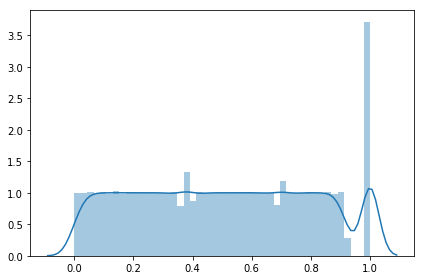

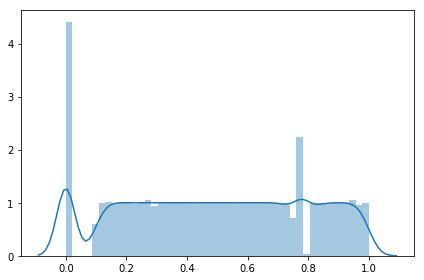

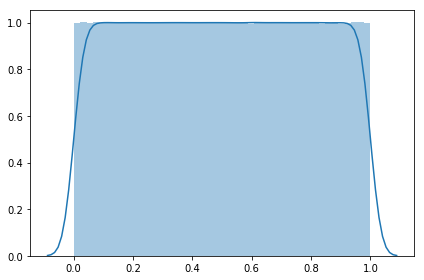

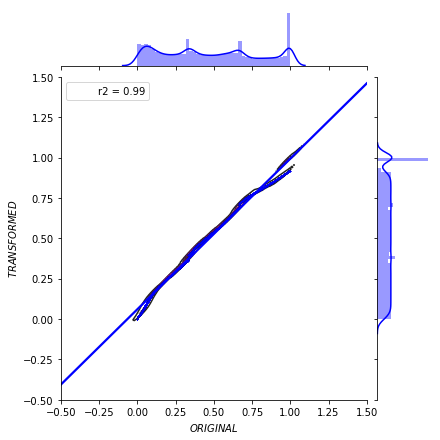

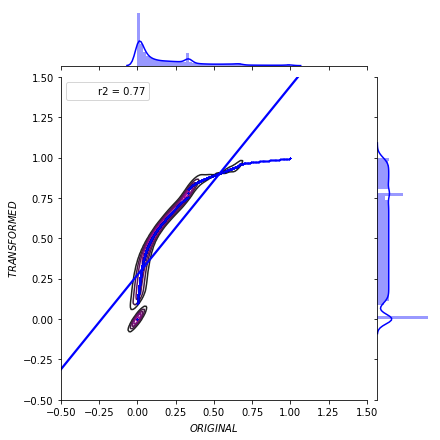

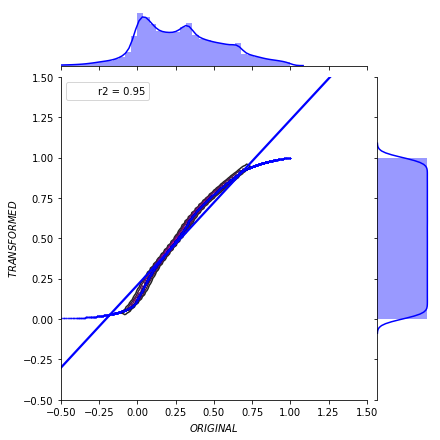

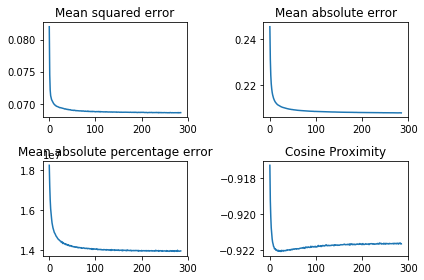

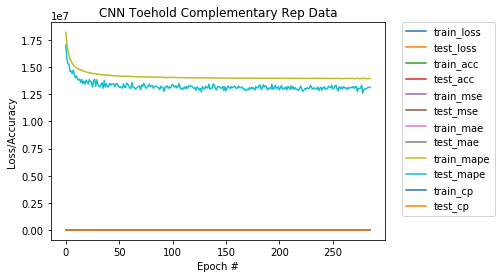

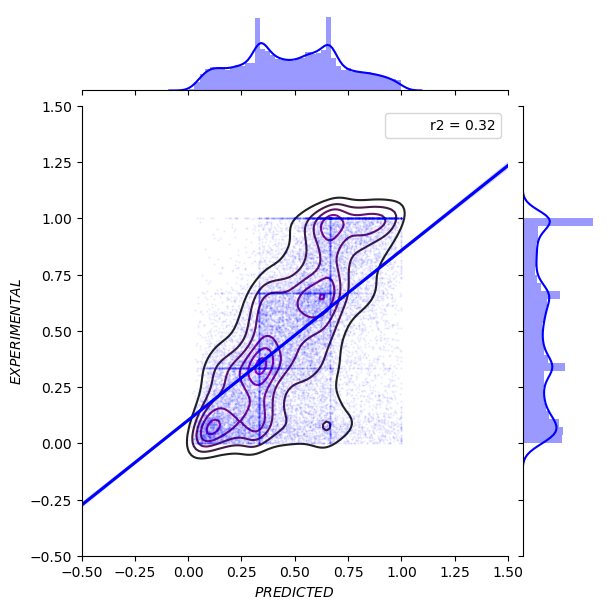

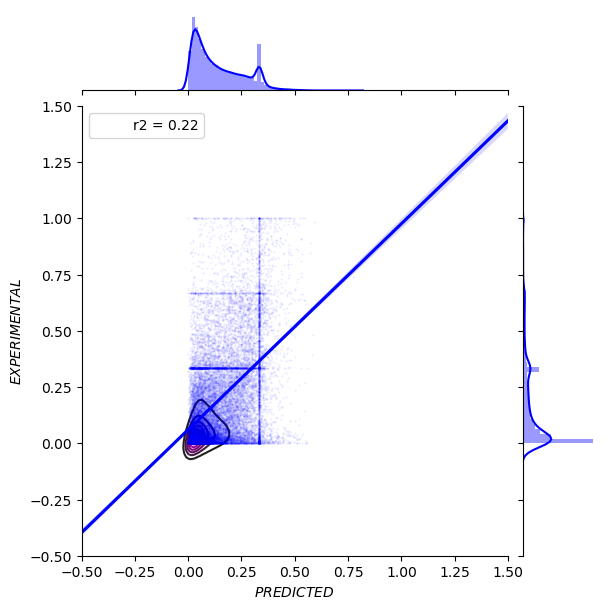

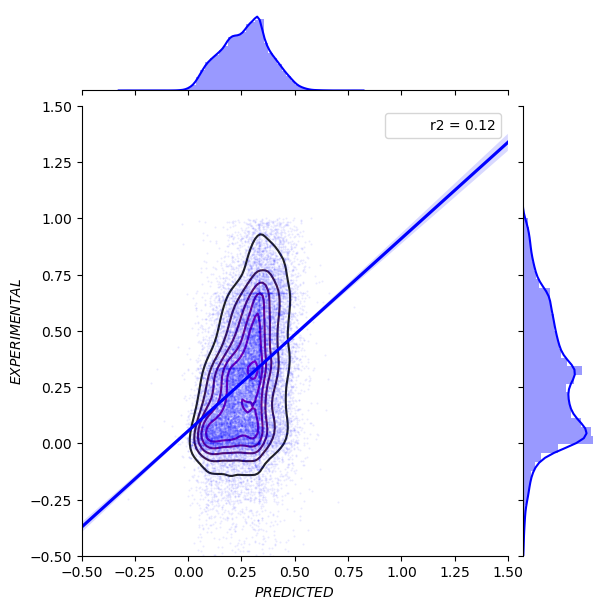

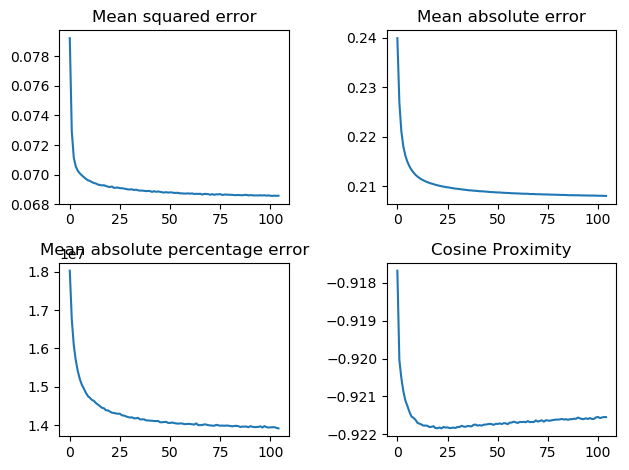

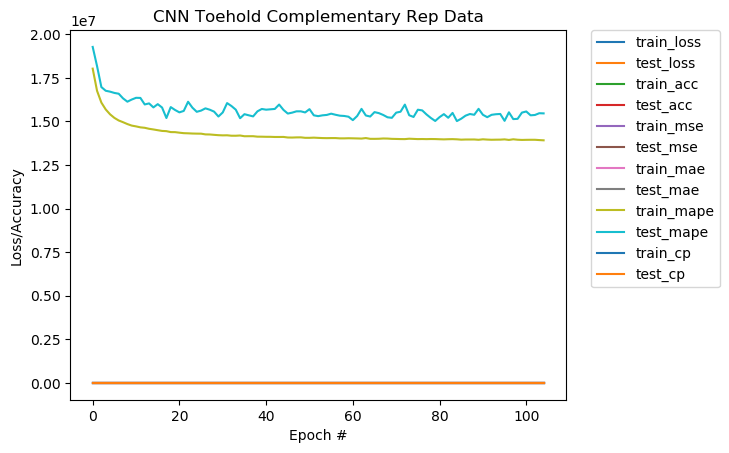

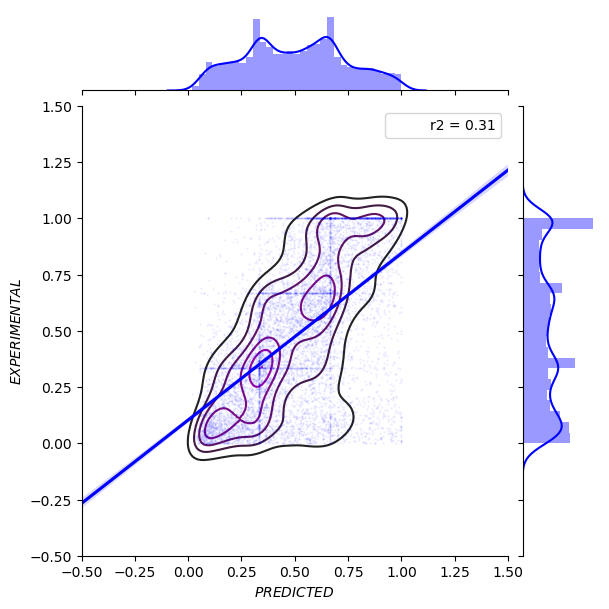

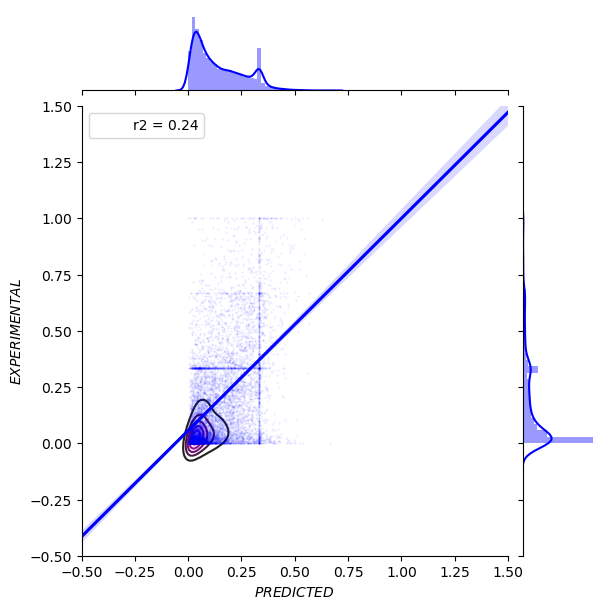

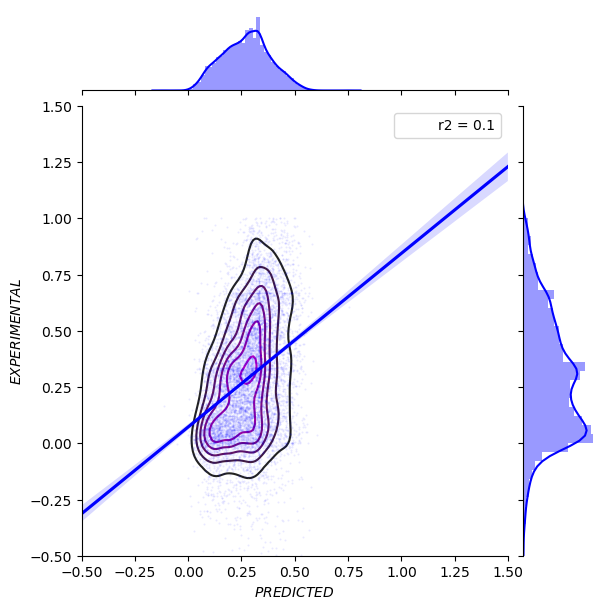

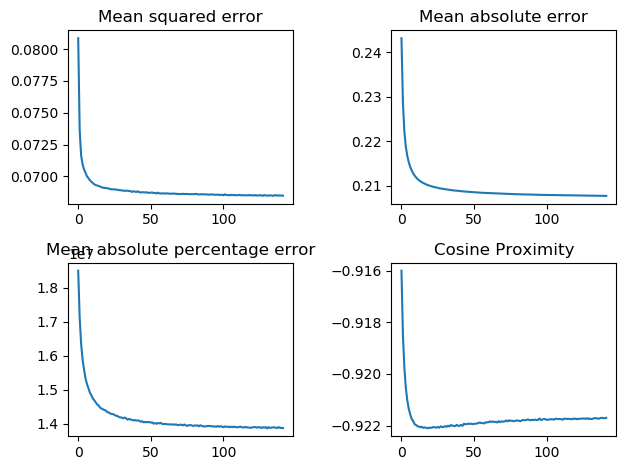

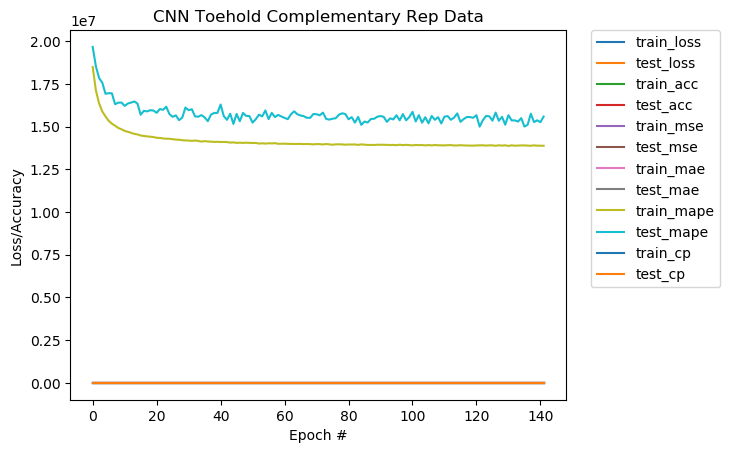

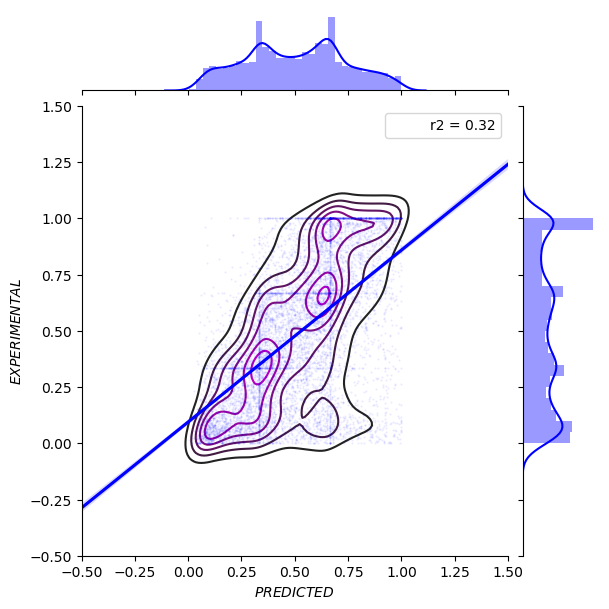

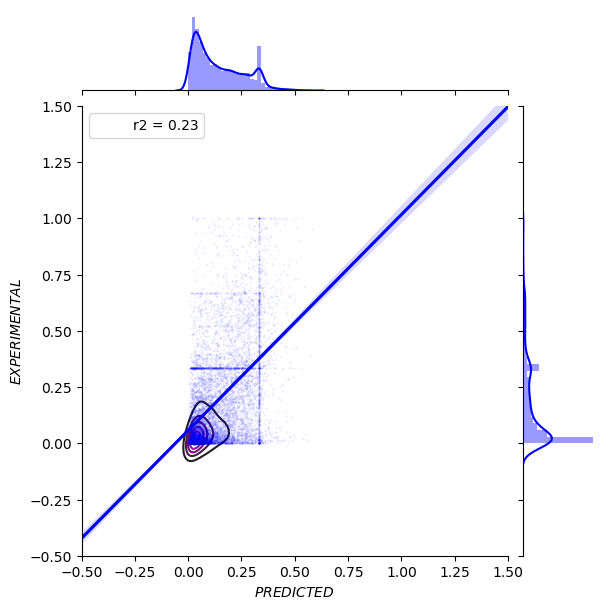

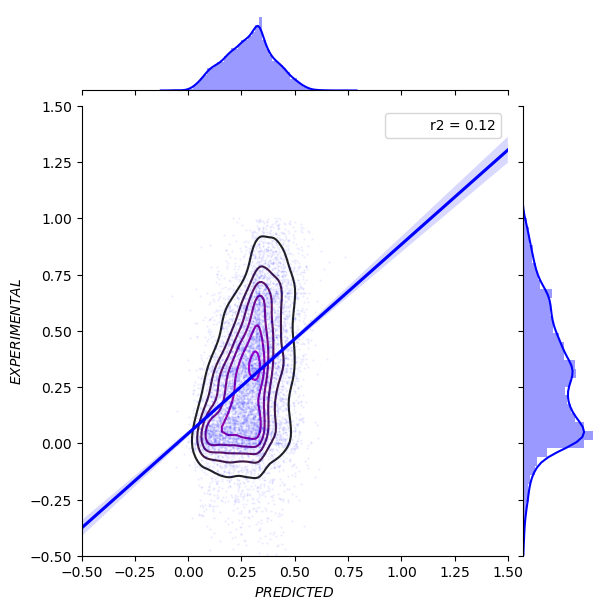

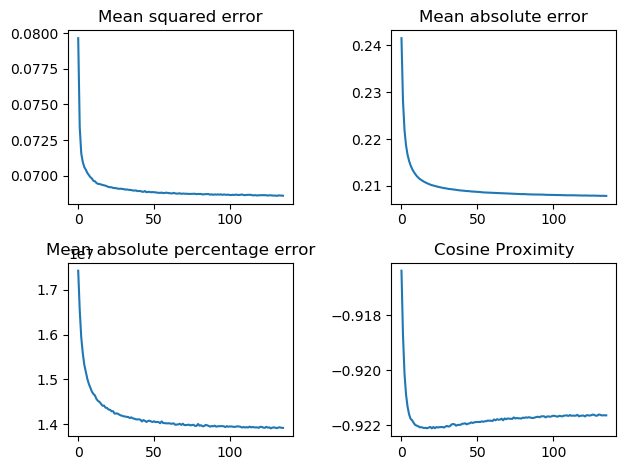

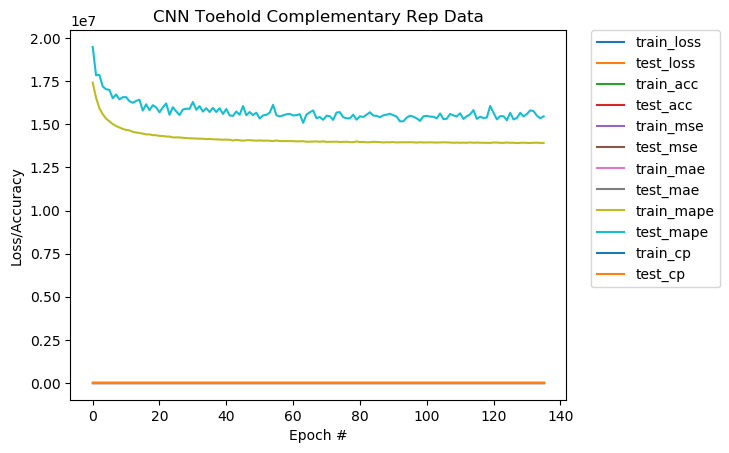

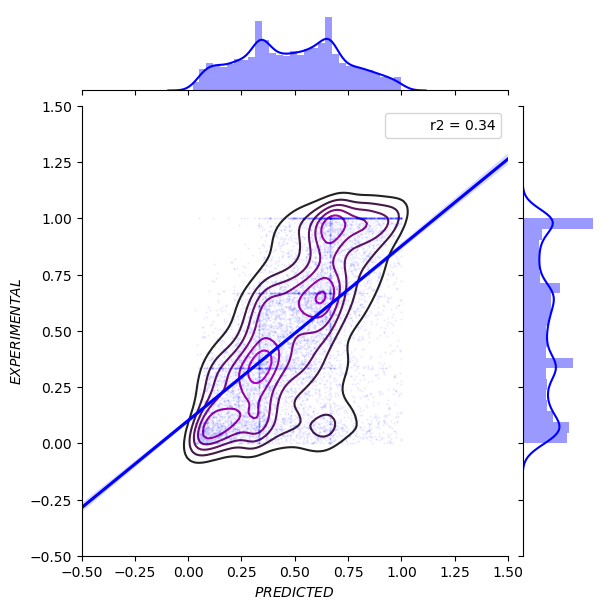

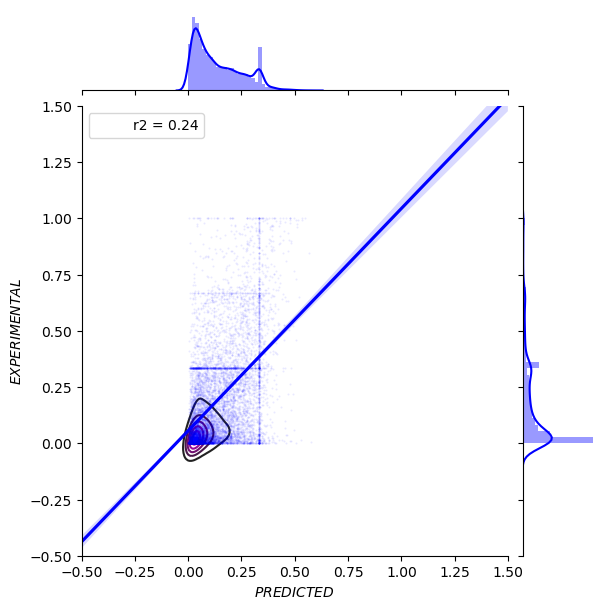

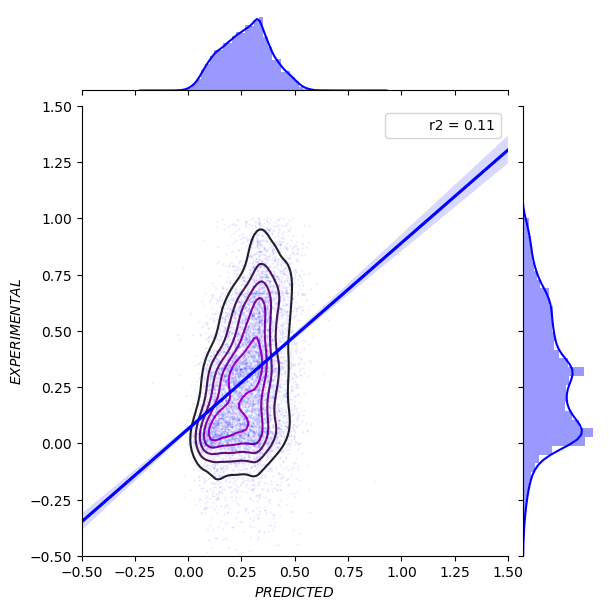

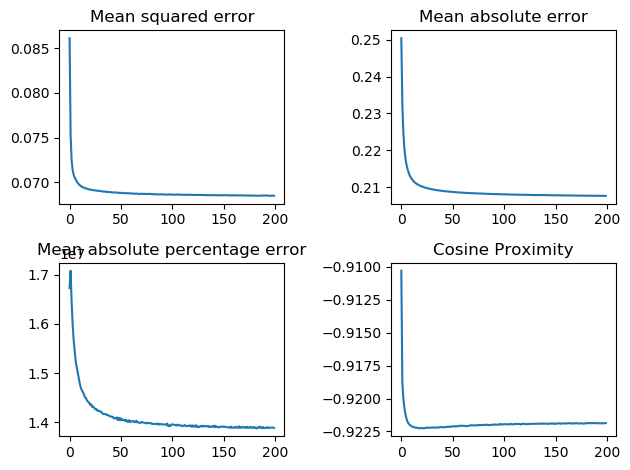

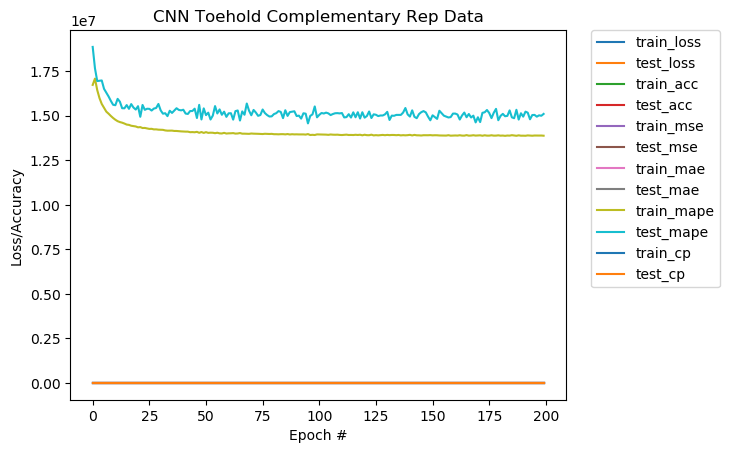

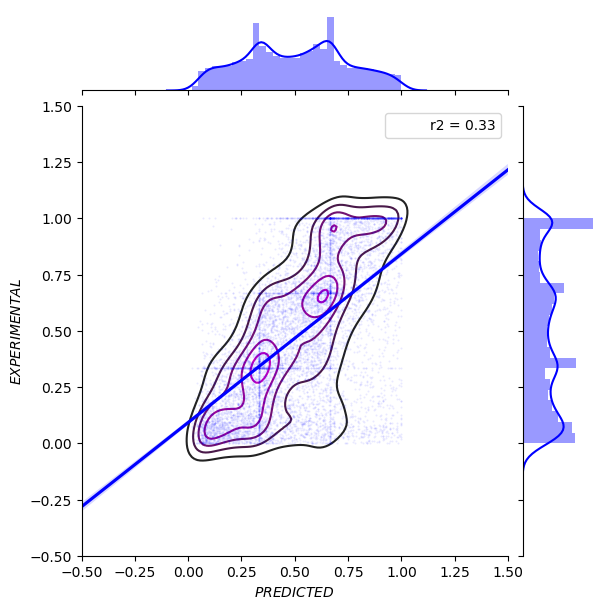

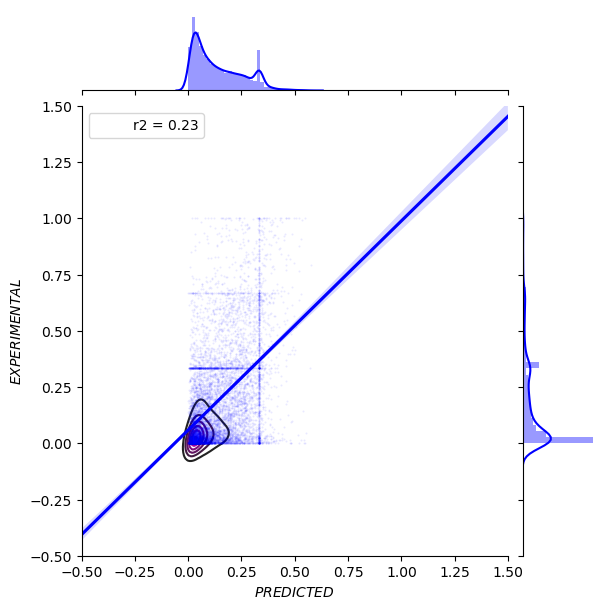

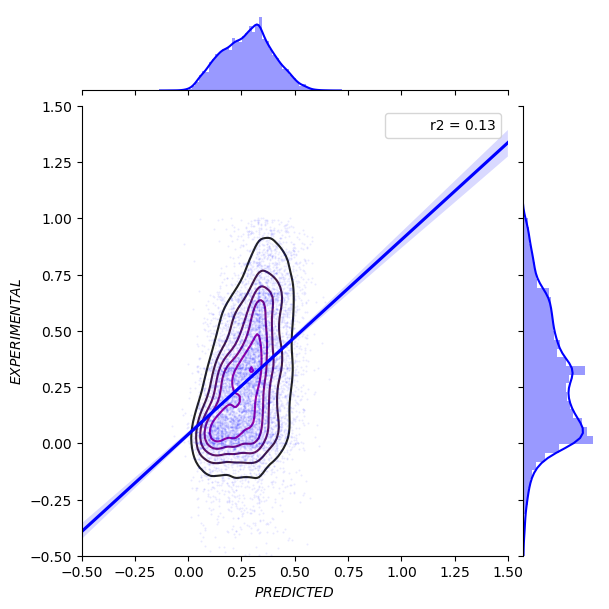

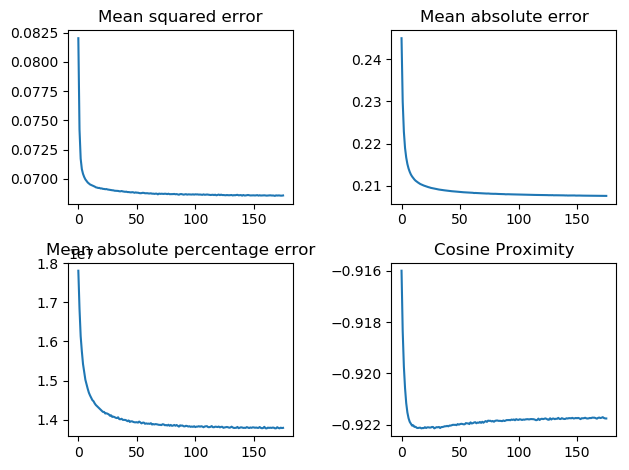

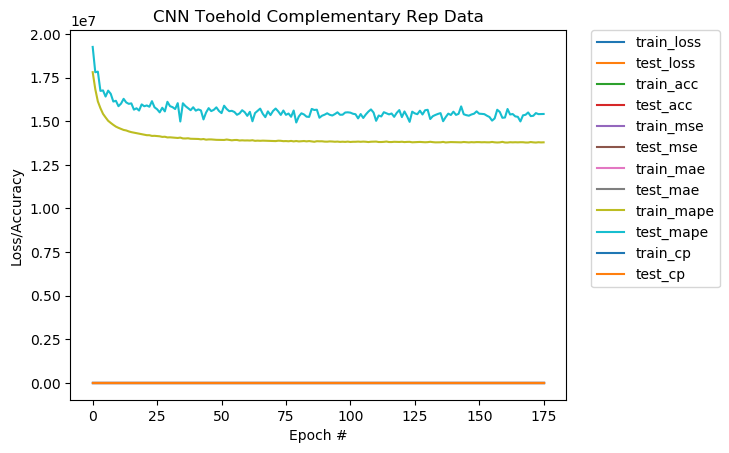

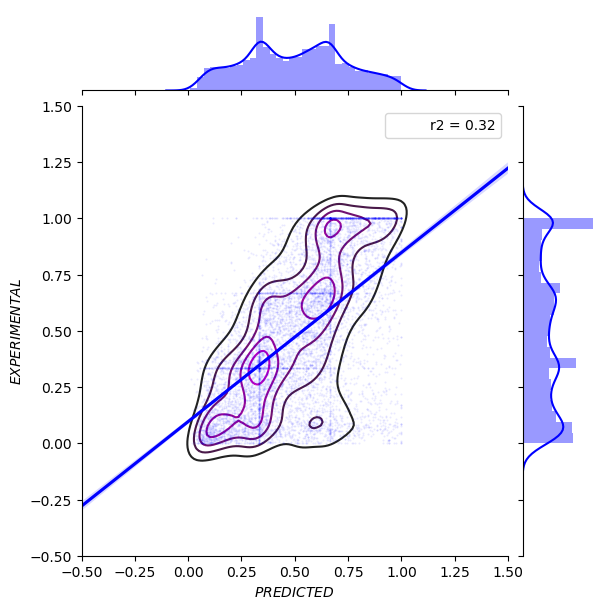

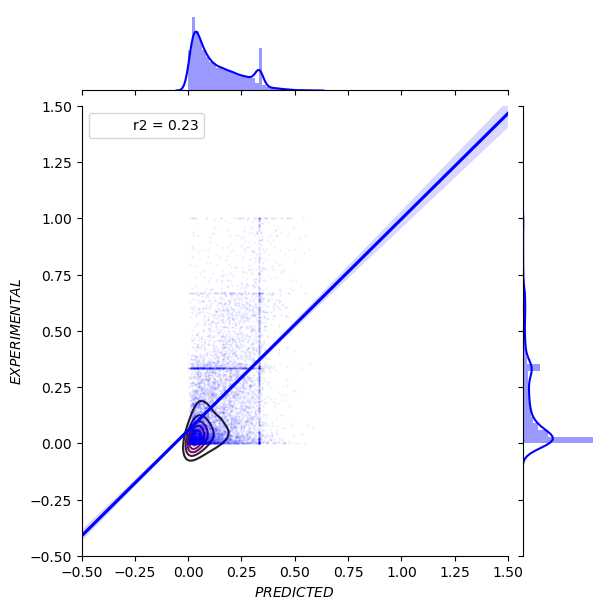

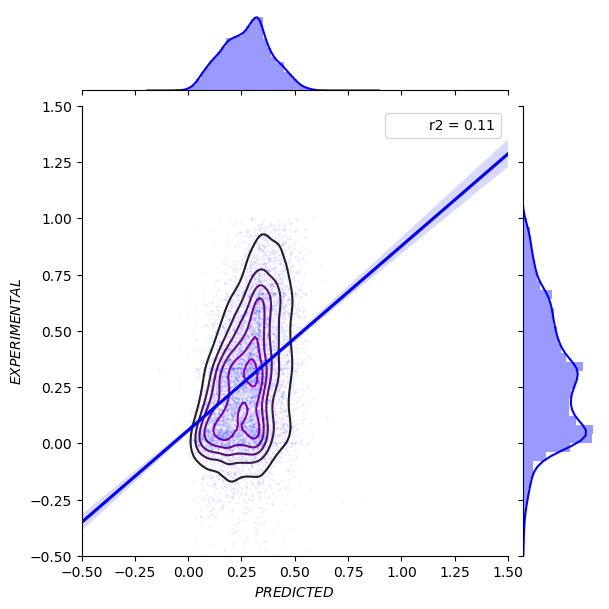

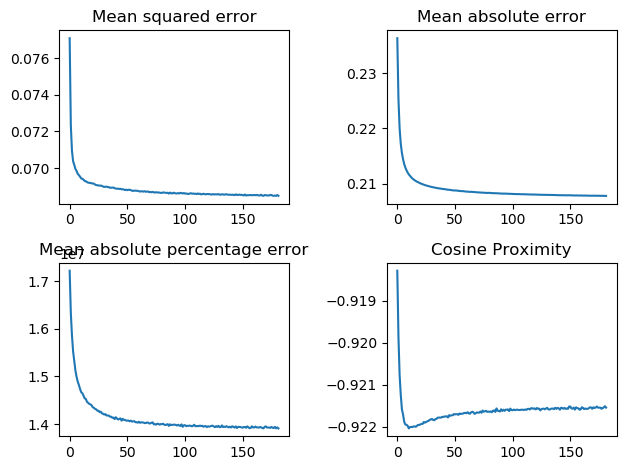

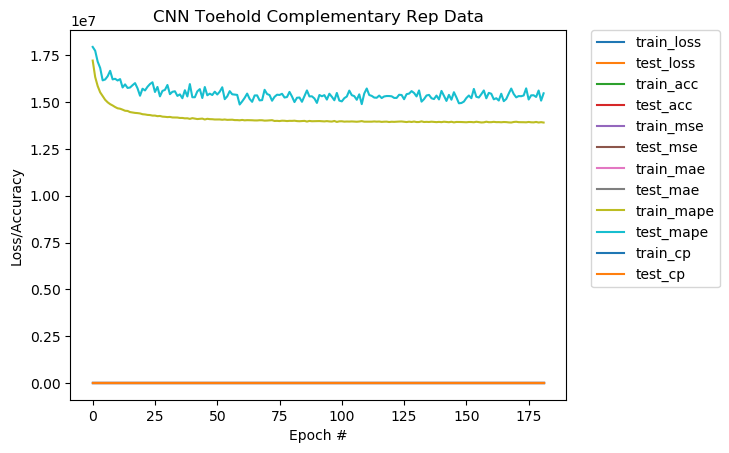

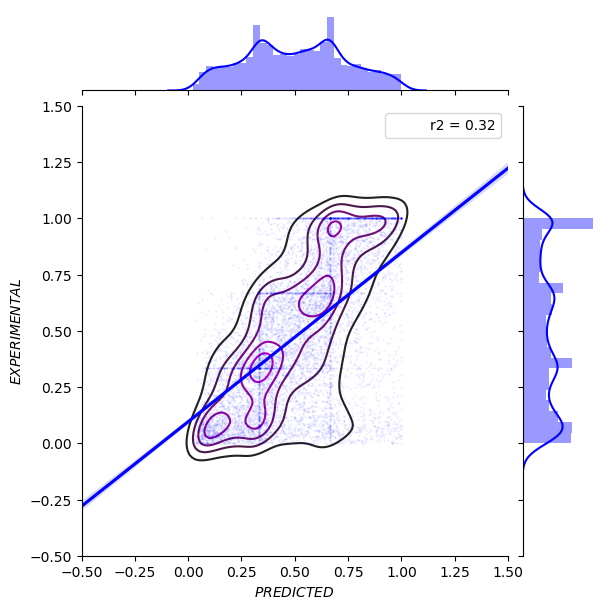

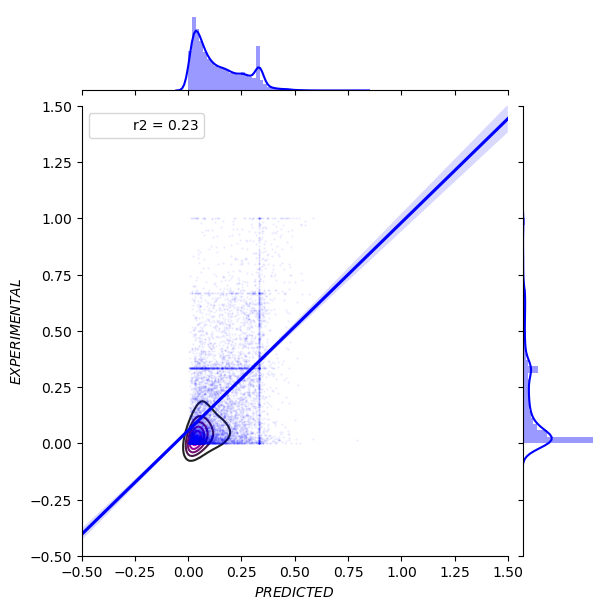

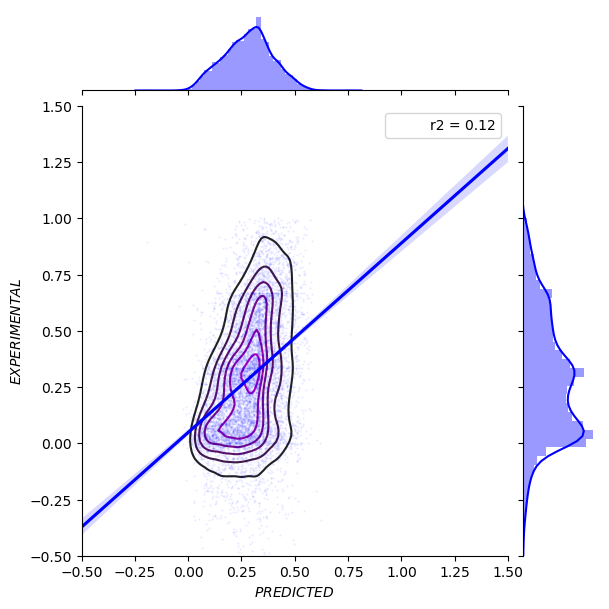

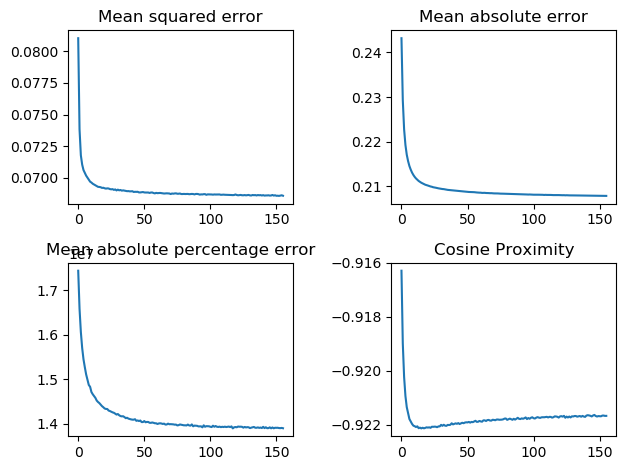

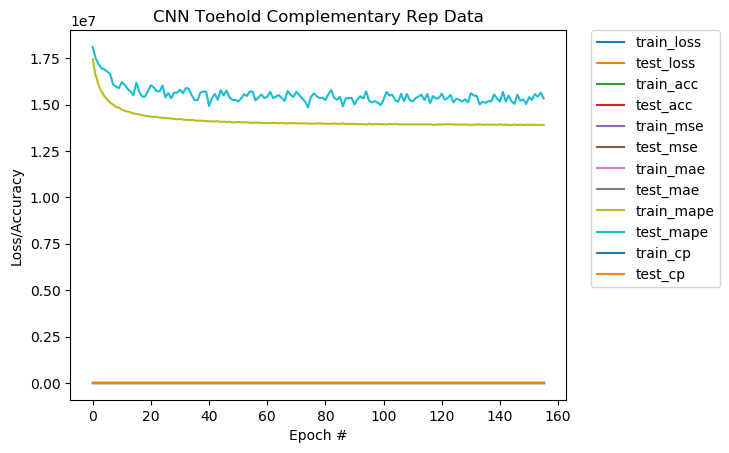

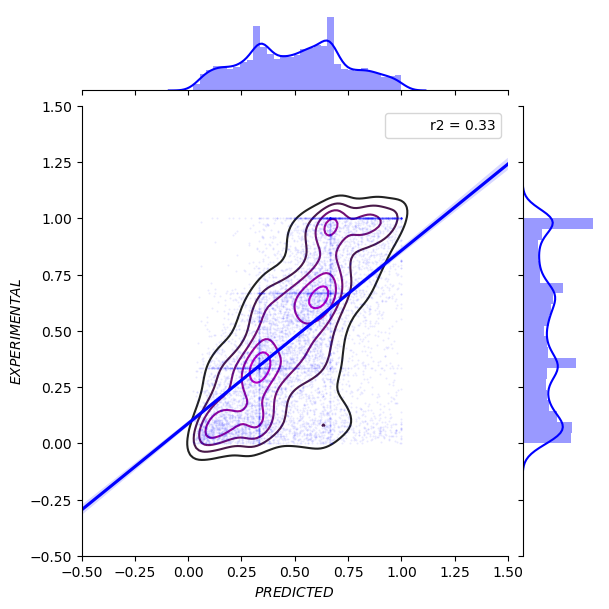

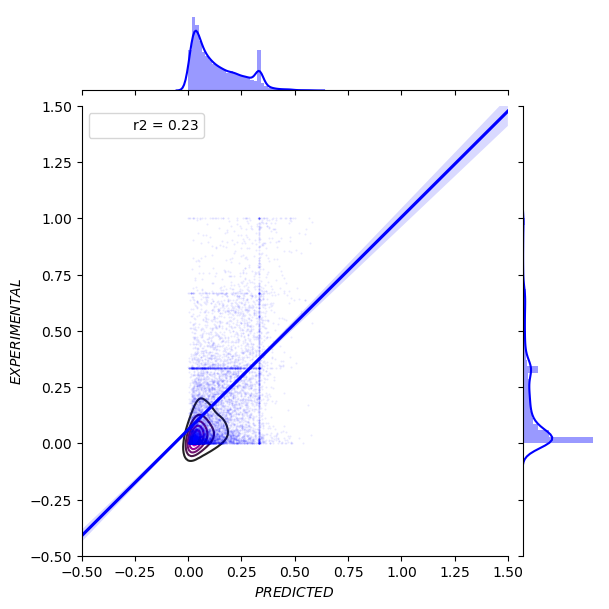

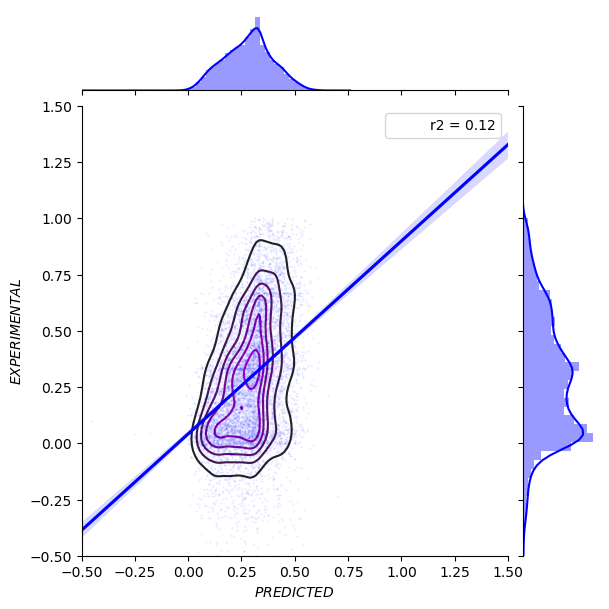

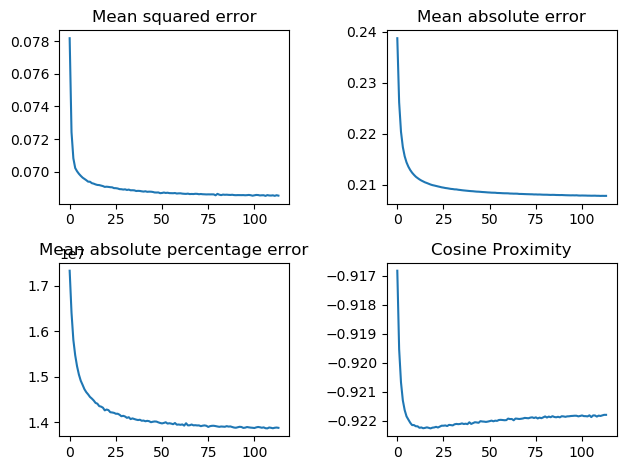

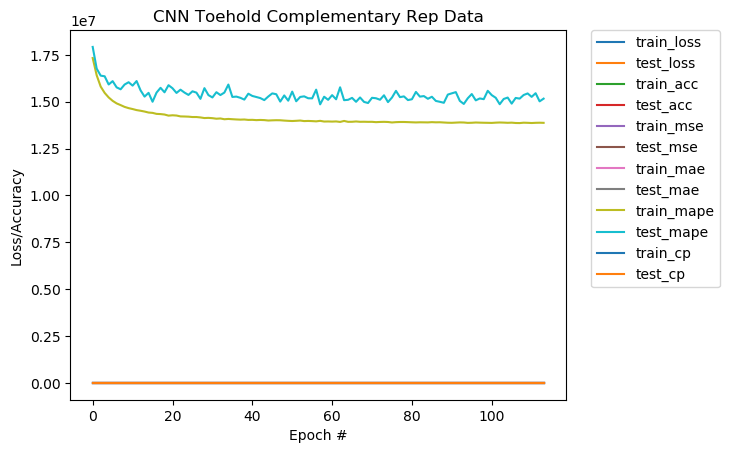

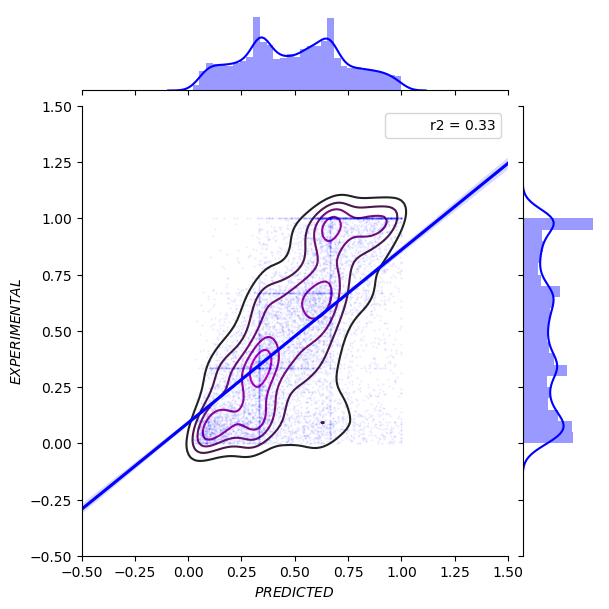

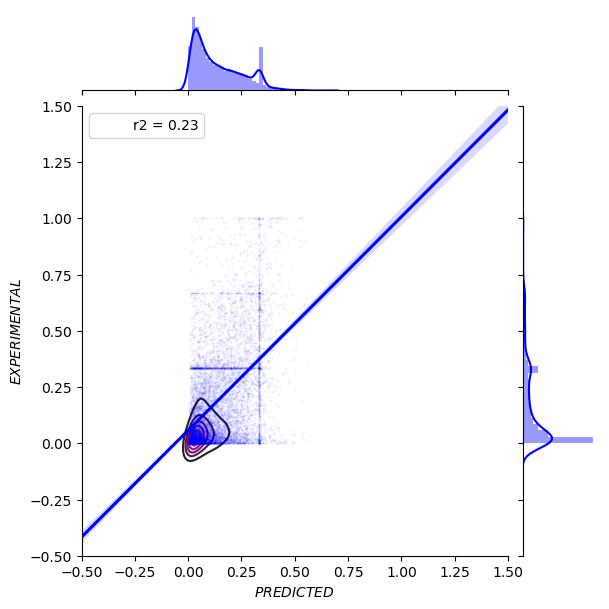

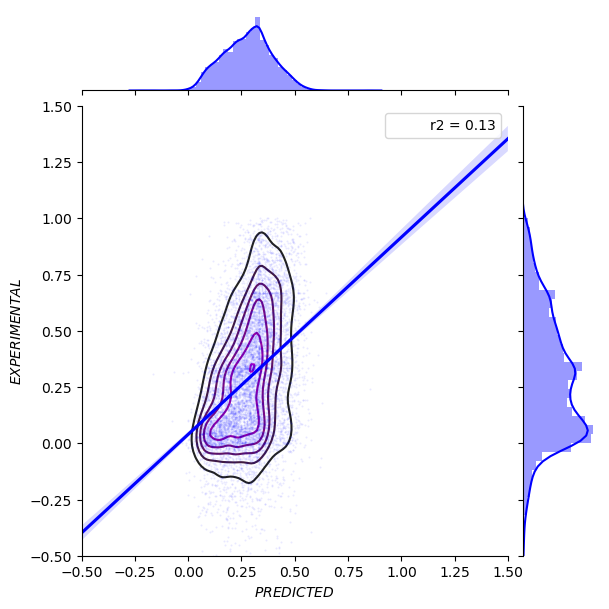

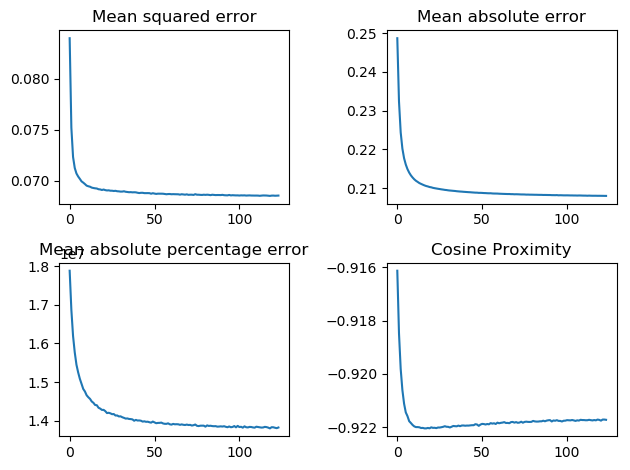

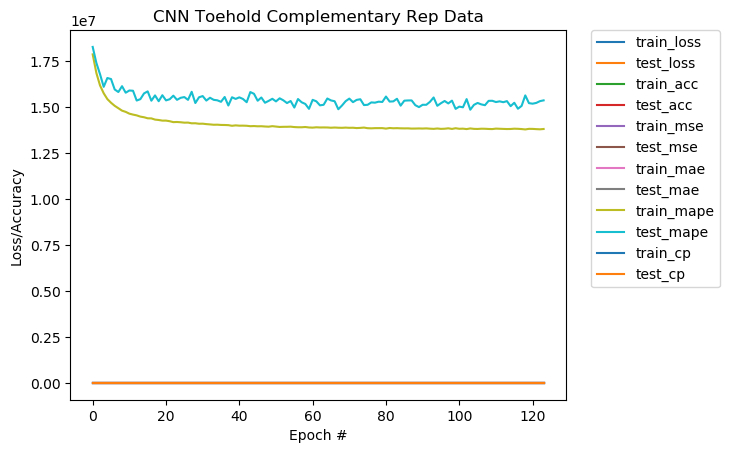

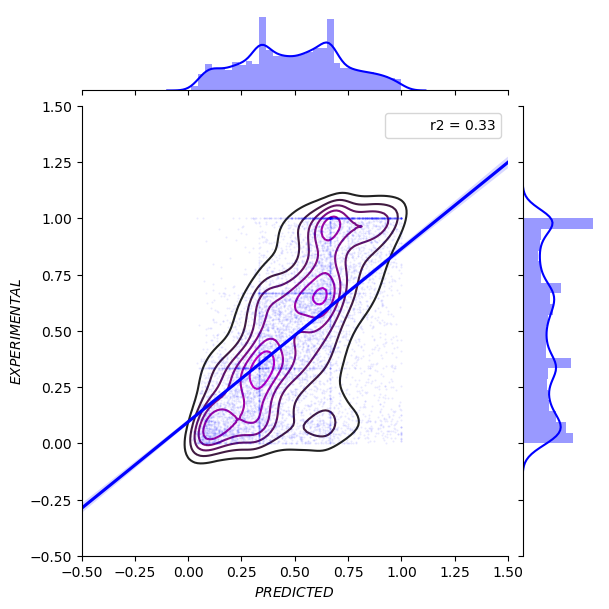

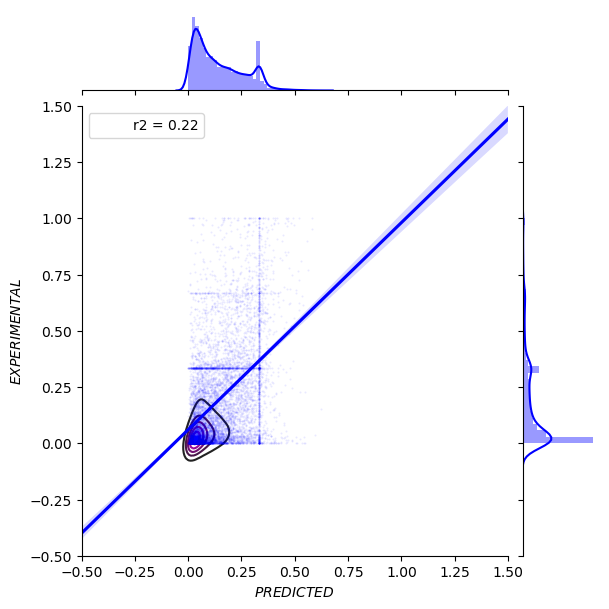

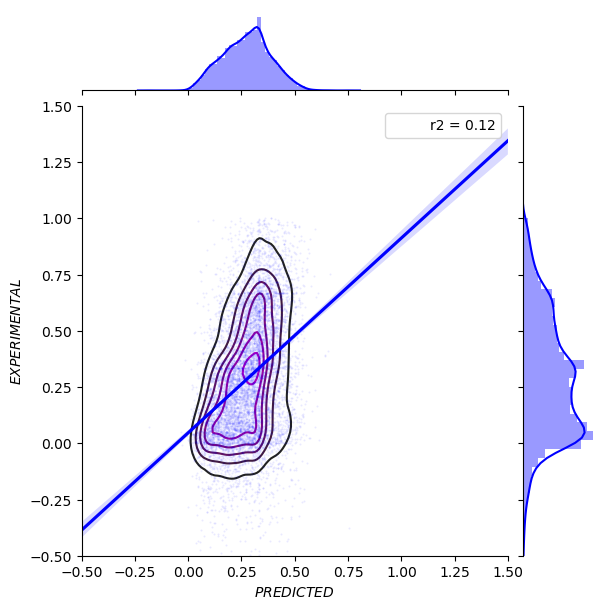

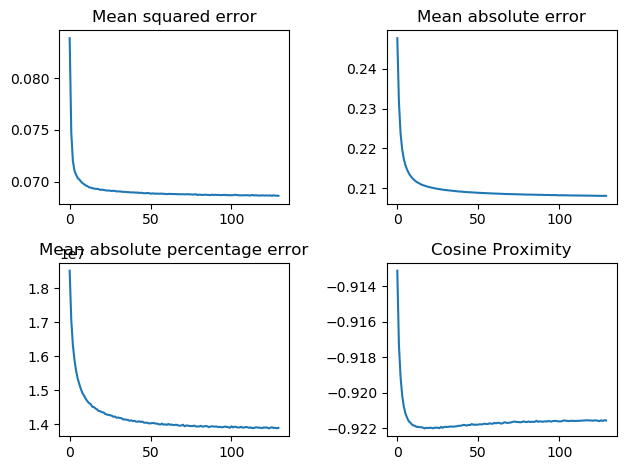

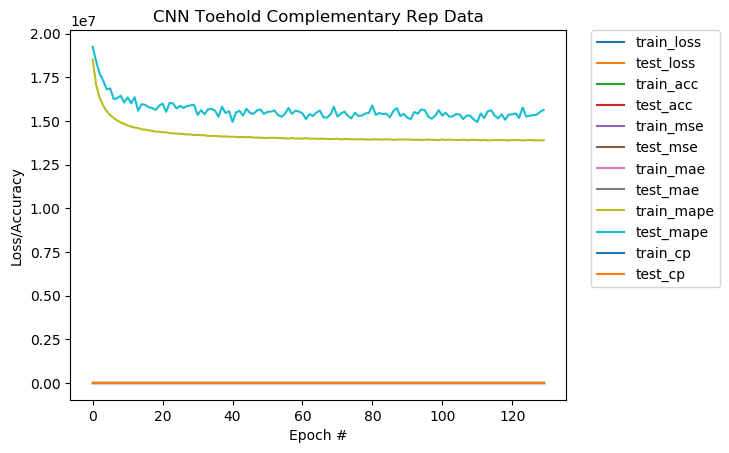

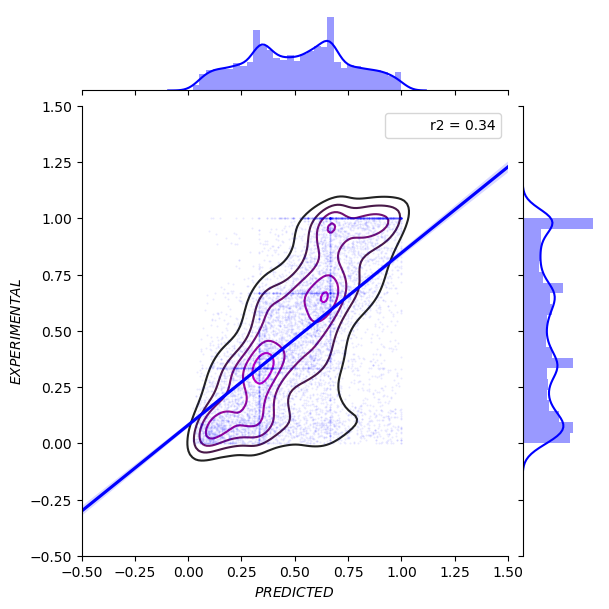

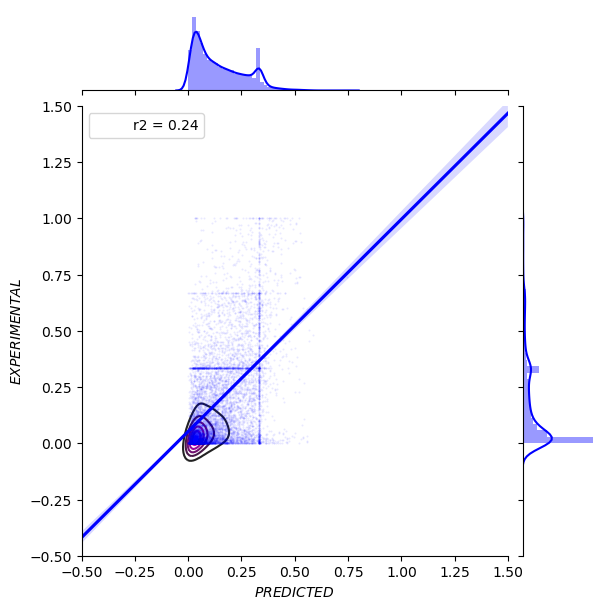

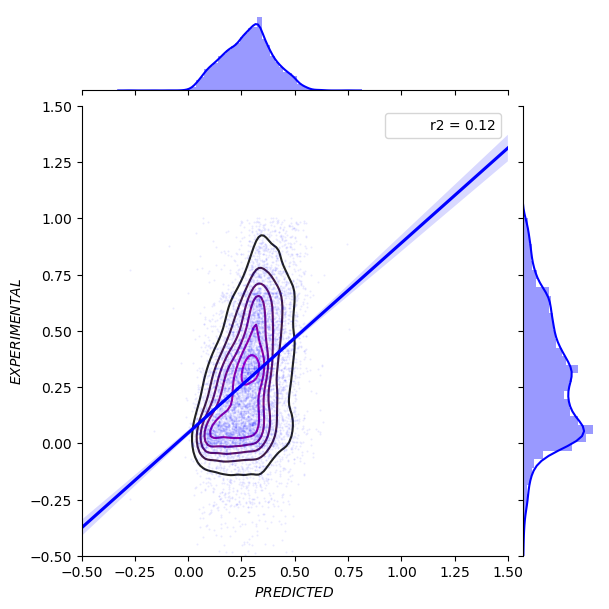

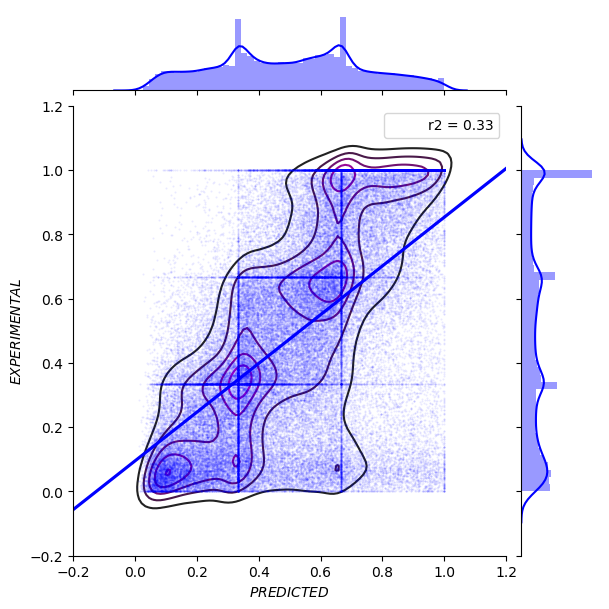

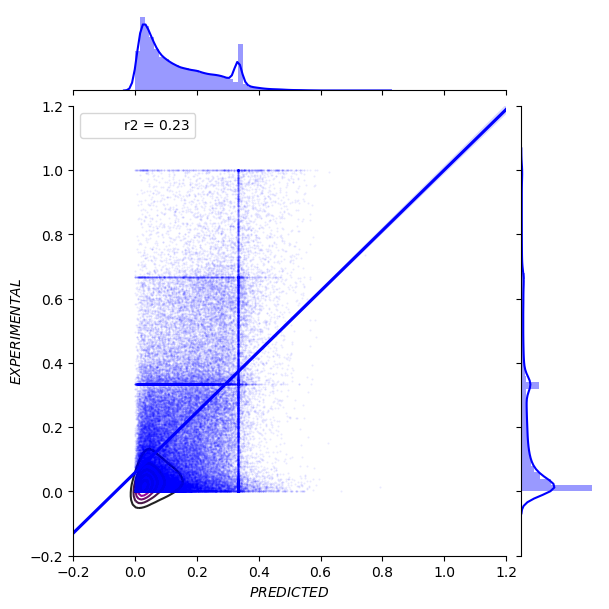

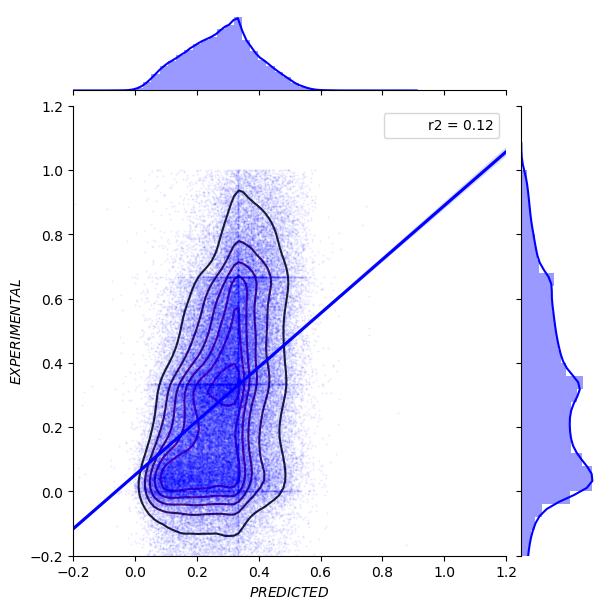

In [12]:
# RUN FULL MODEL ANALYSIS AND REPORTING model
execute_model_analysis(core_models_path, model_name, data, input_cols, output_cols, qc_levels, n_foldCV, verbose_init, evaluate)

-----------------------------------------------------------------------------------------------------------------------------

END OF CODE